In [67]:
# Imports

# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline

import requests
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from PIL import Image
from io import BytesIO
#import Tkinter, tkFileDialog
from nltk.tokenize import word_tokenize
import os
import sys
from PIL import Image, ImageDraw
import numpy as np
import math
import PIL.ImageFont as ImageFont
import textwrap
from textblob import TextBlob

In [53]:
MAX_QUOTE_LEN = 70
keyword = "beach"
def GetQuotesFromGoodreads(keyword)
    answer = []
    page = 1
    url = "https://www.goodreads.com/quotes/search?commit=Search&q=" + keyword
    #url = "https://www.brainyquote.com/topics/" + keyword

    payload = ""
    headers = {
        'cache-control': "no-cache",
        'Postman-Token': "5b19b971-0950-44d1-bac6-50a068def9d3"
        }

    for page in range(2, 10):
        response = requests.request("GET", url, data=payload, headers=headers)

        if(response.status_code == 404):        
            result =  ["\nInfuse your life with action. Don't wait for it to happen. Make it happen. Make your own future. Make your own hope. Make your own love. And whatever your beliefs, honor your creator, not by passively waiting for grace to come down from upon high, but by doing what you can to make grace happen... yourself, right now, right down here on Earth.\n\nBradley Whitford\n\n", '\nLife is 10% what happens to you and 90% how you react to it.\n\nCharles R. Swindoll\n\n', '\nBeginning today, treat everyone you meet as if they were going to be dead by midnight. Extend to them all the care, kindness and understanding you can muster, and do it with no thought of any reward. Your life will never be the same again.\n\nOg Mandino\n\n', "\nLearn to enjoy every minute of your life. Be happy now. Don't wait for something outside of yourself to make you happy in the future. Think how really precious is the time you have to spend, whether it's at work or with your family. Every minute should be enjoyed and savored.\n\nEarl Nightingale\n\n", '\nNo matter what has happened to you in the past or what is going on in your life right now, it has no power to keep you from having an amazingly good future if you will walk by faith in God. God loves you! He wants you to live with victory over sin so you can possess His promises for your life today!\n\nJoyce Meyer\n\n', '\nOnly I can change my life. No one can do it for me.\n\nCarol Burnett\n\n', '\nSecurity is mostly a superstition. It does not exist in nature, nor do the children of men as a whole experience it. Avoiding danger is no safer in the long run than outright exposure. Life is either a daring adventure, or nothing.\n\nHelen Keller\n\n', "\nChoosing to be positive and having a grateful attitude is going to determine how you're going to live your life.\n\nJoel Osteen\n\n", '\nToday I choose life. Every morning when I wake up I can choose joy, happiness, negativity, pain... To feel the freedom that comes from being able to continue to make mistakes and choices - today I choose to feel life, not to deny my humanity but embrace it.\n\nKevyn Aucoin\n\n', '\nI have seen many storms in my life. Most storms have caught me by surprise, so I had to learn very quickly to look further and understand that I am not capable of controlling the weather, to exercise the art of patience and to respect the fury of nature.\n\nPaulo Coelho\n\n', "\nYour work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking. Don't settle. As with all matters of the heart, you'll know when you find it.\n\nSteve Jobs\n\n", '\nPeace is the beauty of life. It is sunshine. It is the smile of a child, the love of a mother, the joy of a father, the togetherness of a family. It is the advancement of man, the victory of a just cause, the triumph of truth.\n\nMenachem Begin\n\n', "\nChange your life today. Don't gamble on the future, act now, without delay.\n\nSimone de Beauvoir\n\n", "\nI cannot even imagine where I would be today were it not for that handful of friends who have given me a heart full of joy. Let's face it, friends make life a lot more fun.\n\nCharles R. Swindoll\n\n", "\nI believe that a trusting attitude and a patient attitude go hand in hand. You see, when you let go and learn to trust God, it releases joy in your life. And when you trust God, you're able to be more patient. Patience is not just about waiting for something... it's about how you wait, or your attitude while waiting.\n\nJoyce Meyer\n\n", '\nMy mission in life is not merely to survive, but to thrive; and to do so with some passion, some compassion, some humor, and some style.\n\nMaya Angelou\n\n', '\nLife is a blur when one is essaying different roles; it is so fulfilling.\n\nAmitabh Bachchan\n\n', '\nFinancial independence is paramount. My mom always says that when a woman is financially independent, she has the ability to live life on her own terms. I think that was the soundest advice that I ever got. No matter where you go in life or who you get married to, you have to be financially independent - whether you use it or not.\n\nPriyanka Chopra\n\n', "\nI do have a close circle of friends and I am very fortunate to have them as friends. I feel very close to them I think friends are everything in life after your family. You come across lots of people all the time but you only make very few friends and you have to be true to them otherwise what's the point in life?\n\nShah Rukh Khan\n\n", '\nStay true to yourself, yet always be open to learn. Work hard, and never give up on your dreams, even when nobody else believes they can come true but you. These are not cliches but real tools you need no matter what you do in life to stay focused on your path.\n\nPhillip Sweet\n\n', '\nNever stop fighting until you arrive at your destined place - that is, the unique you. Have an aim in life, continuously acquire knowledge, work hard, and have perseverance to realise the great life.\n\nA. P. J. Abdul Kalam\n\n', '\nLife consists not in holding good cards but in playing those you hold well.\n\nJosh Billings\n\n', '\nClouds come floating into my life, no longer to carry rain or usher storm, but to add color to my sunset sky.\n\nRabindranath Tagore\n\n', "\nYou can never control who you fall in love with, even when you're in the most sad, confused time of your life. You don't fall in love with people because they're fun. It just happens.\n\nKirsten Dunst\n\n", '\nTo succeed in life, you need three things: a wishbone, a backbone and a funny bone.\n\nReba McEntire\n\n', '\nLife is short, and if we enjoy every moment of every day, then we will be happy no matter what happens or what changes along the way.\n\nGretchen Bleiler\n\n']
        else:
            from bs4 import BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')
            #print(soup)
            for elements in soup.find_all("script", "style", "cdata"):
                elements.decompose()

            result = [n.text for n in soup.find_all("div","quoteText")]
            #print(result)
            for quote in result:
                quote = quote.split("-\\n")[0].strip()
                statement = quote.split("―\n")[0].strip()
                author = quote.split("―\n")[1].strip()
                quote = statement #+ " - " + author
                quote = quote.replace('“', "")
                quote = quote.replace('”', "")
                if(len(quote) < MAX_QUOTE_LEN):
                    answer.append(quote.strip())
        url = "https://www.goodreads.com/quotes/search?commit=Search&q=" + keyword + "&page=" + str(page)

    print(answer)
    #return answer

['I am a citizen of the world.', "He wasn't what sent me running. He was what had made me want to stay.", 'No. One. Comes. Before You.', 'I had fallen too far. I was in love with Rush Finlay.', 'Beach Balls at festivals, are the work of the devil!', 'I love you girl...to the moon and back.', 'Loosing you would be the only thing that could destroy me', 'Please. Forgive me. One more chance, Blaire. I want this. I want you.', "Goodbyes weren't all they were cracked up to be", "Fantasy is one of the soul's brighter porcelains.", 'If ever I was running, it was towards you.', 'I need you. Right now. Let me love you right here, please.']


In [33]:
q = '“The mountains are calling and I must go.”\n    ―\n  \n    John Muir'
q.split("―\n")

['“The mountains are calling and I must go.”\n    ', '  \n    John Muir']

In [55]:
sent = "People are fucking awful"

In [65]:
analysis = TextBlob(sent)
print(analysis.sentiment.polarity)

-1.0


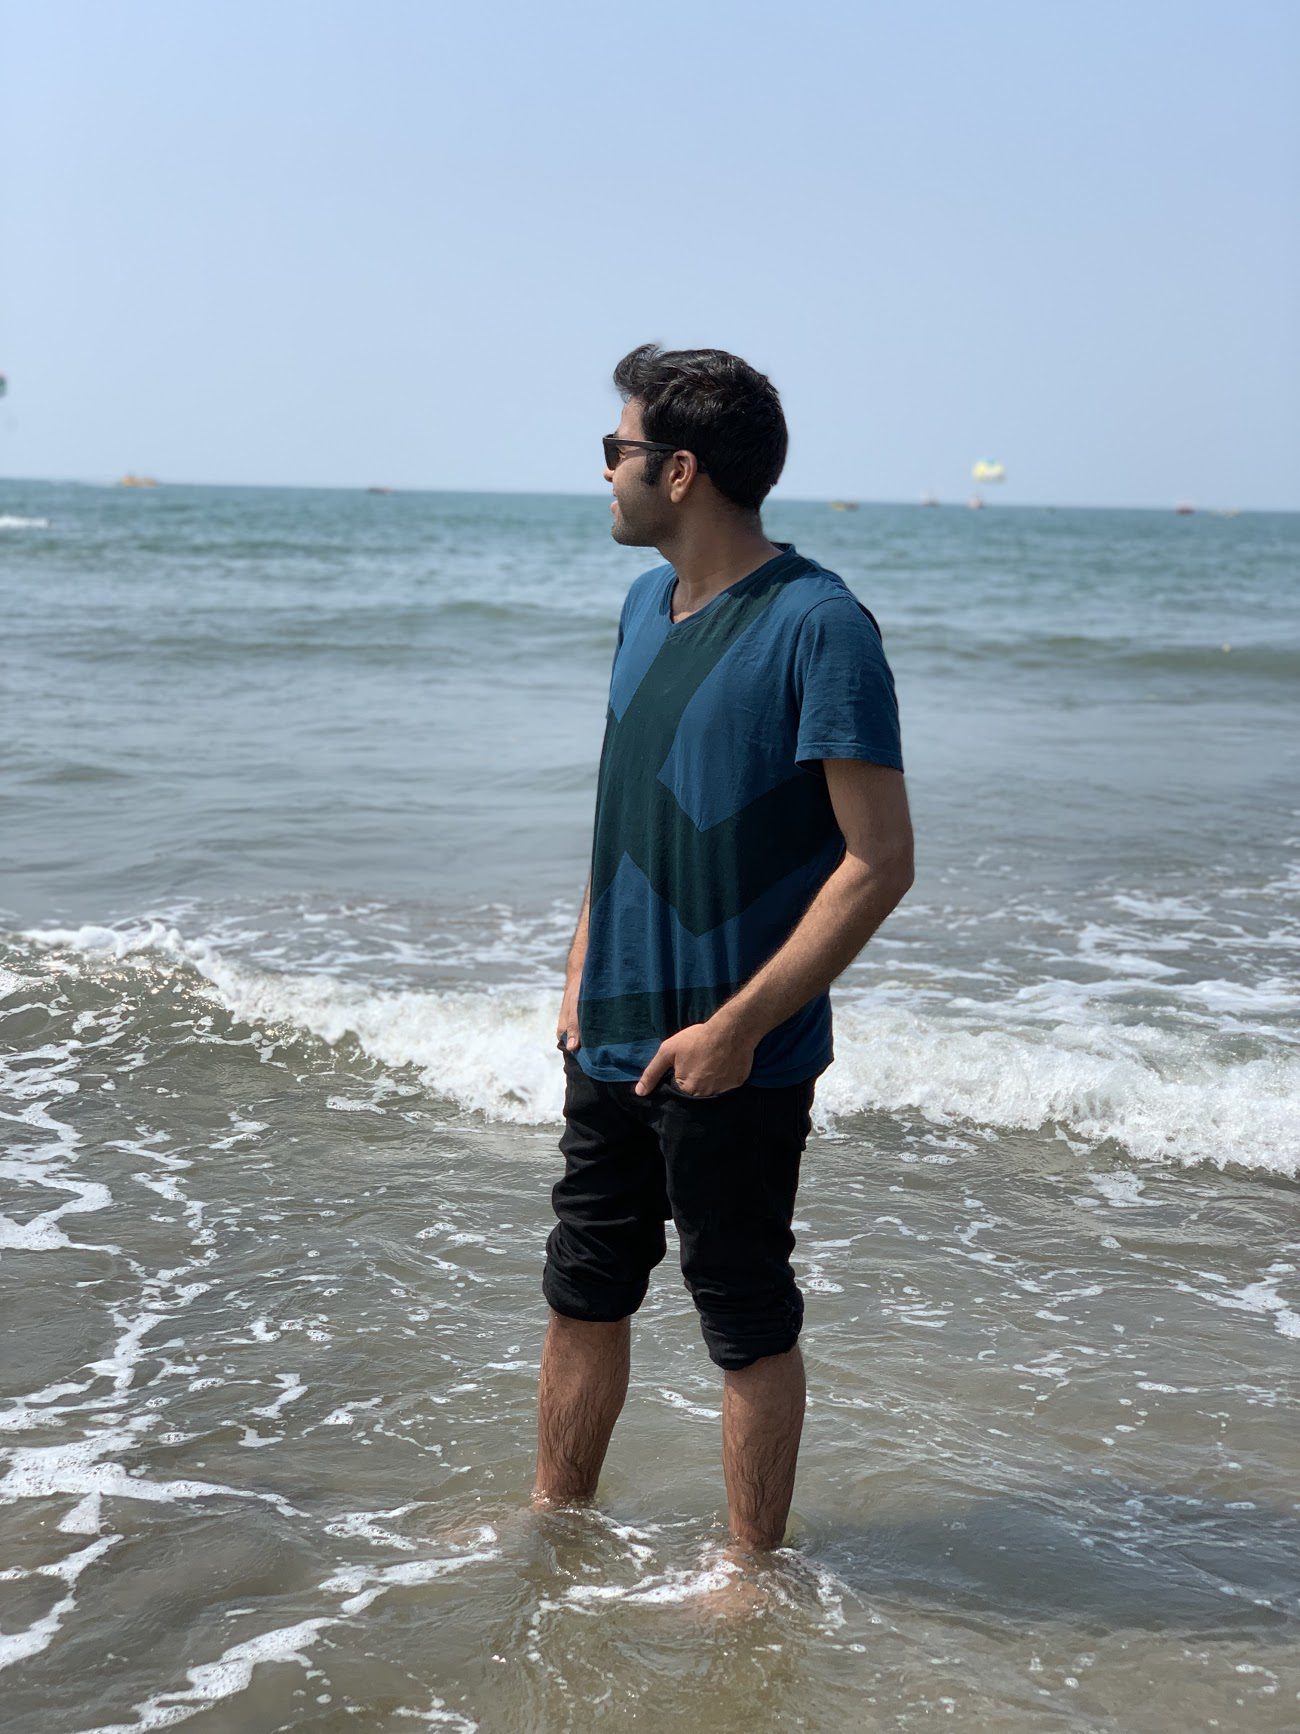

In [119]:
image_path = "pictures/shubham1.jpg"
ptlarge = Image.open(image_path).convert("RGB")
display(ptlarge)

In [97]:
immatrix = ptlarge.convert("L")
np.mean(immatrix)

146.44901102701823

In [101]:
im = np.asarray(immatrix)
np.mean(im[0:10,:])

249.13671875

In [111]:
LIGHT = 1
DARK = 0
def getFontColor(im, leftpos, bottompos, W, H):
    grayscale_im = im.convert("L")
    nparray = np.asarray(grayscale_im)
    region = nparray[bottompos:H,leftpos:W]
    intensity = np.mean(region)
    print("Image intensity: ", np.mean(grayscale_im))
    print("Region intensity: ", intensity)
    if(intensity < 150): 
        return LIGHT
    else: 
        return DARK
    
leftpos = 0
bottompos = 1000
W,H = ptlarge.size
getFontColor(ptlarge, leftpos, bottompos, W, H)

Image intensity:  146.44901102701823
Region intensity:  108.52142528044872


1

In [120]:
base64encode = "iVBORw0KGgoAAAANSUhEUgAAAg8AAAEhCAYAAAD4a0N5AAAAAXNSR0IArs4c6QAAAAlwSFlzAAAXEgAAFxIBZ5/SUgAAQABJREFUeAHsnQeAZUWV/qvzBKIEyQwIKiCSBAkSBHMWV8SMsq7+zSiIiWjA1TUQjAhiXFAM6wruggGMgAEMK4ogWXKY2DMd/9/v1P3eq37zuqe7GaF7vDVzu+pWnTp16lTdc06dqntfx6hCqkPNgdXEAabT8PBw6urqSiMjI4F1aGgocc2ZMyd1dnamjo6ORmvAUAf4gYGB1NvbG/XIJw9cpJ1f1qUe+DyFaYM6wHCRT13fuy44W/OAdR2Ic13j456L4LrgMS7o4BocHAxaA3CKf6DfgXYJtOk+0q77YzjHlBEoB75dAJfhyv5Qx+1RDh3gKHGZBtNTtlXidbvkEdye89vFrg8vocP38LK7u7txDy733zDgI80Fje3ao8yhXbnLwA2seeF8x5SZhpLH1COQRx9KOnzvusSUux/wuqenp9FHw7nNOq45MFM50F7KzFRqa7pmHAcQdgRiC0QEPkIWIfynP/0pffSjH00nnnhiuvzyywPGnTA8MVdpIFDXgpf03Xffne6///6G8Aa/hbXxIYTJt4A3DDEBGpctW5b++7//O61YsSLaNN2mATiUFvn0g4CAJ8/4yKN8yZIl6Qtf+EK69NJLG23Sh+kE2qe9X/3qV+nPf/5z4KfNUtGA1wYG7UMPF3ncm1/E3HMRuOcqYV2X2OMVwPrD/S233JJ+/OMfB27qQp/bNL6SNsqnE1yPvlppg5+2GE/3DdzuO2na5h76SRPc37iZxh9wgYP2CcbnvvueMue10kAfjAcYaHO9klbSXPCaci7gyatDzYHZwIHaeJgNozSDabSwQ/iRthAk/uMf/5je8573hJLdcMMN0wknnJB++MMfhpCkSxb6KAmnyQcPF4KVfNL/8z//k77zne9Q3FAypF0OjANtG5/pogwYvBt33HFHGAMW9MAaDhgMACsyK3DDGg9wV111VTr33HPTRhtt5KYDT+NmCgnTf/HFF4cxggKjTdNlVDZO3D/yrfxNM7GVGvW5dx8Na7xuFzykyScAf9NNN8VY2SgjzwrRtJkOK9yorD8lXue1i00XbSxdujTGxjTSFvkO7ofpJAbGfTF9hncMnC/ntcbg4HLb8A8DE5rA6/rA0Ffngcc0MFcoMz3gML+oT75hnaY+7dx7770xZpTXoebAbOBAXlrNBkprGmcsBxCEBASkhR/ps88+Ox144IHp7W9/e5RvvfXW6fbbbw9BeeWVV6bbbrst7bfffqEwfve736Udd9wx4FnR/+AHP0i33npretzjHpd23nnnWAWjPA477LD017/+NV122WVpq622Ss985jPTtddeGx4OhPWTnvSktNZaa6Vf//rXifaoc8MNN6Qddtgh2kMZHHTQQSGwf/7zn0ce7T3nOc9J8+fPTz/5yU+Cxo033jjo2WyzzaJP9AecXLR7yCGHhCGE4bD55puH0kDRmRfR4Sn8oR5tgGPu3Llj8OAt+d73vhd8e/KTn5y22WabBL+uuOKKSO+zzz5hoMEz8BxwwAGRT//+8Ic/RN8Zh+uuuy79/ve/D6qe9rSnRXvcb7/99oF78eLF6dGPfnS6/vrro8/gweNz4403Bg+hjXooToy5/v7+tOWWW6ZHPvKRCT65D+42/ZkomFfg++1vfxvG4cKFC9Ouu+6aXvSiFwUfUMbgMSxj9fe//z3G9rvf/W56/OMfH+NhGOYf6VW13UqX69AO8+irX/1qGE/Mn0c84hHR7/XWWy/4Ar3A0RbGhg1M+M3cY86Sh6FnuoGlHv2xgUKatr7yla9En9761remddZZp5W0+r7mwIzkQO15mJHDMnuIKoU1ghIhjJBEEbFyPfzww0PIIvSf/vSnp1e84hWhiN7xjndEPi56FNGCBQtCeaCc//d//zeUOErttNNOC+MCoYxgxXD4+te/Hgrjpz/9aWKl/rOf/Sz9+7//eygb6EEo4+HA7Y5yxHi555570pe+9KUwNM4444zA88EPfjAtX748/eUvf0lnnnlm4PnmN7+Z8JKcqG0W8Ls/11xzTcBQ9u1vfzto2GSTTcKTAQyKlXa5phPAQbBiIk0e+KAJ+rfbbrv0yU9+MvrEdgn8of/wmXx4hNKCvksuuSRiDBv4i1EEn774xS82PBH0HW/OL3/5y/Sf//mf6Z3vfGcYC/AJ2K997WvBQ/i09tprBz/OO++84C3bURtssEE65phjwsMEvVaUpCcb6CPbWe973/vSXnvtlV74whfGtg2GJ32xt8HKFyPjc5/7XLrvvvvStttum+bNmxd8Ag+XFfNk2zcctKPIwYFRxNYWxuwee+yRMAqghzLo4SLNWBF8D4//7//+r5HH2AHn54I+ME/I44JWjDPG54lPfGL0ZTo8jAbrPzUHHmQO1J6HB5nha1pzCEFCKSARpigmC8tFixal008/PV144YXpec97XqzaUXxHHHFE+vznPx+uYVb6CNNvfetboexRDHgU8FSw1bDTTjuFsObcw5133hmKkjqsyBHweAIwTqCDC28F5wcwOFAwrJ6hA4WAYQHdj3rUo6IOq2aUKHTvsssukfejH/0o6KdvKAm2YB772Memf/mXf0msQKETLwhnA1Ci9BWcVijUm06w8gAXygejAS8N/HrYwx4Whhd8ueuuu0Lpvv71r08YMfAFmo888si0xRZbpI985CNBC3XAiSGFx+SlL31peFnAjbEBXzEE6Dv8pz3gyadvuNRZScNf8jnfAcxTn/rUWPUzpp4DU+mv+0kdeHnwwQeHFwlcfX196ZxzzgkPCIYFHhP695rXvCbG4YILLggPFcYFff3b3/4WRiY4gYF2h8nSBpzHjrHEC4UXa/3114/5B/8I559/fvr+97+fNt100/TmN785rbvuuunUU08NnuCxwduFcbvbbrulBTKIMdaY8+ABP8bsZz/72cD1xje+MQw38qi7//77R379p+bAbOBA7XmYDaM0g2lE6CJsEdykfY9CJY0CQhCj5PAAsFWB4kKpEfBIoBhwuSOIcYv/4he/SO9617tC0Pr8AXVQcCgM4PFQUPcpT3lKGCqsjAnQgpDG/Y6CRfHsueeesUJHWbIlgGEDvdAAjQQUJytP04Vy8PkC2qYOSpqwQEqBemyBUEagTacjY4p/TAfVoA189Jf+YPTcoK0XvAm46VHmeAlY5b72ta8NL8qJ8pRALwoJjwH12AKgDoqLbQvoM59ohz6znYM3B97svffe4a1gK4Yxw3CALgww8JGGNow5DDICnhjKCJRxTTaAD76yPcUYEcCFoUQbGI4Yl942+MxnPhPnS9jWwPDDcGF88RoxDx7zmMekb3zjG4FzsjSUcB4DjBfm1oc+9KF0/PHHhwHgeQn+o48+OuYJHiyMG7xseNSYb8wvvFTMz6uvvjoMWOYVgWeB/uBdecITnhAGD1s+9BcDmDAV/kWF+k/NgYeIA7Xx8BAxfk1q1oqOPiGAuchjz/yss84KJUAeSoKAgLRAffjDHx6r/Te84Q0h/FFwKLyXvOQlYXCAB4MBpcKhMhQkHgBW2ChEFCwXysYBWPCiAFi14xLGDY0Swm1M21zGCzztUIdVIHvqHIY0TspQwCgFFDJufhsi7gdtg7tdsFKdSDG4DD5hHLEVcfPNNwcNrK7pw6te9apY8bLy5ywDymv33XeP7QS2L9gz/8AHPhBGBcodPv2///f/gq/0AdytBg59ZgsAHqLAWVmDE97QN+BJE4h53RaDAU8M4wkdGCEE2hgvuH/tyo0X+sqLsx54ETiPgicJowaDhjMfGDf0Ebc/Bsi+++4bChxvADQaj9vzGPi+Xcw8oL/E1MfQwnACH2PPlgntoOyf9axnxXYaWxp4DKCT8yi0g3GHUYPnC0MHoxh8jCf0w2e8VvSPvuMR4uwI7U7Ep3Y013k1Bx4qDoz/tD9UFNXtrjEceOUrXxlK6d3vfnfsabNSfO5znxurMzwTBA77obDZs+fgGIIWgct5A/b1LVARsLjMEeZsWwDPipNVohU5+BDSKDEUGsoTTwJbFShJ8JJPHooHXMCCgxUjtCHQ2VNnawBB7vZRqBgVnMHAS8LqEYULvQQLfceROY0/KEi2VVj1vv/974/9f1bVnGP42Mc+FgdFoZ8Dox/+8Idj1YtCw6NDHWhjBc6BQ1a/uMh5IwTDBmVIP8uAIQB/iFF6bOHgjYBPjJHrwFfy4COHVDGg4D/tkr+qQP3WAK9QzHh0MEYIwGGgEaCJcWJ8gCNg0MF3GyqMDxf948JgbDWQqAfedjRQ5gBeLtpgHI466qjwMjB/oY+3dOA9bWO8QD/K30YjtJKHsYcXAsOKbTDoJ0AXxi/8oh1gyYMuDCDwropG01rHNQceag6s+ql/qCms25+VHEAwcjaAvXfOJbBaZuuCVRsr3Ve/+tUhPBdoC4AVM1sVvNbJXjEHAxG4HPZ7wQteEEqMPIQ0yg23MYbEQQcdFK52n4ugTYKFNK5klAl08K0JVqwIbVz7KCYulCPKEmUBXc9+9rNjJYgrmnIEOsqEdvGOoDTZ/0fRokzY3nCgfSs15xFPViFQn3MbXoXSLvxhC4Z+0B5nDVDgxx57bLroootiRY7yx2Dg3AaKCb6g5NjaYGUMTgwn9uPhq+kkRpnhxcGogBcYKPACRYgBgoGFQUU9tjXgFQoT4wmeQBM4HCbbV+BpH3hW7OfojANjzJiz7cKZF7YmOFCLcYmBgJcBYxPDCQODg40Yb/QZzwDlzAv6jUE51QA9BPAxX3mbhbnDeQf4wdzEsMPjBQ3MRzwOeLcYA3j9/Oc/P8YPPBi58NyB+cRWF9tEjCftMU4YDjZA6GdtRJhjdTyTOdChCTz5TcqZ3JOathnHAU+tUqGg2FHgBAQloVS41CHfMJSXeHClI9zLQDltWPA6LuuRNtx49PCGAVsBeDk4Z8CKk1WkQ0ln2Q/KadN4HbveZOOS3rIORkSpoFvbLle/rmce+N5955763MNj4BxTRh/Luk6X9dkC4tAgCpq2Tz755Iaynmrf3Wc8K3imUKoYT5x5wdvA2zoYTyhdti/YIsBwwtuC4YIXhO0sDiYSOBCKkeOxmgo97iPKnLc/OKMADRgObKNhPDA/MFQwtjCAMUjx+GBgEfBeQSP0cJCTOcR8hR7m7iXakqOv8JW+YUxjLHF2BUPNNASy+k/NgRnMgdp4mMGDsyaQZkWH4ESQI0SJEZ5lTF+BQUkiQK1UgOHyveuBx0rQOIEDB8rQQhgY4wCO0Io/MvWHurx5gNJgJcmq0W1TB7wlPvKsXMFh/MY3lRg8BHASrNC5N/3km5+kKXM59w7Al8E0Akv90vjivuRfiY+0AzhtxLDiZz+f1T8H/fBAuMzwrXGJt7XMY3qDDoVyJoBtDFb8uP7f8pa3xMfFWJlj1EErxgIBbwjzBdo4f0EaTxAwE7XX2n55Dy3whL5hEICbLQrOvBDoO1s1GA+0RTkeD+Dx2NA2BgdbbtDLlhPB9NA/tr+ox/yCb1y0QV2PFeV1qDkwkzlQGw8zeXRmOW0WhAhOLit2BKMFPDClUrYABZ58hC2Kw/DkO5BHAIcND+7djtunPepxT9qC2bh8Tz0Uq2lqxWU48kl7xW+8ZT1gCGWdnNP+b0kLaeoRo1gIKEaUGvnwxfDGZvgydn9KOoE330iDx7ioy0WgLw6GoV1wERMco1B9JsH1XZeY+u3yyzLTSB5jjmGAUubcx4knnhjGBDS18tj1jL/sC7imGlyfGD65v9y7fWgjkEe7Npygm/mD4cCWEudNMDpsoBmneUtd94cy2rKXYqp01/A1Bx5sDtTGw4PN8TWwPQvRsmvOQzgihIkRlghSKx3ycFOzisNAcLmVm4WtlSb4geGizJfvObMALtzM4Kac1SOrOu4RzOxl4x62hwOclJU0kee2we178hDwKAnagE7ycKkTs/9ObHjXdUyZ0wHU8odywzgGBCOA1SqKiK0CcLTyEVrIpy9uAxyc3Sj3/+mnYdwGMfVtdNEmOMgv0/CXcxHA0j54iOEleaYhKhV/3E6R1UiaFmeUbUIP4wevoRuaTBexjQxooG2C+2J8jku8zmuNgSnh3BZ5TtMONHNBk8soJ0ATc4yAR8blwFMXWoE1HuKyzahY/XHdMq9Mj1c+Xn5Zt13aNLpsqnha4Vd173bqeHZyID9xs5P2muoZwAEEBEKegPDhnkDcKowsNIm5cD+z38tridyDB2HqcmJwWEhTRiDPCoM8Ll5v5OM8HFIjkOf36n0gjTpf/vKXwx0OjNuxQiWPQF0rK/cDWPJ5XQ8c0GDa+GgRbnxWysSmG1zUL3lC3kTBNNEWgXsODfJFTt6eINAu5eA1XW6DcuOg33xXAAOC/hCAo25ZjzTBMTDGTR7tsbqm3xgQ4MJg4DsGfMaZcuBcP5AVf8bLd5u0BQ7TRr5xYpBBr/nBGHIBizFI8PjRjuEoL8NE9JVwpMFBG9BAoG5JI3m07fZMu/MxGvxNEJeBk7TpM27wlrRx78vtgtd4TIfzoLM1uJ7xtNYB3mWkTQv1SPveMMQlnO+dZxpa65ZywbDUBc44fB8N1H9mFQdq42FWDdfMJBavQSkEEA4Wlig+FA73CBNc3LwGCQyrSsp5/53LQgVcN2j/G6VHQAkioIDBOEDIIbw51MihNMpwm/NaHHvlBPbAMR44w1AKKg69sRInjwN3btdC3bDsa/NVStoy3RgotMdpeepxT+AtAc5I8JlhXjeFXhQauMALDmh0G1Gp5Q+w9B9YvBveF6dtTvGDnzcmCDYEwEcfaY809VHy9ItAXX4DAyONPNNEGW+o4DGhHm0DyxkD44IO8JXGGIf7cNkDT9/hAW8kmHbwTjW4Hcfg8gXPSFNGmuB7YhsNLmM+0E/oNmwkJvnHuMEHbvPU1bknAAef4SGeMwfygWH8oME0EptGYCnzPWlwMdcYD5fznDAHqOsAHwjExs09HwvjgCaGIh/SwoA1DWVbtOl7xptg2ngWzTvnAU9bPAu8XeK5gmeFt6PscQMevMQE2ibAQ3Bw0R73HktggSN2/ahU/5k1HBh7bH3WkF0TOlM4gDBAMKDMuRAi5KGE+BYDShwBy2lyVs6s3IHjcBmvXCJA+DwxApTXAI/Ua4N8qIg3H1BUb3vb20L5gYtT+ChLTrCD/1Of+lQYDbjz+RgSr8zxdgSeAOpDF1d5XoD2+aw1nxRGYKIAeP3Pr44Cy3cRqA9N/HAXh944UY8xw8l/Ttuzn809B/owKDCQUKTQgOGDQWHlQwxPJgoIUODAzYe14Bk8gh+8Ksh2DPQ40Da/eQFPEc685sprinzxEJ7yBUM+RASe//iP/wgYvnvB66af/vSn4yNYbAf4q594EAjU5ZwBxsHHP/7xiOEPr21iNJHmbQtoQtnwLYjJ9M90t4up78vKBEXDPCkDZeQxplZCrgcc32LgTYYTdUbC32Eo668q7TEidho6PKedR5vMG775wavE/CZHCYMxTYBeAvWoQyCPez8r4Me449PijBkGGnkYbbxezLyjL9RhnCkzHj93fCCMcYcW6rF1Apxhoa1sn/ouIw29GKh8W4XXXM13w+Bhgq983RT6eab5/ZP3vve98byRRxuuR1seo5IO88P8oW2Cact39d/ZwoHa8zBbRmoG02mhigCxcESIsQJ605veFEINYcJqhRPofHwHxYOywy3Nlyj5BgTfUEBBIUh5VQ9jAoGGYkbAYoCw+kZJ40LnS33kUY5CQ+HxI1d8KIl2eZ0P5Ql9po0vRwLHauqggw6KV/ugC4GL8EMp8ANHz3jGM4JODBGEJV8MfPGLXxzfH6CPfEMCLwaGDgYNq15o4zVBvxVAuwhG2kbwE48XgAMeJY4xBD/oM7TwaWTw2qsCDlaq8Jf+8wEr2seQoA8YNCh3eEm71Of3FVihYqiRTz3elMBQAhe08f0L+HCJXifkwB/nGzDUoAG+4sXAk8MPl73sZS8LRYcBxtha0YzXv3b5Vjq0DQ2MKwYSfYDnzA+vvlnlYjCxAqav8Iv60MMcgQZoZ7zBR9lUg+kBN+2Bl3nKuGCssi1FHm9WEIDBW4PRQho4PAb0A7q4h2ZoY2z4/QragFfgha/QzDNwkOaitzowcDFIKWP8qAMu6CrvPZ/Iw8jld1de97rXhRGCMfGJT3wilDzPB6+eYkTyXDL/+fYK3/TgR8+4h6+8fosnkLYxDPg0N/ynXS5ocGCc2HLEwMETQZ+YNxgfGPXQBB5+cI05hEeO/sAfPi4GHJ4r8Lp/xl3Hs4MDY0372UFzTeUM4gACzIoDQcA9F6+xscJHyaJoeP8epXqQhCSrcj6ug9Dl8CKfjd5G78ujHNnSQJEgbBA+vM7GCplVM54HYBE6CCLep6ceRgLCkvZQOnx4B8MDuhDiCH4UIUKcwMqHbQ5WeXgagEPYIRwxKqAJQ4C9a9pE2fLBIpQ0SoD2uCf4K5jgo//EeAnAZ4HruBS+UbnlD/Qh3PGC+HPHtEffoRPcwCBs4S/tnHTSSfENAj6uBJ/wkrDFAS/gH7yAXgQ82zUoB86YYBShVFB68BjjhHEhjZKED/wwFJ4W+ORvG2Ao0Q6GB2OA8UT/oMsrz5ZuTXhLXQwVFBH0QTffP0ApcY8Xh28r8PPb0IxnCcWFdwTFxFcc4Q1KDh6QJkxHIUEL9VCmrPiZx/QXrw6GF79rwRymXfLgKV4iPAPwCYMVxYiBCo9Q5MxVYJgvGKAYbYwj3h/6Ck6UK14kjDx4gaFGHzGSgIUOGw/QSMBD5OeOGNx4y5jrzBc8ddThucNoYB4w1vCST2tDP3OH+UWbzCc+YsUY4nHCGGHMeQ6ZG9BAoH2eJcr4MBnzHCOEvrJtggGD8Y5nAny0d9xxx4VBAQ9oj7mFFwNeYbDy0TPwu2/RUP1nxnOgNh5m/BDNbAKtEC2sLehQJghF3Pjn6OuBrLTKgNBhWwIFRF3uuRCEKAg+yoOSQ1hjAICPYFhWMORhCJBG6KFMLVARRJQjTMlzPYQ6gtdubdpHUNMP96UUZF7lUgZ9wNMeOKkHXtomBq/PU1iRWuhSHxi3UfLCaQtP16Ed0uCibQLt0g4CHA8Dgh/lgNJkBUsdAm1RF/6YdygiFAhfb8RFDh68HCge44cG0pQ50E/yqU/7hoUXBPpk2l1nVTH0EaAN7wfbM5xZQVkx7hidGIYnnHBCbHXRJsoKpQ4syot+8KVLlDXGI0bfZPi8KtrgBwoO7w99h7cYVHxZku0x+E57bCvBRwzNU045JZQ+Xgd/RhzPAuOEckRRcy4B5ckYsKWEd4sPbKFooZ12MVSBxcuDcqXfjL/7Be3wjnGFNo8HXijwwk+eH+YhhgoKHJ6y/cd8OFFbOhhkKG+8UTyDeNswlDE6MMD4DRWeJejBmIUGeEBMe3hTMAQwFGiH55wPfMEfPpKFEYoBwpdDD9JiAaOIbREWBhg4jNmCBQvSf/3Xf0UeHpeJnotVjVdd/tBwIJuxD03bdatrAAd46BFKFm4oES4EEoIKAYtQQeChiH0eAYHP6hXXPPDURxmx8kVYsuLD8PjNb34TXKINAgISgYhiYTV6iVylCCa2MBD4eCZwpSO4cd2z8gMf7dMOyhUhCC3k0a77wD3t45bGhcteMm5wfvmQPPAgVNleoV3c9wskBKkPXpQ3yoEVKbjcJu26rehEmz+G9ZkNlBMuchQTfYZmggU53hlWr5xBQEjDb2il39AAvQh4BL15i6cBPoEPpcEKGx7TLxsY9IM+0i8ME/iPsoEHKBL4Q3/4TDP0MX7TDdAF3W4PzxMrUVa64MbtjqeE9lBerI4JwGPIQAsweALMF/g43eC6zEvGAdc9cwu6aJ+xQHli5KDkWc2jbMlj7NmWwPOFN4qtN/Mdzw3KHjzMTQwz8hgDFDbjQNuMKX3EwMXzRBp4+g8u0+f5xLgRyP/Xf/3X+E2Ws88+O5Q3eRjI9l7wHGLIQAfPGW04QD/PF3OAmOcKIw2vDjTSng0V6gCD14Qy6sIb5pnPZtAWdZiPjJMDYwQc21F4XOAB8wxa3TfD1vHM50BtPMz8MZrRFPLQIygICDguhATKnTMBuGzxOnDgDqGPgmfF4RUbLnaEMIKQ1RAKj9XLeeedF7D8hgRKAoFNII3AZisEwciKhzJ+v8HbHxwc47VN9qNZ9UATAVpxx3LIDyWKMEXg4dZHEFIOLYceemi4qfmtCP+SJX1B8KJU+IVLlCeCnbagGWEKDAqCVbF5QbsIWwt87scLtM+KFOWCGx8hzOeX8Q54Pxw84GM1Cx9YnUIHv3lBYKsCuqGRlTk0IdyhCwOArR5+oRLhzSqQcrw74Kd9+sIqlN/4QGGA/+CDD46tELaCWFXSls+YcFgQBULd6QRWrniH7Ong/AlvDLDSx+UOfdBB8DxjrmAIsV/POOKlQkkBRxm0eMynShN1MZL4UbdjjjkmXkfFM8A8sVcH4xBPAcG0MefpC9tc0M0cYgsJ3jNeXDZwUNLGheEA/+gbBgiGHffAMq7UhyZf4GntH/hQ1ATS1IUueApO8DAn8egAx1yw1whc1KF9xgEYDFfGgHEGD+XAOcBjjDoMR55ncPogMW1ikDIebpt69BceMrfwKvHrr9RhnMwb46/j2cGBettidozTjKWyVUhzbwGO2xQFjhBBCCLwERycHSAPQYMRQB2EE28CIPhQyPz4FAodg4MyjAwCBgbCBkXOgS5W2ChSYI444ogQvAgojA6MA9NCOQISlzftoSQJpP/t3/6toZiAQ2iy+iVAJ3nAAMtqye1CG/3C2KGMC28A/aIOgZj81nRkFH+AoV/gx5UN3+gX+Zw9gHYrDtIoAPbY2etnFQmvUET8MBMGE3QDz+FUw7MvDT5iVsgoQHgEvcBShiKGZvgGHfAXfqJAeDODfAwTDBDqwgPTVnRnUknaoR+svnlzAYOTLSrGGuXDKX8UGQdqUT4oN4KNDWiBLrwD0ImiQ/nSj+kE6KEvGKX0nX5iTGJsgptfW8WVj9eMfXz282mf9pjbjB3zgUOpGBjMQQL0ghu8GAYYuxwqZC5fIg8W44iXh7MI9J/zCow/3jfGlcAY0V/zmjZ5VrjHuLQnAfyMpY1NjFoMUJQ1BsPLX/7yMBYxdAjQy7OEYXj66afHj5BBF78fQpvgpl1iArgxAuAJbxwx5zB4D9L2BIYfP3LHWGB44fVjfAnwkTnpMxjMPfiFYWpjKQDrP7OGA/UXJmfNUM0+QhFuCAYCwhd3LlsYrDgoQwAi/BCsCCXDuh75BMqAK5WCYSgHzrDcA1cKV+cBQz5x2R7lZTCc84zbOMk3reBxeUmjaW7FZZztYuqYPnARyENBIeAdDEeMYCfAXw6sobDwBlAHGt0+/DJ91Cvpd1vUIc0FDLHzaMO0kS7rgIuyqQbThiubVwFZyaJAUUx4XlAwCxYsaCgu2sCwYGuGOYQBxPYAHhUMHOqRhzcCpThVmuizx5KzC2ydoODYFmJrBEONNuAvxhOGDUYoypQ03jRW7mx5ocw5E4ARwcof5cy2hlfpwNyg7SAMI85ysD1EjPEDL2gHYwrPi71i7g8xtBIYBzwlGFsYBOYpeShre2TsDfOzh9LHOIUexhhDkG0TcICffuD5om/MMQwgxgNaMEIYMwwm6MDDBR0YRxhXGBoLNG7gppx7xpZ5Ag4OhIIPT6GNXOj2nJzqPKrhHxoO1MbDQ8P3f4pWLcjoLGkUHKEU7KUQJI0QAtbKjnunHZdC1LAIONJWmrRDXQJ4KaOe8VsAU4bQIna5046p63rE5BtvKfCMMwr1x+0btrw3TBnTDqFsj7bcNvi5WBFiTAAHT6ABgU4aPiDgSRPKuuS5j8Tcg4P63Lv9qKg/3Du/xONyxpO6lEFnyQvDTBSX7UELYwf94CMNTpSf6S7boC730AAMdHJPzEVwPBENLgMf7dAH8EADPIXP4MEbgJGCN6LkBbAeC8aFuU09YKgHPu4954F3GxgKKG2C+2NFTUwAh/tRtgs8+bTpfOrQB9PheuS5DL5CC3QAB+9IE8BDmgt45xODy20C50A+Y2A+kW84Ys8R4FyPtMcUGPLJq8Ps4kBzFswuumtqZygHEAYOpLkQUggHBJKFDPkWIBYcFl6UWXiRJh8cCF1gyXOwoOOefMP4npg64OCiTZeZJu5b64GXPNo1XaYTeNclZiXFWQPqAEue2yJvMgE484O69IV7t20c5MEbyrmcRiGwSrRioJ77RB32qHEjk4dAN6/cR7dtOojpB3DE8MFtOrZCNC7TONkYvATq0w+MHtNMPvgpY0UMjymzUeE2qUPwHCMNXuPmfjIBeHhGgBf0n7lKm7SFp4HzLqaPlTxeDvMbGNNCX4AjJqCgHdwGMVs+ZTDN7hv34HEdYMmjnKs0tmgLmvEo4OGAHx5D6tMnYuh1KA0z8AFPoE3S5JkG7sknj2DcxLRNPm0Yj2O3x31r/4yDMq46zC4O1MbD7BqvGU+tBQSEIqwsNIhLoUQ59wTqIEgsTKhH2vWpa0UCrC9gjAMY13ObFmYIWUIJTxo4X9z7KnHSLu2B24qLNHnUJfBWB25u43KZ4cBr2qJCmz+UWwiDB9pNBzHl5BuP08QOTtM+wfescHkzBNc4eShFB2gj0AZlxNDh9shzHfAaN/S5X9Q3HtJTCeAzX2nH+K0MKeO1Rdz8lFmhkza9tAc8wWMeN1P8A076QRvgNq/JO+igg2LLhLMXeBI4qItBRqAesA7mH/mmx7g9F4k9vu63ee5zPuCjbcq5SHMR3GaZT32MLL6zAJ3GZ1jXgyaPHzEBWpx2m9QnD1o9Z8hzudsGP8HtEfseWPhRjidl1PWYAW++RMX6z6zgQH7iZgWpNZGzkQOlkIB+BAZ5CBxiLoIFUBkbDgGGgLFwch0LKd+Dx0IKPAhEhJcFH+UO1HVbwFiQu9z3lBmuHR7gWcF5dWmayXc9cJT5lI0XqANsK5+Ap4zLgt79djuuSz79M+3gwgiinmHcPnlcxkU+aeCM17BlbPrIox3upxu8OrXycrseI/DbvU+afC4CtHKZJ+ON0WRpA4/7Yz6AE9oow7vDfj0Kvmyr5KtpIs8wrg+fSBun++i+OC77R577R0yARvATk0ebBOiiDeN1HxwDA7zHz0Y55dDUis/jSjmX6QIPwfRAiy/yTR/w1COQ5qL/wBIcm0+RWf+ZFRyY/hM/K7pXE/lQc8DCpaTDAqMUNmU56bLMAqw133WMz/cWcOSX7RvOseFLGOc5LnE5z7HxIBxJc7WDnwi/cZWx8bbGJcx4OE0HsNBSCu4Sn9PGWd6XaZcTO781LsenhJ9quuwTbZh28lFG7QJwrue4Hdxk8tyvicYQxedy0gTXc1zmBYD+lLQ57dgwZf12eSW8aSjzqGPFDC7PS/JL3E63xsAZr8vII3Dfmuf8AGj5Yzwt2XHbSnM7mDpv5nOg6Wub+bTWFNYcqDlQc6DmQM2BmgMzgAO18TADBqEmoeZAzYGaAw+EA/YKOH4guOq6NQcmw4HaeJgMl2qYmgM1B2oOzAIOjLe9MAtIr0mcZRyojYdZNmA1uTUHag7UHBiPA5xz8FmR8WDq/JoDq4MDtfGwOrhY46g5UHOg5sBDyAEbDD68Ot4B04eQxLrpNYwD9dsWa9iA1t15aDhg4f3QtF63uiZxoJxLrWcYKHOe07xhwRsMGAz8EizfoeDVYZevSbyp+zJzOFB7HmbOWNSU1ByoOVBzYEIO2LAg9oXRwO9InHPOOfGxMn5Lgo8ulbATIq0Law5MgwO18TANptVVag7UHKg58I/igA892sNQtkMeRgEGA2liDIWzzjor3aAf2uLXLPFClN6IdnhKnHW65sB0OFAbD9PhWl2n5kDNgZoDDwEHMAS4/BEmft3y1FNPjV+tPOmkk8b8FgtGBrD2QDwE5NZNrsEcqI2HNXhw667VHKg5sOZxwF6Hu+66KwwHjAMMB4I/Mc3BSXso1jwO1D2aCRyojYeZMAo1DTUHag7UHJgEB+xNwONwxhlnxMFItir4vQ0CHgmMCy62LmqvwySYWoNMiwP12xbTYltdqeZAzYGaAw8OB0oDgG2IO+64I334wx9Oe++9d3ruc58XP3LFOQfKCPHmxXD+sTJ7KR4cSutW/pk4UBsP/0SjzW/b5d+30w/dKK3jVkWOGZEFkI5kCbaqMdqdOkan7qTqaFRp/6NGuUVT5PYhiV8OVH6Hy4grukYd8wt/5HOBX42JzpVCR7u2jXcl6ClkZDpod3SUNvIlD7KE+BTQ/ANBoWhUPBzt0ApUVwp+wTFKMpFtSV0d7Jl0v6CgLRUQH2Xa4ddUqGCIHwh906mbyRAtVG6OdU4rV+NvxZ3H3xWAnXoYGclnFUZG8iuYzKdhGQNdXd3ptttuTR/4wAfTLrs8Nh166KF6BjjToLGNSae0xnlodEBjrbY192VTiGr9iuV4PJ4SeY0HWrX4mXv4QZ5+1VN/myH3W9Q0sxrtlziK4jo56zjQRtrOuj7UBE+BAzzOiLZm8ANugdcsAZJSyacHqBBLgYFg4d6CtaQml2WjRSBBmukLSpSZQz4wBjz5wkEkyY1uweZoxCrLvagKonrZZmRM4Y/pp0qJx30kr6KpgZU81yOeTjBe865su8RP282QeUm5uIBmm0yIpvSHmBDd0R8MyGBuzo7yYLT6FHGVPyl443IjVd0xkeklLtMT1RmDYOWbB1A1MwT+82uaTUTZcOCew4yMr8sUN/hDfyc39hgEPCMYxwzZ4OCgvAtd6e9/vzWdeOIJ6VnPek56+tOfrjLw5Z/jxsDKzZqOTEMef2ieKGTYjACcwJvf1CPdioM8LtdVshGABY9xtINpANeJWcqB2niYpQM3HbJ5hJsiwILMOSotFECs9gTvx9/xdNodW8ftOR5bGhQ2ZE0j0QoUdI1KmXXKvZFX0hJjIXQF6mpVrHVcleWCJjqLvzKmFMgyzzVzXivtlJLHRdrQSjaC6zhuFEwhYbztcDjPMJmKThS+rlHGtjH6Wsm3pXEiUozXcQnrtss8wzkuywyvsvAuwdU2AWXLilrxqBVv5LWB/Ydm0Qf3A9rLi4Zby8kjQDux4B1zO4mA9yF7MVLq7e1L1113XfrQhz6cDjvs8PSkJx0itnTEmYaMmGegaqKirQO3n8Y8GzbQW4RWdgdtLjdsmVmmDUdeM5/UWLTGQ0FVwhwsso2pjmcnB2rjYXaO2wOkGnVahFAsVc5YCVDJBzJbC4r64yanKilWDW+BSpMIWDmM45AYOsYUtsbAkjemz2RWYTx4ilcuKwW1MYB51bQb+kGNIU0XxsKUDIaSWU63xnRkMnmGaQOfV8ZskWGulhsqrF3ldlc+sY0HG4qgygHkHqXJ5E0W3riIqcNWWhnI4yI4zncP9G+e4+DE+9CRLr/8V+lzn/tcevGLD09PfOIT9V2HYb1V0Z3PNugZ8CHJMLRovPE8Zxp9yPKB0jW2fsY9Nm+8O54Nweu/vV/e5hmvRp0/8zlQGw8zf4xWI4WIaDwOPPhVQO5a9jrb9yoiK2RRBf6PibIKyYRIxY3TIFB4aju7MqF5vxeBlKmKbd8JCCy6NQHUqotCuBvMDILmceg2aMSx0nZO7ofvVncc2EUT/MyepNxew4gYhyGT6cbqopUZKfUXUxC6ytkJHaNaQY9EeVbeo7G/jjIqiW/Hx4nyJiorewYc7ag9RXl+aQ5G0832rZydb8XYhChxrjqdzzxko+Dqq/+cvvKVL6cXveiwdPDBB6eBgYHUN6cv3qYAk16qkDExKAOiW5dojPGGXmjXBd2rGtDxCF2JTRUgUZRViSpqTO1GwgWZDuitw5rDgdp4WHPGcpI94YEm6IFGUleCMQtJ7l1epXUbcgKBQBE3jiuQMXmUEZAXsSebbxt4o77UhN3QUWzcWmGOyKXu7QeEHvAVTVlIj0pYco2kvr45ATs8LJWiOqNpULA0jBRV5yLOhkmQrz8c/Ay0FZ0oL4Sr84iVof9lvSYZhlPDoUTCPcxhxKRDatEn6BgvqARp3wjRWONuooQV0kQwbcvUJBShlrNqFlugAYZUoUjmHPPfAP/IWCwI5QYRGpuSI7FDIVoYMx/YxQiiRzA5j5v6FYOmrAoXXoo8zrmPgVp/ch78pxUH0uSBF3iXjU3nUc2wDV56fnNgkbmWrYcCR8ZmTI4FoBab9Hj+kQ+tGMXDmt/fv/CC9L3vXZje9OY3pR133CGNaJ739eo3LPRFyQ4sBYVOVeBQbFdlUDNvMcVizKEHkmk4/1HcyCCzChmX7xxnL09UVhb1dPDSt8Ez8nSJD7TaCDroGe1FUzzrVAIOykSbrDAbXI06dWLWcaA2HmbdkK0mghF2Y4IE6CgnqBGklhCkFUYqIYEQCAmtPIOEgNB9WUYdQEdR5gas4kqgIPBIEkYkfJ0GaljGQTZqlBsFuS7CjNfQli9blpYt6U/rbbBB6u5iFQa4Do4NL1Vz9MvYdFslq9YLaihQrt7QMCWGIT8LOaWUGcZMxCgxVYuaaieUBT9ANKAWV+h+MFanI8oPuKpt0rCQlx2ClRlF/luMw0QGQjRV1ptEmjq5HsKcd/6zUGdcaKtBY0WnUarEyX943CFjMcYrBgq/AqFqH17r6lJZ9aJI0Bx0U8bIeYCpNSavGgPAFDLcWPhcQiXai8pFTGmVF4iZy1CXeRlxGI2CqvgKfHbLj+Wf7xyDOZ4+KV2UPe1n2inJ4aKLLkzf/e530lveclTaYYftNcdlnBJktGJ4o5BH9AYGbfZ0820HjWlXr8qV16HnOGgTraAPI6dovWxM/ONZbIbqmY9qaodYF/6fHCrYiFwvPxfVEApfBRt94zmBb/QY3uURzrjqv7OZA7XxMJtHb8q062GP5716gC1PJPxGJZxQgkND/VrNaGWjMjwHPP8cSsxKGaGQVw00nQUlKRDlMu5y0PqMV8Zyg85sxAi/rNiIXVfCnbaEK5dpxzsSlZCSUMKumKP93quv/2O67trRtOee+0iIdqZl/QPyPkiJi3D2hHt7eyRQM56GJwNqAp/opYM0Fa93Qj9ZOY6b8h6ZF6FZHmJV+81984ZSV8dyGTxLZLwsQUWr3+qH4CuqG2nqUAIJNJXbM05WaLmVIFHJgJGwBc68bqUx1xjnL4oBHui1upEhfUQojDmNycjyMLg6qwYjMhmgKgyacTBPPZtG3LExtZmLZeO6rQwCVthdPT1Bb6qU5+ig+kFeQ2GPQbbqG7wqbeloVjWvmzmanx2DqqY5LZpi4oysyDzF4yR+SnNXeJksVX88ASpETbwaa20zjAzrOdOXIIf0K5jd3T0aKz0Lyr/ggm+niy+6OL37XcekrbfZJg0PLgtvxKgsz3hWhNddQO/jkaCM1zM79OwO6xnG2Bge5llW4wCPoYXnLYd80oQxMADPDGldIOe/cDCnCVkm8JxyxwPUDKJCN/zNsB1YfDIcRjEexJ9O9ZW5xRz2nJ7SfG42VadmAAdq42EGDMJDToIEAQpmaHBRWjGwWMJoOSpOD3hW6rEwQXBhICBJLFSQEZF2XhXTIcHxfvnEAUFVKXhVbQTapT6ChvYIQUuo7DQgF+1WW6ybzjzzi3KWLE+77vb4NDSwPA2OLAl3bm9Pb1q2eCCMhx6Ec7jpywaqbkBukiKSELQQs1CLNqs/zTILSykRpLLI7OkZlHBfLN516JW6RaGsUdfhilZMEHZ5HOTYVX9GO/hssNqFHLme7Y3opL9BogSrihDWWblXwpa8wAXtgkEuCxBY0qE7qryqWUoqoc8XB5erXSm60RWisz/6G3X5A2QVx40Qcyt0EZwuYwooL/PGgw8kwKtPwDf64QLKdMED+BRjLsARfSGxs2e+6i1VXr8gVojPi8Vjxqz0aul2kiF4J9igtaLH/WgwQfnOCzjdDXdqLuuG1X5nd28alvEwiuGga0D87BymZ/RRXjQxk9V3lwYlczKKov85lWE529A5qG0IPQOaFmlAZxfOP/fr6Re/+kU66eST0nr6dcyli+7W9lyfyjSr1HZpCGdcuS/MgY4u6Na8H5YXTPwJI0KpMAYw0AGqgpOMyMiYwRec+p8Dc1ZPvcjl8RuRNyPXC0mQ57UAPXfzIkB0GjmjHUYV5zF6ZAZzyFPekTqsERyojYc1Yhgn2wkJtVCUgkc+cIUcQ4EPynBYmpb3L5SAlhLWFgbvmWu9IGGAy9ttVOIwyz9nlsiaeROsYEM8h5DOQtnokWPxURsMB84/oHADI4JTl8qXr1ie1l1/o7TNNpukMz93evrYxx+dhgdWyCMxKCNiRF6IRRLGrKYkkLUqG2YPVsoeoc7FNklD8UqgqTDyYUb2fECD0sp34M5GBHAYD6z4err1UR6tDEeGe2RELA2vB6I1jIeKR8IeArWTtvShn9CeIMYAkXBFOMc5hNjHlkEBvIrheaYTOO6VEfRn6sirmKMoWq0ycsGo2su8oy4/0SzvkhTLkIxDzojEwhBBbyDVjkBz6BAAFDpEIEPpPO4JlLeWkb9SXugjUUg10mozmqUdeCXE9EjsVAZlGb90a+rB8JPxgAGRkjw7wwvFa3ljujBMWwlX1qpCWSU306gR7OWuNV9Zw0Maf/EMh0d8nAxvA94QGWPDAxr/bpUzn9UX5mgo0uCTkRFHB1WW0129vdqCW5rmz5+fBlYsTeecfXb661//mt7//uPSWvP70uKFd6Z5c+elFcsXqqZGU3OHsxAZC4QWHFBmFwaM6MLjkEb6Nc7ykgT/VAjDo2YVmZw8AqDK3Y5B5kbwPDuuoyzkQBTTT82HYT2fYG2gisHNz5YLeF9GoyjPyhzxbU69ayFurCmhNh7WlJGcVD8QIghdPfQkG08+AhshPRirlhEJnw5c3EhzAWUFRpr//NHVqDtBw+2++NgAB4Gu8DyQrgKSiK/X4erUNYKUQovIHeuDfnw1b9H9d6ZDDn5C+u53/jud/41z05GvekW67+6bw/3Lynpe7zwJz2EJW/WDw2TRBLGuSgjS0oiUarhu1afcNwwGiNBdl9KVIoNnzTTKXTC4mcWnMLTCjS7eau8ZngELFkJOqYYy4HtmPrk5I+BU0CF8wHAf5oOUD7s4uT5/GSOMC/iRc1EqhICHxuqePLxJHRLeYYxRF75KHXSwOhZ91Iw5ELCU5xDkq2YmFjw5jeEZ48U9ASVS5kXnVoYP0AoeStHAuR790LjaQxVoRRdx/qMEWxTwVFd1riS+lhnnc3LfQT2t0KZ6ZLXkc9shQyx4Fn2U8QI/eZZi3DUHMAwjDSw16CMdiU4pZmzgcVa4bAX2L12sA5DyYqje+d86P91y8w3p6HccnebPk6dhxbI0R4cjO9TG0OAKbcP1RhwGrFBWrM7o1RwtjmrucTHOzEtg4plRIrYQVJJDrlBNU2c2iiJBncCacYdhJPrdmxj7GKOqOo0JYciRop/MlxzEvwpflVFHs5wDtfEwywdwKuSHgAmRxoOeH2WfKcB1mt2Oeu1Lwoy9U1yWKDRWirE2RGhJBOQVPHJLOASD3GgX8inrdiXkUa95GSqvrlFymZ68ClUD8h7E6llLny65cZcvXZb6tD1x5JGvSie/7yPpgP33TZtuPF+eh4E0p08CeVjnN/RlvvwOvNzfsapXe9EyAs1Ek6eeIAjR3KEMtfYHvgGSBb/3fel5pzwG1IRHHCZj9dwpHpKGH8Fd6gsnDgZiFE5s0+QWwRJ5MQbRNpSI91AR9MAfVQ0PBbkEwUQyE5fT5JOZ87gjRI5oijMYjCl5GktsoiZshSfqur4g0SwOTrPsBM73lLfNq+o2ytQfocxjq7Io5o+uwBUZYFOASiL6rvbEADxFGHkoIvLyFxir+hn6H/o3+IaBw5iIljhkq/nYgUdL9DB+jD1PSTYg8ljngaIOGDLvvK0xMDiQ5s2bqzM8Hen97ztJXoXO9O7j3ytPVo9+5GphfntIVQaW69XMvh55tDgXoXMStAmPGmNQpYOFzEPRois8OnibKh5DQTNAiwJVcxS3+Y/qxtxTWcwTuljNOfUTeMYSMwK5EGPKMNJOyI2czzwOGMFnuQJtVbtFa3Vy9nKgNh5m79hNk/JKyIU70SgsiBEcpFGEEhJ61nneR1GklTKNlQ8gFjuVQDGmsfH4wiJvATTbbdZD3GUB2SEFjVCykRFGiyTXihX98v53y527Iu34mB31nf9d0xfPOSe974R3pIUDi4I23tjokiBGAI7E2xvqh4ReCDsEHVAhgElL2KssG0UIfqRmziP2lWnmXjnyAKCU2dZh32FUXhrc9eRniAADS/OfGgkzTDEwtKIKmTDuIyMy6TUJweXtl1BMkaM/oYx8M0Ec0j/jiQal4Bxi5eybaKuCi7wy3QBaDQnGEjRN/JU6KnA3mCD+il/iJ1xOrOx1hRtceZl7TTwFggmT5dgA2DS+mBvNqmV+zoV3eSwy/QBzMVfpV45znrLIIyLEPFMOGcwBJfrmztFZicH0oQ9/KG2wwYbpiCNeLSU9kvr7l6XeHo2Ozjd0yaBgzoEbg2BQW3PderMixt8dCZz6E3NCNISCVkxj+k+9SDSp0VRozgPKgGB+ZENdZZo3zFS47C0WquBVgJ6Y4YJvYMFwokwVMBrYKuFsCVtyIU8oU172StBYHdYEDjA/6vBPyIEQGFW/ER9ZxeUMHvhSySKoQ4gjyItrJPZ0EajjXZZwEzG4pCTDhdyraICO/NaEtiC0hzus0+75IKH2gHWugRXb05/+lPS7q67St/9vj8Nlbi3XZaWdpzn3CLkc53b56/tmWRaGgScUFSn6gjDPF/elMZElcNRo/KG8vFwAplw3Yw3MwAKQCYKo6iIv00pxDgGk5Kriqh0EPlfTOjGiRtyOzkbhakyIjJZAxnjzJ+fHlgAwKCM8Pg3jgXGd4kXd4uK7Ir6cHwZbtW2Wt8+aJGevB+NajQkd4n/Vr8xH7lvHLMMA18nrxvoJ7Q988INpk4dvkl772n+TxwHjSApbxnGe7xxyRVmDXmpac6C3t1rrlQaB23HcJDVSUd/EtZQ1blXXi4ach6I3/aTJzfd0s+pqgI5tNsNQlfzscQjSA7b+s2ZxoPY8rFnjOWFv8ppB3yVAELBfa6GiVx3jdSoOXEm56oVIFelwHcpGr47lvXIEg+D0FwWazQ0rUkSL8EUAAhiJvEhWSjFym39Q2IKSkJFSUDrfUw6VOlgVLUmJywVi3BgrVOtS+6iVjqSDajqk+LjdNkjbb79F+tGl16XnvWCvNNyjA5865zA80CMPylqiBSG8XEJ7mSqxF90n9OrXEJ4J8Aup/iMUw70u+NwW2zeVqITcDBExNPGlS/aW4+t+HbxjDwIAeaNC7WifnlPmKL9h4aGdfFo+K/JAKWj4SghORXtKQUhkEmeFkjPa/23QWRSjwIalgKhPHOdHgnO5vbx2zOvHGI6KjtyRAtEkk3hd2gd6qis30owDWFwRnaEgdc95DNofxUhAaco41Ekcve0ADrYvVsR3DZor/UAy6T/MrvFCOx6ykmfbJHVyfqQ36fiBPAM6HKsDsjolqb7ggdIrpULapbcdQvGLbLa1unjG9P2RYb06PCIjpUtzobunL91z1z3p4x//hF7D3Dq9+jWv1quaS2PexXmULlUWboykJss0H3QfOxbj0Q97OzgfAk26mEfqKlsOhFDm1ZTKPgXgKaE8w3DnEOsCboQHMcDcBBx8w4yjADh9w9sxlCIrNEox7+MZEvJ8Oke0qN8c3h3Ws96t7dBABHERKqKquzqaPRzwCM4eimtK/yEciEe4+oMQbStIq5abil6CP1byWQGVhHnVUeZNlB6vvWZbkkGSSuz7IruG8EBUK+k5c+amJ+y3b7r00h+npUt5DVHCSjDhJUDwWT5hqISYhxKEHlczhG6LP7lOo14TZIKUFGCjHScAx9Ca3GNW9tUNkdcu3/xqN1aNvJKMCtrcZTYAAEAASURBVGHGNbbfbusfE0/U1kRlofsySQILHRXjxVxzPTo41Wv8XoK1eWHq8Y95l43l4dj7V3syxLr1rZFQvhr0bOdJqWqrIYw0wWFE8IrwwIBemRTJzFs+K33/ovvTKR86JT3yUdunf5XHYcnC+/I8BgkTKGv08YmcTElmliDhzWQCcJO5wGW4Cm/c8ofAM5Blh3Nyfv13TeTA5KTamtjzuk8rcSA/+Ctlj5MhsSohFavDhrAyqEWw7ycXW/AYulXRodc5MEZ+T6z+crq/vz/tvsdu6Y47b01XXnmVVoB9EnG8U67VULz9oBVg0CiRFqtj6CM4ViqMhqwsctnEf6E1QghLKRc2fAth7b4EJyrYvHabvljNNKoV44u2K2FdpNtR/kDbboezNQ+9t/IlnjJPJihrxcN9bJ21KYB7mQ+kpn61p6OiW/Oh+U9eL62laSt+4VLeObYzunjVVsbE0BDfeJBVEG83qD53MZ203hYMe/54ncIrpW2Kbh3uveXWW9Kpn/hE2v1xu6dXHPFyHYbUa5przZeXjLeK1A5zEI+L6k5IZ1teigBCzPMgJCdzbtu/gHLOIZ91aOFlSUDF53z+oYKLqDKYo81ovNGOulAFaAEuX86t49nPgdp4mP1j+KD3IAuGLBTwMOQ92nyfxSjpiUMowHHAMr684stnDCRMQ7lL2CFY1SbxCn2ZL1aFwrP++mvLgNhBvwXwvaTzlDpcloVVZxcnzlEEqifhnw/fibY4WCZVUeCFYvfFCnq8XlAetEhIxuGwSsBmJQ1+FIAlKLRkePCNh7uVFrdd5huPY8pWdQUek6Kb0FEVPUFiQ/i7xenF4Ap84vLYeQCN2WPgOJfTThMWgwEyGSn+5eCYu2Y6Kz7BKmsqF9ibV25h7F/aaLZDGVsG3V1z9fok5250L69Xn97oiXEUOj0BoezpPPO1U1sVHfrqE/DU7dVWxTXXXJNOPvnktMuuu6SXvOzFmrv68JXmINtfA/rAGWPYHR+fGkvNA70zb6IfFa8mwjkGXv3hrIzna8w5eUh45pwXePWH7T/GLXw0MSc13o5b+DlR+3XZ7OFAbTzMnrF6ECnNCokGrbjKxlfOywI3548VvGW9ldKhbBDm7UKTBpeC38bEoE6q2/uAMOOLfwcfsl/623XXpRtvuDXNnbtO5ULWO/i8NoIAa2xbuM0p0GoiWuIQqC153EZ+o3+5vZzntjNMWXWMQG4V2sV9WeeBpdV/aYsmRfBp+gHDYKxxkMfQ86K1zC2hdFBaBNMSRlgYHNXYscp/0MLYecF2xODgqD7mtA5HgvSBsM507XV/1ds8oja0bfWcVN4n4PFW4KWYM2d++stfrk0f/ejH0gsPOyw9/9Dnpf5li6t6uR1+r4VtDbY4+BBUOQ8etC63aYix4Fr5eR8LjKHH2OZzK35u6RueQebEWH6OrV3fzVYOyAdXh39ODiCMOQPQDDzk+UJoaA1RPfM5DjHSBG5J5QNsZOaVCgLQ9VtAV3mbhWdTCEFTxse+spZ+ok3oYwXE2QcE+6g+ILTjTtumLbfYMv3iJ5elnXfcScJ4iQ506XcdcMFqG4M1Yt620D1ZEvx4JeirBTY0h7CrQATVNsAa1ykBaArOxiYGRI4jN6NunPo3QBAknKbFdn0ux+0bdJWNVTS0yweMmj74hjLO9NIOJcRVUNLKG+pNkYsnH0MztdvTmhsZi72gomrG3OPWsI4rypu3VZ0HGtHmeEEHHbX9NayvWvJ1xzlz56bTTz81rbfeOmn//fdJS5foa6bRicxfti748miX3gSaP2et9Nsrr0yf+cyn9T2SI9Pj93l8WibDgdcteXOIMWC+eR7FFyRleHjkx6NovPw4U9qWN1VmDHIrgOiO52NlrJ5Xjg0RcwmjoDHOkYpiDEG8evFbGzHHdB+wPLcT8dnY63i2cGC683S29K+mc4ocKIUZVb2FYAES+78Csnu/Fb3hWvMnurfwNIzvwVXiy1sUtJ0/+jSgD0KxYsuvtw1qldeRDjzwgHT55b9K9923UKu43ni9bWQEQU1guiPpdYXARLDpP52ugtsOqe7MtnFWewhStMdYO4E82pJxljVLYDBux23RVpmGITaKnM7tlnWd77hZFtTpljqiZxwlkeER7BUfxjRBnq8Muaq/JT89hpnFTT6vjCO7vHM+cDLqKvCKeuUJphirlXFMNac9PfCRwB4/aZrk/AJvzJxxxulp4f33p2OPPUZGq36MTW/cYPDBY4xQeMyWRV/f3PTDH/4onXHaGemNb3xj2muvx6XFOiwJJPO3O97UyfOYr01iBEe7amv1dbEYUzo0jdAcv+pZFHF5fPEWVfyLmPRYL0O8cVQZGQ3YadBQV5mZHGAu1+GfjgPVQ1/0G2MA8YdgYJ82r/AB0E9H6bAXv/oXAlICFGWd4RCyWWgASWgK3pXbyBD5bxZAZU4zPbYsex2qWuFtYE8ZevObF7QDPcNyBy9M++69lwyH+9LNN90qw0Ff8NNqkQNp8cpnCL5CFUmwqWrQPLbNqrWAz8LS5Y5RGDhBoMV5+aAbykNIQ6BSzsqVPXBeXRUtlEFvvHbankfmIVSAu0KViSr+lnBFdrSR96Xz/jt9hLb4F+03oTN+0+Fx1T1nQuK1VlaYpCe+8uePBRPzQVEFH3vhLIl5bbEK2ZWNosG9z2uM+RW/nBYOrb75YJJ6HnxsKh54ixmUFVeckRBziBFkk7lMA3TSPgrPIbigBji4yEHHeCY0zjwP/LrnaTrsuGjh/ek9x71LhoN+VbP6RDYGNc9HHHpUuk/eiZ/9/JfpvP88Nx399qPTzjvtpN+pWKTPTfOKsOhVm+CO748Intcfef2YOJ8xMEUrxx4vz7kSgvMTWFx5XkRvGukog58KeQZWNXOnq5uxPAw45k01Z2iTPg6Lb/xeDEY5z118ATTuGVOM+2zgm9YYX/WXOWFcQUeFt9F4nZhVHKi3LWbVcK0uYrMQaQh6oeVzzKyAUDpDgwiGkTAaWE396U9Xp7XWnp+22GxzxF4IAJ57DAwMiSwDEDUOZdp5k48RMO2EI2IP+pBDBAunuJHQXKHfA9h4owXpEdsuSD/5yU90OG0HFVV15EpGbEegvpe1SoJnTJuN9snPVcDjEO2KiKwEQUCJyvlfKZtchoIiz/kZJgCNLGLlt+D32Iyha0ydJt1kt/IraAwFGYVRDgcI4OSiTf41Q04j7F0+1lBcuR3XjfbobPznT24rMgQ0lr7MlxgDgZVUZENBOZFvPOBi0CqeR6Ml3U38E/GLavmNASWq8c8GBAXyE8nIY7AGBjSve1Hk+ikzGQWDetPi3HO/pi2KJekYeRxGteWgaShYFH6maXgARSpDWwbrxT+4OF343e+mNx311rTTjjtoq2KJfsOiL54X+so3IHiOphPyuIxfM0Y1eA/PmqHklsciIDBoBea54VqN4QsUjdx8F+NMPeUrnXlIDJxizR+KsimSxy2egahd/1lTOFAbD2vKSE6rHxYKCHCJZgSBVg0IKH6Ihy843njjrVptLUp33XmXXi0bTNtuu62+jqdP6Ko89A8ipEKTBXcmZFVCbvLkjjUkspJCZjVpBxd3vCo/rF+MfNKTD0xnf+FL6VWvfpk+KCTvA79+iFDjn+qFYpLgz6thjKF89sM4Y0Eq4Y7ipJ7PIeT+kZfbhwQEZyUeZWbxmh13wOjKoGAIo4d6jVCV5Xs0kQP9pTCPA7lW4KRb+dp6D0wjjGVRY9fCPIw2GsAkWHFjQDaJM0+itOB523zNnTI/o85ElPmNNLxSX+EPhkHuNfyrxkr4NCF1BaMjjbKODxMFj3IL/DUfMmhLx5tg9FB3KtckyPM3w2I8QxcfdJo/T79yqcOLnfpRrkG9MXH6J0+X52Bhes8Jx2nbZFhv8ugnuGPI9PEt0der7bFBGdxz114nfVmfSb/qyt+mN7/1LemR2z9SWxz3yXDI8ysmhDqJBwrDJAJERF/oPdfEocG7VrCiy6HMK57xTDPf8WgAwmVeBV9ps7GtxyjkULZjePJ88bseYIwzNbSltI0IvmaFkZTLlBIBghQduX7me9VQHc1aDtTGw6wdutVLuIUFB730q81SwvpqnlZi7MWuv/7D0tZbb51++tOfps3kfejrm5MNDYRgSFGEh8SHoixoUIDKWLUsjHqT/QON4wmeLhUMyhOyVD8qtPPOO8jA6U833XRL2na7BeFeTZ1aDaGMsvgcQ5z7Plk6gKOfWSTmfufOFh2GUPEGOP5NJgTOzMoGeOYn/UYIj4+nXVn8uFf0OQhu4CThPpcos/sft3QmwjCuSBtlntOO+XEoKPS968FzlL5DE0b5EBB4czlc5TcQ0Ke4v5vGA4hlOEgxheIVQMlXviXRCEWykVcl8tdGwat2qnEJeqEdWtTmoF4BZgege9689NnTP5kWaxvsbe88Ru//Lk8D+oGqHhkDGNmwqYsvsOrg69prr53O/Pzn09V/+r/0rne/Rx6wh6XlSxamuXqeeIaYK/nLlNlwkIkWeUFW0FsSXaZbelCNTUuuaKhyinL6xQ/bUcg//sN7H6LNNaKkzZgJvMKFF9IhcFbzAGNhVIYmeRgHjA9x/slyTX/lk9MaMt48p1vL6vvZw4FyyTN7qK4pfQAcWPlhNjIrIFZGDn36Bcv+ZSvSw9bfOG211daxhTGPlZkEbD4oVuKTEEGQVELHOFZnDI2+wOv2+PltPCVI/XXXmysPyYL0i19ckebOW1swiEyFah8+3+S/7UltJ9hyP9EvtI/R1KCDzCoABU0ZLsMCR5gMX4zTMfXKNPeEdnm5JP+lHE0RsRRVk8JmOR6GXI6iRjFn5WyeGp/vTb/vKW+kK0b6vjUWpGClSqor31dzRe028qXssgcM3FkhKaH/4ixlhq3SDbp5PTLOSmTY1vab97Q1Fib6qTx4gWHCq5ZdvXPSaR87VR8euzsde/wJaX4vfiW8DFpRD+urkfrVVn5XZRAPhb7P8JlPfy5d/7cb0nHHHa83MdZOy/qXymgYkEGrz6LrzAe/XcEB3+iHuoJBAb1xwXdtq425j7FgPMZerbSvdF+NCTzjMl/ZYuRqhy/DjeVJK17XK/Mb4x9j22wLmCgTv2Isg46MPwrqP2sEB2rjYY0Yxul0Ij/grTUREggTlCNKl+2JIbly77333rRg60ekO26/K9137/1prbX0mxGhfJhCqCZfSqpeflWrFfsDv7dgMiYEflxqv1urQPZbO/QbA7vvsWu64vIr5IZmjYdRwcoyry7zNgX9A8vKfCi3KQIihB+pZmDFJU0TGdHzio7mR3WUGwo8SjMc9+OE3A8OVhZGiWClzoKf41Qbk10K9kjHUKp/+f8Y2HyT6WE1j6KzcsFrs2LFct3zlgr8yYoBON87LxS8yjE42ymYxon7zOxo1nTGTeCeSHEJCjKDjCYchxW5OAhYXu3yynLTk9tmXZzrYzCg3MNbowY/efrpOquwNB1/8vtSp34We7mMAX4SPg5J6hnp1fcY8FD0ypD+2Ec+mq6//vp07Lvfq9GS8THI72Doe5QyNLr1LQjaHNAvYtJvzlDwyqeyWKg3L+ZYrNNXNm7Mr1XF9AnPDXD6E/HYOoyR+tC4uM+HVTNBEJWv0QZMPhTJ85N5Vx2U1L2AMxuryPd4ZZgLxJkO6urCneM6uWb9dxZzQJ6lxsg3utGa5/vWmArOa1SeZCKUVAtsuzxAyjbGSxtVWd4uz+XETk8ER1krnOHblbXrQ2tb7fC1yyvbWW3pGG4rNMcs6ihA4EmB6d9wJTzmy3VL3qBWSnghHvXoR6ef/uzn6Y477hKUFbDwqDr1iOmL9SR5tBIh2s66wFnt4na8IA8BBH+5DGPjgQ/yoAAQcCPad9l2223S3ffcLTrvjJ/vDsKCFtGjk/9hSIRiRjlDM5RkSvkLXt9TotbHtElelHvv2r3kXnXDKxPfcahwOi/KMRDGXrJEMr7Ak+sHDt3jOIlLEJDJxXiJExWJWXlnGjNvgk/6gbNh8QNe5fGlLkKc0/LZlY5hyPYAP4y2dMnS+ITy7bfdHocD+YInH+Oiwa74aiKKUDcQUIRQEigMeN/6jzELxRHURWn+XLXuY6uBPqCIsjLizEjQqO9zZFqFM+hXs7StOvFDVQFPX8uLfqi8mCO5nHzgoF2eA9GKAke3MYdJ43HgrSIM5k9/+jMykO9Nx7zjHal/0X3Bqx4Z0Xn1LlyQKkOVVzLP+ezn9GwMp+NOPEEnJDhATDviuQwvphAeMVphPmFMYJjFuRJ5LaYT6MN4lwrCg0FbeZsow9IOtDATiYHzFcnqecp4S37mdB6bPD6k6R/sDz6AQCMFWk9UsmIMYu5hcFGX4Dme7+q/s5sD3UwYJpsFcpw4rvrkSZoFaZ4QeY+bucekybHhXBdc1IlJXOF3O2VM/RKWh7OsV8Ial9vk3vWhCTx5tZwfmFY6cRO6HDrB7frEzivbacXpNqOi/vgeXKbV/QGmLDde4IAxrwxjnKarNd/lDyiO5zyPCw86CkmE69HXegme6NlGyErkiT5y9Tqk8hYtXpSW9i/XF/bmy/uwQAfAetIf/3h12mrLzdOCbRZI6Epxay8YJcLrkxw6E3btIFSraGSGeVQJUopzaCScUfEy8w/qzLPMY8Pn8Te//GGe1DWYlg8sSptvsbG++zAnXaOv++29305aJao//GAWwrxT36/WLyJ2Dc8XicxVNa0/GZfmkWjk1bn4uFQoq4pSwcW4UAHmiWGh4DEI6HHgAE8ABqy4ncuCbLjCPVk5P98UeA3fKKCpfPgs1+QvyHQpyc65GtTfLKCbMNSTqxoY9XtExgF0AcevfaLIWAnKW67x6kj337Mw/fQnP0iLltyfdtt9jzRXvOOjRfCC1TTKdRTgMnBbXeF5iF9jzRQYLAwE0ZcBnduM1TO1oPKKpzHeomtEtI8ob3hUYyRw0ij7ocjX9xVGspEbkzbQ0a6vip+RT9uZN5mMbCAPadsh7mUA8OXRrs5e9bInnf/1b+jHqpamY2U4jA4uEw9kxIBWY90pmGG9idEjI3pgxUj6wufPkXF6R3rX8cenbv3aJzj5fgNyDI8Dv6TJL3HmeSsUIiXkTEVPkBs0Tu5PxtPkr+c+tUkztektf/knUtKgDgvjTcFYDgNScI1fPw1UmhHBiKioP+aV4io/zy1hzMgzdn65k9eN8+hkWJ4HXcDpBJIwaXuHceUgccw9fi00y5/8XLjNOp6NHJCXtSP230IoFj3IkzGvWshmBcLEB86TlhiF7Anh6iUuFKUVquv5HvgSnxUq5a3B9Bi+NDSApZyrtW3KyHO+jQryS9pNG/kE1yHfddyGY/fDuKlnPNDnflCfe8rIo5/cO7gvxuvY5ast5jmuBAYnoDESYgXOd+l1j5t6SFfwRYCke+f0ymiYk+65+w7lS7HqJ4M32/zhaZ999kqLly7S++yXplv/fosOg81RDVZx8IvtAwy63F/zpOTTRH0CzryCX+bj+PVpU0JbRgvimtXe+uutl7bcaov0m9/8Jl6Ti/bEf4KgY3xDsdGWeOI24rsNyss/YZ3px0CAJ1yMXfBHedDDNkUc4AvMGTv5cdFWjLnwyCjjHytnLvjNNxCgO95uEA3linxMOtBKKAsvtOdBVCxBTZoVcP5Z8PxTztCLsO6UgO/SpRcOJb5RtrpUpwtDQl6aDhkDverPQP+ydPllP0v33ne3jMXOeCVXvdXbNStUQ7jE16F4+0BtqT90ITS5xhc8+SJfBcrrRMsrTcwnHvg6OAf34kBmURYw0Deq7x+M6BqWouVnrhsXfVSb4KFeXKIb+SD88ZxIeUUc93lVjAGMOz6754mbF4ZT/4olqbsXw0S/fImxLH4JS/rEJ07Vp6T/Io/D22OsBoaWS+9RdzC27tjK6dPzsFjG9MknHiejuTO9+/j3pqHlS2RMSElrfAa1ZREGtPgyrLMRbHXY3T82htb2l+e8++X7VcV4k7pkvGfPgA5+6iNW0CRmqQ+ZX47zvMx8afKL+/y8Zd6qjjiR6YDlFb3AsIWTBgRfXOov50HgV/AczwPtgiPwZFwiqA5rAAf0pOrZ0QRbtmyZHoaehmJrCkks6KbCC6EYE5LJpAdagRiBChyKkIfHgXwCMMYDDvYXaY/APWXExkXsOllYI2SbX2IzXtez4QE+1zUuw1AH+gxL2ripB5zrkqaMe/eJPC7qm2buSZselxkv9Sl3m84nz4G02yXNZbyGWb2xBKYeZ7VUoWUcdR9GBLJUfBIIAkBPf9pk043SDTfdrLxtNG58f18/9qMDZLvvvmu688470m9/e1W6/dbb05577hU/iU1ZV5ecuFqJEcyDuKnunZ4oDp6IrlUFsVhE51Xd0Kh+y0L/WBFtteUW6bq/3RzGcYwl3RFcKLmAoa/ANtvwVgFeB4aI+4bxoFc6oy3goyz+qPFm/SatmvfUrZQ9ij+PbQXhqhKqXj2zAqTN9gFFSjv5eTJMbBnETc7PhgMZghW8bD0tEFHi+Z48zoXgWZKkzzQJ+s47b1fRSFpnHa305aWLX3sU/Rg9fMyI4x3MhxhL4XYamhtzlzRlNC/4aJJ+KhFcpm9qNvpYxdgD9AmDJIwS3YEzXscMt4gKiAUYxofK6Cm81F9dVRR48j30EEyX05HZMRBetuUyBDj7Ar0s0U877XSdaxhIbz3qbeQIRk1qDq3QWYUuHYhMw/mrkQvvX5hO+eAH02N32zUd9pKXpmG9tsxc6+7pinMibO2htMMgFB5kR7uQ6W9XQl7uG+PR6GNQhZwI7rZU5NntlCHYqR+FWxI8HhINPaKbscZgIJgv9Ay8jG1uyUqd+VfxkDqxhVTWzW0HHtUNw6AT44j6mt9BG/NU91qYML/ydKWeLnmNCNQff54HSP1nFnAgJA6KDeHKTxsvWrQo0kwiTzbSXMCR54s6pZLj3jDkc5WBcjwY5GM4gIeHy/iBdbvA2dtRtmNawVEqf+6BJ7BFQTAt3GMcUW5ctE0aHKbD9LqvlLkNx+CknP3gkm7ac/vmD/jiVLVi0hhMtOm2KVu+HCFmxTJW+IFz9YYsEDJOhIKvnMMKGiHU5INWn3rPffPNNxPt/To0eY/OPWivV0YG+85874HXOJ/85CdFHy699FIZjl0a2zmqx6qrOVdITycYx3h1jXdEY8Uql/U12yidEqSbbb5JHPTs1z4zBq3YHHRGr5WmD6UwjnGIhvI45DbLtKnIBkUYGmGNCAbtWoGCJ3skpIGUj4HCuHO1jjUYeXUONASPyNiYwuw1CJczHoe4yB97BU0gUr6eNrWn1w7lUpe5Hlcalbte+SHMUY/yLvVJ8R14wP5pnrYq+KZHf79+f0FWR58+lOR6nZ2cfdBKXNfISPMaVZqLNvheQIcuWR/yRuSY7wGogi7hUhxegyrOHgSUD3OlurRq7dCqVu4O0SnZwHMqZmD8aGbmWPeeF2NjlBgyJ3MvlJpwgCcrQsabtPBLkeH9wXvwqU9+MvAdffTRkhlsOwymJfrNCnjUrXIUMYbGHbffkT4ow2Ev/UbF4S89PA2JTxrSqNMvpU2aX8hENvAMMSfB0e5qHlosDzA6DS8qWqE9LuPJOF0+JlafoAHDpXdOX9DA+HLFQqDiu+tokKIdjIjgWRgLmV9seeXnI8NQZyzNohHPQ8wn+Jl5mmOlRTM/SCcTJfisRIydCuqwhnAgti3+/Oc/61vtx6ZXvOIV6fWvf71Wkr8NpcmDaYVXKkYEoAMCkUD50qVLw0189913h+IGjoeIGFwoYBsNKE7yEOqkuQjAgIufVr7wwgsbdWknHkgeSl2lEYECtnCmjDcECOAH11lnnZXe8pa3pFtvvXUlfLRvGqHN/aT+L3/5y/TlL3858sBFgE5oZIVBcF3K7UkBBvpsaEDbn/70p/T5z3++0Qd48vWvfz1ddtllY/CDE1wlj8lbbaHqR6y4xiBljPK45tUkCg8XqB56KeKtttoqXXfdtepTfuXM/aP/bBfsuuuuWrWurd+VuEI8GozzEbn/uT/m35gmJ3EDHybDi4AR+dDLFzJRDBtuqHftZTj09/PT3VLkeQjVanP+mgS3gbqkPK/gxZPqpXjlRB75maZGzcw3Vl4Bg3GpS2OetyQwzL3VAY58uba9Ds0xb9JmWNOmkaiqEef2MFKacBQzd7LQRoDjNmd7Ki5WhFxS5CMas8AnvcFBwa232ja94AUvSoce+sL0sIetF7QDizJlPPv1tgFvDAzpMGq+BqpYb2XoF01xX2MwjAh2WNcoMfe6OLkfl56bUGLh2hZtlOsHzUY79CZDkhGiq0OegYR3AOUeijcbEeHP0PiVHgp1oG3AWMgX/bUBm5VuHldhCznRnU7Tj1wt15dJ3/TmN+jgo/omuqFx7lyda5CxD9ycOXPTffcvkuFwStrvCfumQw/7l7RUn6ke1HcfhvQqJv3vmyOvLW9WqO358+dGu+rAuKE5ZuX4eW5AM2NnY4g4jyW0ocRtABiO7QLGp0OHlDD+RuVZGtBY0Q7fbonnL1w75kfGnQ0sjYPmCX3Nbea2wE1evmjTadNjg4YY/voBYw7mdH4ji9lKHfJyfk6Py566YBZwoJNX8E455ZT08Ic/XL/+9pn0hCc8IazrhfqiGg8PVvSdd94ZCpmYA0IWZijJ66+/Pt11112hOG+44Qb9cMwZ6bbbbouu33PPPen222+PNAqXScg9XgAbDXg7SBMoR9GSt/3226dHPvKRoagxSv72t7+F4kYhAXPjjTeGl4RJiLFAXQJl0HjzzTcHncRXXHFFetWrXpUWLFjQaIM+0MebbroplDz00d8l+gQtRgaBvl1zzTUJY4g+EjAQ4Ml1113X8D5Qz7igw/wBD7+zQNhwww3TLrvs0ugf+DAoaJ8+0L7rEXORv3ovEcKKNaQago5gCac4nm21rVUucCwa2U/vX7oibbfd9vphnyXig7wP+gQvn/AdljuZ8QDFkPZ6d9rpMXqFc3667PLL0j333qVxRZFm/O4HLZJeHcF4xKUx/KJFVoAbyHjo0wrs/vv0g0Qclqwa5TwGnwimwwhIVobmOR7yDIfxpLlW9IHqce5AK7uIJSDDa+D+qK/MP65QUlXfg0HhKZDXKSpoDKp7cBKAD7gq7ddJs8GAFwEaubJg7lTMBbWhZFEuUirDWrmzco79dpS05pVuwsBDkUvbSbHLS6druV5BHJIhwVhyYLC3uy/ivr58yI95jmHO1S8vE0oWb9OKFbzKmS/47GtQZwQGpFAHh/pDEXOPgkUpj730/YMqb2hY30MYWSTVs0TXUu1QyIiQF4MVbdL5BFayHJ7EeEB58ZsK/l2FvBJGoUm2oPyqq1SsjG15cdAx6ZzFHP1wFbJqyZLF6R3vOErbE6JDyhYbk9dWmVsYz3P61k7X/vX6dNqpn0jPe95z07Of/ey0SHKNceibk71Z/Epmv86NcCaCX+BcpvSgZAJDmo0YG0CO6Y/TZey0aNRY21sSbz6pb47xCLivTmfjSuct1N/11l07DcvY6xEtyCO8hoGLuS68zKW4xM/wDGlexBcjK68RnqP46qTu8QLlS3XF5w7hiEs4mHe+Mo+zUSaGK1SGEM+T5lhcIc9yaf139nOgm5UvgvM973lP9OZ1r3udVh4Pi0nH6v/yyy9Pj3rUo9J+++2Xzj//fE3EgXiAWGl+//vfj9U5CvWII44IFzEH1FCKc/XjMKysUcbPfOYzQ3Ged9556aqrrkqH6Xft999//1DOv//97+P+7LPPDsNliy22CLx80RAhfMEFF4SixnDZcsstE/RB03e+85207rrrpo033ji98pWvjIcdI+J3v/td+ta3vhWGxlOf+tSgg7xbbrkl+oSShl4MHOAwAvbZZ58ELDQgMDF63vCGNwQfMFqgGyPrpS99aRhZX/va18I4wbh5yUteki6++OJ09dVXh5H12Mc+NvIwWMBPePnLXx5foMPAwHD65je/GQYOfNpJP5oDPTZ+rGypV6a5X30BAyGrSJQTgpAzCt1agXZ19UkxyhhTOYf2ULod8ZZCpwy6HdP1192YNt13c5GCkMeAQBjLdatVl4ZL47xzfEjqChkQ2z5im/SIRzwiKzDVsAERBkd1P16frMwRQjYSxoOlfZwmYYBJYHZr24LPBa+99jwZM2uHwbPtdqK58qx0yiCS3Ix+Zy5Ugg5lHxnwB75g/GRDQB+PoALkBD2KMkyDKJQ68MrACxEJuNykP7LinvLcciBUHtWoHP8UUwqObJfIHS147lGcZMbbD+pE/I6AKufVKMaQlIwMORTtqLYa2O8G5zCeAW1XDI0s04p0scZZRoMUe1enxluGDN8s6JKbGTzDyzmAmbf0KoZofOFDxeMgFvpoD8KB0lzQ1kOcIVHmMAojCtV60IfhozSGVa6ie6kwKWr2JXpkkA3LsBIHM96qr+DDOGDohqBN/WPwhF4xmOBLhTC4lvlEDvOBfhAyDXgH56d5c+ekr33tK2nhooXpmKPfrmdyUfAgPG3CgacNw2r+/Hl6W+f69IWzv5x2220Pffb8EHlX9RPcopcLrxbt86YSNjRt4bngmeiOZxpaaVx/oNVxENSSRxkh4BTFbc7z/C/zMuKoQCWo0Lgvjy9bHnDAfqIFvmF88Wyrbfgm3uJVhKYwYmVI0EI2zBgvxohxzukAjUZNB+0JnryA8RiDgza4J12FgCObMuay4jqsMRzo/tWvfpUerXf3Cay0f/7zn6dNNtkkVvNsG/AxoL322ku/YX96es5znpM23XTTULLz9P4/XgSU+be//e301a9+VS7PQ8NjgIsbL8YBBxyQFixYkL7whS/Ea3OXXHJJGAgoXR40FOYPf/jDMEzOOuusoGHnnXcORYzRwfkLtlRQQIcffnh4SDAqMFowQPAKoIhf9rKXxTYCSh86DznkkLTNNtukj3/84+m1r31t0I9nBWGC4mJr4gc/+EEYDkceeWSCB7SHsfPOd74zDKSvfOUr4flA4B144IFhIHzjG9/Q1+PWi5XYa17zmvSlL30p0acrr7xSLvt1wkg47rjjJGh2S5/61KeCHxgMGCVPecpTYisGfnI24M1vfnPw2oIBXpRbJrS7uoPEcvyLk/woFzURolVP+4h+2GdFv7aPBtiGCHGC+gxBOIh9sFzbABtsmv56zfVpxfJKECHsZXSwyuqUIOKbAUgOPtC0aPtt029+/dt0v36+eG+9mYE3yYKcvpKmj/TfPCj7O15eO7aEUlLliKXAOfEu0vUGyNy0lhQAnqNoK0SceKDlJYcCQ5FVCGkvuIPwDMNBnKEsBB51dK96jEpk472QgO7SR3/CQ6F2o3+CZ12XPRpIUtUtiM4eBmUjWEPMBsYGLVne0l42ysQdaUGUpbbmUFKqxVswK5jLogfFijId5CNPsTfPrd6YkQJcMQjPZZhqvg+P9MtYWJwWLb1LY3GvDtOpXX2ye3gIunUAdq6MLhkU6r7ebNhASHIf8C7SBgdlOTsC3Rgs0JANXtVRpVCe3dmYhK45UtA98mT06DwFB/fAAw7m+ArNFz+LnSpnsAaEr1s8nKMzNSIoxpDptHhpv37RslvKWGPGqhl4VtB5JPQXPioLVkd+9uJhQPbqleKlS5co1ufUxU76mUb165inflqvH9+bjn3XsfKY9Ys32SvaLXpH9Aoo3omNt9g6/eDC/9EC4NvpCC1Odtv9sXrLYqFaom0hU+iUUs7jiCeBZ8UeC20TCGdMHQBjrJlL3FShkUfm2LKMk3mxciimUoP/GSqfX5k3t1cye+PYlgoaeM7VFs95o/mwvHQvpgTfxNc8lsxt+pcDhmdRy9kRw094L/RKMEtFL3nqdMxZWtN9/ny1Ys0n5knuG+3AO+IxaOubWcSB+M4D3gQC7v6f/exn4R047bTT0gYbbJCe9rSnpY022ijc6z/60Y8SRgNGBmHfffcNxYjyfMxjHhP73Jtttlko0muvvTaUMMYGabYZMAJY4ZOHMMGVv/nmm6eLLroo9swXL16s7wf8MVbjCBcUDm3jGcDlDz14CviOPJ6L7bbbLhQ/E5LJyFYAHg/owsignK0DjBk8FGyPWGjtsMMOofzPPPPMMDBY/eMFQMnjZYAO+AEcXhY8Hyh9FBEKEZ7RL/iBQbHHHnsEHF4b+go+jC3q/frXvw7PBwYGnowdd9wxYOkDDy30c8EHfj+C8xQ2roLRq+2P1CKv6cVhKD3ZUn5SgSFEOqVcRgfvk9DW9syQVmI6DEXZiD4UEJ4IPegsYO6487b0hz/8Qf3vj22B5z//eWntdeYFhWxToLiXLl0sgd2d9t577/BMcYZm9913jzMxjJO3qSxI3L3We+c7zkpYhFQhC6DqXhG9CV5K6PFKaY8U0brrrqdti4VhBKGUeK0QiYUBkU0kIeOeqLrYkuAmzhOAE6EHTGgDoFAcTXGMUAzFJPys3JGbZaA83h6AQhkdBJpoBGVFkyGEEcMqZF6QknTmFVkkMYqX8yXgZwXJ9gCmCu5s8rq0Gkap43YfkQIc1tkB/dZoGAh0qE9epflyw/fph5yAwdgbGBhNS5Yu17y+Sz9+drvm9n36QNISfZJ8ebpLeffoQ1soEc4vLJc7PncN9SDlqBv4De15GwiXf35VsU+HLzEa1llnLT3DG+vw6mZps003j+dyww03Sn1r5TNDg3grVL9HNIl8faNjmegd0K+4riejYY76xuuPeutBnhEMEfb1e3WQk9GLEBEjSRBd4luPLJlh1RmQETx/7loy9rUdoUbmzpmfTj/jzHjV8qi3vTUNCSeejF4ZGv1602JQvOiUJ2ZDyZmLLvhe+u63/zu9/rWvTzvu9Ki0eMk9MpA0D0IjStkyj5SO/us5ynPTBjHnNXimGeSKTsgrwkRzPeMqgItk1d2cI943lT5ZjApnVNhO4K6iL9LMJWCUj0GhmAOrMYaCy94G8DXpZVwobxvYdtO8hge01Hw2yj5XCEBUhzWOA90I9XPPPTce+j333DO8EEcddVQIej4KhDDA1Y7iRvGzNYBBgaL/7Gc/G6trDADOFmRBolWEFCtK/xnPeEZD0a+//vqh6FEcCEE8ABgBKHl+PhlvAQqbbYyTTjop/fjHP44HEmXPA/L/2XsPQD2LKuF/bi+56SF0SOgdURAQVKS5rgUQxIK6dEFQcD/Wtvt96677/1bFLk06AhZQEV0QUJoUpaigFIGQhFADpN9e/7/fmWfufXMJFj5Q0Uzy3ud5ps+ZmXPOnDlzpqRxYlknv/35PX5Faxqd8STiOvMwrk/rILPzxS9+MSlhUFlULWqNChlmftbPuObhrzatMJNBUSIze/bs2NawLjolC6YvWxHm48/0pa7uIevMv5RjfJkJmRDL07+0KyK/KH9EIKy+QjwNjEaZB8TB/Z2pe8WTnO1fiBRiKehA5sHVASJcDSyhKOmq0D5af/11OWUxCUI1QHvbYkwM0X7b5fiw3jJ+7qMLp+tvuDapDyMT51iyfeMZiFpkWvv+pzTb+gpTyxevuTKUmVsCszeI+ET/QcNB6vZF1ug3VXFjb/rIjLgVIZxkAOAgyHflOBHPvg1/4QW25RfxI73x/eEXz7H0UQdWfZGHCJx/on+13yMfELmhA4MQ7RHhiXIxMNdYk+8jbEVo00K9BlfdvRB4dR2aWHE3QCnqWUn3dnO0trE19XT2p8cXPJV+9IOr0rz5c2CqF6TlKAEuXdyVujtRVKScZvbwJaRNLSNpYsek1I7UZu01p8XTfhVk9ps/T7Q4RiVEEhwe5kC/d8e3X+IIpYePLXgs3X3X3XEU0r7vAK+stdbaHAFeiyOh7TAM6Axh8tybW5ctWwy4BtPkqRPTJkhEDzr4PamNi9jUHJLx89goa/yAsfvouphX1E0IjxBexoB16oNxaG9rh/noT6eecjr1G04nnXQCTAmMA7CS8epGYuOiQ6Lb3NTCVun/IGm8Nh1/3PFxn8uiRU8DE6QqMDKWMuYyTrGvoi/prSKaDwL9vJR3LIdVvf0xySwvz5NStvWqGDrrUZOx78IkH1EWdEIKP57BYDhW9BB+Ib2RGYZRiorU5mQcv/0Z17f8bfLMnDi/9DOMscEcoKT40m+1+9uBQKMi+csvvzx99rOfja0A9+FF9K6SVVR0AIn0HUwSSHUSFMMrmpdQSuxOPvnkgIhxVBB0ZZ7POw+EjoCnDA488EAma1lBNAWD4YT1iufPfe5zTOiTQpfBlbqMRiEypnGi+LQulu/q3xW6K2Drqr91kxGxzvq7UjHM7Q63JaybTiJt3B/+8IchTXH74f9gIU5i5zaI0gXbICPh9o3SB50MkWlllIxrHa+66qoghLY1I4+MMJWsWH8lCW7tiGTdNlEfRKbFUxzWTd0N84uJTRtlpvyVukbBL/afPO/J1WkvEpEoIoIeYIU2iX3cbtiGHhgnlNaCrMJs1LE10YvIuQXJwhrcFjhzzams6GEeWCFK6FyViiBUHLMvJBD2rZb7/LbNMoXCQCcc9V+VW5X/GKJ8booSJmELR7bqA6hQNsAqta0dA1eLnxolaDkObYaBKisx/Ur/RfjoH8g5GceWhavIqoyIC1MhgZChMMhfcTmvihkgvU0NP14gQZFNjm5CCY7IFTTLp/vUoRin2FvmAaSPSAgGoS/1Ix2SmYl5xAo90jCuXbHTlbEdMIAYfsmizvTwnIfSvAWL0oL5T2LE6xmej7IaH8DyJsxAez1je1qaveHMNH2H6RjUmpomoeja0kJe7Bo0YKUTcsI4VG/AVbaKfIAMjxB1WzL1ygQyE1BS8d1K2snR/7a3vmGdYDQc/wNsi8lcLmUbTwnhQubFvHl3IvUYgGBPSNMmT00brjszdWwxK/qmq7cr/er2O9L11/0sTZ22dvoHFi7DMICxwhUkwThkKDpmsg5JBoT1lBEDgjCzLUgyRtK555zPvB9MJ/3LCamrm9MIEkm3QYJq5vo1t3Skm2+6JV13/bWczjqe8ToT6cVymDHi0i+FQaT54SoNjfwejIWvxK1x1uhPdRlTrTpVbqvjhnDbbbTRQgSM3/RZBo2hAYs8xpjxhDnuI0mkpx9Hs8MXmBTlxkg8lnn+5G/M0Rizxq9iRR9Y/sq1l2EZcYAKa/JyXOT5MZrd6peXKQQaZRL+7d/+LfQJPopJVjtWPQFPO/hT4iBxPALdAPf8Jc5KCZRCqCSoXoFxJJhuQyj6lyga//zzz08/+tGPQs9h1qxZIdWwPJ0IRSfxlMDrv/POO0ccCbf+luuWgITa1Y7ifnUizEulRZFoIUh5NdQUegcqdsoQma+MjzodKlcWZ9lKWWQqPvWpT6U3vOENsaVi22UqJH7qJLh9IRMgMrKNKo4qTfnyl7+cvvCFL0R7lRa4unKF66SyfpapIqV1dMWm8qUE0zD1PdwK+fznPx8ws53W3bJNb91EzP70f2kck3zUiexEKjJnWdtbrX51GALJMO8HFdF6dA4kIFPRg0U9typCaskq2LQNFRI2W8XMMluNKl/SprVZYQpHlWWV1ugXRHG0DvlF/xfiMuzA7xI62mJd6jmfL+JSeuapkECeFaIT44n78ukF4gF7nU8lBiFxgBjmb8MYq6NpeSV/V9shXWD7w/hRd8rzHepHJMqsSRM4mG+33V2IUQPS217isfpVr8CtjWAeWBF79E5CnccC/QLxCpEyyNmrnRuxdNiLyfBFrNZV/p0/fx4GsR5O8+c9lBbHaQAke1Omp+lTZ6Tttt00dSBV2GyzjdLur92R/fCuijkkf2AmYR9gG0orktgzDoI6OCixRILGGLRcGUTh4fYMNZaCBONIAzKchIP1V18GJsVxrNSqu1sGsz5Mmnsj5VprdKR115qcGl6xZcCAKUwGpAVYQyrXAJw6tgck/LvttnOa8/AT6Zxzv58WzFsQ+/gNKLuqEBpKgNaDXPL4tY/zT4ZAAuglVMNQ0VO+dkrU54MfPBbz2wvj3eFqW2SOZDDq61rS1T++Jv3sxp/BYJyUZqwxhXm9BMYBRpQ4TUp67F/Gh9KFPH4yIZRRCZhQE4lkcUpBXmyXh1SeJ1lnIb9HOZW+QoEDlQ3vgBJ1L3CiAeGvBM4x6vyNsRW+ESt/059mUY4rj5ZkehLmdtOBfKorkfUaaH8AR+YSP9J7OkPGwTlR66rq1Xqtfn8ZQaCOVfhIIVLqB0io3cd3lSACCC4+kEZ9SBRcdcso6FzBKylQz0EkZ1wJugyGxFoJhIqISgv0lyibpz8RUSBc8vHd9H4bLyMeESmIpCo7CuSPSpGebvAEhydFPBEiIbcNptMpOVDyoOTA/MzXcJ/mqTOuBM38PMWhhOHEE08MZkhCLzNgfUv7bavvhvnu6Q0lHTq/y2ra8qyz366wfMoAWa75+e1T2MhsGbfkbf46/ayrzxfVOXf9oSgnkqaEQL3u0w/3r0DqsBCC9ATmdhcRyrYFSL+OY21DMA0DEJNmJAtKT5QWzWRbqhcYR1+SyzAiX6oMjBRrZ6SMdgN+9GEsjes4MntbaLCvv/4G0XYJkuGms73ll9vst3W0v3JY9vdbuKwMG4mPyBCg0efcfYDgo7FxWrr2p/ey1XJX+sj/OoZcFOuDyIY9ikj76jkS6GkS6uwJjNiiAM15PNV3iU+DCofBJeXSZRxUXBwechxDFCd2pPPPPB9makra/4C3QCjJH6W8YS3vaThHU8t8B+Cjerktda6cPYZIfIlh1pVQNA6xpY6K1PEMf4dBM/v9SgNWLOtEmrWQ44Nz0v333h/SMuebxHDa9GnMtbVjxbz+euum9olZylMHYbzyimvS9NDN2ZrthMWYoRahyyjRVvrZ9HX4qag5NEidLbTqF1seBJlvx3GZE2PDU+JJOmDqeMjGkXJcFUq1DSIBrp1/FEA5jEPvGQk4MXdH8taIhIyZR11aUzvKfzf+7E4UF6/mZMTxab/9/yEkJL1ss8UccRxQEXUa4iQBdTW92zoaKzv1a6dzdLKXxcCJYRl1qJ6j5uTtZViD6PO0trQD24npsu//EN2kX6ajjjwyzZq9AYqa6DigAEr1gxEZwcKkAFHaIPMgGsljhjkb4w4P4aVNDark6ZjhYLT4+BNdg8T3eVzBiQY7P2xrwRMjMa+tQ5411kdneGxZOMeMX+WvDpNRmBVVPhE96m9AlbzyzOWVj0bwQtxjwTiPsQLucktUjAK7RTTqJkPBPEoN7amlbQZzf3qqa12f8cCcI1Yu6E+HT6nD6udfFgJYGlYJqT9WyDIBDjQRrKt+nRO0EERF6jIFBcmLRFw5G24++vs0jnlKNP1JyM1vPHE0vn6lDAm83+bne8m3ICy/ZWyM76kGn4cffnjU3TglnlKMQGL42Z5St5hEfJd2KVqXcdBZPxX8zN/05lUYjhJuecV/9uzZkc5vGQKd+StpsJ7+1PvQGaeE+W59DDOO7bUcw83/JXXVPBUFOnGpVZ7ClB2i+cAYuQ6Sg7AjAHGDHMQxvBaQbDtKZwufeDatNXN9FlkgDurvqjmkFfYliAh+NHIeaWAvHarkPRGu3nfZ9TWskBegNPoodwjMRWl0B/a82xgf7Oe72oRwSs5U0hxFLCLmcFW9YuWXx2UVwMNUOpAjCJSRAGz5RPyeGhDvq+cxpKRkGboAhNMmEX4gtoBAXk3moQEsyCz6gyxAf1Xe2U//cDAVQ7GSAjrCgHxipamUwzgyXvgFQ2NZUX3g1MAKH6IpSNzy0T6GWxIiW1dofZxocJ++hX3+iR2TacdIbNNdf9uNccX4ggWcdsHewuTJE9K6SHT22E1F4mlp0kQQNPYZ7IdBmNn+3uWpfwUnJKTPDeguqezI1gTnMFNrI7XlOG6+uMwWCqxMfAWNhEbdAhuuHkB2tIa+lBkQAvnIXxmvPPnvleg+JdyOp7wyxos2lEVn6CzQh8LRezSGRtoDDqmxM/Q0RjjtIOSaiBM6BugqTOEEwY47bJyu+cn/pFt/cWs67kPHpS033wwJy9MUCkMOszoMw9eAIqWMeHPzxIDv17AcOXnaxHTsIUfB/HalPsarJxBklOy7Fra0GiFkX/zS56hDXfrox09IU9k+WbFiSZw8CRwCIxrDXCKoi7rzsEH8XF0LEOduHhtCRzDwhFAHQMqYiZDqz++Z678nyGHC/1JWZvpGs7U4Hc+8DKnqGdXIuMu8S/7WUQmjozfaE+ltjG2wbeERWcafms9on00MeBhAxUzGH7fd3MK0H4c8lTTMvTdcQlc3OIlynGvGL20wzV/OjW/j6Pz+y1XpZVOy7HQQP4FYAOmk0fktMP0uq/AI4E8hgsYpBL+kkyhKEEsaCWpt/uZhvvqZj/FqCbX5mIfOZ+lQn+pZvPOd7wxdC5kZpRrmUZgQ8zJe0VEwD8P1M69Sx1Ifnzrz0l6EYm79ass0vMSznOL0q/0u8WrLMJ8Sp8T3WepcyjHt872X8l68p6yBP53EMmZ9fGW/qn9ilZIRpAh3oG8wrTlznXTPb+/DcJSrTHQXhC3/ApFWOZqRYEW1NXyaEAsPYIhI+G+yyWZp2Yzl6fHHHkf34xdxjLN9Aop9GB8KKYXwcpsgnPUaq9uYX6ll9olCog2OGVpGZYf5BQFjVasYPEmUyFbGwZVXtB8kKTKz/hkG+el7fBNWih/1qzzqWLaN1sKyHRY86Nk83vy06uJUV3oSGrYeBoa4e4CIjlO3d2JPGAlMn8aWIJQT2LKbyWkEtf9vvenn6YYbbkoP/O5+vpcjSZuZXsWpo/XWWzNNQ6EQsxzB4GnaeYgbIHs6tVdgy6yOcLQdQhNpkCvFaKulU59YJYrggUXUmz+MbetMqlxx/laogDjRoYTnVvs0VoGBkp+QYgB366DLDClPMh314z1ga1rjDnNSR0ZLg1CcDHE1Hyc3gJlFtXFqZwjdlQ3WXzO9bq/XpQsu/C76CP+SjjnqyLTf2/4xrehDlZI8XaDUse3RiLKopZ/GUfEemDAZhyG22hqakKUhgWA/i3FAGZbPmPja6aeiDNmcDj300DRpQgc6GMvIDvjgvKnVq8pz/ce3g/QyDpSW4WVcIZJdgCCASW1q/Eu46Z7XjYtfYFfiRykVjPUbhWdJV42BiB/FUDf7POrKe9WHBoXkghfHSpbcjNUrt8tc9Cu9nZ/mGL585vyAg31rPjzFCs73GI/Cge0jxx8ekVKv4kr7SjuK/5/j+Zco88/Rrj9HGY0FeLWE1fdCjO1YCV1ZXVupQowLoZZYGr8QRN9LvsYv8QqD4OrA91KG78YvA63UpZRjvLI1YH7WRb0BXUlj+hJff/PUGW56nc+St9+mqU2nlORPcaYd72r9at+NV759lvfx6f/S37lJuV25niJRYYcoHoSuoqSSpd/97j6Oz26D7QCkD6IDCSQuEES8+J2JpEcI3QJwxT3EKnsiq+QtttwMpDMUeie77b5L9CnDIpi7bDq5yhNEbh8WlxH2c+FOLcnPuK5YiU+XOy77uGPDFXMmCIwR2hJEjSgi+7KgzPlnghhElrES48a+8p+EV+CUvou7HqpaUWYmxjVwI8ivsCHAFoRXFCvSHkB8r16D1gyVOAwioaNCbAm1csfExPT4o0+mm2/8QbruuuvZfluE/sz6accdt0mbbTorJGJefd6HsqTmoPv6aAwNUnLAei5KjCOjtEtCoOTINtjeMubyk2/+GRbGpkhpy4fjSGieJyV+oUdEiTzKfPM7YAFsiythAafKczSfmj4c84Ppp69CcsV12MIhiAzwVFehoRlFxiEu7IMhwLYV8GlKh7z7QLahHsA65Nc5tv1AOvLIwwnQ2qPEisurmjowOf1l0o+EEvaQVi7ZchP2LViVHBpgPwuwNTEev/ylr7Bt0Zo+cOTRhI+kLk6kIPOgGo5d+kk8aL8DJ5Y4xHDM+DfDgsjhwof3EpYZjRheAABAAElEQVR9/TsGm+JXC5viN/4Zw6kGXqvIZqUkuUbZK+oQdcnMQuWbmWb8ZaypaNTVuMwYsq/qydjWT7YzODcTm7nBVkqmKgaEKRhbkTrP/+hTGFQgi9SmzaFBEg2AEbcZ6VojFouRCjbXdRCWGTIir3YvYwg0qucg0VV879PBI9KNQVQNJpGMSoGK9v0ZpisEuhBtB5Dv/kxT8jCe7zIA5u13CTefEiZT4Hsp3zgyHvPmzQu9ilKeUgWPclpnmYhSvvGtg+XoVxgeGQadYaXcksbyav18/3M4y9VZp78eB+KgPv5y7fgL8lTUHOaY+bRvNt54Yyx5/oaz751IgtqBt2J34SbGEMa2SGSTkZHIW4uGEuAwZoRSnX252WYbs6LuilMv6lGI8PN+uYivuMBc5eN5nxmc1lfE6EMCyZYcBq3cEtECZghoIUpIuWlfTRmx0rQcJR48hUFVknkUhiiQXjRLMbl5OK7c84Xrcd8eH/s19oIh6p74sDLqVwxy3FKbAkOsVr11sZ/tCflbDSlp/nvu/AfSTzkeeOstv6B+9SgPvxJFx7emiZOxdcB49uTICpT9hE8zRFUdiRHejRvMEXCP+vEU/ed+dDWf33OzgAnx7RqhU4dIORgLYrlalK5EutH0eNQwB0QLR0qzNXImRpW/D9NHGH1QvmM85Q6q6mViHYsO4oVui4THH4RFxd06tlZ60EnSxLiWJaly2G8YQNdhx1dtldZHt+Pb3/4uuOHh9PFPnpRmooQp4f/qV0+N8j/84eORPvaw5eDYUxpB/wfT4DZZfzrj62ektdZcG8XmdyPZwGgVDF0wmIwF6yt+kOHwqXymag51K2+5DdHeaIt/SljxKO0s37bV/hj7XtXbWBk5dPz3qtLU+kX8YKTzeLRe+jmOc16FsRD4VEbGAEes+Pb5h+robCKz6D8hJJ6QcVBfKOxMMN+j00JCBywbmfMwatZBhkyXcTBj8A8VFrFf3D8FpuPLznD6Ax304lblZZtbozYWJAgS4lrCKRD9GeYd9x7h9ISFHa6fLiYWlMJnIdR2RiHGvpfOGf9uev2KPkTJs3ReSafSoTYY/vM//zMMPVmOpzk88eDpEE93lHpbD12pi++1koba71Ke4ZZZ2lLKN+7flWOuZyJZO3EyYlGzvZ9jmU2sjnt7B9hjnwoztxZbD4+lzTbfNPpxZZGtY8cVsQwmsnWc2vsiKb9bWhviuKtbUBtsuB42B55kn19pFCvMQGHZaFkQocilhtCTF931HCf+URqrQSctHEr0ZEa6OnvCFkUDyGuoX2bGn0Q/Z+Lf0uLI1w88Y4VmpuEywlOkrovxLVOBmD2Yh3qWxXVehkSb4SpGBi0DJhqmoS6UIt2u4L4HzAfLOEg021gh9yBG/9Wv7wqbAvffew/6QZPSAQe8MW2+6YaU30/dl7D/zukApD5N9W0QP5kBiBxENk7DsK8cSm+AJ+pLqHsz+OY5AUAAQa6vcxGYaNzK+rs1oJQiE0zBJYMoNCAcmfvj3S3LjOjNOkAmnMlLmlPmaO2zvDuPdOXb9zK3Rv2IwoZolGv0EZRLR1RmpdwRDFy1yZgirWJYIH1An4jthgnYGkmDKzA4NTUdddQ/YaflkvTJT/zv9F//99OYrP9hnMg4EQNQKzoXs1WBUIJtIG+GHWb7oYNticWLlqWzzjwT2w8t6X2HvJPx3AW/ooSBMWH/8ZMxVPJAZaJupmX5HPXnxUDec9uqZoZfCRttX0SsgkoMx1QGzUoBBV56rjza8RDeNfAs7ytlwEfoS9ovws9M/BNliZN58XO0wsayLczVSuKU88uVG/1rfXXCJ57VA7wZyZ0HjMeRYRkH5zqLQyQNzrcBGVzGXMuEKei3TGW8t9GP6Nc1Oa6MTw2q/K1Xec8lvLR/n6+s5/N/aWvz8sy90YuwdJ5Q0CaBFzXJSHik0A6VyGpB0qOPWlr0hIB2ClQ29LijJxY0wTwfuwUSA9N6JE+LkJ5YeOKJJ+LUgacutBRpOq1EPvTQQxFX4u+RSP08yWGeWmT0NIK2JCzfMgqD4vsNN9wQpq89YumpB20IqLhpmUpILN/TIh4LVMSu/QYZoHLM07bKgLj6LW0qDMifqxv/6gapOM1Vkf+q94wdiq5IVmB1latClMcv74Xg2a+hJ8L+cKbe5gPS5dNfbmdGDKYFpcDQsfqH8NlHKvvdc8+9QUjNx5W+Kx/TZjf6UjzGnjVBGSmSjryz9UisFXKb5lMLn0nbbgODicVJj+UFosuY1cqN5cWbdc0/vUXAhPs//CW0fhRiWupoPOociBnxuNIGXFxcBJzCkiNMwxAXQHm6pLmxA8uGQzANd6err/ppuu/e30AIZ6T99tuHI8UbkdJbQBfGqtmLjVoY/zK4QzAfKgZCS3FKHJA+BIDlFzIzHytL+8+6888x3VDVWQbQuTT6U3QMrGVCwhXmwSYG9czAzVs+5ofLHRowqb3N07Ax2JFB5X4vQSBaaP6Ts7mz/KAhnMqAUPs+klBwRVrksVsVQVesYOUKAfTIqUxZH4zUpEmt6ZhjD0vfvfSK9M6Dj8ei617pxI98EPh1YafFU1Fcj82FVw0NWLusn5AWPdOdzjzzrLAgecQRh4FXOoEjW2tsvSmZcvxGnZkHebsitztqODYgS/P+8LNmfEZk20w+pX/CryZOHsP4Go9/o26l15U+RqOYwm1Fk8U4rUlvXmQZZY+WESkjMm/VGAi//C6jaf+s7MyFfKxfMKCV1CDmB2Xgn5lYFpTgg4mTZrB6aEn33vcox4kfwPDXOmnb7cDp9HNhHkr+ARczWO1eNhBolCmQoEv4L7jgAm6O2z9psvkzn/lMmHe2JXashpmUErji1w6DiH/u3Llp1qxZYSPCdBpY0h6Cdg5++tOfhr0IbUbss88+QdQ13qT5Z/P2oq1vfetbYQ9Cgq/f4YcfHnnIIMyePTuOZP7zP/9zMAAFom5ZyORI+DV7fPrppwcD4EVZmoP26KWMh3nKZBx66KFh1Mp6asPhk5/8ZFjGtJ46GQ/r6CkLJ93Kk6uU+rf+dNL6y4gNLJ6/xRL4S5zcemjEhLCMgatnjS9pCtm+cjwEbi24yHyApWlFQCopNiijx18CGitekRPxZQrXW299GJF7UYLdKddiPM4i5arcmLTD8mB0IYADEL581DKlbqQZbsu98Y174seKkrIkqBL2rPhHnSyLqlpfw0R+vsdYMIg8wz/ak8XX4ujUwKrKtBzDHBniZJIrLzxGvHhqgKOTBKnf0c99Id790chWQ1tTS7r91t9wH8v30/xH5qLL8Ip02GEHo/yIOBcpRk/P46RXmuH+PicnFOPDmLBQA70rccAmAXD09Ir18z2QbtVfHpPNShwZ9u7dhzQJRsGtJ083eEfEIMdMvUfCo7jBDNkOpBAa83EEsGgMWNnAkFYIswKoaLTRlV5kOIVyqvCp4Igvsc3JegjD/KydW4YrGWqIesAgKXWAmZGA0zKKZkwhlWhtbUsPzXmQK8M3gImoS91dnK5g1TqMHQ+X2pbUwdxdc/o6LBAeTk8+9URaY+bUOLHiZV4azZo8bUqa8+CTHNs8J+271x5pr332hGFAAsS2zTDMUyMSjbCpIRwdP7TXWtRud8relHERjar+BPxp30ptq2CkIKe0PaILZ5xtH+9q0xuWIUbcKq/R+M9NmoOIl089mbKkrlKRRljnwV75xYN4pBuLXTLn6asNCC9iGCnqwhzxiTQstphgyg3L88ZRD2OQWtMUFpn3/ua36dzzLkpPY7Rsr33elrbaYsfoTy8N05W2rQquEeEl/mP54oTirIdz/eXgCuxWVdeVxtyqIrxIfo0if5kCiadSgMMOOyyU2JQkuA9tRbSX4CrfeG5faOBIyYGMhycptPuw3377BeGWuHtqQauNMhwyJkdydtr7Hi6++OIwB60E4pBDDoljnN6aqRGngw46KAwrabhJPQbNXXvPhnk4iQPp09FKEpQoKNXQ5oBGoo4++uiw9njttddGPOtjmUpEtEMhYTr22GODibE+MhlKKZQ+yMDIbGRjQrmcFwm2f53ZBDJgsgdCrz54iA/0E8c4MGNw8u0/Fuy4PKmyVMFjrM0cN52BpOpRnjNZYcsUiHA9OaP0gCVyrGBdPYJwYpKyGhbRWBg/z/+LtDfdeKP07MJn06PkNXv2hpzqyKtmpRPmq9McsmMrT27SWzPqVyaRzfFceT0msYOpYAUrI7mcmxPXWYeLgmBgQvJQieqtgvUV8RVnfhkuecsDvgHnO4Qj0kWpkaYOpmGIExKpHeSr1AUYuTPTz4mU2JrgIitIHYzEECcokMA9xgVpZ5+PxOGOtN12G8Mov51tuCnYG+CURN8zAR+gBOJl+yPuv4C48y8zQppllkxSZyqlmD3qaowK2cWKzzDaE9ICkLhWNM2rgb4agdgrQlbyIHEMwm85ttl24pfF1yBQmAqvIrfAyNdgfro4hsrTcjIgiC8YK9iVsVO+y1N/33XxTlvhG1IDDCpVi3JkBZowLOZ14YP4d7RPTZdwo21D8zDGrbKUsxnbDY4dGYnBwXpu+r2aNjZg0v4YTlicnT7zX19In/38pzlB0RiKpdOmIiG7Z0467+wL0luwDbPH61/LlgZWI2V+IHxu2wgvt0cc2zoJra8q3+qEe+j8CFt+futoQfz1Tf/iMgzyl+NsVc44Y875Vr54qeAUPsHAl7A/9KQPSV7yyvB2TGciWeBfm330cSmjSKHwZLrElk2+fA1GmD7JOmcSWMeQEiDGJXtKji+PZ7OpFH3GQEoXnXtJuuD889KsjTZM7zronWkTbuSdOsltjdGGRmNKnfwo9R4fJyK+gD/mXfTsCv3Qr8BeP+dDrct9l8fqynXLOLHk49O4xin0yffAFZWfeZeyLMM0upIuPmq+S9rafEqcUhfTGq/kXeKWepV4Ja/a9PrV1tsw626aWv/a+gk/+904+vsr7cCfOwtYOerhloT6AipFGrn8RNpKJiTkMgFemiVi9uIpnVsVpjGtK3oZEY8+ms442jRwS8LTDFqllBGRWMs0qHNhhWRUikTj+OOPDwDZMOPlQTsGfAmK+ZuX90zIwCjtEDhef610REmE+bzlLW+JLQ7NY++5556hJ+FNnRqWss0yH7X52+a/S+ecDiSSJ3fAIfzyYJEwSxSFVT8WCWUSVJy8/vobwsKhcLS/ZAgU1UuQGJJkKooVpmNIQ8bCfXzP3GdN+zqsd26GJOmutPlmmxK3NSQaEs4yURzEOseKeRaX+8tJiyIhS3TNEgyikOl9Bvfd+0Awr9atry/fJxLpSJ5zYDJAKDx2Ob7fYxgYD8TrOMnDgvhkEGnY321GEoMGZJTtnnlX51LiuS3TyykKTCAPd0KIW9MVGDL7xnnfSevAhB922JuZI5NjD7+rayEQYqUflMdtBKUNbiXIOGRCpsQk1w1Gq6JQWlm0XlkqUMGiCjOuxDD2uOkE1C9gBDJysFPiZk6QmlKKeiQbEs/In7C4AIwWIqfIYCKvWrjY9qGKwOpfwmqf9k/5NpPcX8Kxqid+te/s7NBupCsQ+xG4L1IjpWlFt6EDhchLuZdkRTrs8PcAD6jZAPXloe0LJQY//MGPiN3C/RdvS/XNK1hEvC998QunpVNP/Xr66MdOZDy0pzvvuAcidhE3Y747bbP1Zhg2Wwausl4yC9z0qRQN0Tq5Ui9rDJIMxsHWZgIBZ4d32Y4yTm6DMbITsZb3/IyRMs5v5RhVvJqEo7CiDn+MK/FH4wqcGldbvPORVkfoSv7R6EzUbHtwwfz1TcGDc9oLzmQIZFz5DIlj8wRoBpHqkGTBVqT2SSisDreku36JtOHss5H4PZIOePs/IBXeFrzO3SIYnhsZVKl1bXIuNVi5nWNDZGV/ErxgJ74Shwgr53GBme8uhJU8i1v0nzVrVtwvZFheDDnvc138LnTCypRwF9/6lzDjm5fEXem8dNH8rIOw1E866XavW/U77ojFV8L86W9+0rPxTE0pz7LNT2fdXUxL+yzTxf2cOXNiC9/Fta6UW5uf9bC+tru0ryygrYOulFfaZZrSLsNM11gq7rM4MyiR9bNgib8MhATj3//930NH4knM4s6bN2+luGZcgGSebh8IECsnM6FdhpJmPtINgVuYFcs65ZRTwly2ZckEmK7Uzcpb6dK5WsNUl0GnYqUdo1MyosVI78uQKdl7771je+RDH/oQluq+n66++uoox3poyloLfcVZVumc4ve3/xw3WYOJkKw5SJ1wYlPfK0KKeNuBJ1KQefvlnb/GuM70IFLCyvhKG2RG6LIYdM5B+0+05GMQYh8rGAIcM5Mmd3ABU2u6+ZabkAptFXmLyELvgPieLmhClO/YGnVlpUTdHBfqAJSye3oGuPL8dqRUO8JAcLHSouXEceWDM74ieisiEa7GlEQ3u+wnIdMZ7s+Ky6TE3jKrXevSyPaFR1F7epbBEPRgAXIRq7S61M6xwAXzn0rnnHl6+t19DyL1ekPa6dXbAs6nQaRI+3phoGACuAwbpAqxdvrx7diToGvMKiglzIhrOhmqsk1AhKh/1AswZ5GxsLVphuWfK2d1HszTXwPShILoNOgUzIMF28xgHiTKtFq9Edurd/UMIZLfsS2U8yxh1ifiVvFzP4fXaPoIL/FqnirhWgGP1Lay6Ohnq6eluS1944JLmJcr0hFHHka7OZ3S18VWC22EYZNp+/al34OyNab3vnc/iFkv9hk6uQZ8cjr6mEPS//3/zkzbb31T2mSzrdO3L7o0HX7oe9K2228KfkA5kqp6XFacph6IbffYLJCLd8e7jImUMYxcRTMcc8YxSm6rQ2fU1b5XngVXjcZ5vpecXTUWc6TwMk9fSt7lvTyr/MZgzXgeVXwsicbqW0WvsqsJZ47KKo76mEf14fwcYG6qLK3Ex6fbVR5vHaQvmpn/xunvH0533n5HuvD8C9PcByGIr9wqnXTIoSirQtD6n0x1/dzZw6mhBo3GRd9HC0uVXrKnuNzyhJE4Rrrme8Hx4n7vSFK3Tr0747zuda+L+hSiWfIoNKH0awn3+gXpjlch5O3bjFfEDTIBlm++Jb6LWhfRSsfPPffc0PEzz0K0XXibVj/LtHx/Jb15FUZANQDzkXmwHHGy9FPJvxcS1pab4Z6ZQfMq7fJdGCjx9xqF4l/KLuVaZoGdefkdFiaFlg0trraCJlCaoJKkEgMbfjacpQRXoAl4M7PBAsBC/TY/LTXawG984xshqZAbUkHztNNOCzPYV155ZehYmNYydUox7r777uDMVN60Q8zPeggc8/Vn2TIFWpq85JJLQlfCS77MU0ZHRUi3P+TG1ItwW8W6q1gpt+aWhYqZMhl2WHFlkJTvv7+nTELN5OZVcX+5gloGsAEE4upbhbM8eJ+NPttt99cgEl6GPgSXEWGZL5Zwo8jWSVWgKfHJfRoDEimGBO9Vr3pF5POLX9yGxGpTGM11SFOkCi0gIowIMb50jokxJ7GkuGBWILWIUn/30GOcBsHk+EeOxzxxZ56ApqUOllnyKVVaOT9zJiSYE5knjuxJuPifmQd2diHMph0exrhT/7II6+32yTyom5CuvPwablu9NM2YNoPbGY9mDrWlZcs5ajm8FGajBULIkWeYBke9pwjqXcGhCJiwH0GL4btcCWf2JY9/J2yeW56KiCOWwMB2B9MDOKINMDI+c/uEcbZgapx6iKXbESoiZqNOkSh6yKOaRI33ooApFApcSB7O7/E/4aCr7ZHsk9NHH1eI/DlpaQtBMA6cJuGlY8JE7sP5MeNnMGw4eJeK/dAioWKrqK93JF3MVqMSnXez9Tk4vATi342EsjX1oWsybfqkdDh6JJ8/+atpt9e+AWnEsWnzLddF/2VRSHuGgXkT+hJe0y1uaWubGHhFaY/jXObBcer4tkWMWp7+sA/xe51xxpx5AKrndcJhNMXYxBiNH8PN7qkiMbTjPZhD/KyXcDVcxi7ijTIPo9mM9l/2qZ2D2cd0eSRbkGMg5xuhFNqMRMgtSqWNUzj94vadWxkNjTPQL3k2/fy2m9FvuzrNnz83veqVO6RD3nkwN7FOYcv4aaZCDxZpJ5KmnTRt6PxMYqEos5hXt7XwER4vtitzvBBA8y9+vjvePLGnTp5OeLoYlWa5SBa33XDDDSHl3muvvYImqaCvHpVxvdfIwwQucL0uwQXsLbfcEvTE+ErNzUsJgQcQpJXSUevgNr3Sh+uuuy4W4m9605viKT2aO3duqAq4gFZKLs2Ubj344IOxVa8laHUGLd840s8bb7wxtul9d2teJ4F34X7rrbfGroH5SANdtFsfy5eO2gbrLY30e9asWZHOhb8LdOvjjoPlqW8ofTZ94x577BEFSehNpDv44IPj3obSoV5IJYDthI9//OPpvPPOC8bAeFZQIEuQJeamkYl4xzveEUB05a9zm0GA2XCv6rWyAlz9AzvMNHaIugreV+G9Ef/6r/8alZersxHGscM9kWFc8/ZWTHUdZBxsvHoOcncCXUVIB4GMiQqclud14jIfdqI3gnrRlUhEZ9625+/TVURhFY13sNuvitA1epRXthg2am5k4ixJmzKQrrv2hvQEkqg115zBaqU3+kdanRGvE9P3MQQBqCPMvF29wKJEmh13fCU3Li5iQN/FCn4wbThrw1jZDA5AlFGU007CcxzExfEQqJ6M7d/bf/FLrBJumGZvvGFawQVHKg5KjK2IcXU0qXKkDD/9Jb45MMY/7xFGu8X2kLr49thkby/WCEP/gBWtK3n+dS7rTRee+y1uZ/wZ43Tb9KZ/2IvTFV1pyeLHqZf5Yjqd+zSG1Teg7THeov69EHdZCeDAt4pnWRLh6gX4UCnhWeos0yA4gykgIIgKgdFGgnKfWXdqJbMXYYTDBahYGonJwHiRD36WGwqW1C3KKYUZO0BW4EbBhvHLPkQwThW/PItf9A1hxd9n+Wkm2nBb3AbjcNVVVzJ3708fPObDEBqNfJEvTI9mpIcxcfyd734D/Y269L73HgIMCaQfWrkkDNpGnop+HU+KZFHm5ajrNpy0WdH5dLRbxIpMKHRT2mBGRPoPzbmPbaPmmPvZwmJ0uFUnw6p19pU/XG17w6P8cVyVd57kAjyfP34FqkhRDcea1LnowjAYMPouFzdaFiXm/7mq6nAYuTZzvyunVC7XrPytnuGfx33RaYkkMWecm66A6TNkFFNghm3p7Tdfy3bcNWnB4/elLbaenfbec++06SYbxfHtuejDOTJkPDQM19w8CUI6CNHFCugk9HvoH0ZeVZeocRSXa1MLxcr7BT4cV/a5dEvcroTbRWXB8YbdfvvtQZscjy5uNQkgfTr00ENDKi2BdQHqTzr3sY99jOPUB4SyvsyCiykJq3TnDKya6kxj2dttt10sXNUZlEBbB38SYOOrN6jSv8yF9E3G4aKLLopTidJYF7/GlWk44ogjwmTB7Nmzg97JmHjHk1v/pj3nnHNCAiFjEHOaerjYlu65oLbt5q+5BaUT1lUmQNprfdUNdBtFacx//Md/xL1RMj7S9E984hMBN2m4zI55ST8b5YZqnUCSw9DZUJ2RFWnoJMTewlnrZs2aFcDy6mU7wXQqRVox00rE9dcJbCvkTyeQva3Spz8711+tM3+daR0IxtfZ+XvssUf8/Db9zJkzQ4HSb51xlJj401l/GaHCbepX2un736cbQ+yBeOwqsRVTXOeqTONOTroWKOAw5pCFo0p8Wu1zleYgfpj9tjXWmMbgDTJOygq5+RAn1OCFQtyEvX2qToIra8Y7eaxNn05NN8D1dyNF2nrrrULKUS8BQZ8hV6smMzIWtfX3YxCIvDo7VzC470wfOOYopc+ULdEAAfL027Y5tFnw01x1DUSOviNhCcJqGqQTRNVP3Gr9VaRzy8Lf4OACVnwcGexv5EKxYVZlM9ItN/0ajf5z01ozpiJtOJKrpBuRgj0ThopaWmgb47eJy57kBeq5UMgpYdvJOcozADKJfyZU1k1C6GddEIZM1J1LMgQxp+qrJ355jmW4FPjSStKPpRPGhvkvX4glYyJI+BPAoTq1HeWnTrgJZ/sWYGRSST0s1/ysUxRd6mF84ZdhR+aj3wUXmKUSlvqWptTaPDldgGZ+Z9eSdOIJJzDOWmLbopFbLSU2/djo+PY3v40xqDXTP7553zTMfSjDMKnt7ZMxQ+12BBJSru6+8opr0XWZz82Yx6VLLr0Ecewv0g6v2prtU45lqjhKma2szBY9u4jbNk9P6yHpbG/rYOyhc2Eny8zQ59nRL/SNPEQ+vmpbopFV+Nhjlf62fSzKH/3m1S4BG1L41JlPrV/JN/vRL3iEIjIezoXxLvdDSUUcPfhlZlG9hZyHWzaZ0XaMKaoG/oyhRua5cDqH7aR77mE1vPPWGOuamV6/53owfUiCB5anu399C9sbLQxnGQbGPibTG2DMmunblrbutKSrO7VMCW4w5lkGZR4vGX4yKtaxwH98K/6070JExVXOM1fpgbdol85vjQ3KRFq+TIEL1E996lMxRy677LJ04YUXxkLUk4gq2UvjPvKRj6Qf//jHIe53Ye0i1OP/buN7KEBdPJkAF8jSvz322CO2yt3iML701YXvrFmzYmtdJmA+RF/a68LY/GVMZD48WPAdlIYtT+mDdVPK4IJZ6b/tcrF8zDHHhGTD26DNR2eblN7LgLjol4mRUVAyX8KVUrj1rISiSOqFkePDp5IIdwO+8pWvBCz8VjDgQYNGCyjANUMro59I3Qz8lXfD/S7hfttBzxdeTkIYv7giYTCNaUuYT/OW2I/Ps6TNiFYkPlY308lhSdhKfiVv0+lXwst3SV/yNY/iV5u2hP99PscQkMSBm4QCRuoeqC9gPyJZZuygjQuCUNl2/vyHw+7G7NnrcYKA+wTs3wAeeQHjcrQyjym3F5jEEGIVMSVq2o9QJD8sYwKj8JrX7IYOxI3kPR3JlpeVOUbMcwy55PHDQKcy1sl985///F7G0UjaacedIUbPMAaoOyJpJdESCcvP9XE8Z6JmPvwPwk5goN/QbRCTByOVVzEek/Q3PLSQMuTuJ6S2lsnpu5dcCfJ4JL3+da9Nu+7iVl4vynlLEav3AR/mlAgV4qWeg9sgdUgZBKtbFdlgk6JcFSU1niNXY1sZvz6lylroJIZ19xdMgLCQ4Fd++md4PHfEGua2hfPEX1jgDMKQ2QBT2H7bLlMYb/Edr1F2VSHiGW79MvFxjtnXntrTRT0I5y2+4/4TG7uSy5nX0662jlZOQ1wIo9jPrZZHZXsWMFrNGBPrx1aDe+wXfONb9H9reguSyn7E4Y0NLCSaqDv6Ja3N2AdhK+bK//kJ94DMT+969zvZJuIekLmvAGlfkTbdfP2kpKEfS6ie2lm6dDFbp6fGAmfvffaNe1dK22P8uZkk0yjXqCIlgR6TrYVt7bvNGv8dTaX5NSAMrz/mj0Puj3XCOjvqGNsuY3AvfWR49EluZES3zyJtSMG0GkxbDY9xR5jMKXEa0UlpgiHwFNPnP/+l9Bhj/PgTj0vbbz6B8cyWHWUOOrcYu0rU4jQQeXjfiseZZYYbW6Zh82EdFnYbpknTt2A6CRjLF//n2o+1I3+/GH9Ln/h0zEtblEoWfwmhivRKpIWHxFhi6gpbUb04Tee2tvVTIqHyvzTCPKRHvruo9QCBugc68ZDxPWBgvuoUGF/puFIE62HZbiHozMN6SfTN33pYB6ULvpufeakvqDPM/KTbEn3pm4yFbZRB8Knz6e6AzJFMxWGHHZb22GOPUUm7eRinMAumsS7W3TJL+6yTcW2/TM0111wTdYu7LYxUOq+2YDPTlTDfVxVe/AzXlW+BU6QYOWTsb4lT8i7PMqhL+FiK576VNKWzSozxaQ3/fW58/N8X92UfJq6p8I3r3CwjAEEy4UXv0BcQAcRW4lA1VhE9uBkfEAwDy5gxyGKpCfLAtG9jS3Naa5010+NPPgGnuiHEZCKTpIdBl7cZ7KuQSDAICxOgGVtJl2H6eT9ElFrfGWJot9J22323dP2N16PItFvYllB8OjIksZIgmx6NZm5T7G/ApgKEd0LTlPTjK29Jr3vN7mlSB1e4r1gUV3C7Rw5moxzrQ2NY8WpWeniYmyYh1nUqc1kbCGMclXRFTDnZ6iLtg+no61lBXCfr8jTc2woD4eRL6VcojHrPwuHvfQsmpdkm6UY0y4QGlUY9h0AgmekRrsCaetSBaMks2p6VHOkN4CCjAAttUHz71I7CiJNZkUUOcJJlJFz1kT0Z6clDF/AWOSNup/g40eFJDpUM1R2wrZ4QMZ1moV1hDmtmGw6ADakq17FHheNjf90kUR6DRQlIzFkKKbQrwiRGsYKnPeQf1zOHBEgk3kL1tQ2C5IpV6flnX5w6lw9yquJ9lI+CHjYtktdhw2xNal07nXH6NyBUk9P7jtqfbasnqDcKzk3cSkv6Bvq9pXFS+s63rkiLQWyHvf+gNGGyW2BPp9123SFddPH302MLnk6zNl477spYtmQ5EodT0uzZs9Ob3rRPSLxk5oJ4Mgd4cXTn74phwMuREWEFDsYrLr+OfWd/x7uI2HSFcQLqEVkI6WdflTBTmYfzAeZlJZf7NLzoX/OIH/XM3V2VM9zDN4wnc4OBRHT7ljEQefJp2fx32ypsfDA2PPlUBwM7rM0M+jNuyYQe1CMhQxuHY8ZTuEV3cfrU/z4pLVvyZPrEh9+T1lpbgoMCPAtcR2vgBnR1YPVIQ95xfbnlMXZtC8eRG5irDc5dno1IlWSYo+02WWdDapqZPf/f/mZYm3XOWDpX/MxZoqvI3610nQYNDRe3SagV88sYKNLXSbQltIbrzNd3mQGJtvoQMgCmk+GQoEt43/3ud4cU3rzNz580yXS6Uifz8ic9Msx4Si58Ny+3OKyzBFwmRymCDIY6iW7T+24dSv2Mq8FE9SlUBFVXUV0F22CYOg0yMTrLMp1Py1daYbkFHrZVeq5kxBON99xzTx65BbiRy1/4zwupywtJ8xdu5l9N8WXu/r4K1c7pItYPtCFixImcZAymTc/Hg7oZkEXKUJhBB2IZjMYt6eIpUsPV9qMXF3nDofumr0BceCc2PUSMEmEJVhieAv+YfyyaWK4pdVjw6BMQ8nlpz71eD9fOcUnPKkbmq2qpYRIOJkngA799MW4uw6p6xXUXdWGKxaQb5Ey7e7m9mJf+0hdORYT4c46l7cfWzSaILzltgbJoxoWiVhgIPqLewUTkdqrnoV/2rxiHiEdc8L4wyj/SM5nd85dhMl1Oa565bT7LbywcOImgo4yxuEQMaYXbO0ovfIpUG0BmDazK453yLDP/jOcvf5t/fJuGPoojn1VbRP5Rp6gPfQXx8b4J66CUSYSqKLwRXQbza2mdlDxG2dnZlTxV0YSouwUm1C2QZk5ceMrkrLPO5b0eXaj3527RaBa2ILz8rLVtAnVoR0/ip6yKlqb3vu9d7FsjoXI1TJ9NnzEJpLs2+7d3xEmMZ59ZxlHOL4bo+f3vf38gehUzZR6EdYwDxkIoxcJklmcwwIzRQPKO1erd7/yT2chEZyU/x1EMO/9U6XnTOX4zsZAYVT/qke9DIUJO8pynaUqZ3nOiXpD1dG6NuqgXSav6mVcuq7QpE6nixyFsxhd9ouGnkCC00V8TIJYz0tXXXJcOff97eUff7RMnhG2SHvpLuw907GiRSmfyPHIuUcdYDNTCLNdhLMFYWsfkS+HK/BAOta74q+smES0wdUwWou7WuARbe0Xf/OY34/SCDIJpjec8EeYbb7xxnOAzfyUVnkT83ve+F1sA6u+pG+CWh4cElCLIlKiDoA6EiyOd+elkFMRnOv2sn2W4zaDUwhMhJ598cnI7xUW5xFxir+TE7ZIzMbsuY6EUQ+dTiYinFtV9mDVrVmyFyDC4DeE2irBRYqLNJLc43H7+7//+79BtMJ51sq26nXfeefQAhDoT9Pk4yEa01X/+ZiHAPMqr6ZAjQNr0YMKjqd7X/RQWEZ9KAz2LGVRejyxh5heUFUTAKsXhEkfZKuwmk+CAF5dI3FT+mYZS1brrrMfA7w684ITLiMoVUo6/qmGX/QhX/Ml80jqg7O3EiVPSTT/7ORO7Ne386p1TVzcrfxCuux4i/1ZWqL3oZEycPiNddP7/pF/dcT8T5otw1YtZhPVASNhCqcN2CcRI5BgnGVjhO0/DLHIwJZapJIEf2uEYhqaF2eCTzMrAQCd6H51YOFRHoz11L18M43AWSmALud9jNkdNp6VdXzmLMlZgOtlcIZtKMUg7grGr0AnAT6gXGMRTToEVn+86YRk/vhUbK5XwO/QK/K6mq6tH09grtfkZz5wCXbrSk3kBPpf94Mq05lrrptfvsSPIaDGQgFkgpitjibS/OOmhxj4rx1IfXoJGlG+yHC2PRkWdyx/lKuToAKOeIjDKkEhyzLGJ+w66e9nCQQTeJDIabsPi6y0o2S5Ihx5xCCtcdBy6l0E8kdhwi2Z/33D61sXfC+R+3HH/hF4D8O+TcSRbJSQcXfXUyqWXfD89/sSCdNyxR1Ivt8C8RXWYLRBPU0xC5+F+mMkn0tvf+550wVlfTzvusFkcq3PV5bgW+ba2NcdqLLdDJoBxTq3zuMcXmEe7cgQ+VyZGfo/3y1ElsMXVwqp6L16RHX8qZrxeIOOqB28lYnjHHzcKci9Tt5AAmtyxkMfPmLTD6PZxZhiiH2PLwL5nBDD85DFH6PPmFmzzDLDCnLp26kc6dQrbFD/80ZXpgP1fh2XgXVA8ZguQYutHIHJNHiHmoxqH2sGQYRBVwBZmeOGn1KyhuYMV/iYQ1w3ThDU2D8mDZTtOVmrbc5tp5V8SZ3+psKiiv9IBnWNn7ty5QUxdxbuylxGQKVDRUOKt6F5iq46DY0jdBQ0dqjdgXpoCUPFy3333DUbEbQp1FNQtdNWuZELbRqYTJ2666aajx0Qt33q53S8hV9Ih4ZYhML7bD5deemkQ+D333DMUNWUwrJ9MilIH9S9ML2NiXpZ38803xwmRt771rVE3FTw1V2CdZZBUBL322mtDeqIUxjard6iug+PFNs+ePTvwkAYXb0AXzbSrmYeXZGj+FWcKjloV86BosRfmoa/7yTQA0U3uxYu03EoAIwQy5a/YQeYhI0uRJtOfAdbfzxEhVpaPP/5EiLx22GFHVicotYGIA0VI6Ijsv5Vd/s75GQKxlHCDeBqb3E9Vn6WFVf4IJxhuiQE9a/b6ROPYrscb2Tqoh1ANkHcD+9r/64RPYUnwwLTfW/eF4Gi0ydWWWxL8I55Ia8TjkNRH8fyw2wQguLqRtuD2G7jNMexBEHeIa68lZv0wMTIPYSJ6aFJaurgnnfy5/8amQ3c6/oPvTtf97C7E7+1p5x02oD4QQJiBJhB0s7CDcfC7EHvZlSgbIs9LfofB0E9XmAfDYjVc4hDfsAKnYCiqMNOWPDOsjWefkS/Utg67CN///hUwD+ulN+y5I/ukMg+s8IWJonWZB4k9egR1iq+H8sqFgKhjrleuH+DGCTPqX8M8hHjebRDMTGuyO35kEMadyNM9cHgYFEwH0D+YhJLX1em3d89J/3zScampjbGBJMd8/afth9NOORuCPpA+eNxR+HfHOMDCAMNPyQTbIPiK5B5/7Ml07HGH03+IXxkDA3HsIp8KwoIRq73GdPWPb0lz581Le+y5RzrkPW8ECS8HKdMvIG8lL1niQMmOT34ypjHeeQ/ns7zjUfogB5YoVdwaz1HmI/wy/KrYtbF4tzWkr5iHukrsH7Q1YsoEZkdXhzMsfH1W6RjMMQ6MQ89WCXzYLsuw7vY540Oiz7964OB3I0cpR7jcbdKkddMTjzydvsJ15Q88dDci6gMgVutyYgXGwTwoowXmeqiuj/h8B/NAxr4rbSDPBseS5ctQkH9j80TutdiIY8sbprbpm+ZtC7dW/oLMgyv6suJ3HDifiivjoNavNo7vOudcjKFKclDS+zQPyyirdv381r/WT3+d/gUHZJ+V/46vU6nPeP/aVLVt1N+4bllYvmWVMktexinhvte62jjFnx5c7VZDYGUIxKTAi+EcOME57jtjjxnDJIuBDq4AWTjB5JibMeCkqFiud+7ceXDLT6WZcMQejiiTJiZjMB6F+XAC5kkjwnMwW5KMg/4OZFf92ndohjjvtvsuwUHfcuvNXHK2ZZoMd631O3A9K//p6SfX3pqWr+hKO+8C44IuhKJhNsapo8tVIolPKT90CkK/gm0AyrI9Plmjh36ENh2GR9BtgKApfRgc4rgW1zu3YvXwqSefSv/6yc+xEpia3nXwfqx+yQ3mYrgiQk0wNK6LIfUgUZgbCSw/pTgFOQiHgAX++pXv8h7wt67mQ3jxN16GEf6861/7i/j2mS+UNxKMAzIQtjwkEMLSewUaqGMjhFX1zEx47FOIKFIXMqZNmXlw5Wv5tU6RtM5SpBUyOPEtAfNn2rhhUf/MELjdxNDAOFNfmjplRjr9tItYEfVzlfYJ9LWX3gFv+im2Krh348tfOD3N2nCjdMCBb0x9gzBjDKKQgNFHzei09HTVpTPPPp0V0xrpXz52Aoqpy7ninHqho6KC3xD3i4wwKJoQuS7nSNztt9+Z9tpr73TwgQezFfZYbIWppCsS7cVgl6LZjEipvyPdNsfq3KFRtSsIfP6O8Gh1/iNiLa70j995W6qEZGSdv4SNZemqtBmMfDte/Rj1MBIMe/nO6Ua/KDufDtFHRp8u4E0phG5UKqGvjDOMLCXEWHBbS72RFm54bUU64KVt3730R+nsU8/iAqtNGOfH0yco/nY/G3oN2mrIdiBgvi0kxoCMSS4nj1VGFbAzLI/BPNYdL+PHqjn8pZyMg/hF5zgo72Ve6W9f2rfWW3/f9TOtOM1v37O0K4ebl2HG990w3fPla96lnFKPUp7pSrhPyzPv4u/TtIZZf8PMo9TVp05/w92S8Vf0Ggwr6WvzNW6pr/7mbzstv+QTZZnBavf3DQHRTEY1Y3BwwOip2NwFByiiGsjG0W/lFA42z9Yrcl6Tuy7mz+WW1fYOBmvImUkrkomMSC8RlEEg38A8hYEwDvlyBLKeffYBRKhuYTRB1IY4tdDSWpe22npTVospPfjAnLTLLrsFgRfXMq7TjWxtvOKV2yPGm5R6MdwU1yyzwslGrqy1yMIJFQ2jLIinPxE4q2aJ3TCrZleeQ65kkZp4gVI/xwJdDc/H8NSnP31q2mjjddNBb989da/oZGNREa2mu/s4dYGhIm9xlEBTjsxDmL4GYVuKMM3KkhVCpeL6CbsyWWNFjx9JwkUa01XxymQfjY9/rSPmaF7DwTxYB/rAMniGngLMhIQjDEXZL/aHvygH+GTKgA8uVocSr1zKGLMg40HU0eLtNz5ocw4QnsLVPmYbBzi1ta6Vzj3nIsSgPenoD7yfFaiMGaJaojVzFFBx+JlnXZgmcPxy/wPfRNHqzhAYhDzXvauzO33tq2eGbZG37f9G+n8FiE1tdew3sNUhc6N0aQI2I556ejEmrr/N/vBO9NmGMCyYDUcConTJUxciw3aMU1mGCFXEqxPWtS7D3LGZm2ZYjNMqUome462UMtIEEBxzuEgHTB0H2Tk/HI9++cdfRvr6FFdv4bjSD8Xfumb9Ivsd5oB/bt8EU0gSx104YBKKlI4FRidAi/huNba2o03PUdgvfP7U9OMrLk/vOOjN6TW7bg1jtTT1dGNOmTjZzgZbQky+YZkDGXPKtu253bl8x5XjPqorA8vPMV0LU8foX9pZZwmirjABpU7WVXF/sf8jwXRs6J/hLYOX+8i0vtfmZdxapsHwEs+8dJavf4Gd6SXIPvWrJdK15Zbwkodh5u3Tcks9Sr7mGYs79B9K2cYr4eZTyjYP62SakmcJL98yH6UtqyUPQufv3GW0NAaEoBfjPQl2wI13DrTCzcagZCBvvjlGo667PvbypqNEqT/jkkGXB2XJw+z0zy7n7bfIj8IQpWoYCOTIP/URBgf74qbMjTaanebPe4yjkc+gW7EOq+l6JB2LUJZ8Kh191L4cnsAOBco+cYV1L0SBCakBoHrE5/mOggo5u1K2WOtAeCjGQfCGOT0is9KHcSd1Kuqpx7LFXZg9Po0V8Yz05n/clZMXXazUYBtYTXt7o+faB1CUVAkxTDwDxGgRDYpJKRL1nXaUfWknapmwvuvqSI9nvMd3lb7EKwElbeRZxTdVowwD34bHmof8AnlLkGQY8FcKQgTaTFhIB0SihlsfkeoYWhjtczL3nf+Rd9RXxlIPXH6SD9kUiQO+8U+lSu+ZOPtMlCNX9KYPn/BhyuqC8C8jHB0SLW6yNeVWRWP9JOzCHMbtqM/GdpFpG4CtRwV7ugfSl7/yJfZbd+TOmv2ANwqx2MvQhLmSizYUKPvod4+kLsF42TexC/HGN+2Ztt5q+zR//jNhD2LCRFZeMIQeLZURcmtEZKj0QeRaC8/SNold1UwbN9rm+OCPaYxbnsV/7CkczCX/E854mJJfrRQu93uWBo2lLm+WUX65jw0hTxkDn44t36q8HRaWKLOgrQylQkqBhnmP8QNj39Y2JT36yOL0X//x72npkqfTSR89Kq0xA0XCQbYpYLabqKsMhvWNcWHdzdc2RyNkQmx7br/+uUwrQpyqDrVtytAgXCdgrWh5Zt8/y1/rqit9VwikOE1lwwJr8ZtxS3hJIwz96W9cibDvuozzxvI3nvkWQh3wJ0/z1V9X4ug3Pl5JazmWYf46301XXGmL4aYxrLSl1KnU1afh5VngUfIr36UM4+lK+FippfTVz79PCDh/+dWubPyOY4QSIAa0g6cMoBDJur4GGYm8Heyu4PzJtau4o7GUFazOMzFyoji5apCM+Vd5OkDLuwTFgR/HNwMVRUTSg2eqMlTY+d39D6KgeS9mn3vSvdwfMW3a9LT1NptBHLLRIJFUA7YARNYIEQO5atiJ0c+P+qho5p4HeTagF6AbTug3eLEVCpgq+hl1xZLB9NUvnZfWX3dGevsBexO/m4hegOWpCmFC3QORkm0FKxGsfobpnHBOXmHhM7+zSgNuMRmFr6tRnn6Xn3D353ftewkvT/NxS6IuzE/TF7YvmIAK+ZNH1EkEED/7M6oGKMbKlHlxDPgLtUGekVcVx3rbRuGns066OIUBE6COSQPHLKUxeBIBRIxU4bxzv43tj+509AcPja0eCbdbTq3shzchNj/91HMxTT0lHXPsYbENYdVatN9Av8EPhYLaGaeflV77ul042bIvRok4DouOhidfyIky0FFBmtXMPSadXUNonl/IRVjbp1fvzH0iDStQPlMJk36DMY3bWuk7GUOdMCyItrSnjEVCmRcSwVX/7F1/hg8JUPvJuQAAYEN5Bz60VTskAIc4xIdpq2e8dXYxzrwevWkC39xd0oD0JYyIaUkV+MuAmg9Z1AF3ty4kZLo8fvJpF+sYUoeYGzBDSFdCb0PpgONAACINaCBvtx6aGzlNQXkTO6aku351bzriMLYnOJn50U8clqZOJyoXug1yX4VMA00BvjBV5k1FPMkSzKFzinzz+M1juMDOduaxSiNIlxVQM4MRlcd71BE3XHmOBry0L6N1pRj7X+dT/zInfRfOJW4J97ukKfFr45hX+S7vtfFiDlVlGm55/oyT+zXDs/iVOIZbrnGKq62T4f6KK+mN43uJ61NX4o5PN/67Nn4J85lzKaWtfq6GQAUBGYfxzgGTXXk+JwYDMnOzLVgN1CKb5l89J61Ne1d2DnwZBV1hRDIVK3nyVCyqq7YSJEiiMBkVEVpvL5e0TWxPHsfsmDAJy3b3p+9d+sO06867pCmTMaACYY8BH+Uo0jO5J0KyomRjo5extQeS9QRJIyLsARQ+R0CwnvAY4rx8b7/3YQwhYRhMZ55+UXr8kYXprW/em7z74DdQwIQISR4gLfkHI6J0ZHRyMUFjmwACHhMX6URhLGLiVRM6wirkYZ3LRI3mU/G8b44/9c8SC5FA9SOd93gUhJPFw2NTOqel8f6PvMby0zP7uWo1nF8glTEmZSxNiZvzigTj/uRtLJg16uOOViM3nEroJkyYmS7/wTWps7srHX7keyDyrPqb3B4Cada1I/2ekE75ytlB2A4/4p/ooxVYIxQxZcJoG7Ra2NXViaXIbdO+b9wz7ippaIT40xetrR3AQ9P2w3HOfRnKkGecfh6ncnbHXP3bGHPoy2Ddc+IkT9PAOAbhynDI7aZN41yGc4b3eBiMT1P6y7Gt9ML4Opkj+8UjvfplEbhjmLMIzIVnsXB50023cvTtXqQl6nJMSL/+1T3cQ/DLtHiJR5S1s2AeTTAYQ8E8OV9kclxJWm6ZP2PMeZ57DAvaan/STqUOzJs6tt20LSLj0sYx2Ga2kb7zze+kj510YtrvbbumD37wEMZ2D/VD0lYxWAx/0sus5DZ5SimUoJQykLfzsYzZgBPx8lMIZOc3UbN/BZsStvr58obAGAvz8m7H6tq/iBCoXRhEtkz6kELwYZh75dllYll9BDLLlwuJLPK5Z6+c1Ya6DMNamBZWUS2QXix7zcccIXg54ypbVm6xnlOJEeIPwoMsRTxXPm4RuOp3K2Lrbbzy90nE4ZelV3Ecyq2HIZiEBm7Q9By8SHuwn9Qg2wFWTopvH3zoYe7PeJZV7Gs5EeJpCo4SYoSopwflPSQT6jsMwiBMwHLkueddmO7neNIHPvBPEMMhjmqC2MGnIkQwZxCJQJiuxILAU4bSB2peDzNSj40CuIeIJ0FRz0KGoXYloFKleTQETDIIyl9Xrg1uNyjlqeIFQiYPEbj56AohKe8ZT1tJf/7NhCv2pGForF/WeYCRo975R1wSmn+ti/bhYReVri9xLFcCElIiiEvcgaB4nO0EFS8vvfSn6Z7fzuGK7A+h4Oo1xStCibYJHYWGkfb05a+eGoaijvnAEfTDCtJpWleC52VM9EH7BBT2euOumy222DiOz0ksB5H+eHRXyYMr4g5uZX32qSWY0L2YY3GvTAcedEBatGRBtBNoo2/BGMAQmKdKhIWt8V9xtse2ZIZLBkw4RItzo2tgkuPl+OZhWhkF4aDuhExT1qlg6w0myrGnXoJ2LtxegbVi/I7Qto605sy1uaTvDo7MrRfMtQZ/7sfgz+sYm9otUTryu989CNx6Y+96++23SdOmTgvpnttxwkom145xC8pq2oZoGeNmxDEK0+BRXMd+B1s7SkFOOfVUjmFelt5zyNu5ZGnb1IUxtYSOUSOMiXeGqHBZjyRJiUU+VQFzLWNBfjIjXo7lGCrjwYIzXEkS41j48XPMVtK4GDMrD60C/tXPlyEEVjMPL8NOe6mrLEIQbwZiEInwrWg7ywty6YGciJARxViNsoEYY2JNDZzmWWERq0ZIWjnLr4Ka30VkLNIR1/CACPjk29T6ua2Q0WCuD4RXYipjoTGdJsSvvX2D6ZZb78Rgygxu4pzNXu2zgcRE/40Ql1//+rexct1yyy3IG2KDDsUvfvEr9r+702Zbb5HWnDE5DXG8bwCbFPUg+p4ulfj6OL0xJX39lIvTHbf9CsbhvdR9kLBONNNZ7Vd1cG89I+pMhgJu1F+xNbFAsBAUjVEEoa+ITMVgBBJW/I8Tn8YPxFycLS9+QdD8siMElGXwbh6FBBYiFumDGSB6IHf+hqSi9gkcJdAUYpYsS4G3DJvEB/G0fjrLwlmXcH4HYSiftj//ZGyMqAVN69XSPD2desq5MGTDXKzzMeDQn5bDeGk9USNPlv/VL5+Fzsom6eB37QfDtwQfFFVDRk9WMHEyCb1Ifnx61LMTIzsykZTIXj3W/mAckEuk9o4J6Z7f3M3RzR+kvffaF/Pg2CTo5BZNJEpDQzApnjZhO6qpxboWGNsqoBbtqdopPAIgpX1jzZVQZmc/Vm8+Y6ACKtJ5eZtSEsd3+O+giAAAQABJREFULzYt8ukDCWxDevxRGFyMK02cqOGq9eKOgy7uelj49FNsrewY1g232XartBanlS7/4TwY3DnMhxHO7j+aNthw/bTjTq+GCfstJ5nmp+k7rcGxaJilZ7xGeiDO7js5VRDO3UPFrJvjT1jDiHGmgrscJoXBoY99/N/SM08/mv7zU58kLTZSVjzBaYrWkMAN9Y0gGdEUvNtybFcwB2V4GdTAxvx8pY+FR9VXAY0CC0oKkFgFYOJYiF81TjLkVv/9W4BAmRF/C21Z3YaXEgIFY1pG4KaMiEUUhYGQkGR7BpkoifQ1MDJjxrRQotRginHztoXYpvxKxTPiCakDlM0VZdEkj5ggR7ceFBF7+oFH6ursTdffcFPyKJ5iY7cfGiGG5r1s2QpMR/8GI0FzYRZYTUFoHpm/EMuD66S3HXBgXFXbBUIPZmakB9H4kkB8HROmpcsv+0m6/rpb0tsQfU+cjKhhpJMy2S+HeIlgJWCFcMZtjME5gGBlKGAW8pZFfq70XiFT05rOnzApP/1FtqHYaD6F2AmA8U5iXeUhRZMc+ozVnnmYF/XMcM6JS53z0zhjKGBVReRUNL96KemLf/kOaQoidgmeugtnnM5dFd2D6fgPfQD4otQYp2vcinC/vS196UtfQ4LUmt75rgNpAzYD3FenKq6SzVO9CXkrV/EBD4kXYV7EpuZ/X4/KZzAO7RMhsAu5qOdSLrvbK71m952QYHCrodtR6FSMYJFyiKOeCKHIRyakovcUltte4JP70/DiSp8IvxLXZ/nZN47x8m08GRWfXuylkmgb2yqPPvJEmjNnbmwVLFjwaBgJ0piad2z0cwR42rTJGAuaDQM8gS2Z5ZwYemW699770zwuS9oJq34bb7KJlU+zN9qYMarEpSU9+ujj6Ze/ujPdeeev4nhyMIjARyuRddUPbhjJA3OBOjYyN4aB4Wc++5n0xONzueuAi9umtmEQbgU2SRhH2prG0lsTW3qDA2zHkZc2IDRXTjLaqGQFRiQY0QKzAqmVn3Qf8TM8xz9Xjrn66+UMgTHM8XJuxeq6v2gQqMGdo3lmBDCGEEYDeMlIldUVWDdQCiuVQB5BvNQEzgyBlsy89fLhh+eARNX6NnZxvjsU/UkE89bGCLYHUhicUTyrUqK6DNgDwKaE4vEmLD3+5u57iDPELa1vSIsWPk0OIrnMPDz++JNo2r+S1d5krOMtY+U1jfIfQwQ+O200e5M4UvnEE0/FnrIXVDU2wxywP377bfenC8+/Eqty/8jpipnU2wuusJYZK3NYEIzkBEyirhliEmwNDmlTIVa6vMs0KClx9VZWYKYzRSgjspWzkqIoMIzciKOouxZGUV4FMxd8g4hpvM46mAzjQmmVcvgE8wcog4kgjf/Gu7H8Vg5VGrEqV+pS0pXvElcF0yH0CyZ2zET58SIYt+70oQ8dD4yRhmszg3tOPE7ZUDc5nfrVi9LkiWtyE+Dh1LcL2C6HYFltGANOzshoeGolNbD6JW3Aj9Vzfd2EsDzptlQjY6AJE8qPLXgWnZTz09ve+nZM+L6GO1FgAL2xFMI5PERfeBIGiUNHO8d3VwBvmIjQqXE1rSQLZjD27mNlPQZzx7NurL3Aljjll8eqdZXZc8zlsNyfjBS2JZYsYdxAkGUwpkyeig7QDsnbfbfddlskAF3cqbBW2vU1O8FkYe2SMT8kE4XxpbXWWTdtz9bLmuuswz0Sa1NUA9tynej5dHCD5QRMDV+b5s+fh8nk3UOSYZhjbwg7F8MoYLrVkOuZtyuG+W6EUfvOJd9BB+m2UEpt4j6Yrs5n0d9BwpMmsEU3kbnD5gZSBQ2wdfd0BgxlGIL/aFYJFrjyb2QIfQzh9zwu695kJthxn8fy88d/nmxWe/+VQ2CVPVomTm3dV+VXG/5C319Ivs+XpviX5wut04uRzjr8NdTjhbZFAqXzUaHR+B77o6/EK8co7S1tdkWs/oP0rgcFR0Wg22yzVVwa4132OWfT+tORX7zmLQ992IHlb0aGhomIfPb2QVS4s6Iek9NXXPGTtM++b4xtkSuvvIJgNcJlNurDFsRmm23JCrQlpBAeE9Ts8Sas5Jav4JggdWxD4VIGSCNQ/pYv4+Kkr56Vdnrlq9HW3wTGgj169DRaEIF7R4V6FESvnKX5kQmwjFLWZaB060v8LLrOiNQ2jsIJxiFgVY2TDLeK8ZLgxy/nMUaoZS6EjytDmTLj59WvZY/+rGAg91yvXNncX/k9AJ1f/Vt9BuvCe2YIDaj6OMJ9pz4yKpHAv7Y9n1RoYUtqwoR2bOafCgx7uFb7xBB99/ezHQQD1dbWTrUbubL87GD6jjnmWHLn6G33EvLhnooWLiiDWXTMKEGSOZTomDbDjKfWDZE8WC8NSnlc94wzvo7uyh5xA+uSZezbs+3SQJrhsFipZronHfoYg728exmXov0yxgq8ybJqt223paE8WvqBQF5zn+SoUQf+RN18FsVI7SCojLgQRvbqq3+CpKA3rTFzrdSFPk03P+uxxhrTQ5l49kazY2vF+1ua+KljUfp6KUqTGl3z1kQh3YwERn2hrbfeOmypaFJ4ypSpmPQGvlD3frbenl74LLoQnhKisjIQwG+QMdLKFseSxcvSxRxdfdM/vhE9i+lY9MQMOCIHy9M0tUyVY9aTRho+a+vw5AeM1ShjJEzkvOwHJThEDkjZemFTwYeXPA8YJ45JxyJ+eTzbktXubwUCzn4mrIMiT4SyEirfTtzi51NXvkuc8Kz+ZCSYP4xX4panIb7rMlLISKk23PqUcks8w0uc8lxVev0Ua9eGlTz0G/9eW1aBg/mbR205JSwy4M+q8qqNX8qv9Svv5lH7XvL8cz2dwP7sfKezFuHqQczuYdaJtHn3V49+QAOrmbBWp0QBmpx/ED4QiTfxDbFi9x3tN77pI5/8hthiqGcVE1dOs2LR8NPUaR1sGUwNEW6WDkiIFHVnAuGpilh1cvVyPWaIQV3xT6IyPIzy2CAXyQxNAzk2pbaJaKff/VB6ciGXzWy4SVoM0Z8JUuxFcx3d9rRkUTfjGqXNNSaxKvNY3DAMBHvu9dyBMaWZM+3PsPdez2puYuqFYI1goKixbmr61gWYcZ7RkvbZezad/DDlL05tEp1B6kS5za2M3calrBBpI68yMF6b3djIbjyEC7UJxMDsGwOLZm6IbHHrAfiq+jDMypy/IGpWzsYTufItsfP4oD8RuJIU8/SpjKIFBVE+KEzjWRBBVuQNmpWW0NlPipQlPIj+9dfWQ6OreNL4HfYtqJOGhiTIdqIzQfyvxcBByhmmr+yzIfsPUb+5uQKtYyWcWBF7R0UDRLcOouMYSYOIFOinOuCmnoKa/Bdf9ANgPpBO+MhRtAkrj0oNaF8LEqKB3iYsR56W2jlFoDnp3r5F0Ldl1JVjikPqnVAhtjw0QR0SA5Qt69mHl1A1wPx5qQLCByxO9qeOKdPQEViazj7ngvQG7lz4h7e8htMcz1IeBBMlzJAGNDF/67ADwT+PJTZxGdfAyHLqx4kCzJPX0zb1KpRmqRCoXEuRvKdAnBlFwuA2gFsxDUpDgEGdegDAYQTJAqATSpRHGW5TwNhYtrBrQ9GztW0SdxQshKmajIEz70phTLR65BLDPcDJq93raCcGuWmzkiqPaxIPxni7bV7BeBlOt//iNvpSyRVjAb2PVtqxO5ZWN9jQu2McH6RDqnDHL3+TrvnxdUg7OqkH8HYbCPPuAJdx1Zyuu+bmtMaUJk4kbYwJ+iVB4IfBcRSfBlAE7kMXZZBxCLDpl2gVMKC9Sttokzeyxo821KPUKovlEBVnCDR1nTyl0QRQ4n4YhmyWvPlknLsGMCo/n7oAte/lF76r/7xcIBDMQ63GduEQbYDvDlAJXaz68HOixOpDVrOKEy/8KQTTZ0lT0gWHi39J71NnePErcYqf4SWvWuJtPPMv4T5LnWrzMl5xvpfv2rQlnfn7riv5m1dJV8L08zfelbjF33Sm0b+UV8oqsClx//xP6//7ftbItvu3ams8gOHoPwm///IzMEIgmTHf3C6+A/as7pEYzJ61cehBePQuw9GMYVIghLmPRb6Z2Rip40pvrAwmCRhISwZkOC0HEXnioiX98H8uC7H2kmVPpz322B3JQR+X1SxL7Yh3vURmEndyT+jIGusisMWLF8W13o2sppYiUvYimzbsAnRjtdAjf7fcfGu68Ybr0wEHHEBZrgTd/6U+YL7W1ja83M8G+cPMZEuNav2DXCHGrvK0W5AlAR6fBCvHqivbthiE09BPAtXEts2A403GAmTt0T1XecZ3aJVVb+zZAxstd2aJBgxV2AKAsJJWpoMH9XH/X90AV4Ts8YPMVSgVScfZ/GByrKNMmH7MYeuGywwI84d/atBHBeLEgxFpb2wbyYZYDrd7QNCoEu/cMDrIlgOrei8u+/a3vsupgPvT0UcfacxQGFRK0IytBlfBZ5xxemqf0JQ+gB2Hvj5E4uQx0C+R5gUCFca7pEZBkXhWY6kdxcgBFBE1EtWIjsPEjsnpMfb7z/z6GVhB3JljhvvHeFKi0MwxGCVcShay1MexOeairQBYWNuWKAM4xAqbPnTBkJUzXVDJUFJHYC+sZRTtO08jeGCiIbaIgBclKNnS8qXXIhtH5syjltO5cGkZlyfZWLfOerF/YoVK/8a2EtxiflJXxpB19FsmzDqoQOk8yXXMfaYdlby4gVDDcD7wwP0Bw+222w7mAkaL8lqBPc1Jk1DQXLzoWfR3fpJ22fXVobDsDJWJDEaStrwwtzJudHxG/aMNec7nfO0Bf9a9tjdy6Oq/L18I1IuwMxJ3zOXO9Vv/QuT8Lu8+/S4/m+67LhOJ2oEDGiG+vxJmvBLfd8OKc1KUsFKXEqZSWyHG+sVgpb7GM4/SjlKOfiUv4/tevmvTlnJUzDKNpjx9WpbxTOO3zglb8i/pap8lLCJXf8yj5FPKL2lq4/353u0rf7apemfFEOe3+ZZ0lzAZh2zL3qjAml9IKZRU+I9nHNt05RlhY+GeNxBZCEfhl7cw2Hvu6Ejrr7deGJDyGGXxF68YLxAaKePmxHqM+tR7s6ZI11WaG+PdnISYlK6+6jpulXsIa4VHclXstmnNtadx292sYADmPTw3PTTnwbThrA3Ic5ATH+umRxbMT7fdfmuaPWsWq7xBNN9XpHYYAq/+nogW+r2/fSiddebFaf/994PBaMOgEXvQ7Jm3t0+lTp6Pt1LNCf6H/XZWdu5lk1alPVedBjexDy8z4EoZchdpNNTU0tZB3RE7Qwz81ZOuA4Lbz3sDym9CXaNBiuLrYQLUDcinH2QuMOxDfK+0Dr8RVvus1l2xBjMa9MQVIiJ/7pQYYgWrwmYdCodq/8sEqQSnASOZComb09X5IsPmRVISzEEZFIjekOJ+mTVWncE4DEOMzJf+FQYaLerFXLcMnPvm6hOccdpZ6cknFqd/+ZePxokaYe4YakAaIYPwhS98La4i/vAJH0CZkVVvQ+7P5kb22YNYEl/JAqtWhks1xyDmVMHtqcYmtirIy62Nu+76bfrKl09Fx+Et2HF4c3pm4VNBlmQ6io0ROt3hVI0lRrQNxpV5J56R4cOHZyZqmUEDhsxxt006OMFhHPFOMGb0zwCKl/5k/gbhIAz31MMjjy5Iv7zzTsZUd7rv/t+FPkY75rEnMNY72VZ46uln0jL0EpqRPgzBtITxLhoqLEeNTzlPqCajg/oOsQ0BIwwDvEGcVmL8Md5k+pR4jDiGiN+A+ErpwCLukdlpxx04ijyUJk+bGnN10SK2BmFyB1Duve3nt6fHHn+E65i3on0Z9pYR1kjpVyKST56r5lt+wuz5nTDN/VXih4Il6TMTVJOffVzRlufPb3XIyw0CjXaqPxG3k6wMotIQ/UIbHWRTwnyWCVkbT3+dYQ4onc9CfMOj+lPyCIJREWnL8ds0IrdC0Eu+JcynRN5wwzxbXauEV8IsqraevvsrZVtOCdfPX/HT33wK02JeMgG6kk9t20o9fJqmxPN7vCt+Pkv5xin+4+O/eN95wj83v4xcRQbhXP0VLzyAzOi3otp8J4SrWwL55VUcfR1tZTWkN0lcEceqCuRhn5mP9wvMmj07bjlUOuDVt7HKIjyYLOOyUtXFQlTEowDeciAm9WwhdC4bSd+++Iq0/34Hou+wT1rEfm4n9yVshc2HjkkT06f/67Npz712SVtz9G3p8iXJew205dDT1ZM23XgWF1kNpKkwIHeC8LvZk/Za7cu/e2XaftsdgtH49V2/TFtusRFjQTsC9ottU2IA4WYbR8XPeiwaSkAgb4iKl6d1JnRAGFTOQ6lPJE/bJ9K2Lo4aLkW/ogVx9YQJ7tdrLXEZebUg+UCJD26kBcbAPe5FixZxZ8OmMBi5nS2U0cvYFsgZ1m5PoPFOOTJA9WyVePqkBaaj30SIv92+8PhePcyDTIp9pfKe2vLmIbMWth5kZjjmqoEsmRP30/WXIZToUAPS0A56MxbpNhXSpkSDaJQ7SPsmp69//Ry2hPrScccdDzHi/kuIZTPEV6kDWIBTF6ch3WnjVMU7aMtSmCW3BGE6YGi8vXPQbQQ1+mOa+CdeqAPbOCpP0vdWXJsIjyyYly75znej33fddZdgALNhLhkF2gdMorJWtcZZdcetznFkq2gsUbEhSru9ndU6D8A4qJsxd87cwCmbb7El9g9WIPGgJWxxTUAPQHsWvdifUPLlFsUiJFjz5i9IO756l5Cs3c2RUaUESihaueV12rSGdMftd3Cj6XROXnD/Bvszjh8VQo2XKyWuLIsoyxphi88TGJukq666iqOnO5PPlOhXmR2VhnXdncvTDq/YFtg5v5TKeQvtcLrrjl/C0DyW1lp3vfT6PfeJ8jeetR5Ko5xS6VvGGOA0iDYc6FvnrnNUJ/4pv/D4fX+ogumsScxx2uP8LlIcmUKNSuX6ZuYh9/Hvy3R12MsJAtA/lGqYND4dOD61CnjZZZelH/3oR/G77bbbok2GSwT86fwuzxLms/ibr8TRb5mB4kpc85FglO+SrqcHxTXEfdoGCKJTlWNepXwJtHvYZ555JquRuyJrmYhYUVV5lvxKHW2bzjxkDLyv3TiFgJf8586dG3lbhuEl35Kfz/IeGfLHtrqisYySn2Elz5LG+tWGl/Qlbu33S/teIekohPfARxk+9Fi0z4nvj55eqSrZv8ThuVK4/vQp/0rbRSgyegMQNWFqN6y33vqcfHg4/OlV+kTROyvfGCeWKWKFcAQho3z2qNUob+cSn4u+8X0I7/T01re9FYU0CDHbAZGMul5x5ZVpp1fvkA466KBQUGtCX0AmZostN+NOhO2INxCa7t6JsRmKkxra2WCD2RC9/vQKjEwtfPpJjhq20+eD6b57H6bOMgRtEMhOxNIPpB7M9qpzMXfefPKtS88uWopNAe0PiCxR0nxwDuEquDWjOLgiPfrY42nx0mUoaGqmO4vGn+YeDs/rL8YaYgvSDzXyl6CzIbHv7WUPXs4LID21cBHwYk8cwq/eRmvrRIgkDAzlNyCRkIor7fD2T++G6EffA0weK27haD+5srWe/tSNsG/KHJJw9HP3x6Jnng2i2d0DUcQ2hjYB4shkSAMk7BIGGQqYC/rSPDwueOqpX0/LlnaivX8kcEUZFaIa4nxgoQ2OL5z8pdgWOv74Y5gbXfjJBObTMm4vaEsAmk+dxQ2FePIaDAzlsG2SrS+2weA9icTha+kd7zg4veENe1bSD2qKJVP71PQ01cQ883gt8yx/EULZgZOQlPV0e1Nra7RXZUdRWj4C+STjch5SrUc5obMixP9Kk9wS+u1v70sPPfQwsNfqI4qIMEWLFi3mJtl1kCRNTpOnTIl8Fi1eElIHcYHStde+9rUoC29DPd1+UenT/rPhVtexnhc11s9fP3ikCU5sMxjJrbbaOs156CHSBpmGQaLPFH/pYO462Jabjq0SdYUmwjj/+u67eE5OW269XWpvm5wWzH08/Rr8uP0rtiIO5tTRhtBWifyC4y5vtTlnx3458z/wtyZ+hnemHbYvjxHGDIX4rbTLODRttfsbgkC9iKQMWp86ifHll1+ergQRn3zyydwk+OmIY5iDIAYET51EuDjz0mUCkCdrGZQZmY0Rav0L42CY7+b7ve99L918881h0vimm24KYmNc8/7/2XsPcM2KKlG7Tj6dc+6mz+lA0zQZBBTUpgEjMnoddMyK2WeuaRRz+GccdRzHPCbQMWACHBjjkAQUFCUJNGADnXPOJ4f/fVd9dc7XTTd6r9043oc6Z39779oVVqW1Vq1atcowJX39Lr/88vTzn/88YPO9SB8MV2DQ30tnGuahtTZP2/vNb34T/vpZDuNpl8Bv1oHxrBMJX8k7IvBT0vRu/Ouuuy5dccUVEDMICXH0L5ffq8P7LBLTFf94Oew/1kOui8GsQF6BwLzzD6Fw1ukVIlW+VY/50I8CaYXikzMPrlJOZ3RZ+Yw+RTbZQp/9y+WejNwNK5M1Y8b0mDmq+xDr09RR7j/0IRQD8zIKcMTsF8U2tvS5jXL9uj0sTdyWXvTiC0DQzpiZ6SK+bQYhf/FLXwpdgpe/4mWQEqCmLF0hOrDtEeNDsDRUNQykr7LYrNaZ6fRTTwGLatyHw4BgPve2uaVzaOhEqKPR0dEbzME6xOOdpLWHffarVq9FEW5tEG3rZtLkKbE0sXPXnrRuwwakDe1pd1t7WrpsJWmNRPTcEvHofcx0kagxy11w7HEwB5vTbvqLTIMzRrXy9yAdUdlu+YrV6aGly2BOtuPXke659w+c3/FA5N3D7NdDoFwdUKGwFyKwbMXKdO99i1mauS0Im0sVGzZtAc41lKkjFPbagWk9R4p3sUTRzV5+JQ7LYYIWYyJ5x9ZdnDPhjgiQP4qKLsfUIZWowbYFWrO5n9qoSIWaOJr8kksuDQNQb3jjm6gBGAG2GnZBxGV2RAmf/tTnsSMwJr3x9RcivYFJR9lPKY8Kkn3kYf+qQVFPxjEzivrZBe1v9AWYFWfIbnFcB+Pwuc99DsXIZ6WTaa/tu7ZF/7B/9aJA6QFoXdjxUJKQmdM83kxRjCErW5wMlF3DMa0OgvoMWYqARIE0ljJxOP3JTwlmYCt13wjxr4NBk6Heum0HxpuWpVt/d3texhFO6iTrScDSwYwcMbMljgDfs7sttbbMQsq0LXRrwrok8Il7ylJdGTcyZ4Wx83koejgd9KEyIZk0eSrSMvoNS1UNMB1D6D/uJrF8WrDsxGpnY2NNumfx/RwQtxlJ25yQpm3dsjN97Stfx8JqF3ZWWql3zKpTkjByRn+LNgiGcnAMl3r6Y3d3VATcFdy2b1kq6Qmh+JEyxfeAeLAt/lgej3//n10Dde9///s/7EAqDISNrEnh5z73uekJT3hCmBa+4IIL2BY0OjqAhHD9+vUxCDyzQCmF4mfjyWVLdH/9618zQxyKwpraxqtQ6FkyQIw1jrJy5Uq49UlB4CXgt912GwjJdcbhzGb+nQG3PS1atCi21JnGfffdF/k48CZOnBgDX6nBxRdfzDrecWnhwoWhrGTawrlmzZowxOLgM59169ZFGn7XTyZDZCRDcMIJJ4T4WumKDMf48eMDniOOOCK1trZG60nsbrrppqgL8zfc6tWro3xKP7Zs2RLiRctx6qmnRn1YfmG0jiSKDz/8cKRrebZt28apk78IicYElKqsU111G5T3+HAIf9RNEBEyquMez8xA+6FE3SD5Ho6UdleA4mkJSYitmRmCpo0CjM68+TMOYWQWip+EQAZCK4NRFjS4FV1KtINxQ8EvTjSk3pFypk2bN9EW9SiTscbPLLcPka6xQT38gfbZceFShVvE3LvfiAnpH115C+3fDPPwt8CA5j9ITAnFD77/A+p7L8Zv/j7SIDKERIaU+ARRKdE1XpkIZ2/C14GIXQJ62213pvsXP5SmT5uUxo7zTIFuEPgQZtVtMYPs6WmLGbR6CvZ1Cc7EKROAgx0aIPSNIOkRtGsjSwUzj5jB+8a0jT5x5KxZaTyz0g6IdXvbnuQJo3ms1LHHfypwso2V7XvDWPIQdsXa9i2R8nqYkBORhPwOZuDKK69iW+JqpBUrMWX8u7RixTLKkSKOyoRjx0xIDy99GFPdR8O8ckw4KY8dM544K7FCuDW1ob9h/DaYB7fn9cBwTZ0yHcnITiwNbsCuwAwYp940cdK42K5az+4I1+/t20NZarGn2MbqZHhY1fe+ezmKgHvTG9/wBsaQUg2kJQDkTFcJzsVf/Xoo5r3uDa+GUdwd310SMX43khs5y7D+iBlkPvIueXcMZMbB3RGS/CHN2HFYuy59/gtfSM945tM5IfNcCL6HnsmGOeEgPPnalqan8zk6auU3FBh5dozZB83OunPZ6F4OVbM9JkyYhL8KtTuQJGxnaWsOs/PGtHjxYtqng3Ybx9joiW2RZ5xxJmdP7ODbvWn27NmUqQlpxMNp6rRpgU/ED04g7r//ft4boo2mT/ebEyCYVJaiCoz28Ux0K8Q1+jLwMV5i2y11Jv4cA06bMH4CTAL1RflcEvN7L2M2xiDvMkKbNu1J5zz9XCQny4BvSTp2wUm0/3aUObdhs+SJtPvOGHe9lEVdGBVQZVpVJhaOP8WVcDJMoWBLvFi2YCklK2Eq1cjlcq0oGAzyqW8cTdmHp7rmMcDud9v7T8/3T4Ht8TCPbQ3U/eM//uOH7cxlduyzg8xO8vnPfz4Gwjve8Y70sY99LAbHzJkzw18CeO211wZh/sY3vhFE2bVNJRUuO0gcZUL+5V/+JQi/g8ClEBmAyy67LM0Csa5YsSIZ1/BKGebPnx+SBMPISCj5cDB++tOfjvVgpQwyCw5mibIzfRkNw7zvfe8LZCfspu/3q6++GtHfkZGmaRn2pz/9KQp2p2GR7nsQrRFRVsPLIPzoRz+K9GVu3Efd2trK4OxPP/nJTwIWGQbD6b785S+ns88+O8qmBMR8ZU4ss99kfmSaXLOUMfrQhz4UTJOwC4tpybC0tLQEw1LqvwxO8/D5UF+M10emyWCuZfZe77YuZpn1sZsBRT+QvTPy+mbE1GwRE1G637werXY12xuZ7TtrbuAu8pYJrfcZ5sz1etfT45nZvkjTZQfT0M+4m1AkG81a7rgJY4MgNzUTlzBNjcO5c9VpFAelRsI2o3W/Yf0ejln+aXrDm96E1b2ZrLuLROvTd7/zXWaED6aL3nkRREAGRqTqzEqElhFVqdfo69SBou5OTlkcysmCv/rlLcxcuyFOZxNvL0wdsz6WLZqZ3dMEwIDYGgSrfsZaiNnYscILeePHA7bWrNtIGJhldhNMnITCGkRN5mMyjChCAa5+kPjGaOcNGzbFjNyx0kCdbNywMcaVu0TGjRsPMUN/A0Zi9OhREDW09SHgSx9ekc575vPCTPFMTBU7u7zhhhtgaEbQZq69p9DpmDx5PI3bm5Yhdu9En0HzxSccf0JY17zl17fCUIyjX55BeuwKgPw2w1B1wFCMROTeyTr8iBHDaBuU7AD63nsX0z5bWScfjv9walIGbAg6B//FaaYPp7e97a20N7NeDhKzTTWB7DbLL33xy7w3spTxWuBC+Zi2UB/BHQmdSHFk/CQeUX9ub4X5cmtozN5JQd0MZ+0ecLWSMfJVJghPPeup6fzzz2MpE5sQMJlFkiUxllm1T3tntBA/E+I4QwKGQeXRHsam0q0uRSIQdBnG7TAK69avI02YLYAZy7j0effuXSj0zkSJdgSnqM5I9y2+zxzSlOlTYdCWppFIU+bOmRtHwHsM/IIFx7BU9SBKvKPAWZjMpu6mwBgOY/LwwP1/CDPUY+jjIYVDUiJTGwQ14BTWckUhogzqPCgJdVnF3RP3YpZaBmIkOLEXRsG0Mo6mH8PAa/J948aNKPkyGTr+2HT7HbfBVNWyXLIoXfXDq2CGZoBbp1P/ML4SdNpD5swlwUL48XiEqx4z1XhIXOVFZOou4yhfB/yRVobiM3mF9JI2bmwYhRRnFMzD6Gh/28qGK3k8IvPHPf7H10C9yNTZuLPw6g7isoXEzdm9/i0tLSE98KREib7b3CQWEsVPfepTMYuWyD7rWc9KL3/5yzml7U0xUzftF7zgBam1tTUh5Uhvfetb06WXXhppK9HwXe7/4x//eDAqHrUsYzF58uTQe5BBkBC/5CUvCYmGcArz9OnTw9CK4efMmROI+bOf/WzkIQF/1ateFfl897vfjbSe85znoJ39N+mlL31plPcZz3gGCklzw9qbZZMpUMIhA6DUQLh15iUTIOMhEyXxlxHye54l5mUL60Wph/DIdPnNMF6mLaOitMN6dVYiM/aZz3wm3i2vdanURhhkNkreh3RwKWJllt6HRMCx69p1jGGpD3v5E9b5ero2IwpmhqKkAWTukobzvEAU+DjkDV7Dg3UTRBrk7HNxEcZwMTOCejJTFAPnICIMJQ/1MUMaM2YT9bacWVTec+8MTbsS7nRgdZgposyas6PhaI3fxza99Wn5ymXpD0sWw+TUp8X33QNRb0ofeP8HQKgc0QwybWBNV4uHMijCnZdF6N+CKBzM7JRwyBAohfCEwxEjtVewlzh1EOxtMC/NadbMeWnFyuVpFxKkWbNakTQNRaFxFsR2dNqybT3MzDr8RwXy3rB+bZoyfhbSh/o0kVniEGDogwAogm+gz2pA6eGHlsRyw9jR2KugzpogYpNgfF0qmzxpchDv9evWMnvvCCVPl1Ym0N+GQLTdChh2F4D79NNOjQOVlixBxH7akyGCq0DMLiF2YrlxJFY1FzB2ZIC6WHLZRTlmpulTpzBGxgZTJ0O9etVapA5b0kQYIRkJl2hkBLds3RRLGVOnTYcgjqe+V6fpM5hhN/XTXz9H5dWnd733ndSJSp+c0Di0CZ2JXRBOzgL5+tdSS+ssji1/NkSNbZwwYOpkeDJpG2Vxtq/+0JAhDaHP1IZUYv6RjBvy6WZNX12PVeyKkfA5zn/4nz+MMXv2OWeFUS8Z0DBlbb+FSKuLoEQstyu6ApRfhs6lC9vdvtkFEyUhM2w9UpewgcDMewOSnXnzjqLvjU3X/eJG2nF2jFHHq+nIJGso6djjFlAnnJdCp969eyeSE3U7usA5swOHLV++LHDPXvoI6050MMYNa3rq1DjrH0q7u/tApqJMEPLgYUyF8+6IoWqjf9Izuasgugudi/EwkEo4bv71Len4445NLUi29uzlADEK7e4G2PNYblEHKPWuwVDUeqxWnoI9jfFhcfUP992fnrboFfR5LKjC1AoD/AdZMs54z05G+5EuMygZv4mHHOPeC5Ngv8nMg4yDVZ4ZN19i+dOGMR/ay3eeHpnJ4z5/tTVQL5GrZhx8V6rg8sEHPvCBmP04oCTgEj+XJEQ+rmfauXSaHlZT3HgehKSTuDv7dynDpYCy5FA6pP4S5I985CNxYp4D3hmLHVNi692wIlalALonPQnzswxcYTS8cHs3vGF8Np/W1tYIf9RRRwW8iogl3jpnj0VPw/jC+AXEopbHckrETd/8dYaRGVL68frXvz5ddNFFAW8ZRA4ow3g3XfO3bPqZhjD5zTryu3XkbFKmxtmnMBrGb5bNslgPBUbzOWQO5Bw7GxzUFs8B7wzEGRzml7sxk9vdg5jZ0w1hMEA1YDSZB3cJ5PqwLMbiA+0jMuGLs33887cKEiQE1m4inI+Gz478JNxcHe2YyGXd20OLQoOcWaWKdHWhHOkhVrR16oCQN6W1KB7eeuvd6YIXnB9b0zRPvBct/yOPnI9I9inUIam0d0IgGiC+e4Ogx86CetsBxsH2DHgRXQsBZZZRaW/vCiI6f/4c2t5177ztd+K40fSZIWF4ii5Iemjjd3fEkd8UNM4jcPfGECQw7jKoASOPYenCcipKV6egCaZJRqiO+p7d2gKTvBUGBKlFiKchbCgrjmbHxTgIuK4fmI44YrrJUycy9ZgqZnlk6pRJQdBntkyhvjmzA2Z76hSI05bdIbE777xnUD7tArQjtXEHkmOjOY058XiKjB1HdriYnkaoNIuslGjukXPSnh176PfMCNkhshK9grt+fzfl3xPMuEqASrfb2ruZWa9JP//Zz0m3Kb3ylS9L9z1wL7oXq9ITn/hE0q9DR+k3jLPbUkvrvPT85z+PcOxsiSUSGAeWMW7+1W/TaJZWjj3+6KjH9RvWwgzsTrPmzo4lo4VPPSeNHj8aXZabY5zOn39U6Ii4BOi1jmXS++9fnE46+QTKZd+FbCFB6I5dCzCIlDG2WKKzofJjB/Wa69ilVLbdsjxl/1W5cfmKe5AuHh99xW+OeydCy5cvh0jPjbHoke9KzjpjWyNtPxyJDHVWxrnj1HhOUtyxY5v47DKKdR9t6VICuECrkqN6OWgK5siD14JhlTugTwTzzviK1qYMscTCWDKNLsrRHFuGO9IMllBHYLPkVpZ4VTJtQfrkcpf9xLjqSwwjrIzTqlUr07yjZ0Wf3LBhDUs/TcSfxljCdDtwOnnQrHkfz8E85ERM6IDOMV1wYcFFvntVMw8kF/UAiqFo9jZxxODlEyPjgHk87vnXWQP1doLCQHi3gzhzXrRoUYj33XrloHF276z7O9/5DiLLtwXhv+uuu4LYLVu2LAieM2/X9tUulrN3Fq6zA5p26YjmKXFUAvG//tf/ivDO6h2UpYP6LHH1UodBOJy1O2if/vSnR7qmIbEtREtPCa9LAsZ/CC1lmQX9fNeVPGQULNdVV3ES3znnRJousfhdYl7gMJySgte+9rUhVTG8DIb+lsldIS67WCadd795mZYw+iyMpiuicnlGRkTEY50Zx0sdE9e5DVvyj0QP0Y+cfwximQdcDHSQqoQP1gdajy3+rk1Y+8OCIqaDRTQyD9oIKAMfSWTAJ4xe+ShmJQu8gxSzX5nJZOZBPwLkNEhP5AidTHfeeReM5bg0Z24ronUUB2ONFMTDWngtWwnVZXDv+vBh49MnP3FJOmvR6ekt73pd6kSsX4dkoJf1c2dg3X27qWuWINhmJ8J2pm/9ma1ERsLhurprxUxZyTtLhYzbgyR7x47dIGfXfzvIl2OLMVltWkovRiOy9+TNHqQaoWgGQxQHNMEgzoMAD0EU64zfWf2MaZOBQyuWznIxEgUBcJLssd8Ke9yaSYUFE+N2ypgRUyvd2E0IUTZ9YBjKctZpNwTfNfOmIU3pqWeeGQqKU6aMCfG4a+qOh/nz5say2DQYjNPPOIWlB9e+TZclJoid9gRc2gkdAYlu6K70sXbPYUjU3+Ytm9O111+TnnzmWSFe37x1Qxo5c1ooKcbOGHQ6Tjrp5PRP//ivwQy99a3/2+6AeLyDWfv8tAJNfpVE77j994j6p8HIzUGcv4kJB+JpllOE/7pf/gJJyPGV8dBBPTcH8zxjRgvwHwdh72dW/SuYi1HRR+bMmUUZ2qKu65De7OWMBSWdbm/duEFlwJmh90DPQ9oCY86MvhNpgAyiYULXCrPNSl3cEqlyqAqq9oWlKIe6a2QJywxNtJ9LNdrdEK9p1pmKiqW1PH7pGLSNy3MPL30otdE/7VMyHDIJbm2dOHE8S5dnBR5x6UY/ggALO3RiKceD22TWmJBA9JWEuHVWxjUYB3LII9KseQpaq9SFLbropfiqFLKL+p40eWI6/fRTWZL4HcqcbAEdNzYktcbTeqW7P6ZNm55Wr3sozembjuShH1sqdzOpGo80aiiSIsaznRF7GbGFktQdlWZSQQe+/VFnfo9weKlA7ZfyNca8OKEEzoUrb4/f/x+oAZhR+Ec6u0RO4ibxd+3fu0yCywof/ehH4/u8efNCZK8EQEVDOzY6E6Fb4IB7ylOeErsOlFAoMXBWLYH1klAbRue7ebW2tnJk8l2hU6BSo3BIXGUSnKE76M4999xQVvzmN7+ZrrnmmtBvKB1YpkAYCvymbXh1I/7jP/4jyiFzUsrod9M0jjoVMgI+u2b5n//5n7G2qLRDom+aOuGWebGcDzzwQEhiZIpUhvza174WehyGU7LgOrRW5kRGLkkIh2U2f/MVXuvIZRrh+9a3vhWMhwPN+jAvmSURoGEL83So7u40cGaquWPF842N6DJw1XPVuT6JtUBn1x2s+Tv7amcW2g4i7+ySOGNrn6sLpavuHiQUnPnQ27sHpIjJX957kFj06M+SRzdhIhxhunr2EHYXd67uXayR7wL5Q2AxFFRb38lug00QOBQ1CWua7Z0cMwwR7+mFQHai7Q4Bu+vOe9Otv70tvfLCF6d2lL/a2tn6uGtLxOnsZh1XBTrwYgdKic1D0EinPCHB0bhQMCtZ+iATobEjDfWIwJ2devaApy6OHIVESpsDiFdVXIzTKiHwTZw5oLKcJzkqFZEKyVRk4q/mOiyOM2HQZBfr/0ozXDaRIXMbqKcVhqBBBg09i7BFQH+xf4UUDliEQw17mZN2iKXmqxuQpFiuXtKcPmNyOoVZ96233kq/ayeciqQi5m70AZ7EEc7/yTkeMMpDR8Y300P2ASYHBvqey0ea4vYQJBko9VeMPQMTx8cee0z676uvxobCKnQqZtIv0F+AbWwgD5ccvnrxV9K0GVNZDnwfTPmaMDrUj9Go+fOPQ0owJv3kxz8LSdw73vl2dpDMxUjSA9hG6GBnwm4kDr9L49Hj8MRIjRkpSRHPyKz1s5NC5ck5s2axjXZOSCQ8ktphp16DyyFDYJzEA4AakkW3z4ZyJVYvXeKQ0QvpEoymz7ffcScnTd6Zrrv2FywBLo5x59gsuxvUtVERWimpZ0Joh0FdCyWgShrEWU4ExA2RKb8uN43F8NJuJglngPfciZPbWIkiWx2VSAC0Rp2c5QeNJJ7tq6Ep+1fgn1hG4QPOPP2uf77y5EG/3C9UrGQbKW3hAWj+7UWaNjYY7TlIiO6KehR3yaS6zCWz5hJMM3pDvTDf9o37Ft8TdktkXm13GajQdZDE00d8zYy9/o90ATcw6QZhzTCX0OE/wDKYXk7TdCNtmQrL6V+pnBL58ftfdQ3EbguJVu60+VAaT31zGcC1NpchvBfGQaK2cOFCEEFPhHGmLGH0klC7XOFuDHUeVK50yUDdAmfYLndIZE27paUlJA6G9f1lL3tZEGbFf6ZlnieffHLoNZjGCmYff/d3fxczc5GuTkVJ4fMuo+LdeEpJZAhe/OIXhzhR6YP+3kUeXoYRSTz/+c8PRkCCrTRA+I8++uiAye92ePdoC5OI7MILL4xvSg/UfTj//PNDamH9yPhYFvUr1q5dG4fYqFthfpZXPQ6V7UxP5sz6OuOMMwYGVWkDy3Z4BpoSDUa3CLoyqAOPgEY8F6EXBqC3tw3C1AEEzNIJlJW72NZHvBwnx5VY+s6cwyS4ynugpEwwY0qjf/YzlJd/IhYRrozUpCkT6X8iXBEPBC+kDhJ4VPAaJqZ//ujnIZKnp6c94xy2+0mg6a9OomQaAMJZl5YiXdNVfO2ZAdpPUN9AZKkFSMk7BYMpQCoEg6RSZFNjTVq5fFe65ZZb0xlPPpawSBdQ7tqxfXeMh+Gsebv0km0f5DKan8yF9eW2RHcEPLBkaRCi2bOmRtrWCRXJ2RaZWVE8rCEklyUk/C5rNDGOxLTWg1sNZUisT3efqDQqkyGDIiMg0Vyw4Ni0fOmq9NCS5allRivJM2vuoQzMvsdA3K7+72vT7Flz0kTWyOPsDCUNMA1RV6T/wANLIPYYHjqyBUKEyWSYKrJOkydOYpfJzHTNtb/ArPeQNAGlyxrqXQXHy6+4Kma3b3jTG9LwUeyUoEy33HI78ZrY5joXpuXK2KHymte8GoaOXTqYE9+6cTs7O9altt3djKWZ6dhjjqbOLVtPWoE+w86de2IXy1HzFoRkpJelKY+knjhpAoSQemD2rsllO9BQdqHcx/ZDbTJoPXQTOhpD2cb68LLlLF1tTCvZnjoMJUXtK9xP+bTqOGPmEVEHa9EdUfl05syWYP7Uu1mxchVKh2OAFQaM/jJnztzoj2vWrA5ivBndFwn+ESwLqNtAJYXC7hT0RWZOn5Hbg0ay/ezvMoeACeGW0aN/SOidGNHeGp7ynJX1KMhOm8ZyE0VSYqHERF0dx3felQATAeOTR0X+1SCV+NXwpiszat9RwXccDMT6devxa0QCMZJ+4E4TJSs1SHu3YTtkfTpy7jSYnb3p29/6HrjpvDRuDFtwEww70jethsZprORo4ioYC9WBnMqU4iRhDXh59n3QT9jz97AQWkphPlFD1BPftcjahISusRGLoo0jiQ9zbf7+2un/Ai4Ym/+LfP9S8P5fgHrYo7Aki+5ydNRsG0Fkc6AKctb9b//2b+mFL3xhzO5vueWWsIdw3nnnxe6GV7ziFTGrtlFK/PIssbfD6Yqfz85CJMrVrkgpit/+7yWt/f0Nr595l7z0K+F9/j9xwqkzveq8fNZZT9WuOp/qMlaH0d+rGj7T873EN7/qvKvj//nPlAlkkeWUzmfyEI6BDtPQsRdbBu0bIVZsve0XeTqwQQ4QdJGlrsDGUyC08Mwf4lvewpnLGds9Iw515ozfrANZkCbpbt22FQKwAut8J9EXzC/3k1607+2TEydOQ7JzQ/rOpf+Vvv71L0KgIaoQRNcAXL8XYSHkJR7PthcI1nWCQMYQBw9r0rSxpRTBS1S72OrX1bELoqg9h3q29K5EgvQfHA99XuhaNNQOD0mTxo5mHsH+egh4Df1XBbo4rAoq4La+xiESgFqI0dh0+ZU/CrsATz/3DOpvT2pgBurSCVwNoLnG7KwfA0zMbjX17IzVelA/Q6fkx7V6d6MoEXFcOOu0X3iyoqarazATrd/Fl3wDIrotPeXJC0PSYZlcYlnONs4VK9fELoeJU8alPe1bYV5IF8ajBibn8suuQvluPBY5n4y0Zyt6Leas2WOsN0JQH2AHxW133ppe8MK/TePHzEhXsIPooRUPpfe896IgdhrGam4aiZIotg7+8FC68YZrINqN6U1vfDWi+V2Uh3HP7omHl6yirpthGo6lvVmyQ5rloU7O1t0euI2lhWFD3LbH7gvF/DBVSlwkkjah3UMl1hoITBO6GO5okNFxVv0bFLidbJx44glINNzyvAWCuT6W++66647U2tqaRmEgybZ+cMmDxN0SOhTjUWCdOHlCuubqn6cjZ89hwnFEnG5pP/FgNKWILiFOmjwtJDGdSN1kYAIe0pJZiP4j0wCASqfoUuFso2gn+qvOyZVtaV/u7q5Lv7n1diYwJ8ZSg8yu0ivDW1CXMHJCjgfrp5Is4awvpX9xmBrjz3a2Lxp3MbsvmtCQnTN3jqOQfuCBWUPTnbc/lEaOrcfY2ZHp93c9mD72T59Ob3/72+ijjgmYB5bDalB49QA0+24vTLp+Hujm8Dat4qKcwolfgc28YzJhY5V60I9gmrHX8qkl4ZS1nJ72QWTq2aY5dBh6ZyOnpLphbFs1XyLJ8Njeg26fl0HvQ/gk/rJs4lvvXsX5rfq7OL74RZsRsHyv9q/2q06vpFvu+4cr734vdMD4xd+7Tr9CH6q/lbzKtwj8GP6Edo8ic513gStAFzgEUnGejMJTn/rU8HbZQn/3QqtQeOaZZ8Z6s4On2pVGKvdSYPMwv+Jf4thI+ukMW95LvHIvxLsa1uoGLukZvjpM8d//Xh3G55K+4XwWJv1LHgVu/cxj/3yq0yswl3v1t5JPuZtfCefzoXUOlCyyNt3cNf3Fn9kCAvd8d1Bz8cO/iNDyiUjy4BExxuC3bkX0hKMaon4K7NaPipTmGOu8fFcAoUic1EA4NbH9bAXpawLYdVzrxXXoPojliDET0TVZiWKpOjZvT6OQGqkIWY/RIttAlqE/rE8Klc40mVXxROvBV6B3wBKN8HiUtvgurC2C5NUpkIeqZQa9cdtmZkNaRGQraTdr3G45pOzNMAcS/VoIfJ3GdZBAyJvUE5bjFUMPhIkhJ3Jyquf0scAFoQbB16rrAAplKT5m1tHWlLGW9HuZ0VsnOuFyacR2d9lEsbt1KPPjUkkfAKvUZnphjprdMDv3bkuvfN3fpku/d2W67qZr09kLn5V6OtpST1tvOmbesRgRGpq++IWvp5e95sXpiDmTUjuKue7UMP2JE8em0ewW6Yeg96IboT7CMGbxTY2j0CXYmpY+tDStXrouXfeTG9ih4dbP3Wx/vog6dalAI1owYYA+YdyY9IVrfpyOnj87vehF54MXtsF81GIqGZ2VnmEQ3yOjfbp6tkU7uy1SHRfX+CGBsTXXPtCD1MTlk2y0yX6S28hKcGZqe/agCzIBXQjF/G3oNmnv40lPOjW1tCBNoJ+4tVX9j9tu+x3LHI2cVYKiMdKsPsrW2SlTMoQdXw+ko+b1MfufSXnHUP4OigNDAzT2ixqeR7NF9ZxFCwMGl4lcwrPMQdLpCxpCs63c9ukoiGbiXlxMKEjL5QutfWbdBso6ehynqtaHBc9xo4+kDBg0Qwomc6QbwAM2PHHt1TImsvVK0Gwj33q7hIevMMPUEm06PKQnSq9cCuqHaUtId4R9SONklqpGpaVLNtG2wxljnCbajY5QL9I3zompqUGfRF0m8qqRyFMaJQ+eEmv7guWAgXrhcpA4flWViJLz4li3XghtE0WbGFZfd+J4/opt6DklboutZTlFJtXwohDbPiL6K0LYx5nboXfWc8BoPeMKoXZ5Wh0pXYxHcJbSZumS737XOcGtpkllsu03n8VHhteZl+n77iTAu2O80I2Spv4lnn7STe/mrX/pG96r86v2L3l6jz5I/tV0JAA6jD+OhUd1BTCXJzQcJXAWRjG/ug+vec1rgqEwXCm4z+UqFVTuJbP9v5d374Yt4ct79feShvdq/z/nueTp/UANUPxLHgW+ci/+B7o/GrzV3/46njNzWZgp0Y3Ocu/rfAepyIiANaJepOBgKBW2NHCj/oX1t4M9/dJUDR5JKAwrU3LZZVegVDc/nfaE00Ipzhl6cCD7ZhT5SLCLE/kp7jcdCZFp6hxgDr7yZ1raOWhG7NvEtk6lJiLE7RgBEokrNlYM7SzPpRAlBdnqZs7J9D1IymWoo46aP4CU9K92g+8ZefnuleHM/a0g7FCitA9ylVQ0r53ry7M2etNznv1skA2Kf0uwQQDMHqHsDp7ZKBtOnzElfe87WH9EN0LDVeqsNDT3pyeecUI6Ei38LhiH+gZPukTsjcShC0XBW265maWE3ek55z0f2y23wKTtTq993WuoHmoKRov/QJ4yZm6p1mrmi1gSlCFQ8dJdLnWYx6ZA1IeET1JCO0qgKu0QhYEAWsU620QmTkJZ20BZ2YkgkYJCwjjhbz+BSeuGKHbAaOzeuwPY96ap06fwjO4MCrLuDJl31Owo86zZR8RSllKpRhi8LVvXY6HzAU6SPClt3Lwaa56rqEMOWUOXpBvl116YIg2P9WCLohuGohsmQv8++oQCAXnnuEvwuEL6A4OnJKn66hfoih/yAuJEYOim9cGuCcrYiGSoE4mDfUedG+NQahKG2Bqfe37O7zVIPbxcvpBh6Y93ACKKx3nL7PbDSHXD0HbTN2ooEz2EfDgjZecW8q5JbSzLaT+ljzrs52h4OGPi0JCmSZtYt1oOTXzrw6JrH7t1+qwTwsXdQ+j41k+Yfp7jXk86GEJL3NVLibEf45nnGFeEZTmvxrTxD+bAcMDquzYq7K/ijv2vGJemcYgv+5rOdM0zxp1ji7ZQ58yl7Tdg7ExTANoKUu9F2zyOpx/84Adh8diwxi93cVbBJYUxkFHQFWai0AV15TQiWPJ1t6I7GWV6DaO+jbpzKvdXMynV9WA4ncyF6RRnXiVf/QxX4pUwh/OesepBciiAClRpbCurVKJ+OgHWFUlCKWx4Pv7z/0wNlI7pvfSBwa68bzFFUIkTEXW5f2SCKfLQhQiXqbw6MIqN3dooMZLgaMXwvsUPxPa59737/fgpbTAtkRN5O8tNs2kAAEAASURBVJYGBpH+XhK5+DqYn8icP78H7BXkEfDgbT9VotaEkqXIQOU3EaLGqrSE6Zq2wmh1Dlwjl3nQ3LVLGsVZDw76wnCWuqn+7rPh4gKWgefixz2PoFyvfi/lC7ipszoIrARN89Xu6T/vvGemH3z3CvQfpiPNgPEB/jYURo85Zn5qv3NX+v53f5Be+pIXhp5PRyfnZgCyyyIyH70c7jVy6GjMUQ9PD65dFsbLTjnpDIxl3Qrhb2BHgzYPRrLTYQsGwmw/1vCREnzyE/8SiqgvBdFa5h07tiCRyFIb19613RFtGA1UqQGA1iKn5YjZFUhWvCGusEChByAeqdSBDJwz84LoNfmsUx9hKEyLu2/6SB9L5aQpMcKmwjSseCLi77ENYUq0pDl9+rRYtvA+bGgzdiVuo63b0jEodQZRhsGRKdKAVJwuSZruKpJhiu5UAT96F9+sA1oO+k1bwWA4abY9vOvs1dJmGSxlCDXMulev2QDDUgsRnxpbL2N7KcxVLFcZlz9/DS8TEduJee5lyVD2y0smw/m/d/OzT8po7KYfKMBQ30f4hWksO36WLV/KTg31idiFQl51SDraYRgFVNjdWmsb6ahlfikLX/iJK6Rdhit9k+cop2GirIYFYiUMjEklFUY1snUUuXCP8WoaAXeOk+MTspJ2RDvMP2VWX8ZlIe7C4K48JenaIZKY2yedFLuNftasWWF4yz5bpBPiC/GEcU3P8Kavn/H087ko3dqHXeZXz818/SYjoT5coZ0qdguHzEo1rFZL2UnoWAucgJ/Mje/CJc4xjJfmAcqYeazo7yOYhwKkwAuMl5UkQAJrBXgvjeF3nx9rwIXvcfc/owbKYBIa+4JOhCIiGXQgGWYf+hqGHsNzXyiZrlq1BvO+MxkAnmwIqkTk/F9X/TwtOvvpKOoeGbP7vEuBgeusJlxGWQPP4W0e+xLnWJ8WaxV/Z13kX8Lt2LEtBp7LDm774ytr4tPTslXLUE6byDa3EWwN3RkE0Fk6A4F/Z4iUjmfTkfu3/zugi99APfBdF/mResm33P1WwkalVcKWUvo9ZorALIPlDgGVK+fMnYk56qOC8M+ddWTqZ7apEuXOnXtZOlgQO5Suueb69Jy/eTZMg0sOLrswVtlTN4T1cQmV2zqXLVvO9uex6XeI/ndj2fGCC56f/vDg3RDe01CglKBh4GroiPTNb3w7tgf+zfmLYCTycmMThKmf5RS3FtqWKgDm8mdCV8poWTRAFdIbmQb6RcyikDKo3+JyUzCbBBwglRImyiyjo4Gnmpqh7KJRT2QkdJBZHlKCfuMi4dCYVgN6FnlmC7miymceMYczRebyrTuNHT0xPeXMhaQjswCyl/BB5msQqXvkeRBTCSJXbi4S4F9JQS6DZNdnw9BD/AysA3f6jD1dP5kP4yDuSQ+vuJ9lGow3US91KKBqGVMOg65iQXHCIaH2BdwK0c0OyZBsCPZOEDMQl+VEJCqx1ZYx1ITOSH3DLpZ9RlKevSZB2n1pLArj6zZuSZu3IYrnDJFGlBNRp4xyBkzBOJBHMA8Z5igjS3zBdltenqKsQJDLbLmzj31ewLM0MfsHc06ZwwiU7a/EyWIYx3oKy6MqGHMAnAedsbxVJJGEGnABX66UAb8/96GMq0L8TU97P8VfuqbCvcRdhX7Hr4b6tOipBWIZguuvvz4O8NNW0Vve8pYwL7BmzZqwrOxGACUHWnxVwmB8LSyrWL9o0SKW9V4UUgwV5j26QEmGW/tVqre84g13zMhYKI2QKZDZOOuss0Li4a5DNwG8+c1vjnjf+c53AnbT1zijSyyaFzB/zSO46cAyPVbuUXOygCIDK7tUuH4iSp2MhAX2m0Dr71VmYQcqhGFzRznQ1/9ZftVl/nMgO1Tp/DkwHKq4pSymJxKg8Q+atGvdObzzMRzIJ89VxLyBaZlJuQVSQ0YqfQ1H+W9I+vFPrw1Fyne9650RpxuN/FiHNn4gJLFlPJBMRmyRfHwEwUMl7LdByJyV0ScJDVrMP8JUA+HSCJUDeNTI4UFw2D0Y4UaOHBZ+q0ESzbNmM8AlvvZt+3nu78aP5EhLrt80HQ8ig0gfWMo9AlZ+7PvlisJUf+TZOF7V3yQM3TAGKn+K8mVihqMDcuZTTk9f/8p30mRmtiM5UVE7Dx7TXUf8U045FfsJNzNr6sY+ydORQIxGhM5aP4awepm92xZaUnTGY7lOxKBUOwahGhqdS2LievmydNIpC2gX1ukhhOecczbnK0zHquKdEVaYwnoksJics86oxCAAGW9YztBfiHYRWXaC8Ny+6G4HzFBzDsdV/3UFTAsHZiGa11mruWaJS9/oBLEOZefM1i3bmVF3sW33HsqPJAipg0qM3az5h30QxeVEpAmiHWSU1GMJcTlbbXtZ/gipV+Az+wP9g+8uu5ghzUuXGuxLLl9IKGVETFipRCwlmYmOm82ks3/5WPkS4bUPsW7NljDJffc998Ts1S3EElv/zCk3c5YEhE9QXfGtdQFA6Kd4EqaGoWSeZT7U0+hknX4tffO++5ZQduEWeJm3WojaxnT7bQ8iBt+Y1q5bCRH6EcbYNiGRIUfOigkdE2GlfJ4n4/hJvZCBAeD5GN/tp4bLH/ItP8e4souSZyyFED7qjqUwGUjegEsmS9kGaWMdtrEZ/Y+mUammabSpD6S77xjJfYAAh8QV+uRdAi0D4Gm7jlGdeStl0I6PBNmjD9zRJ1OgpWQPO/RspA9+8IOxE2/58uXpxhtvTAsXLoxddtomcsv9JZdcEkyGaWiH6N3vfncwGrNnzw5TBDIb3/72t8PsgQyBkgdppMyG9FKGwvzcseemBBkGTQd85CMfCTMGMg35nJvfxZEMpuWZUsuWLQvm573vfW/kKVNiOvvW6SGpygMm8qjMQ6lg74WJsDPZGBZexkFnBegv0I/GOETgv6KfMnD+ikA+bKDatl46EYl1I65T9Jv9MmKpfu4DkShhiO1gIBKFBsWYjP1JV+s2NBJSQb2WdXN3Evz4x/+NWeLnYZxpEnvyN0M0YQZAdhK9YFhIVZfhMV8ByjAJnIShuu0KvCL5IJyUwxmk4r6dbOebgVXHLNkQVhF0XWptbUl3/P7e0H+YwvY4CWwjjIOa6lAR8sz9vjDPpe97L2MhAvEzAEulrvSP+hOwijNe+RzP5cXvBFO8r70JrW26LbUDRckZ06eGeH4NyOjokUcF7NLgTpQGh7POfu45z0y3sMZ6ydrvsTvjKSDF2SDDMSDKTbSdcFIPMkNk0cSyhPYzujkEzK2BmzdtQu9kvlQhlgE0AvX7u5hJY1rbmdqe3VuBCeIB3dLWgDsMlFJEp7ANaNPBMipFcHkHE+AwisVfY1bzMRGtcmO0EXBUF1vibboqGW4etQVQ6tKESZiApi16WNN3B4y7b1SkRMRAGorr87qwehd+dznD8sgoxuQmMmC5hLx76YxKT+piAmR/pvL4Lj3ND7zzb1l6AbCaeShtJNz5OZfLmDqJ59Hzh6Tf3XobbTSd5QMZlQA90itMSZZ6OE7MlMy4NEJmxfYreUBS4pWZBzkjmAQij0KfxZ0bs2a3EMfdGEzkSH/GDLa0bmynzVDU3LoxzuHYsxcphHZD+oYg+IC5VW+C9u9HmmH7oeQQfUwIrJ7cPrk8IbkjP7/pr8tjl8yoqCyNiFj4IyURdlKJZYvIgz5Rz6FxzWNhTDEEVj9iIB3Tsu5KfwhGRs9D6ExfeGUelCTopF8yr95dNtWkgIyFxNft9trVkWkwvBsDtNvjNnuXIwynkUKXOTySQH/PoLHfufzwyle+Moj/ggUL4lgD465YsSIOUdQ+kMsWN9xwQzCTSg6Ey7w0NWBeHpx48803B0yaNlCioMTC/LToKmOhv0YYlZDIcHgshHUok/JYOnrAwV1pVEPYCMVZ8eW9uvELg2E4B6rvplGe9fe92pV0il91+AN9M1zJs9yr/aqfS3zT3P+5+Hm3AWV6qv2q0/FZV51GYZj0L/HKs/dqV/29Oo3qMH+JZ8lVtEalbUURwlqcz76Vpo/3yvccLg/8fcs0GH/APxKk/wzMkED+MgsgJZGXRy+rqe2hSV/80lfTUXPnpb974YsgcttBiCA2Ail9cDbHSwEvYM3Sj4BywH+fB7NVAgLBEWbvFsq9+M6ENf4zjJltSEQEBhhdB1c/oNgsmY4thBB3w7yoyIdZVrIAGccdUXil//heEJMwlPqKfK1Ei8k96o57qR/D+mzJ/GbfqrSMPpGPjI9MQzDuZG/WsPHpWRxTffGXv4mtjMkgHg664nhm7U+gihB6Ek875xmcY7E+3XTDzenGX9yUnnDa8WypfiKIUQuLPcyUOKtl5WpYPNg8iEknOxycEWkpUubK8yskcLbF1q1b0lkLz2Xm2xb5C6/HVbu8oF6D7VnK7Ded1W25/dGEuHVVELdI+slnPpEZLAGcCftHBMvun96OS1JPG9YJTzcmreeyqwAtdiB2K2hsn8UgUmxlpI/YPT0h1HhafFRA5HKG2xzdBovsiDiOdYk0zyxXqRBr+CyfqrQFCVGczFAQnsUC3m0L4LI0/ASTQdlzewF1EFPJP9+4mtArmQCxcQfIE04/DYZHKUnedVJH/gGsUgbhwD8zXsbWyRDJ8HQCO6aokTxpcyTwDnmefOJ8jEXdnhbMn8fSyKhcPpaQUn8z572sph4fpF2HoOMxj74+DdhhFLqZcXc3psahlAcFUZkul4s87ltYaOkAPsoGBPZnGSYrwh1IWbhkfxBU1vhZavHgM2F1jLmzQuZB3jr6AVKwGpa0ajgUa8iQ8alpmAfKef4HCTxGbmC8VfLz3T6oE0Zt7TztaU+rfM16Bpbby7COBZ39I/oifo4LvxUX9VT5LhOhi7ETzO2+knjTcMJh3j4XfFEm4sYt+gs+G6bQGu/Fz/yL/SKXRWRq1NPQ38v0D7d7VObBzKMTVACxoOVdAH234qr9fC7A+6yrDlu+VVdEeTasz6apM6yu+r1UdvlWHddOYSMYxkovsNigIqySTiTKj9/9VvxLeQqM3gs85V4dt6Rf4vluuJJudYco38yrwF4dr6RbfS/hqv3+3OfMDuRUMorm2TbjZn6lzIokRZZ+cNYt/Dq/O8OznDaP+8T9q3YlHe+RQOXXWafE2XV302P48KWWNelxcPxj0ne/dwXc8/r0+U+/m2+s1kK4pD6hK0F4kf8AsyA4ImBdYLsMe0AT5RDWwdJa16Vsgmv+Kty5Ri2CVMAaYm3uwtmLaNwZwdqVa+P8k7FjELeSj0TcpQ4JtM50Tct2LW1fyu/3XHc+kanVYZWSpwSXjxE3vgpz5Vt+z3Vk/USd+Z3woDXu5IkYR6XO2bNnpRNOOiHdfc/d6ZyzFwI9ylPoOFC0CNeB3YnW1hkYa5uE0uHGmPWsWrU8veIVLw+CP3fOHOwGLGZmgzlk1sQ1zCXCVJTqMc/9EIXRwzn74YGlMevx1M0OFA8pMsWJioxCWaZoUz/gLGr4cc8+1DDtXl1Phtu7G/sDQJ1jUCWVSrKds8QKI19ILLRyquSlqw1Lp3Ce2o9QeuISi4WVGCo1cvcLGUc+GtnymYpAouISAESDdfcg1OSqgqcF6YZ58ARY+2XAzW8pi/BK3D3fxaIJV9D9IPq2CTD7Y0xutmGOS/t09HIOxUxE2teigzE9bEqIo3KaRIlKtJ21LpvhkoS7CyRqQsaBcvViqjrKB7PEgxnCEBAPZkFpUe3OypIMbe+x9WNYdtu0aVVst9UYWidWYJGzpcZ+Zv0wWl27qTuYiXo4zCCkVW0n7DrbznryKn4yGv4FAyUzwrNSDMdNMGLqkFgWq8x6gFnUHHaNS2Vu4yStBpYu3GlT0ozMKvkVRc7id6jujlGdNKH67njVCrA6EYWheOYznxnvLgvo57Kezpm/4Rz70gzrRz+dEgkJvoYHXW5QeqARQA0Ieopza2trxLv66qvDGrM6Co4x05KBdjlEOyOe5myap59+epy8fCNLJOpcqJdhuJKfhvUK42DcRYsWpU984hORn1IJyxV9LKA7fD91H8b9KckLUKn8giQF0KsgUNPxW3HF3zCls3ivvmyEUthSYL+X/KrTK8/le3W6fpNB8JvOb/qZfpnp5AGRYfGb8JU4Je/qeD57Ga6U3fRtdO/6m47fTNtOVZ5NVz8v/Qpc3qufS10d6F7CHsp75BNVRL3H8McnMCZlYYbTiznpPrau1YIUCrIwf+uhGu7Bd5BMpUyBWHP1V4qT4/CZuFk0nT+IpE2TWQkzQRX1fnXzreknP/vv9P99+B8ZhC0sF2iWWGuRMHeMeVBqrseAw3RpG7CUcIiwCZDhEOGBwOIURQi8dz7RDmX26QFStpNMQAdHx98RHPvUyYg08VfhS1GsOg1KQlxfb2c3yCTE5ZIqibb1omRCQz65bPa3PJMAnAE/v/k+6CfBEiFnuCNgpabKc2nrQSJEPVl/xmEGTOxKmt7dG85W0WOPT3fcdSd6IsvTrJZZmJDWmBAED8VCD5Lq8cAsEPgIbGnMA7nc/KvfQG9rEasfA0Ebjnj1D9QJR483j2CWjMlu7GnsZTvkyZjEdmZuvuocDMf89RiWLHpJNx+Nnfu3bei0lGDUUL6qi2U9UAKKKMNG/WWPCFLr+LCebE8uv4UEI+rTOoZ5gLCKyNthcMZhLEqGz0iGlR4QLRMsUrRuY3nBeuK7Wdtuyi/0Ny31BuqNVIHJNslWH8nfNISj0ka5rah3RfLAZJphHyJi2/cNbz6Wy2fzsZ3FG4kjvMembVs2sYzAMhPWL3s4p0JpWvRf8on+YLvSXnHRp+175hu2EuyLXqQfDkLtUeragdi4cQNHh6MnhHhduOthplyKGYONlAcffIgTgu9mO/0TWMJSGgBeps3rVWCE8MM2xC4NjYTVm7cwVK7oZ/Gsf/4WYWjnCGMvrDVNO7t1IMy5nfxu+8VlORh/nkPTwM4ed/fUIYWIsllnj7islwP5/3l+uQ1tb8Al/dIHJcKK/iXa6j247OD5Qtan9otcSlD6KFPgkefqRBhfC8QSc3G/fjIVTjTcuSHToa6EJzhr+0jmQyvCSgc8YkEJge8ua8hA2K+lIxphFJYLL7wwli8Md9lll4V+hgYY1dNwLLi0YX4yD9pd+g2HpXnMgnCo72CapQ6jwIfxh3HoSDywK5+sJAEqzkr3XQ6rEMtCiI3jVR3e5+JvQxpWPyvO2bnpS5ADUYCUfS7+paOZt/F8LwTb+L6XtAsshpWQF8UY303TeNV+BQbvJZ2St3HMzzQtr/DIXcoUmE6By7x1pcylrCWM/gVmw/lsuvqb1qO5kvajhfk//RZojgFP6fgDNhOAUvVjAbGTcyY62tdDMLeCEzCMlHEDAQbbXpjyDN2IOOpC9Gy5vWuTwLJ7OZMLB+MgIxDTNMJYZWqW16PpXgti+enPrkv//sXvp3/95D9DsLA2yWyqGbsLnezrd89+HLUsMgPxK03ICmWURERLFmZjTmajnkUtCNJ99g0oGKrlHvoSKNZ1YEK5E+uSHZ07Apm6bv/u93wpnX3WIsS/I1IfZ264JqztnBraBqFl2r4Va5Q7tqdjGOwqD9ZopIoZW56Vec9Iyba0r1gPuS4qRY96qTwDpcyJLvpE9s6/UYDBuBomMkykFeUjryi7bcd4VGoDYm9sZgxSh3s53+CL//5FwvSnE46H6FMXdQ0sx/HQjblxtwdqcrqhYQRLNZ3sxrg5ve0f3obdhMnpgfvvS9/77uUgy2MYJ8yo2rZCeO6ibt4WRp1UGP3trXehhHl6Gh5r7SwPIPJ2pu9E2CUn27uOusktgZeN7NtAfeSyFP/cj+g3jukImX8iBevCeiUJFVRjBw7lfXDJknTknCNjDHeh45Ab3X5FT+ZdxcKs08JSElIKu7k6Ee5CUZKmk2jH0hXpM4Hnm8x/A4qcnLprh4/+CQCV+heMWPaiL1S3aymHaZayeC/lzWHdKeH5HFshTovTokVnBeKPPiNHnAsQ6Wt1UYZPottHu9rGnk+hqfg+JA+93imHyxex5EF5rrvuWvRYZgXhsux1tUpftEQ6jmPr16fXv+Ed6X3veT3M8QT6PNtu+yF4MIdDhjhOkWjY0YHZv2CAKH+ugtwPc/+zj/suvMVRcexusY5c6tLVCD91JOMezA71VovkwWWLWhiGZpYthg0bl2qbpg6Us9SX8fNzdR76Hh5nXuJ5y+dzwVeF/hQ/34srcWxXCXQJE21JoGraZNoyF/pVuxJGXFFon9/19zJN8zRNYTKdQiNKvzJedf7GMa70Kfc5++sgHqnO/1A/O1oO6gRMQApS9P1GRClqd7o1pYh8TMBwQTAIY7ji513/6vdSQYXzsrJ++ctfxnYWK6JwT4YraVbH99k8SjqlsoxrWopcv//978dALbDcfffdwRFqU0CDHCWN0jiGk7v84Q9/GA3ruw1yyy23xLYY/VVkKfURCfDju67AYDxhFg6fq+8+l2/lOSIf5KekeSjv1VnRxfIfZRB5CNPBrmoYDFPe8ywjxyt+3nWhzQ3x8nVwJufgUFJD3twV6193/U1oQT8rnXraKSA5CB0zqE7MSNeBfFQUcyueWynVoC+zU4lApCueDwRvehW4LEfMgPIsKMOVvznT890ySES04SBxEA7bC6jjuwjQftgNE+oWQ+O4I8DlDTU/Sz2VtMp937oZrKfq79Vh9N//KmkP3IMhsizOLmFoQdP+yfTVAhN4O41i3fvt73gnEoNO+vFm6o71VOpSgtOo9AC4PTeiA6mCR4ArcXCG5I6J2cys5hw5F6NKS2HYOtKypcuJZ71CxODMdoTuSQOSi+HUBaJzqTJX2NWwqSWE0aa2enb7l8n6lCB6VwoUVyw52A60rUsmXIxqfJX+0CaIvNXW75PRZHtpH7ox7SwFNGAHBBROehAqtiKyLzLuml7W5gWWJwhLWmxBrJORJGwwqjxLmOOSiSP9LpilNoxcubPDvDMM1la5CI8/gQ96hRSB8md8ZDvlZ5onGFwtnbobQRsVUHjGhQywyZXOix+PSrxyD/QsFraQyrCga5Gv/FxbOwQGWNw3FOXViUxsaONg3iRISEORJDjbbWlpYWa6MH3z25dhY0IcLuPI5Ic+7UmrDBbGCHCxTBVSQblNlxRpm9K+3oOZqLRdMDSVtgNc4LJfyfBQx9TrgBSFdqwDptIe3mUw6STR18UZOvtIcdXPxe9w3c3Lsa2zzcTzheYUnF36r2HE2YZz8ujk03e/61fC5bZHkoSfjIP+Ot/LVcZz+WZe5fKbMHgvk+IyWZVGyUjozN84JV+/Ga/4Cdtj5Q7KPAiMxFjn3XcPgvrqV78aopPZs2eniy++OA6gsiClQi28lVUqqFqnQD9FLsWZrg1n2laAFWF8XVnf8b2kZaX6XH0pDixxCiMgg/DjH/84YLLSDW+lK45SS9Ujx0sarleVxlLC4ImilqWU3a08auRaXuHUlTjxUvmxnDrDWP5SH/qZl05YSroq1BS4DftYXBJLT2NUM9sZWvx5t7yPAoNlKvD5bBmss+yXv+lXwngfjEP6zpjIJ77DAMQkUDE3yGf58lUwDG3pOeefxwxTxdUgc9SW6WL9D6VGTwo0bszKsMWgqNX81DYXDs1CO8Ms+aobYFN55TwrMAKDcHnpohzMUKMdAEoEH9+J3yPTgp/nBtivumgvw7vzw7wGy1+RspBm5EXcAkf1+8GeCzzlXsL5PvgMsOIEETvpRwXGjfGE/oFKju6+cPZ89rnPYL11KcGob8qAiAcmgvL2gNwhrCJ4GbOTTz4eMenvORNjWTBQz33u+cxQNay0OtZYTzz5RJjw3Yyb5tAQH8YWSylbv3orPOQeneuRDu4/hMYfPuePPBzM5TT86lY/mUwJVx93t/fFO3loKVECVq/1T5aUPNDJI7q76ReK9GNGTJ4MN/IXoeZLOFVSDIlDwJbhC9EUjJ/Mn/FddnIXxm4saro+T01F/uaTCWiGK6crHtr3IhAlEMZ8OTsvYaS6Ml+9jDntNLR3dNKPKEf0vwrhCckZadImjgVYwYH47kCCMyQNCgdjI3Nm/crkNjQ1ci5IJ4eczU1r1q6JJZFQWCU9pWLqCnWgI/LSl70o8r/6muvC2qhKx/KDNQ2Md21lCLb41ryULFAOW9bWKWUyTHn2W0wCWIqodAYYEKXIMhzUFZ0UCHNStKWgu8zn2RmeEFvpxAPjD4+/mHN8FXrjWBZnS4u8+604cYOXY784w+gMV+hI9bvPht8/nPkZ3nHts/G9Sjj9fZcWClNJR//CtOhX6IZh/WaapuGzrtCbeDmMP/aCAzoBsDIFyIqwQM7YJYCa89S5xuO+Vmf5rgO1tLSwhvyL2PKyBBGjSiMqh3hy5TnnnJN+9atfxbYTOap/+Id/CAnBN77xjWAoTjvtNJDXrCDM7nWVyGv291WvelVIAzTr6Wmfb3zjG6NyPCBHs55KC9wy47qQyioqpbieJPz/9E//FPBqglT4Lcv111+PCd5rA045RGGXAXH/r/nrZ+MYXmnFHXfcEVt19DNNjxC//PLL41jf5z3veUm4v/SlL4XSi8dtq72r2VPhsQwe0e12GpmS++67L73uda+LtTW317h+9epXvzrWr+wIpVMcsEEOkad4whmbswCHSH7Hs9G1z2FxddZ7lgPldfATyFm8jEeIhInjskXptLH+DOzZMRhE/tSzPhJ1fDJC4V38kZcyYBBiptKUfnnTTemZz3hWOo66cP9/N3YDmt39QOBejCHVcmaB6WlIyHX6+iFaUhMGsFpIAEBJmNQV8dayj93tfB5PXN9IGixbMEoJzNwU2/6xtbDbcnFIFcSifY9a9h7B3cx6LMhZs7vO4iAsZMVhPhJMTlaE8RwzdjQHQO1MdU18o1IaOTdBxS/bzMvBG0jAuqCflLa0XXX2nSAObosLD8ESGVMOo3j333Bc/RICn/EXJpUZ6zjGHBRBgSkns2tYbwoGMiJJyzuE9e+W1jmUn/CUwSOidZ7x0MX5CB5JTRYQ4g4OlhpOvx7BaZrXhtl5bS6c+4yFjMltHJMwNN140/UR17bey7eRoyaBB2hXmAe3+dkxQF2EAb4ogLDmsllm/yoJ5LshLRffYi3feolyR6eIlIwRs3XSCTsLdhjiWB5P9KwJU8kgVUTlPkcCrN1nou9dho87iSjmV5Ru+7nEImg9LmFQHivBfuhyRTtneOxAabM3tQbzkoElMGXU1HQfDIYRaugQPu3jKuWJovJcpGGGidIzuCT2TbTDMNqmrV17Flm8HGasTZEwudzkRxqZ/FJW0vAttkKqlOi4os5VPuyD4XUwjeAY+aMWHIm+yx2soz+RojoOSI3low4mM0OwEvqOi96MDYC3pPnHTEgL5h6T9nDaZnODEyoYYyZy9Sx5qchqX9QBbiXv7Oe7PgEP8NketnMon/qJmPTUqC9xRdQ3oe27wmjM/hoUDDmxtiZsbUSCOaZtY7iI5nM8HrafMhYH86OGQSbSueJXMpe4+63aFZxX/Ars0sRCK8s374YvjEHJ23vBDYbxOcYEhS8MQEnP78KhK3AaVnps3ob3vcSvTjciHeafgzIP5itQusIlSSivvPLKsIBVzHqqUCJTIGfk0dm/5eQ7DVqo7OEWmEWLFoURDffSajO8HFftMoBEXtHppz71qVgCsVIktpvYY/6Sl7wkGA0JuHlKaCXOVqKVdOmllwZ3plEPmQilAzIY5qOFLom1Fr5kDNwn6zkcWg/z7nHa7umVgHtktpIK83j7298e5S2dwrJ5qUTjHlphkfHxqHAbTkUbJQ7r1q2Lw8GsB6UXN0EQZVj0N0+VWzQOIsMkQyGD9fd///dh8MPlGmGwXDJCfi+iqQDmkP4wOkM0bOfLBD7Gq0oDDOxuTtPsQd+hp3t7DHTX2MVFfvaiQwQ0WeSckQxfKn5+k2TIWORw0Bp7PQFd1waNmJYhuPdDeNv31qTfL96RnvXsU9gt8AeOXt4dacRmNmbOInqaOtLLA4U0KsgWjOTIA0kRhTAZSB74HspcKEuqC+BMW+eaeDdrx50deymfWtJqUm/B8FBtenjlBpiCYSBTdCFiS16eMTYO6UrrN2v7AMI7cjPHgW+HqVQXAqRQ307e5EU/iBkwgzn6DWVTkXN/l8eSSJWa4OKHIFwO/krcQOAyC747E40w8EiEr4+C5noVXet8c9nCraWWefiwtenBh1akTbva0sNrdqVmziTwIC4E2Wn61PEQQqR0nOqJcWfGRXs6BoXJX//m9+h1bAEUzotQfE+/aKNPt6N30uQMF2Zu585d2BOYR7thNtl+owgajoUD0zMctFXAbLvyZzsHIQkgKUtwBDaThNI/4eduAZCmxPeKL6UFZuoIhiGU+SDwPVjWVIiyDf2TWbOwZwHjGXo3xi/pUAfFxLNSrnyGB6Jp24KOiByGkEyI2KrYz1kO3ZxzUQti7mxjOaF9GNsYh1MGd374J5wuD0H4+lBGJL88uza/QRfwVwoqg11gET/ZdKyIIKlqAr/shPFsA2dIkLLEI5pWok18e4JOSZeEmREEMbKOlYxwo641c90AA+35L/YbibPSpTmz56SVq1elpcuWphOOmYWi8S4sUMpUMn7oz8cwcTnztLPTVZfdko75wAkwMrBYLBM1suzR28CuC5gtJVIxKCmzDEsm/LaP5AGmlbwsX25XawcYhbUCOKxzMGO2cDD1to91R2x1IFwess16uBqJZL0Zt/Rvgu3z7PuhcuLVkk8hsqZtGxUi7He/FXpX/W44/QuhLt/2h88wJazPhvMyD/2LK/6+V+dX4upvXoYrEhH9SholH/10JZ7hS775y+H/tXcc1AmQTqBsBBUk1XWQQXCWrxRAyUExrGE4OTAL5JaRs88+O+4uIcg4KImQuG/dujWIqgRcIxheEl7j3XorxwJja1yNVJdJJL4a4SiWv8xDkb9MhodyaThDTVXjy7wYT0bC7S1qn0qMlYIoAZEot7a2hrREBkKifuedd8Yl4XZJRUapNIgGPjTKoeTANDRh6neZFSULSlSEQ03de7AiJ7NiGOvNTmNdeAmvUhS1b6+44ooo1woMh5inW3QWLVoUcYTF8hdlG+E4tI70gnlw/cwOHsNb7BRIpLdnF8hpGzOb3SAMdiRUlhac05X1WHuExJNOkUFjhmYygZrtJz6Rno4hF8EkYHk/fg6ntb5a1oG3b+2hT6zB/OvqtHLVQ4DBDAWEKPIix0ghEio/+Iu0Ql+CZ9GYdR3EWGRF2bjxDgECUbnvPNqStoCCEJeZJzss6EHyGGnnLkz5btlG/svTps27osyNmEHuxCqjho8sk0RqT1tX+v3d96RpEGDLH+JnmA/zVnIxyAwwmAlhvADfH+Hz1YjBVOXwZWwpxi5liHRo8/yeEUjQXesTOKB6wEMdm1ZkYPrkWZGANNQPTes2bMFE8UYIxGJOuWxLTUhYxmLYadzYYdSFxKiiNEzCw4ahAY8y5JI/PMCOjekwFNQNeXVgtMmtizLKDz74ION7NFri4/DH7gP+trJ6ChZKeDK8FZgsq35c4QzDn0yTzlarfIl4iEEIbzVFoYhX2hWSZF1Qoxp72rJ5G+NiaGx37KYMtC6R7GcVom18CKx92i2a9hPbybRLfsKFjWTqj3hc5tjZ2QvTRFh0Arqd0JvsPvCYvv1qXyKEJ3lZVu8Z9uxnf8z14ru7ctauWQfuHBXSTCczEocBoCKSP3pRb9yVNrmEB3mLfugSmgqVLt24RVhmUyNZ4U//O+7449Itv7o5zZ4xnePOR6HjoPQFiQdbUPfs3JNedMHL0gc+9F6OUl+Z5s2fgXQP5eE29TxsE/owjJrMtOdZBMMUDKxfLJt1CvPEc/yUyvRloNy2kzH1ywyELaOvkWJZJtYw/GZCjmHTHawnffetlOzz5/6ax/7tY914iRv8Jq72vTAI5lkmqYWA+72ko1+ZUOsnjtcZxrTKN5+jrflmuJJnBK74mZb+JY0CT4lb8vTdZ+Ey/WpXwpR79bfD+bwvFAfJSaCsaGfM2gZ3i4iXOg8SPAuuqMUwXj67nCERtPIk2toAN5wVJXF3Nr+/voIVaSXJjOjUUXAmb4W5jKAzvuFM20snwTZP4TQP78JpvrrSgKYhIbfyzdvlBg8aaW1tHQhv2qXjGFf9BmHSXwnFRRddFGXTRKjKlB/96EfTBz7wgfTlL385JA6+m755CkeBuzS4uhzCJqNiHSjFEGbzUFLj8o5lNK7XIXcg54x0HcV5iGdEBkPRy+yzA8kDuxHcQy46ECHTKhHWGELkPWZ+ge4kFASLnzwoRdwGMnXtQPgSJQEB96P0FsS1oQ6G7x52MtSkN//vN4Bc65idbY8liy6U9iw6NcBPjk8i4WBDButHCA0Ssz78o87ogyrJMWMNWwwiatIJIzsg33Z2WyjhqEXsvY3juJct+WR60mknpWOO4/AadnfUqBsAou6GkjRxxLO7Ntow2/yHJfenE09YALHNxoLqWOaQuLkmXZBQXmIgNxQUg1Gw0MAkErXa9SsMTwBuiYSfcvge7Q3iNs3S/qA4CBuElO+RhnHws05tg7IrwxnpkCEjYT5vR6P+p5wmeSaHJrItELF7P8R0+Ahmi71IHkhLnQ1ni+7A0MDQQw89nI47tpX0hMHvuf9ZLvu/TL79334ajiaR0EUjxz0Kyjt5CZP916/c+clRKvdcV/lbhI1eEgkOlDnKTgohHrf/ENf8ZfajwsgzEzU/RS+LPMzU5TWZByUmjjnF68JhuBjXEEIhojrDtbEks3sPuIt6celeZztmqK1nc6y0Tbzt+xNwRHtk/zJmzU9mTenAsuXL0hM1EkUZxAtRL/sms+8b8AYDTdHysJK5QWqhzgv1FYd50Q/7u91W254mT5oCThnNdtqedMTMKeiFYP0TJqOzA9lQ83AmVWPSWQuflq67+nfYm5hHX6LP0i9q1f8AtwYDR31EVVdKLnEHfPLnO/naDwE84ApGI7ADYRzNAOnYs0/ZNwPF2J95K/URNUl21nsZLxa6fPeZt3w7RL+2t+kXfO5z7guUg76tYqntIZ3xXdzsXbrhXVfweGk7/QodMy3pie9+d6wUfG9e4viSnvGEo4Qt6euf+2lmPMyv+pt0wXxKv/FuOrrqcOHxGP/kGjpIpqWTlwp39i5xdJat/oM2up2dW1HukV3BbNqZuBW4fPny2LfqrNxwLnO4d9W7yMjwhiuKkTakMx0ZC3dxuEzgrNxlA/O3cbxbYSIRG8HdDy4duFyhpMO0DGPlmq9SC3UU3H2h1MTvwipDor/LCkpPlCxYNhvbfKqdjWUDGk8GxeUYlSc/9rGPhVTjmmuuCRg+/elPR1ylKqZj+awjmSbTsJMJu3oVwrJw4cJgfiy3MBfmwrCl8xr+0F4QPBBqpMk4F2FCp3gXKVjHXSgIYgylcw9HOe+GwdoVRmi6Ofq4C3F/N1cXCmte3d71597JvRuC3NVeuYjX1Q4jwr0Dv3YM+3RweY9nvvUyc1q9/OE0YlgzFh4b047tm0A7PWkXppM7jYudgfY9O1IbVzti37jw69q7k3RJj3tOlzzMR6YAODymuRPYu1ii6O5uR/TN9jXuXZSps4vvKAsaVuM5Pvf1wUyi3NXlM8S2CwuN3VppDEYHZoN89rC80Ud4Lf71sqW1H4W9HhQUu4nTw9HQvaRveXpRXPR7l3VRqZse681w5Q6D0uN7xN1LPOOTlv5cptGNXw9pepmvdd9OnbQDV1yUt92Ld9uonS2oKpf2yCygA+HduujsxKgN/U5pTgdi8y7W3O3LKppqpVHmZ8yY0Wn9hvWk004fl9jWwiTvpW8OZXzKfLu1j50O9FHj7u8cF9lJoDPJPVAYww2GrcQIwjQYev/vjuMST8TsZEFiTIEAK+eVs/eZq5K9Y3jPHpQgzVOCRFsG/iBA4AcIngJ6l0baqRP9qIoq50uele4PU3UZ/VaWoQqc5W5iMmdrwTFKTsZyQJYwOPZMI8NdlWX1I9+1YioDrNErT83M0hSIH2KnzDhlQi2TsHv3XnRYJrJ0sZySWWe5nDIwvf0uz3SlZz7rnHTPvQ+E9MHlGvVAwvy1R3WjI+GR2x6d7VHfSum8esELCphCkRX/Pq5ewveG7gmwULVecQInnIY8vPgkmGh1RmQsZDyAwyvDlYmobWs9VF/VVbD/c3W4P/W5tJ33Esd0i784+7Of/Wy0if7iciXY4uDSjt6FVfxc/Hx3LBRcXdJzM4ETSsP6TVohLSvpFabD7/YD6UnB+6bhs3Cavn1FP+N66e976UPG/0u7R5U8lEopBbrgggtCfP/P//zPcaKXHJvif8MpypcAO6uWOXCWrvKiBV+0aFEsJyj69xARDxDRiIZEVOMZupaWlmAeXJ74+Mc/nj73uc9FXHUUVFosFVsqUVjcCSGRtlGe+9znxruMhUyJBj7UdVDC4Ixe6YRLGNrlF0ZhOeWUU+JgE5kWibppe9fZSKar8Q+RlnH8Ztrma9mf/exnhwGRz3zmM6EPoRRBJkYb5ko1hGXu3LkRtrW1NeK6zKJhDzuu9aWehXVUOmOpc/M+fK664zH6RRIg5Rj4vkJMGW7ARbgQT8u4iVBwgaMzohY5EDA8rbuMJJx1Zs5YJJdn26QZiJtUzYsYimTVs3Bp12uIJzXCvDRz10iB9GFAt4L+Fdlwj75IXjqRkYMI74DDtIXbcaWGN0ONNwalxWWWpfomVQ1SVxSO2J614SYkIH0QfA8H0iaCGv4kE3H72NkxhN0GXYQvDJYw+rUeBVNnxnUgVHXqBuAIolOpK0LKlJU25YVCRcEiDetHAi5xI4f47GzQmVwtRqycy2nBL8pu/VkP1kF4mC4MH4imgUIFQaGNxqHYaZ5dMCGexeEuEY/Tbop8KCtIrzH0JGQilPKNTOtg7jdv3c4poiPItzaIUSzNxCzeZY6s22AZrX8Jt3kXF21C2IFyVj7Ee1W46u/RX6wFyhNr7PGsjCYTbYob/n6XAddWwoknnBxE1bEZS2N8o4MFTJFe9ME8G3TCYFyXeGKXEf3bviGTpd4GsSKv7ehzjBo5Kfq+PuZv+5J7vowfYe2Pg2Xm4yOc+XnprCsZC5dq54ADrOssiVAi4Wg4uLNPKPmyr0a7hq4EYwRlYXoeggD0B9h2W8PZF+IhJybN4KhhIzAGBr/XxdKMBNwlKvatoeDbjoGq8UijTkdB9hqUJ1/OUevUDVKZYH6iSwJ7cAOMP4qgNCwrBEs0aRMAtv7UlbKPqsSL7IrBlPNy6cMtm7HjJApHosLvklp93sngtmB1hEwvMjl4FTziS6nXR3z4Ix4S4hLXezVRduKmrpuK79Ixde2kDzonpS4rayBKP5lXFd6VqDt5tA2lJ06SpTXSCCejfivO+J5loa6ck2Inz8JgHCew6vypM+dl3tJM40s39HMCLP1x6Vy4pT2FASllKnn9Je5/1EiUA6YgjTJ4LLxE2YqV8FoQ9ROccUtgrTQlFOouqIcgAZXL0jmYPBBEnQTD6y9htuJMx4qzUZey59z0ZTBcWpB5KMsQwiHBLWejG87vVrD+OjuNxFk/G8S8vMzL9P1uXkUPw3iW00HugBQWL5GQHUN/L+MoYbEzKbEwjtIGO46Mg41rONO1o3lVxzW8HUM9DfU/LJ/fhf+xcJZJZTCRrmhRBz4AwVo/W1AK3MBMdwuos4OxT1iwr6LJQB78qJktAom1euLGTBB/EbRsgQxEHP0cb7aFcb3EPiIskTAZQtgu/dZ/IZloZtnnIvQKNkLAs16CSnsGDxSfowlmtAevOU+gsixuhwuEBULKxNVZFVuuNIjE5eyyFjCywqRlZPbOLJ6VTu670wff/bl02qmnMpDHgZT3wDjUIyJ2iQwEjvi7GfsC/Sh8rVy1AuQ8NLXMOCIPZHZd1JKwDJZtGghWPsDaktFiBs9LLDcEsrQCRc7Wf5RJ2HOfc+nBeJYHgPn32aC5L7s7gVcgtp5FvDg9SKdO5od0PUGyoXEo9dmLMvEPKFt3mqJUkH7e1ARMPRIWltHY68+8NpZWhg4biVZ+f/qPb1ySnv+358UR39b9jTfdkVpaWgJxOX5EctoqCPhsT+AD+Mo7YFCgwA2Zq4nnCpQZVAoT9VMpYxB04gRit29Y1vhmG1bKz7u+HR2d6RaY7ZNOPAkp5/gYKyYqX6vTimbYAmFJKvoipXv4wYcCQT/t6eciodnNd7dIy0hC+CC8vSzJ9TF7buKwps985hKWFJ6C0vLZqb0L42jkq10Is1eXpE+CKGyljDnb+I1+x1frJcpnQXi3YRoa6tN2zEDf9Mub07lnL8rhaUfxjHUVRICKyF2C9iCPEP0jbXC3kPoMWqL0TI4utjJ7LsiO7VsI5/hCZ4e7TkmbaW3Ctscdv70jTZs+BTw0Bz9MlJNPeweGzyiLxsF27ehJb3nzW9NLX/436ZQnHIV0kW+kVMfunaxLJGZwhAENUiioPneJvTCbH7NhymB6dTV5V5rLH3LbSq20+SBzo4VNe6tctWOxpm5EahzCqZrNMLacqhnjgRDVzjqkqx7U5b530M8H/GAccavj075mfUjA7dPiW0+/lO6Ij53suRQtkZcmuaNOuqIE/D3veU8ovEuHlCY7cXWC7JZ/J7/i/g9/+MPpC1/4Qijku6Sv892NAS5FSxPf9a53hS0jl/+lZeJ+j9tWii180hrp56te9ar09a9/PST2+qvbpwXJ4nJ/s47/su6PUiyBt/IDOVRglRgX53cbqEgQ9JfYqrdgQ9gAfi+DRg5PZzwZDy+fZSjMw2fjOnsvToKvf3UH8t0lEzuDzg7hINL5zc4hcS7vNpZ56Qp3KVxu/9SZt+mXe3jyYwPrYrATxjgtLS3hZ1gv4fAq74a1nL7rqjuxftaF20t1prd/uaxvXbV/eByiH4a0qQ+mFq/lPdeDWC3ylzEAZqpGtCVQ+R6omG8iDooZBqGCgfCZpA2qBCHiVsJIKPjrA7k0MBuRyMZAZgdDamMWDSEQmWlzooAnHsq1mH/jg8DoG3dvwud3Uwe5xROwefcnkFIutbM/8+7BOFScDwD8e2GEUw3W76RIzNpEHnL5IuycSl/0mY2bN6QOTtFrBMGLSINZihwrmQTxLP0UP2EXVLkznXACXUbE8UFPYPcCbpkFvKGf3gJR5wR4ib5kW1TSIvnoJ/jLuPnd2bjM6lFHzkME+4s0eQyzKOpYw0HWqw0TM1oYjohDvj3MxKeyNLgTxTrP9HALoRMD+7CI0x1W1kUHdhO8W3+2qXCYZoYd+Cog+i0/53u88JPbRz9L5js1YT8nvLVsveQP+lFHvLhV9rbbbk8TJzj7mhQz7JyfaRiiXLlOcndQD4Blnwo+2ON2Beudqu1j+4NtFkwG7728r1xpGWkzs7U8/OU6FwYCVblSNr2EI7LPxYlQEsUcRnFzA8SAE2HBQxpm6nTZBRxk33L8P6ojTcMU42Q+W0dXXnkVbcJyL/3SMy/0Ewh1hGyvndt2pBtuvBHCdgQ7U3ZQf0Ppt8PIUykFhpA492LChCnpkouvYFZ7LMVE8me1Wy/UkctbphhK1XLcMX2glSlrzkm9NvqSDEPsxODuMgdxfdc4l+2YlaPxc/yTL9o4MLmj6T9MlNgBpYs0K32ltGmcfRNfD+2P9SeD4Az+wgsvDFpjDkpslIBr3vlnP/tZTBoNZ12++tWvDvrxyU9+MgwYKgVQSV4lfNtQvK2022X41772tTFRNV51H5HZkA6oSK8U3HycFJ999tlB3z70oQ/FMokMjFJs6ZIMiUrKLv8r4VfB3uUUJ+DSVV30vXj6y/48KvMgkFa8rhA0n62gUgD9y3P5JrF3W6IMgYT8QGGq09v/uTp909RVhyn5Ga6EdZCW5/I9x9w3bvEraZY4xX//uMXfu9+Eo8QpYavfi1+JV95LPfpeno1Xnkv4/d+L/yG7iwXElBUXsPPsWrdShsp4trBRTnGp4ftkDMTA1nkgVRF2yAaMzVMmJKALwhmHbzIg/BlSfCMz4fa7SAt/j4NuR7FN0bsSVmc4gTDlGCrO3LKrIDCIlkheZ12alzM2WpkJEOUKgmSuzOrxj0/CQPpZCUyxr2ky/w6RKudDSGhA7Hv37GZ7I7POXIBoa2es2kfQLPPKtavYobGbpYHxqROi1IyuRg1IVot9ivkjs5yhtRD1FzBU4BVmAgEj9Ug4CbVSB2EPf8sS3/APH+DneyRJHlFJtINESqmF9RBKjgS2ThU7K/U5GoT1059dHTo+I4cPQwqBDgNLF+A7BD55NuYJnSpZ2hXGsR6/BWLThy2Dzoo00KUCGX9F5SpY2taZScvjPdqZvhBtYJ/w2WJUnq3DMi68iwc0yhRzW/safpbZ+D0A1ggV0yvSoywyDiLanTt3g2hPieUXyyj8wkLAzACZJZcu51GXNm7YGDM78/CPD4Q3cYgjdaCfSzqeqdK2p4NjvpmNIp0w5ahb+qHr+LHtMKfsl3gqZfJdWL2Ky2XyzePeu0Jf697F96c1LK3OZIbajf6NeEocEpMGiXP0V+oHWD3TItKPEZPLZZl12rl4znPOpwvAfESZIGC0ixIDraBSi2S7g/JhAbFHEfpGTte8h0nKAiRIE0KSUY9J6YaG56d3XfT+OMfkb1/wN5R/MwyEzIVMc56RW11a3Oxh2c5xFGWUuWD8Wo8ua9bWuHsHZiFMktuDlVIoeciMTkDv0htSvBqO5G5uHp+GcMpofwNnk0RHiWLt8zNY3/t4H7IX614CXNpQBtMJpQyFy8hO6JzhO3HVfIBL4koVPCzLSaZLzKcipXznO98ZbeiyvDsJZSzE2/Y/r+JM20OuWltbw9SAUggnxkrylLwruVYC7bHeTsiVavtdKb56hS7dy0RoQ0mGxfQK/TGP6r5X8nws74/KPBwMwP2B3v/dAjoDOpjbP3wJV/zLvfgf7L5/uPJe7geLV/yrw1U/l+8Huh8o3IH8jHsw/5LuH/tewh3eOxi/gsiBWKgz1hrAiT6AOCrvA/cASgROfNXUwXHlWzxXgNZPvB0kH+bEoSWxFyW6POTWUPfkhxwa/YpY3qjEPdAt8iByRkBSK68MY5RDxiDzOLzqL4K3jORtOSMuDARGa5wdjhrlFkSXS0B/MqDsBrH/OjuVV6pD/NzOrNv12qFDh7H2vgMp08RgPHpghExQxsE8AikRN2Zwfgq4yp06BIYqWuMHokOMg0Hgm4RkIA6fJH4UIftaFsthJImMj7BxASTffOdSx8F1UonVRtZbR4/mFENE9d0wOzJmQ8irDguEQSAo77YNm9KUqZOD4HoImKatnX1FGhzkZB9tb8d6ZWV5zUxiWUUwqlzA6rdHFHAwkGF0wh11Jdj4ubauATKZu+YmtiISbM/uPen+++4H6Z6Y24V4QTQjBeJZAJe3qpB1pE1klzqmTZsa32xLZ9JKuQRN+DxUqqamMa2nrCo1Tp6MVIMtvLRA/OVuI9GkLSv5PfrNtvEadFFUCP9J6EHd8dtb2RExESYU4mr+MAJKcAYSx6/EzvXnmzmXK38dDZMnk+DoUWcoWzqFiYDo97LsmGo17T4KBd9a6u0Y2nBMuuPO25j9onMB02GfbsZg1evf+Or0iX/5VDr3mU9Lk5mN1/a5vGv9yAzTNoyBIIaRvcwi9RAgyAw4GeQDyxZub61B50EXS3DEt64tWox0dSNgHuJsC5Yshg6DJjRMjPQO3E/s6YfXlX5qLvYNpQ/aEHK5wIOr3DX3r//6r7G8rZHBr3zlKyFVcKlCiYHv6uSp56Bk7iMf+UjswHPMlDTjgR+XyV3elqFQCqFkwfz11ylxUDpvGJmDwvz6TSZFyYTL38aRcbDODGP/UQr4l3aHpbViwFZKduBO8pcu9uP5ByEKsmT4SCkHAABAAElEQVRdiLxAEvwd2Imu9r9EKJUr0LqINl9KHMqzxHEgr8AzEpicywiO4d6DiLmrC3FoaPpLVkT2g1dOZzDvgLOSgGvnMiN5lkjegeG4hwSFODA2Skl6Ax5nRPldc8ESKhUBR4wcnbZt34n0QSkK+z2YyWXpD/EZtJ0gBYmbkolmmJ3dENI+yi1nkU8MhP8Gdk8zVKLAuIZQCa/SBcmdF8RaP+Er9SHR56phqSQkEDwHnCIIIB24iCN9rEZ61p7EST8RCU/86fIR8yKW6VOnsfzQgenltmgny9bLGQdKTGQkwhInzMP2HVvTdOwDqMuyYeMW1nSXgagaEX1Pol3YqUF9NDdnnR9nagONF/kJQ55tidT2hZESyDVWXPX3rHxreAlW7gzqrrirI5AwdbJy7TpmYsMD4RpGJqGHmXswlxBlZV0DzmyoC+tJ0bfIWEQtQhY+wypZcKbei5KgNixs4+XLV1A2z4gYRbyKeXln2NSVdZnbylwGy+Hbvk74cxkG+nnl3fynM8McodQKBTzF2tZh6V8lXcsngfbShaJwiEjsk0BP8qWelEQojLDV93eWVWug6luoi6Mi7LQp04PBzDobXSzp7EhPOO0J6aj5R6evXfKtrF8BTOrMhJl3dCxkUPq1uWKdoNTsLqMazVlTd4ineLZDyuzZhrYDAMXSnM9IQ0LHRGZVBocwXDIusVxUqcvSV6rv+5fncL2XurSf2B5KytXPExb112QoZA5cPlBZX3+tHnvSpkrxSi8MI+FXMuBpmKZTGADLrLOdlU7ccMMNsTNQI4dOUHx3V4aMgdv1lfIVmHzWJpB37SldeumlsTPQ76ZvmvajksfhqqM/Jd3cW/+UkH9iGAtZfRmtVMyfmMTjwR6TGgiMW5XTwRDkwfxzVJobl9u8KrHwC6QCspCUhvSBQSiCjRtEcQw7YPayLbCHQeGRv5Xpzb7J7PeW+1JG2GFC25wkyhWkVIKbR5ZwiHnp5koEGHhC4yzJ8CLZEZjw3bsHmxYwAGJpGQzHvnfpkwPVWWIHiGYixsrc2dADQ+EZIRFG4s5SgQjGNExB/xgDPJlS4FrCCVP2Gby7rKGKXtyjMg0BdAQOJVTTlmCQXyFmEg+lKIaJsPEr4QTpk1knRH/BMQvSrj1s02N22ImFRjXwPVxKXkONd+tG0bqKeUccMZO18EmIaDekXTvbYh3XXRgiKi/BkkkJheVKvuatuWrhEox8ZXgq4FRu2c/6KPBG3fDuJMM0ZOJsE9fm7QPURtqxZWsoW5uuTsJj+Bw310/2d8nLmXdG2CJ1kewY9D00tJRddV3l5x4SXrFiVZox/QjyV4eF9qScmYjbhvaRqrYogFRSfOQth9W/unyagJ6FSHrVqtXhL/EQ8Wfk/8g4+hSCDKS+xVWpBroytRP1QF/jXupEfZlGlCKbUJpV8uVx83wOUbht2Auxd9lIqcHevTvSa173KnYLrGcr4fVI1LBxAmOJNhC52eboKYRULU8orBP/7KkepmU4labd7VHL1s26OiU5MoLeudCDqK11J0flPcyJ2xaF5SEvKnv/iwCH3ZU8zejcc8+NPmZbuET3wQ9+MCQQF1544f/P3nkA6HUUh3+vS3enbqtbxXLvRchNBllyNzbFEEwocQs1BGMIiYH8CSQhdIhDN8EEMJBACNUF915xk9xkW8WSXNTb6XT9//vNfnv3ScgkAcngoL1733tv39bZ3ZnZ2dnZ0EXQhpGGAF2ymD17dvi5/f8d73hHHEOgwr5mAt74xjfGEr3GDl2OsE10MgtKEGQgXHpQr+Gtb31rSDIuu+yyUIycOnVqKFm6G9Bl/lmzZkUZzjvvvDg6wWUMFS7FQ2XDgHUoeURGv6ef/3bZ4rctlxXc6f4AIRDNIqLtR0dguwEkVZBoQVq5FUUs23DV0fxcec/EXA/nzybPh8rlu4TS2cjI4SNYn2W2hIi6pbk1dRJGFEWMfkLDi6/975kAGQZvyq0JbUKHvkM/YhAxmZJ3BrIDzexRXWPvOsTechJCAjxyBPoLHXMpE0SSD9gERbEOHQaUCgMFSJTQeuczaaGMR1lXsK1q6hSOFib9TgiwM5FMSF0LzuXP5cv1sMy5xPhaR5CxJSx/5hNF8htXtA737EyD2F4465TJJN8Jkxkk0xTaiDOZSXuE+QEH7pcOPQyR+X33pxnT0dSmHu0sSwweBMGGwRjObOu+e+9PU/aYFARm0uQp6Stf/mp629v/HEQ6LWbvWVHZGSO7NJC8OLtqgPhZMhFuTDqtC2WK/J0t/5qTKFPTSjifLbMu4sE0KjK3PSTYEjgP+8piYM8dYQcJuw1kLvyWmQjz89k1f3dBwTTBhEgk3QLnfciQVtpVRdiccmRoHrwr6WrkeOoFTy5Kx59wBu1KGEXxBvbXQDY4DpkF7xVYV9ok2jMHjTDVPxFXD9rLFGXU1rO7y/Xs8i3HtywDifgksxDfArD53RLoTEsXMYiXY/IbZfWNvrhZwm66Sovq0vARQ1GiXEdkmTyJPXshUBZu71jProxR6S/+8i0sX3wiHXbIHiyr7Jp62bmhUa0OlkFiPJBWkeaZfjAQsUzpEwwCzIO1DMhp4ppiZL0iw9o3bXulXDK1thWwDBhap1wD66SrhkX22bG/wtmlCJ3PSute97rX9Weq/Qf7eDWRlrBLxGWkZQLViyjfDSuDYFpeOvUdvGRoC+GfMmVK+shHPhJhjGtapRw+yzSYloyNyyTV6ZtmSb/46/f7coEff1+Z78z3hYaAndqB67364pWBrk+gpf5xjY/PDAbxpwN/yyv7iSgkaVteRCB84GSSKPnJWOjn+BqCWLoVjfBVK1YiPiUViHfY0Se0xAgZAGnmwDl/Pkj5nfVHNfjOqwTXvHUZCRWUlt9DlwDEmWfRUSFog2vP3bFLpn0jZ15wrgNjNgansa2nA1Ri5XZHpQ3ah5g2bfe0ZPGitHL5c5QVyQSMhedOgJOJk0W6apv3X5TLesSFf9m2Gt+J5wAMMTB5WBcRfcCRZ5mZqJtEmQorvs48hAgqh+tBlG89AjFTbmeWip81EPVmtMMnTJiY7rr7buqhtVO03jH8NJTZzNy5D4Ui6F777h1IfhOSld0mTkj7Iq7djI2IIUNbmZEOIo6zzAwzEadFpDD4KZGoMGhxR34CodyWM341svPdsEp0vDIyNh+BmNIaiG09s9+JlF3EK8I0jncRayiHEs54laJFtuahuFfEbtn8bp+KuwQZGJqGujabOJrcXSVTpkwNiYfpx0WLGDcKEq2zrRr9Bj8bKDcSsMp9yG16U6ZMjnK43i2hKrAqxCDf7X+mnds3333OUPc3w02GOJfXOrtE4fbixlqkRUgGBg2uSc88swSz4/PSZJhcjb41EMZW9LC5Rg7G6uL8miOP4rwgZss/v/w6WCQcndhVNeEVW4Btbd5jhwX3qBaJCKfaGg6ac7tmL9YYUdKs6UNfoo/nXs6T4R5HivexTs/3hF9fD7osnKvSD+cC78rd7F9oZ1/SeReO1tvLd+/VfVY/2620xdZxrFeJ77POsDLcMg6GVyKmX4GBz+bhN51tW76X9PU33RLX55K+336fzlGyw5yA2On+ECFgu1TaJqhwpYw+ZwqWv8fzb1d+iZvK2boYSg4aCT/5OrZ8VgloKDNgEb6z8TxwcpfMw0/GgKuSjmkZply56HysVMXvkAdDxVXd/+JZhMufSF2E65rs2F1Hh8KZg1OCpUSEYEhEMiKRMXCvfROE0+12o1hL3xt7Ho899kgQaGfiitudCWdCS3l59ip1sFy6gXdgQBGFQS4j73wv5Y1vEWPAzzoJt6qqxrN+GfEhuodp6KQsDUhN3L5n6PdhTv3omcekO1Dae2rJ0pjl33XnXbFc8RK2YcoQOMu/6467Q0lyxXK071nOmT//MSwSzqVMlJNMLJt56bw5MxXZeWUmIjMSEaDq5zcjOgkgG/woQzcw9lhxl1KeePxJ1uT3jVmyyFJmwP6UCaf5DTASBcr6eamYJpLvd1HmjKR9VNokMl+4cHHoWExDXF3qZe/JjZTTKmnYX0rblHv59nx3y+JuHsuzAcU4twkKZ8tWGKISdyDNLfvtgH8Jmdti4C0/RRX90UYJugvPLX86PTD3VxxQeBCnwbrVXMlOZpzsK54uG0sNLC288U2vTXf/6j7W1R9k9xNSIKQ5DRhq8yh6B55yMNivXH8HI/no51KbNh3o9Xg4bmD8epA+xBZOGAn841KJ0jAR7n+2NEngHe6ErW1kmwgT373rSl/SrxD2rcP4bt/U5TGQGeRq//LNNEyzhCvxTL/kW54NV+1XmAjHSEmjhI3Mf48/O4x5EEBWcltOgJRv3n3fOnw1gPyu817ClnSr45U4JU3vuup79bNp+V59mV7JR3/fSxrlvdyLf0mn3Iu/d/1KGj6Xb6bxwjtHvnICRc+s3fNrKZzR6pz113NJvGKeUpmBKYoUOfT2wBn3EpdLhOG7yCLemWHE7MIZBlcNsw73eGNxA/jiB7GJ4415Ts5UOJxq2JA6mIfGtHzlGspCHNa+MRBOedwb7tUY914QUJ/5mXeIR0mDMLke+BFWgzY1andbKxS8WOWlDIpJhTkDG8YgkXddA3bsKZunS6bOmjRmIlu3mto5IEtkOSr1squii33pPTXYHaH0Pb2IzJn593WiqNQDIkakO2pkY9plzPg079H5aJKzd99+Agy7QLy1bpzXSiSIFysWXPQnuBzv/nUjxu32nWDCw3hutNOEms+2iXftZ1CJEKfbSj20gVvn8vIIsgkC9dgmwL2nm1l8jdrY6m1QX5Tc6uqZ5dQC177V6Zzzz0kXahCH5YwfX/7LNGrs1DTzZbPSsOFof3P89s9/cnXaa+8p6ezzX5ceeeJX6dpr7mQLHwqUz2yA0EEmalvZ2jgkw6+Wo85tK7KJrbEMD8mIfacgPvuSW1BDUkI9nbF6GFqcekk7ZEuEIENO94y+RQDr1ojuwWPzH0bq4RHozNboDfWNZIB4vA6t/qJwJwzwohQsQ8FseBZJN2eS6NZiibK1eQTlg7FxjCGlcp2eDoDOC4wKeh+dnKz55GPL0z57TksjWunpSG5cruLMRy77Bn1K6RatUS/TQn61pkNymopuoA78kpvjwpFC3sBeBWLr7EWPwd+j28kToqwL09LEVKcAAAW8jK3Eqo82q0UpEVY09dJ23bVIwshfiZzHgXsKZkNtC22OYiN1Q42FPMyL8YL56RpOyOwbhFRjSFNa+uzatNu0fdOuk6embrfkUuZudYo0fiah726lXq3YVulIk1mjP3b2Sek/f3IrEh9sMGBcqsvD82qwrdON1IC8a4lTqzSBK8Y0adl/o3fLYOTqUyXaRYuT7sjACFdYSYVBgZUFUrShyxfWVwkTPtVXXh7B6wV09tcspcp916wLk1CKYZiC18tdJkD8bdjybHi/G75chinPfjO8rvj5vLVfdbjq+IbVGdc43osznJOfQmeK/46+59rsgFysoJWxYgXo3gtwrHz5VrL3vfqqBpBp+e5l2iWcjacraZm+roTx2Tj6m4ZiJJ8NX8poGJ3fC3donBLGbz7rqstgOuU9PlZ+ShlKPnr7bH7mrytlipff0w/QrPxZoErdZBticOslvOkibsXEoEwNRzz/+h0CDYIQm29xN2ygN+PaJrldIIPh73oo2CSNHDUcwv1c3qvueOBC2AeSMs2ctuluffmt/zJ8XAP9J1vMo52RLph3aScNQdUhnrUtXAduaW1i6WIIOw2WYAEPIo4lRo+ermHveyBAESIKYJ4D0Idlwh6+dbMtTiW4drYELn5qaRrS6uxOsWXuUxkpZtiZr4Sifw98MGTAFIIpwiRGrjT3/Ox7uQwjPHyvcsKTZGPLXCYh0T/to+UqoV2vb2vbwMFf+6WPfeqf0ivOeFVatHBpuv++eWiWr0nXXHMl4vt16SQsLDYNagglLzXAnZEPQ4lrOIqHjWzvs/eH4Ih8Y1tlZCDylYg6JoGpsGU8CtsijbAuvrvWrqh9wOXnHne50ESe7rl48RIMK22IvfaetVHGkRDQ5V0IuR+5NdFTWLU54FketbSRZ5m0bVqfhg/jiG3OLNGSpAp8GiYPBT77AWXRrsejmKffnzVqJVAqbAZDYh0sO+XMho5yaZVWeFmO+JMhjT6NF9XQb1tOOEmc1Hd4FtsTStoCJ1YkTtav4AjvfjNON/2oHiuTwkb9jAYOYVN/I/QHCOcx8zKKNRD1Bpi6wQ0jWLIYkRpqhqYlT61J9/3q0bR08XLgQTjCDG0dzlCjbhWc1ohkqQMpj+NHmL3pja+NPnDXXZzLAGOjLgkbCrmjcAt8HceOv7z0Jh5jLDjegEPZOSMIQolSGPMSuNPn6MDE6QdQ/tb/+nt6sHzCu7jq5xizfIj2IIx9Qldog3GLq27DEq7g9pKO4Y3rvcT1Xr5Xp2UapU/4vcQpaZawlq1800/JRIlr/BfCZZZ4O+ZkhSy8FbFCBUgFEKWC3nXlXsKVu0S2cIWGE1glru+mV9Is+ZW0/K4zrZKeYUrjl7S29U0/v+uyuHSgo4QnP4bRmV95Lvf4UPkxnZKn+RvG6/nKa7TqdKzfjnGWn/LEXyUP+ps40S+WQd+oZfxkQm14sWUQfp4ihMjTeoFMRSbhx3v+KpKDcTOv8OMeMnl8CNsIUzJu/Oh07wMPsS4LAWBipD/ovZI26RQYiMRAupn+WLpKuSXGfpPhqWPmZNZ49TH79yV4H37ym8llUbuKbJ2k1zqsIY2bMAIG5hnCguxgEpykBaGiHLQWkSyP+Ti7zH5uLRw7dkIctzweU7USR7A6s1oIBuLqXD7h4eNAeTOMhEn2Uwck+nEOGeWMLxZYWHtV4FkJEjeZAmIShIA+My02G/skpA+vfDdIN0dzb1irFcJmDOKcnx68/yFMUN+AguTXsAEwJZ31p6+GocrM+a4s4wwevGtsP2tDcXHV2jWhBV4vU0C9bMs6xnWMEfLqNT+uGFMeiU59Au6W3uLxM8BI5BqUfp3r5cmPg1lGWBgKjEcffSRKqJYlG1PKYQIYlQTLM8gTAiZjq7lmgA+h7WCnSVsaMUoFVraowkBYf9swGEAkUZotf/zx+Ui7nk37H7R/iOnVA6hHghTKpxHetMmHvhhjxEfygTWyF+Qq+p3Eo2ntlLYBL1H9XE288sxWI0CLMfyzu0sk6HDoCgy8iw+Ks759SBc204+aYKiUrPSCC1sGIwWgDRroyzXc4TI4VK0zrV67Lj29+CkOmVuUHsCmg+cvrFm/GilOfbr2yhvT9BmHpemHHxy6DzLuHRxk506MQYORHiBxsW+MGz8mvZnli69/7dL0khl7h0Swr5eTZ623FXL8uFUzxrhjEEYCf5caBUN0wWCmhEm+KiChnpUAtIH6O9Vd2boWOJT6v1B38bLLR4VGmW+0H2WyL4v7HUvRz/kW7cK3GF+VNvO5xCv1kG4Z1nRjTFTClHB+K+mW+CVt77pyL+Wpjlu+W/7Sb0qavuv/QrntzjxY4VLpQiQLYKuBVQAisAuBLeG8F8bBZ9OpVlapBr7ffReAJb5pl0b32W+mZzrVAC5A916YFcMb1viKgkrZqtM3H9+L833rvI1XGrLkaRzT1pV6F5hUp1Wed/Q9iIzYNTBARhI5T54DafiW/d2eFeHiPdcd9BWzGf3VFRDZAooI56szOB1zcqianV2/POAiDt+0MXD5VdeyLtyWhu+C6N2lEVB0hvcAjGNNNRBTTjGDH7IgwbKI9gNmbDqKwWRfVMkD/41RDBGd5RP5ghi4tLtvPu4uuO7KW2lvv6HwhUTE7aO1KoGZNuL1sNFvXNdwQYgbmeHuNnlcnDr6zIplWBMcTzghat4QNdJ1B4CES4YpSqYEApiIUAWviQ88y2gZOTKMeLzpEX59wEXCnftaxZ/cQr+CTAWraVdyIpncR20DZ67uaNi0aSO7RbrSvvvtnxZAbI486uh05qtPJFUlLZp0d/mgk3BtsXVNxcLH2MfuabTHHHNMzJzDzgBMF7lFubo6nNULF2vuWBR5AXTfrI9Q4Z7F0o7RSttaQ4K5Rr/kqWUYhHo0HXHkjCCY6j8ISfOy/sEoAbPMhOR31pdMmXFKSNJ3R0Y3svwa1t1b2bnTxYw9L60ptbJMhMUMs8zpPewyaUZatNvkCehZKL3giCfMJmvpVAjKkNhutnMhnlGnqLJlMrlKOWRaLUBUNtc1f7fSwrM77AHMxWKgJ5yW8V6NPyJ81Y+WIN162sH5JK0tw0BmfemRh+el+U88HjhpA5ZQlz+9FN2Qx9KalcuRKsAEtw5OUyePSq8+82Us+YyI3TILFy9Kt91ybfrBf3yHcTYpnf3m18NIzMA40YZIP/oako42rHi+8vRXpJuvvzP98LuXp3f+5RuRAK1JzYwFFR6VXgjrDAskt/Js1llf+rnfgimnzWw39WGUUmRFZWfcvttHSCN3igqITCO7avxZ/HbEvcBd3F52QBRcLJ62fcTRhvPyXf887nJ5S1mLn3oThQmppjMlrnSg0KNqv0JzSnp+08+7fiX/AocS17vfSv7G0VX7lzg78r7dmYdSCe8CXcB6VOltt90W4jsViN7znveEzfwCKBtS4Bu2ENfSeCW9EtZ3n20Qw5Tv3kvjC1QBaYMVIPu9AFs/w3o3nP463z2cxFnQ7rvvHjMu85JxMbx5GraaYzWOl+XWdrn7dT0JVL/CfZq28XWlHtWdrOQfAXb0DwgtExh+Kx00sgSUltFieoGPQAR0UOsXxpaEVxns3oUhbcCjs2m1+UUSRIq6q+UuEtZFLMPYXPHDTeTC92HDh0CAN8Xe5+G7TCauuFgxuYSXPz24FxdP/a+kLNGSqDMrzMQFIhFlMVcLY3lgQH2kXmEzgZdet5wRpwPit8/e+4E0rwrmoY5DfLqZtXqglqLqWuoY+hWxRk38CnNT57kXzGTHYkxp6bKn0i67jqS9VVjTTK+1o+wQ5CBCpbzUV7Ikgo3SWTZCRvmjnoWw+jXXPxrDMtgGQbDyNxPIe+tNS0RCWqThbNfsYs0efk9CnJjJdnSqywOxhjG6/fZb07XXXp1OPe0ETpQcltbBULS0sBMDyYkMSC0ic53mcz0R8rprr0V7/5l+M7llTBhGpiT6NHFV2LQvC+/cp3PFrVpessgMhuWUMXCZpxnz188+uxKjTrtwqufotGH9OuBYmfFZH6tbcfazSN8a07Wiv0W7aECnl0Pd3JmhvQMPeqJ1YfTCRDpp2LcbWPNfv6k73X3PfWnO7OOQQoD+PN+Bw8JAFdHmGY6K7ZV+yC3kPm17ZEffsVy0IVUmUsWbW9Q2ykxb8W7LWE/7hW2cT8oUb9G2lXDGLuO/3LvYUitD04INkseRJHz205+EwVoUfculJaVirUMGc0jbuDTjsGlp112GpxEs1QwajL4E6dbVI6kY2pjGjDsA64l7E/eZdOdd96a/+7tPpNnHHYf06RzKzm4JGDd362jUSRPX5597dnr3u9+TFj35DOedcLQAMA0LpqEESUXzPyUWFlY+Vz/3O/s7UImx6Ae/O4KNlPtkhKZ823IZHoR9gZzjVDsOnskkzo5+RdmkGT6Xd4tTcL/9vDAC3t0WrGnqODiO9Aq98V6YCeNaN+mMznQdS9qIcGunTpqzYMGCOL+imKA2jTLOjK8rNK08l8mtZfl9uO3OPJSKCiSdDMF9990X9sI9ZEdATZs2LQAtgPzuDEcnEARIIawCT+6wNKRp2xgCsRpwpuOlqw7js2nYkMWV8pmOzu/GNU/z8ZjVb37zm2HH3H3u+jvzslGrO8LW6Vqeu9kSZ2d0llYa2vysVymXefnNepdG95t5F5iVsm7/O3lUEpXoh+MuIiTzWEt1PTXWVJE0xIxPwksIy+jfgOOZdWbLLOOQy58HRzATEj+/E08nAxKTlcpyAsNJ39gS6DHYz3Lo1N4HToVYg3K7MrIJaYZcTH+pI6HKe6kA35l9iuO1NOlDIDHTh7AYV8YiRKwqM9LsIt96tqv1oIzXzUmauyH9aG4ejC7AUxBMZqNdnGJoYZ1Vomyn1EFuKg4BQ5yuclwjRFgzvhojWoYlv5UrVsdJeyoyZouXZCVhI79SUovnrCyIUjA7rFM68MNvy/a32gFzlM+ElYxP6SPRTyweZcynHOa41jF2eYjAaUcRvESiHlH9yhUbA9mtxPjSvffekw4+jIN2WurSg/Me4WyHkWm4ByjBNA1ia6bSB5cSXLZoZTvt4S+ZHsz/KnbFKIJ3vD7z9NNpPROBMWPGoXQ3qQJjiTswDvG25ZWpBG5V/TvGUDB3GRnK3Kxfv5blk73DvgONSRy/AccKs2A97Ea5rwkYYQwbBgxkgNvYBdPB7hK3Xtrs6gX2IJq37i5pqUeAEAji2poeuPNhpA096cSTT8LewWbiM9uTcaBNnR9b1l6UF4typn3I8sQZJNaN7P2JOgn/+Kt4R0tbPtPjxjivozArsVo4fMSosFLazXJE6BTZMcgxrw1U+js+ppdxUV968N470t+8/4K057Tx6c1nn4Ip9SGkJ1xkLlBbhXvpg/BTA4g8ujiBU9RncJkNxhidjwa2507dfTd0WKalhx95Iv3ov34Ks7ssfeCiD6bmxkEoXiJxQjLVtnl92nP/KemYlx6bfvDDH6f3X3Ru2sjpugn9hui3IXm0zJSfX5dxeuik9k7b3KfAI/w67AQTJY32UX8JzE549YZIgz5RoaXENbUd52yn4sr48d3nyy67LM6t8HAr8bn4uLo8hc6UHTLSEb/bPjppmbRt6tSpYaWy4HO/l3zLs/HE/d61SHktDLnmr/0uM+GJnm9729uCgXCMSE+kOWVCbTzLaPhCu0oefnMLcNGpKeWIQu7An+3OPFgRK+Xlsw1gpWwgrW0JFP1uuOGG9KMf/ShEeuecc05wXkonVq9eHaeXeYjIokWLwliGJ5957rr7pfU76qijwnSoALvgggui0SX4Hpf6pje9KaQa3/rWtwJZamLUI1I93KQ4j1u10T1Ce/r06XHimRKRd73rXWGv3IY98cQT0z333BPfPafD0800TarJUMvgcd9/+qd/ynaoQ+ObHOhjKGFpJ/2mm26KOmsgxHKbh2e6e+DJk08+mWbOnBlhzdMjWSdMmBCdRE7WjiHcdpSLmamLmSJp0A5kJrKqAWH2da5BVLqWNecN+LZTDgaZiDpmeQSrGoi0MK8gAtubMovodbn9JQD4gWDCj+ziM4Q1SyNANaHIptiaveG1zZjSXcuRwx0gQE5vNE8RPkgyqH0lXVFSHjCVMpN39DEQfxDSuqybwFIufcI1S9JuRJqF+FfiEDsYkLl2d25KXW4L5IrdFHwbN25ievSRBShCTkYEToFRxhMLuljg1jbphoRIqYI8Rac6Djw3sXY8fOh4joFexrr0ruQJCQoGCQiLJElKOErUdWE3gnQAPOk6PnK6li/a3bHDn3DXuS7tToYhSAYkxFFfdS8qyFrRcFwU0Dqr+h51570daUMNiiQ3XHdDuubq61gaWk+KHemtbzs/zFI/8MC9zDhrYmy0c5R3EwyDip3aglCiINJ066cny2rlztnRT37ykzjJVqt7UyZPTfff/wCMxDMxIZjAGRkiSM1iW08Zf89zcLzHUgT1sF+460A/D916+OFHUFLdjO0JTVN79LRwEE55kqA0JMTfxPFDtL+wcbeNsMIyokyMsNxMWeuQOmjQqh2iKozVTXE5QkLOhD5dceU1aeaxL4VhnAI8tCfBDhyWCbzn/ixxjEaJ9pcZDUVD4sv4ReEcM8HwuTRpWP0rcWgZXbQJ5WwAlqs4dGwoO1saYF66uxlb9BFqYqicXMTI8fSz/TuwtXHxxZ8BN4xCUvAn4LJnCcv4wGQ0EIr8oCXknOPZ19wN0YU0p4cyC4NG+sMmdCYG8ewhaAcceADttFf61Gf+JX39m5em973vfcAGBsuSIK3oRQpz5utend7/3velBx9YzMx4t9TJkebWzDaxM9dQX/sIgM71YIzLPMhg1wJDJXbWwbEqw832I+JUvsWSH2FJLPo6oYrb+r34/67335Su3+yvRUIsbZL+aJLa/in+VirhAVnifU1We4nDnWQ6uXzNa15DH6gLv0XQBfu8UmsnktIGcbsmr++6664IN2fOnKh7Od/C+pm/0mz1VZyISGe0Nrlw4ULG1/1xuqcHdlk2L/MZP358vyTQtKUdKjrL3Bfa+7vC7r+Lv92Zh4zcc7Y2hg2kDXFF+toBtzGmTp0aZ52/+93vTnfccUccRiKwrrnmmvTOd74z7obzFLMPfOADoX0tM6D5T5cEPP9cW+Pf+MY3ggnxgJHlWP17+9vfHml5PLbhtVduY8lY2BG0d28jyXEqIbCRtRJ20kknRYE/9rGPhelRJSPuy/YQFI/1tkNYNo//9vCUs88+O54vueSS4BZFqJb7Bhgi6yvT4ezMxrzyyiujvt/73veiMymV+Id/+If0+c9/PrhNj1t985vfHIyRZXb2JAK181bD8r9ryP/ZdwatjH/M2pi5SegY3/IEtSiX9XWtQwlrJYgbhBFKghBKETXW+NgPBjoAW1W5QN79DMUA8xAEIhIFURjePFwmcEoC0xJryjAPbjFsah6Vnnu6Lf3sxzfCuK2AUUGxT0ZGwhCzHCLrQETC1rS9Z9gMIKKwEAjRVlyPYAGuhOmn20hBXg2Y7A2TuxBcsAVxSR8k3M1stbN7Y1gxXLemPd37OIqbzNogR5Rto4mAOJ1tOCMhUSUpbOdj41wgTksYS1rcl69YnuY+uIi82MYHIfNPUbDbDyWckgtdv0gfJCsiDkIVM9hcFzIKhFYnQubZXQfuFHjdWaejVzGBND2KGXDwjQ+kRykRu7veX09eXZ0Cm1kKU+2G+pZ0152/Sr/4+VWxBLFk6aL08tNnp90mjWG5ZSTRa9LiRc/GToAHH5wb4tdpe0ylbjUgqZVpOQdH7cXShaeKOgEQQcn4HsUY9PRNYTps2PBAcjLjzz07jrJ3E3dVtJMmrt2xsQdM+qBYGnDRRqkPin8Q+ba2TSDd+WHLn67IN/8kRhJQCD79RXiHKXDrK4GmCa2z0i4lQNojeHLBU+mQQw9Ma+ZzXDVKoZqelrh3sZ9QKZq51je1cFLho+kZdj1c9IGL0FlB6qC4irHGgCBRnrn1Un7ocO6vegDLLCmibCZLGZQE2W6Wr8etjMAhIhuA/4gW30kPor0OyeXQ1mF5WQV/l1KCISF89GPjhIsMgGttenjuA+nJJx5Lf/1X70wb1nH2AQn3UFcaPZebe41LWfhYXqcBPZXlBdPuUUeGfNQp6UTXw/vGts2cbNmMaepzOfzpc+n4k45P0w87EguY9HnMTMt8Td1zjzTj6Fnpv35yC7oxb0FaQP+TseXPZZcmzJ3HciXbrR0bsRuDfHrRi+jBTz0ToAacHK+Cg7hMDnr7mlNHD9u3GRMqXOqse/TjeNu+P9VpF0ZUP/uxdwm+9KnM5H0X93rolbTIiapMxHnnnZc+gRVO8bl042//9m8Df5uGk2ElA9Klj370o2nWrFnBAMhUSL+keVqTlMb4vnTp0qA/Hjonw2C5dFqodeKpkz4pmdAsdjmgS6nEX//1XwfT8MUvfjEmtjIn/wAdcUJaGHr9Lrroov467ijYRkH52e7MQwx8AKsTQAJX7k4JgNyW55vLOXn8qcCW0Ascw2geVPvfcnpydzaeAPbSZvgZZ5wRDe7yh0hMIl04xSlTpoQ0QFGSDaGtcs1++l2irr8NKFGWCXjLW94SHdf8Lcc4NOYl5CJIy+j56Ya3k+jsdNbNvJV8WCbL52EpHmRiB5o9e3aEsaO5Pcs6+SyBMR8lKHZWOVKZIMsvfLzkGD0XvnDB5mlZt7erAVH2Mw8gWHOwijUQ7a52Trjc/ByEaC2e7fiDyEUM6jaIYMXcFZfBAooXc+lCDJsfhVm+xB4mDiHgZEf1BWKDPoyJkgoR75BhuwIzxOqrNqY/O+cNzACZ6aMBLhlx9hqzwYwiiSsKM6+cT2ZGKnDym9IGPsXJmGwhNF1nQxIOj//ui+/0JxiHHhTs2lHSbO9cwdpvLeu8z6ZPfewzMHzT05jRItx1gTSDeSBDt0VKu0K8zQyqrnJCYvQLkL1b/0aMGhkE3navJ80oNjDs4z0coFAyAUh5yAyixxq7xTFmb9TButm3rGmsH+M3d+6D6dvf+m76s7PfzIxjLMw4y2ggHBmqmKkHgoa1g7ZYPgnnJsLMm/tY+tnPr0CBsAXpwOJ01JGHpT33mgbsVbAbEv1w9OjnULTbkzQ7YX4egVk4CKnEsjBd3YHSocsq9tf7MXO9kRn+UUcdjQ2IjTGWZao9pfGQQw5m/IyNMJMm7cZZAAdEuTw7QWnFchCx41E7/cJrHRYkZYoWobQ5YeL4NGasxzTLFMrbSSBl1mAbmhrj8KDbbrmNZxgkp9oQ7JBiwSg62167ro0zOZaAmJ9O8x58CEj0IolYAROFjQjaX8ahE4Zg6PBd05VXXB9E49Zbb2Wb7YZoI3df1HRDepHQ2L972VXgskXu6xQIYmjBVA4OZFxhMmhA3m3DfBlGV/CFkgeZDMezxy67i8XxLgF2XBu6jJMsOcoMsVK85sFD0803Xo+CZU+65857YRrWEQ9mzXJERNqYTpSVFemXAAR+Dy97v44XPQhvX8uMFlClrh6KNpj+0ARsP/jBj6bXnPmmvC20FoaPpY/6umEsAdVyGufC9MP//CVJrAamjFuY0UY0j91Gqu0Wd+44IMox3TLY6irVIxGqpTyhUElx2G8GHGDeG4bFttI+GHnHgM76B0zjbfv+mLYMgWOpLEnY/5RA22915u0374aXcEt/xMVKAZz4Sch1n/zkJ4NIG8Yx9973vjdohhNM6ZqSAM/G+NKXvhR9XobhrLPOiiVvJ6ce8y2RV7JgOXSl7k6uzVMptDRHiZCTV/uOjIv00biOQyXbH/rQh2JiLY1Uei9dnDhxYugWKqmQPlmfHe22O/NggUunKI0iQN6PpTuJrM4Zu0hEZxgb2Tj62RAuEbgOJIMgF2cYB1w1MyKCtmOUvAwnEZYBkfDbKYxjuJKPd7lNiblpmpfEvXCf+YyCjCTsJH43rOUzb/MyXe/FlXx8twzmaR6GMZ5plzIaxjKbluUyrM5wXnaY6rDxcYf9iFadD1fqAtLs2Yyou62TWaXTOwc9SCmUIp0pAGvL4g9Eq8DA+gw4P2aGIteD9xB14Es6vTAQsWxBvcNgDoiGgxTRetfOwiKUDkHUlIMjYEg/M40yMDkv2YkoAW03kCMJ8g7yh6DXYsxIiIZYHGQmga7D6E3DIM4VUKTKDNG4IXXoGJw2YzCoHUZiM7b+Dzl8atpj73Fp3kP3Yt3wBNbDmXEFgs54WIRXB0IOYkEiNQ1ZS7+mdhO2IlrTtL1Hxlry8FETaFvrzfpk1NMtfjJgwFJoA7soBMwIPAMInfRJN5Zdoi6GpYzUw7JqQGjW7BkwC4PSV756CTOhc2O5bS0EuInxooEuuiplwDQxZdwIQ3TLLbdCqO5Oa1Z1sRS0hm16Y9IZrzgZBDOG6YItnomlCp/77bc3OSFLAaG6PHXjDbdD3J9iy95LQjr3y6uuSrdvui2Y7+PnHB8ES4mKonDrpK2MzUQcNnQIS4xzomH01+qmCFGmX+UwJw9PPPGEtYq+rkh2n333Twdz5HYn5pMdD8YRsbtk4tKL7T5ixPB06OGHoS+aCZjtIHxU8mvHpPg9WEc86cRTGKd1admSp9NB++8DocbuhowvfaCzszcNYcng+pvuYFtjW/rkp/8xlsby2KQfCmj6evSNwBXiFPp7YYYrzEIwfNF5aEUYmOAk6V8yakpAqBYO/0iQF4m37Uj6JqvyaWznjTbGL7qBfZdowYBXCCl9poddP9/7zmVpxkuOQpl3/9TZviqXmbq78qfyrPlpNj1sryARRNZA3yIjx4L9VEZC4m5+jCi4QPJSgtCAhKE3vevt70i33Xl3uvjz/4yS5PvSS456KUwD52BgbOywQ+cAPmxGMIk79bQjkJ5gKE2Wgar2Id2oxSx1HfA2C+tp3w19GxgwRklIM6NP22QyD4zLOpiS2nqWbRjb0depeMYRVsh0bYjt78TPBXfbt8TnBe/6br8r5ZAW3H777UF7pAXGkw7Zh3VO/uzbpuFkU6JvPzK+fV3dOPG9hNx8Td/vMo0///nPI1+l3aWu0iCdaU6ZMiXCS0OUfDhWlHrr7Dsqd5qmUgudDIgTY/OU0XHZ3GV4y/FCOXr99nc2jgCRmPtsBV33KUBTy/Tiiy8O061WWkKtNEBibRxn9Oeff35wWoYrhFyiLABLg/tu47gEYdonn3xyKKHIBRrHS+fd8hQmxPL4bjiXUhYhCVH/4GmUwGx47+ZjPDuPnUidhdNPPz38LaP5WV4ZItec7EguwbjGZZ1dE1OK4azD8pq+ZTVNxWOGsfzGsyy6Ap942cZ78f9d7qISmQLtMsgOBEFzpgAyFnl7dTDLqXHNH0JXZ7hemKEKgss7LkSwA4M9SwccCNSDW+hAWCUMLbkFEA+QETM7zdciBtW/C5g0sD1ucwfr+a3uBmjjdMu1MJAQ+JA4yIQ4sE3TNKy1iW7tqIFlBJHV16kABxrlRMCaQPogUuMD61rtGKDvEAOW+kTaka6IDyKD8twRR8xIP/j+L9K69TNBAhJxZt5QDY/gFjnGMg9EX7GrbJcQpFFDQa0FBqVtQ1t6avGSNHnq5Fhe6EQUIPoGpQexizQgPM40+Ydm5TxCxEuYWMbgQ8C6H77m14mI9EgYjfr0tUsujaWyQ5CAhdwI4m1feuaZZ2OWdN3111H/XpDLUBigVemIow5Nx80+Gp0CED4Ko118U2rhkgM4kL4owqNd2JEx/YjD0N1YCCI7mIOSxsRJoopm7btK4+ynXWjnq8dgu3iGRhOJRNMAJ/tOcS7fuFzjLohhw4eGiHfz5jwOHQfjx09AuriANt9IWRSzq1tiusAhqJLjtp16DGGJZSz9A6aSeDIWNChl6GNd+S4I3V5IMQ/AGuYzaRL2OmbM2I9D1pAcsbwjAWtowjJm3eD0+S/+a/rTN5yJZOkgJCebsJiprg26AZTfg8Q8pr1X0Q31sMtI9iqdjgKZpZQS5/cgwhJPmFPaxO27mRA4trLzvYZvllWplToiHjmui/HO9zKGtCJpP7LyGjVb/Vxb9LdjjpqRJk8cSjvYZjL2+EeaMvaOXP5C5yCXNRhy0spMruPCEOafz77QSmkstVA/GZo3vP6UNGm3XdLPr/h+Ovq4A9NBB7+ENqUoEPsNa2elS77+zxDJMZx+C2zcgUR/b2QJoqFuKCuC9O2wJiloHB9KYDzvwpGh8rVloz5I1mrqh9JeI1iuYsbdMBoICNDfjxMXFyfuVZ/H8uvE8eLtc889N3D3d7/73SDW0iidenjSApkM8bjwtS/LMEgLch/I9Ma2ddL8IFt0pQH/+I//GM9KHnTGK3TM/NWhkx7IEEh7HG/qzukKDfLZMOUuoyGDojRFWmZepQwRaAf/bHfmwYEh4ASOgPZdSYCNZMV8FyEptle7VA5Pcb0iGAHhu+KeL3/5y8HxuQ1GfxkOB7ppyomZjkyDywMqc6mv8IY3vCF2OsixyYUZ1vTM33sp17Rp0yJNucdXvepVIWqywc4777w0depUZi67pssvvzzWnb75zW+GRMDyWocpU6ZE57EuimJtZPNS58HGlDNUbOTa04c//OFgLmSMLL/lES4iEp2SBpUxdZbNTuS9XKVTR4Dt9SN2o+z5z2HsjIfBg5/IUqLgU8bf+T3WPNUnoGwRQ+xqOfmzHZzhZZcRluaY1UHQKqPINkS4EnO3HDoD4nK25nHQjdQ5+ga59rA+XIdiYB8EJxxxjQ8GIrx+pl/5FGXJzxUfSqNY25oBS8rLECWajIJ6DCI4EKtlBbFFkiA3y+LSQXdPeyyl/dcPrkPMvirtPnUkjN3aaBPRNDG5IBQkG8akQnSLqWCmkB3t3amVmfcB+x8SM4AxY8dF//I4Zg/gqgnGy2yth3WgXHE5EzR1YUI4vkUYwRP9gOoEJatlGWIz/Wom5rxHpcu+8/20YJFICCVAdDQ8G0Sdi+7uTupwCO+rYSTmpZe/Yk46+CCXEERw1ADiLFF3LZyUI99BTa3UcxN9My+1HHzYPlK3DFJ+HV9e9l0RZumT6jbETJqkOsMf+FAn0++kTBJBGTQNGgXTBAxMQ4Q5iJMy9957H5iSjSipzs+EleUPD+SS2WiEOXE8Osa6IOw9bCX12Q2U7cChkV0CTzMrXjB/LhKSI9Om9SvS4gWPAiuX2jaljevRY2nmKHKWpprYRfPd732bMq1Kr3zFaSBnFA+ZPbsNUabJMOoYdHa0EZfGpZ+Gfg55ZQbCGb04jbYDYl6a2bbP1HNleyEZodumxrId7ad9iP/VNWjzEC5gLDPTBYPid4mradnuqCSQvuNIoluXFi96gnquYzsmcVlKrGU5Ye3a9cAN0+lIAVw2CKkh4SXQdUocaFMlezIiYbgLfxlX0/TqTG18E90Tjvxd/2hDevXSmYemhUsWpQv+4h3pE5/8bNoHyU13zdp0yEv2Shs+t4aJ0b3phOMPhclcxfkuSJtgqrqdEKBgqTl4x5l9IpZwYKKUPET9rD84wJXx2gYnfFhLIc+aGpeOnf0Dx6ox7HPpW0TaLi7jJhnTzDBI5As8zMD+qK6Cs3Xpg5NPibNE25m/unTi9yuuuCKIv0vUKtU7eSzLbzIgvpuWrjAV9l8nqeI2nz2W28nl1KlT47Js0gLLI10zv69//eu0e3vQN5UmlVZI14yn5F6diQIzw8nEOKF1qURFTpkcl0t0prujHTiqqgW3U24m6WVnEHACymcbz/eSpTMagS7w/KYznI0hcHy2kQogjOu7DWz40jkMZ0OZnroFpmcjls5S8izvpTMZXz8lBOYhp1i+ebdsrs9aXsVEhqnOs3Qa07e8Mjmm52XHs5wiXr+blvEtq2n77OU34/lcnPlVvxf/7XIXUYFYlD74J0pUmlDbi9SnfUXatGEZsFsNikFCEEyCWABkUWlTy1Daz3s2ZSuS0OU66R9hQjGKfkD8PpSpej3ToqaNRkYiBeJup41aWkek+Zwz8JWvXJb+399dxCwTZgoT0eRC2iBuyuhzvrjhYkYTWWaYZVhCeF2WMADf6kGUKmtptrK2sSWUCutR0nO2KWGW0HaC0Dexw6StbQ0zUfBpV1O65Es/ZDb8NGufR9FOzLYouwpo6j4wTwUB03YgTxF4HYSywRlsA0sHpDcERDGfHT+2pwzrZncPWBjSqIdAhY0JUspMAuWQsFIeZ7L2i1yPDEMrIQy1ytfDuntT6y7k1YjW993p+9//D4gdM3psNCjB2Xdfjt8+9GAU4tqQ2t0F87AKJdw/g/kelNoxDNXSMoJyIyEQlCBtZ8syErG8AlHUXLeAa2e7XuyO6NJQlmVzLGpMR3sJIuCsY6FEQWJnmOJkEGmAGB/26TIOfHadvxHCY3glDPIm6sooIbnpphtpiy6UOCeG1G/EiGEwEfQR8pLA9FSkRBJ4x546FjIQ/4kCshMLZ8bO/K+68uo4ZvrIIw9NHShDmmYjS9tPLVudPvT/vsABYe/DKNaRwHI9cOAECyQSnomhdKNlCKJ8+oJli4MakMJIX2UeaiDc4Vj2kkBTyWg/t2BGf4t+hl/0/Uw4AxYEVXGzgXrffudt6ZCDDgm8pPEnlWFtB4AYY1HG1DZQYiczeseNN6ZPf+KjrGu/lSKovAyDAwPj+R+kSDzaI/KjODAOdTLpjOn6mhZgTPsGbqHspC8TL0MRsCd9j5CXbWyAAeul7/TSDwaPGIfE7ZfpppvvSR/++w+lI485nParSV/4zFfSQw/cx7LGWUiYZLKAC8a54hwVmNFYrqjPuL1GXQclMvYn+oGMCz/8UjckDo2DxMvDUl/zRNLJRDwDNv8Gvqj22E7Pjin7oPX32XzsR77Pnz8/dujZV+3rSpGd5as3oIK9TubB5Rv1H5z02ufUqZsyZUr0caXUpiX+dzK5ePHi8J8wYUKkbziJuoyHu+6KtEC64iTWfKVV5ms4y3fiiScGvdDvpz/9acRT30HmwTo4ObYM0iQnutdff318O+6442JCbZgXwu0Q5sGCSzgFqsDxWeJZCK/fbdCt/ay0YYyjq34WqNVAKe/edRJkO4F34xvWb+WyLNVxynfjlnRLXMOZRkGCvpdw1XUo8fy2rTAljxKu1KeEjUQrcUtY8y15lHgl3Ha5S8uib0kARSPOqvBg5t3R9hwa4ctQ1FpNVmr1QzAkOF6ELeUeuJuCsCnwybD0ew6Tv4tIXLbo9cAsZkAa5jHJEHWiCLdwwYb0iX/6Qvq7v/8gmvmT2SUJgoc4bYt5KHnn8uRBIpGhEWkzkBLpOpOXeXDW08tssN7dFipqRX+UieMThEIRfAd5dXVtoN4ohnEY0CMPPss68MdQTnwlB2BhPMjdDbQJc3ZwoUgPRGTSzjxhVtRoqIeJMExT86C0ZNkyGM61EKojkEjABEH8JAqNEIdu+masj1NC2RHj1OKv9CNLb+y39n0LKOLniRn+oJZRzFwb2X//fWYoj7P1+FR0ENrT00ufRdlwt9C1YMSlRYufYDvePiCfk5lJtTIWlnOHyLGO3c2WRmfKjYNh4mAEJJSNsQMij7kwvwxjpMJgXU8z5cjjR0bccWCfHETcHuXaFE9JhgyAywiOO+sWEiVK7ljrIY69QrPWhpNJivrTN6xrjH+YIYm3li8ffWw+uhGrWFY4lCXMUWwhRCxOu9re5iWzF8s7lOuqq65O7VhAnD3rOODiUltKN91wU5o1awYTAA0fkR9lbET68IEPfCrtMnpyuuiDF8HgYQK9Tma9hb4IUaMcEm3PMummL+TlIhlQlyEovK2rbQL+3P7owLF9YmbNrgOZRommo0hKKcysm2M4BBUCgPB33nV3OvCgg4IJy+NF0u9kiq2s6OR0ojz65MLHMV51G224ID0IszEUI1DnnvN6JCbs/Olqo60slyOJzucuoiif6cM8hEVTRhRMjxKNWLZQUkeY2FpseSSYtJNldNum7enW3C4ZpoZWGMwJKNdemy7/5S/SX1/0V+mU00/FJsa89FcXvje9+z1npX33GhPLOvQiDuhi2zD1jP4JsxIKv5QNuRPpK/3IZZChcUttLedvNDRxRkoTCujN4+gf+FGmaldwY7Xf9niuxqXVz9Vp28eeD9duXa7yXmhFiWcaXtX18r3QJfMrcavz9vn54lanVx3XNB1jJW4pQ3n3Xu1X/Lf20/93caLBHeJkDIorz9WA3Zaf4avDVD9vXfHyXu4iMF0Bqs9+K9/L+7bu+ulK3BKnpFneDVNdJt+Le74w2/Kv9jN+eS/358uj5LX97gXpRSkyvBzUetPx+QEJQuD87CvOTpwdHi5NiHxwA9IAwkD4Q9xORGe70A7wiEsZrok7a0WZFVRTljUM0AgybmKq6GwoMG/kx0+5x7LFAKxynv5WnOHMI5CXCN3+wIwCJBdb/ViPd002Bqp5MxPvReeiBspTi3lmGY8etOyn7TkeJqA1zZ23OB133OGEEwGAFDBkFQcskarMiWvNTARhHJjRiyRxMmGu4UuIYU3gT9Beh2iK6TUORKSAje2r9CLCSST50x5DQltdZOtyi8TXU0EHNct016ZLvngZpGxtesNZr8R6YB0a+d1p5XPdad79DzJjeTQd87ID2UH0qjR2PAgaRtDtpE3YnbAt3V1RT/nt3zZfiI0ry1Cux4uHetwNw7KS8dzvbzz7o0aElJCoL+FxzUSOumpPwHq5vz+2Hoa/HcdmgKDgL6xlHEzMfuOs2LvnJMiAdbKrMH84UQAAQABJREFUpqGpI41kPX/2rCOZqS1AAfLOdPoZL8cOh4hY5UkZFONY/hp0lB5PixYsS3NOeklah2i/vmZYWrxwAcS2JY0cNoJ6bKS8LG0MauUY8vlp9aqa9K4Lzk8NzfVIYfCvG0WYPI4lerG8gkhdaYTP9mN3BHmLvkL/kTkIwh1jgvrrB3cQyxsQymD4bFOoqaMhJHs81yNxUZJTB+MRjDI4sRNGAH4FBg1YddWn26+7Gzsc16Q77r4u1Qxem1qG1aQD9xmXjnbm24kZaXaNaCvCPmz9aRHyl5FyPNFzaCPhq6tnu6XPsUyEl/1MRdPAKzx7+mtYxzQd8GUHy3mWC/URJg6L0qvOQDrSsC59/O8/noY0j03HzJqTJu+1d7r5rnlpD4x49XSxdEG+9eoswZCqAxRbpOlDujzu6TvARngF80d4lzG1keIlM+MVjjYtZY/luuy7XX+rcWn1s21b7arfq58NM4DzKC3w9ntJqzps+VadrmPOMCWcaUV7VAUq7yWf8u69+Bm8pBHtSjrFFf/yXuKXd+/b8qv+/ts87zDm4bcpzM44LzQEHEBeGfmYe9DB8OYH7/6Oz+uvdVICiLv0L4MipBj42Vm17BcukASDJr/FN8hBxGkAEbejQOr+c8XjuTyVgP/Lm8hL5J8HHIQABBaIH2QV9XDA8d0ye8XsFMTcuVkxbktIClqGNmDQbCZi8CvSjOkHkga7gAaDACTylNVL4ug6eIMMBXW3Xupv1LA+39zSnFatwdIhYUSimZBmLoqgOOOIkKRgEgOZC5cUIDIQ6E6MCLmO3sDSR+plRxJLPZdd9kO2tDamo2ceDzMhIupJo3cdm+bMmcZhRt9Jr/mT09PsOUciJmfrKccst7JUVicjIlKPuorIJSLeJXK5DBmh5DrgHeWyhBLGAWSTvwdVtEpygzi/+1ftAhaRdlQ0Pumny3lu+SxxwVQU8EcRGgnPUJZhBqF42o1xKwDEzgIYAQiOUgqP1V63tiPdeN2t6fBDpmMdcUj0m/buVemBuXenE4+fA8wgrewUqiHNhQtWpq9/9VvpXe++MO2zH4Z61q6mj7Fzq6rM0U8on/1GQAUTUPU9YFAIHP3G8homiDYACwJSBQKVdTMxJznSdVmjE+YHbo5XjJNxymVdHTt/YARU2Hz329+ZHn/sEXZVHJTOfO2cNH7SqLD62Uh9PQcjlFlhcMyiB8ZNHQ3ztw2C2FK2+CNfPpBPhrPPvv6a059ylba1rBI3t8c2NKlXsym9/LSTkE6NSBf9zXvTt77/X+mcc85lC+KF6cxXnJSGIHmip1s1wZUhFQiDPmIHEVYBr0wsY8yFP96Cgb9tFevXyvkCeBQYbCur3/RtW+H/J37/kzSrw5Tnct86j+fz3zrcjnwHZex0f7wQEAt4FefgLu/57mAPJMDoL4TA0Ft23hy2hCupmXbglkhTBD0QLmZ4lYDa4IBaxHr2b49cSNv/wGwmLKoyT5GarEql/MyESzmjDhDKQcxSwyaE4vfeTWnO8S8lTmN64MH5zNgRcYP8FWHHUgrpSzQkJOahCFHiILJ2bXkk5qoVhW/EAJKz8oCoimJO7yGVcUUZLaxpyDzIlEiwFdEDW5YPNm9GIWrwEIjLsrQI5cjDp+/LbBqiA5J3Nq+ExfXWpua6dMTRB6NfgWibdeyhQ3YJkbwieBkGdQUkEOUqzMNA+1kGr4E2HfhG0SowldBmpiyC9v9Uh61+LgH0q/bf8pnW6UY6BLG3DKafma2sGK09ji6MdfX2scOD2fJtt9yexo4egx2OXVPbenZSISlZsOBxmAJ2b0zYBeXC9TBxzMDrh6dv/tuP0tTd90hHH3soBqFWpsEwY3HAE+UpMKBxcp5UMvebDIdS9nyv9st1KUxYwE34+FepZ6lv+FEzJU8dLonQD2MWCgMxaPCYdOnXv4PE6EGUxs9Kx59wCGeIjKIM7WkjditWrlwd6+CNLoeRrtthVU4t8A+dAhlB62K+FDTuPtsv/edZV8oTL5X3an/7dFhQrWP5CRsrHUhG5hw3k2W3GekbX/0yuhoHY910eLr3V3PpWyNCgmafj+Tpr/bZfJkXF+0ULqQLmWkPCPXDOH/e+bslBEo7lfuWX/8w33YyD3+Y7bKDSwXGC8L6m7MRDWTiLxExTnYhquRDIcLVd9dgRRa6PGfySRIqIpEA53hBAPF1lq15YQdNPWJdw2RH7hD2THArXr/xluukOBeSTkjf8xVfmOkrCfFbniVl8aEEvoY13DpOEGxgZreZNeZxE8akWbNeinXG+yDI7EZA3G351JSX8Ig8g9BRFxGnBBrv2PJn+i7BqDimoEORe17jp1wg/IAPVfM0UC0cZklNXuZwx0dICDCe1eTMGmnEz356OUpbeyJ5cMcEthBct2eJRQmDW4QPPmgvtibCACEdCdE2hHhw01BgqUjZcqkM5lURXwPzyLPCyFS3awFvqVtpq+owBbl5j84RRMKYEtYs3SjpVIeN8OVD5W67uIvGZQyJmO3vcscG9Dm6O9VbYV8+pqMbKP9cttE9PO/+tN++00JHZXMb25w3bE6PsQ3uSIxfJZYqOliCGjJ0bPrBD65CyW1les97L2TZBYkQf9FGZke5yxUEXgkH7RkEsfLdYkXfi/4Xb/xY30qPAq6ypX6OyXYJEvfSZ13mQUIAA6BuwUa28apw21g/ON131z3p0ku+yk6vk9FZQfLV/Rz97ll0fdoAB4detagkTtrRv2SqYATxcKuqypD9jIKBcI4zL7f6GrHAutwjUNXPgD9hyaOpkX5Cv9WSqQrB9eiFnHD8y2CeH0hLObRszpzT0q033w3c6TtIgNyt4W4bCtifqkWxe+eyCZ38OfpQ/3jMdaruT/0J7Hx40UHAnr7T7YTAFhDQMJEuD3yQO8ir2oV/FeIY+JYZg+p3mZS8JCqqLkTdtCGqIGGVp9asWcsxwsO3mF0NpOET3XQLRL7l1229ZQQlIyEiI1/yU58i/KlPrhvEH6IqwXJ9vRZRsiaeN21el059+Ulsg+xO99z1QNpl1FgUyzKT4NkCIkqZiAwHiY9rzcIoSyU2sxtARkRqo4JZIzuElDDE1sYKDCS0QY14l3i6a0Vmo5eZ6dDWsSD1QekLn/4cxHBwOvSw/QilDQuYB4wedbT3gdjnoZi5BuNW+5OMTA1mbtkCqfJgaPTDlGUiqUQjE5lyJ+MtXIZV9jJMrldpy4G2L01e0in3klh59/7rz1uWwTyETq0WRQGV8BqM0S7NXd9zN2dusJSxasWGtHoFWy/XdKbrr70hzTxGy3mdbMVcDYPWkO5m58mkiePZ2TIJw0dtaeQuY9PNN9+b/vPHV6UL/+r9afSEXWPJw3MrnL03wFBVu1JP/SxdqWmUPRc3gpe6BJmWQuoiAj9wD7GUYW0q9TadqBuKnp0oemqjQmNVmknvQCfmYx/+ABYH94Hx250dYs+yBZI+xBbM5ibVctGsYQkn72iROc2Mj+nx2O8GytTvFWGLVGVb3wdCUr5KWZVUxBiRCWagqmejbs84Dkvz0K3ly55JJ51wCqbH16CYu5w+nPWSshTOPpuvMjEYgGLJrTLWaO/qfla+7rz/7yHwhwLHnczD/77t/g/GgGoVEcPWtZNiFKTlLLN/pgmaqCCEct86aihJGj+cd2ffIBEQcCG+av0/x3kDGiVSq15dgoEMc8z+39/AQJhNKUcgsiDKzmpJzyusBPheYSCIwHI6MyVmcyhONtS7w0ALdGwFRsw8ZswIzoE4Jd1w/U0wEZYI5iLWh2FEGDUFORdJhHk0oX0/iO2gml5etWoN2wHV4xjETg4UJ9myp44h2nPSG5yMlIiatXD+lD00skQyYviE9MTjy9LnP3sxOgAtlGEOUgq2yfG9BklEY21LWrZ0OVKRe9BzmIWdEE3d8q3SSG5lVDNfEbk2BlTuKxc1Jj8ylwpxWZxtXQAlyhiz6mgvGC9C2naQufgznsp3Ed82g/CEPYQIY7hcz3KPdtePeDl/8iZOjzY4mO1qUEuYHnLQvsy869jCeV16aN789OjDT6WvffU7aeKEKRw9PYKtxGydZta7ALsw2qc4bvbL2GKKzsygIWnuQwvSv2AM6pzzzkkzjzsGiZZ2OtjRgGXDBjkUShUzd8ugzkml/OYbp5vqL3zoZ/YY1VbihFThBUwGdB2QsNgJ+l2Gpx3DPshb1MXlrkZ0aoYPHZVWLl+T1q1Znz7+sf+HJGITUgcsOrYvRxIBg4GdECUs6jn0sk25nvHRSPtJvHvpi4aR8VSKZR2U4gHm/stiFGbA5+dzlkvJQLUzXifH0je4xEVfCQVSlIvr6KfDhw9Bd2QB2/+msu13arr9jrtRwvXskDwGqtOx3nlpz34taGnrGGuOufDa+fN/DALVI+D/WNV2Vud/C4GMViq/VQM+CNOWOKeCHERmlYB+5xIZFSLup4gbQUCqUmt9QI55bdbDaXqxrrYyrAiqK2D8SMjE/peu5Os9p2PGLlPIMCgBAZG5dIHyo4hNgh9lIc9Gtsy506CPkwnrYALaOtem0195EgvoNemmW+5hy+NImArS5Vsc8RyIHF6AMisSd/nCfGUmPMdg+fIVrFt3pfvYDXEHM+QnQcJBfKh7bIdkf3wN4uEQl6Nf0TJoF8rTHIdYXXrpv2K6ec908imzOflxNenm7YIbN3ZhP6Q33XLznXHGxMEH7x9bHa1rE0cvZ+f2QkgbV4FDiJL5GJDFvzjj+Zq9hFW+fA9lRr9X/vqJjpSgIrkp6cRdf67IEw9z8Tn70e6Vbzz4JZclniSSMDhQaqwQcLWl6TP2TS87bkY67dRTmLH3cAZJVzrowMPT2tUboPkcW8ayxkPz5qIrcBxMGdIrmL/lWGX83Oe+lGZypPTLX3kKxqAgzE2aGEbJrzBQdj+cyzJewr4fRrSbdc0lN5Sw8T0eI43cbymrXFXlW+4/otEBeOuX31nqYsfF5MlT0x0335I+/DcXpDtvvxpjdicTnbNTatkGTL05Hg5GdhAMhMynDEgmwDKALjdZTiURWXJl0pVy8bi1y21q+TKky/f+uuBRwhQ/pT7C2WWvBpVuGBcunewyanh6+KEHYRZ62UJ7RLr7Lk6bhJFhPSngFowMZal194ZlinIBh2jjKtwQPrb7TrctCMQ42eqDftvyN1hpt62ivOCvO5mHFxzkf3gZiopCC9tBL0ENnA+CpwPHqZp4SByLyx3bGUVGvvrn77nDl45vXE/+C6Qc0Uk7/lwPzgZ0PAVyE+v3WuGMQRHhokSmmv9ASmXAlHspS7nr71UGnOXJSo2iOMrpLN8tlMxaNTvt0kzWw2BNnOx6Cd/AzL+xLhtUSrUg68be9M6/eDsHpt2McuIadlIMRa+B+ISVLrqaE8Tf4lYQpmVwi682IJ55+lnsMixkptmSHp3/ZPrF5VdEcV1i6OnFciIEQWXJ4cPGp/vvfTx99tNfSgsXLUxnvuYM7DXsAaOwmtmgUdzqmVIT++VvuPZ2DrLaI516CtbwelAkRNIh4+OSR95frzKb69G5HSO6ULSS3C14+FmBuCTstov++Qo7AfGcmRAVQdXDc/lJxc585W+VVEmD5AFIJpuRU/QfOAOSlxi6Q8A8K3lZFAqt8S0NXrn0o70Fz1do24yCY0tNuv+BOzgX4I40ir6xcMESshiUVq3cgMW9X6WXzZ6ZJk2ZQL1rkAw1pA998DPpwAMOSxe89y9pbY6tZokiG3LSTJd5szSFHQT7R2EefC79hgLyrEQhoFOBl0xhpYY2GldfkcoEfPxu/85307DmMpBZAZYdNDA2C598glN+L0HhMGEp8M/RUdlM+6+hfI4f0uVY7D7Kpv0Gl1cyYy1ALVNuu6JXo1//+OJb5EV+JVyU1jJ72WhVzrBRn/62tz0YBZTB5bXIXyaO9nI75XR2gTw2/yHOSFmBEvHxmG3fyBbmR7GZQnlpS3VphKV2fASbTASJxJXLaOaOFetJvYhTyumXLZxl+iN10SZb1f154bRVuN/nq2N9p/ujhUAe6IFixCMMYAe590ACDvgKosl+OYzgqniDNAjrVXE5jcxEKNbOe7/NwXQrUz8wTR4wHE7W7np9XVjirB5EUYRIk7jO9MRO/40r8S1DEAiQVhQUhKy+QxAo12jx7+FiEyDJSmzZ5QDhkNg0sCzgmRtKFPrYT38Q5yYcPv1IDmu7AqSO8SBmgx53HWSWcpX65qKZL9IE1rhHjRjFiY8bEP2ODLvz+2OefOTIEWkF5pHJECuK3GqHINHYNX3jX7+LBburWbuflo484nCWOupByGjoCy+IU0cHCxswWZ47sYw16Fe+8pVAw2UOyhwEwd0a7rrWl/zRC7COeQnItsnIu9xzO9gWpd1E6gOXdYkvEJBMh3J7lRlm9jPEADFwsq254tIfgEQ8608RKynmOLmP5f7gAVduY+yrlaBqWTQT+s2berCcdwNnxYwNy6/Llj6HWB+G4sG5WNM8MO130N7srnBHS2v65Me/kqZO3Q9jRn8ZCn9qNggPd6Qo7SmIWLPSuR9H7cLfkgm3fMVL1bPh8reQ3lCZgX6ZYZRTMl4OFxINCKowomrBHN15x61p6pTR6U9eexInnFJvFGMtY+7XPAkk4ms3QvskeWmPMUSbhIlnPg/kY8Qc1WHhFfWjnvZKzUeEfw7WX/fKa9zKOCl+mfkRNmaU4aWVz3322T2t27AKBvjRNGa3iWn3PfYC/g8zNloYt4wdXGaUZLo0U+54oq/wXOBMDeI5xoklrAagCex0L1oIxLB+0ZZ+Z8G3MwQyinLAO0OMt6rBXgZ+QQw5c0PleL5nxJT9AmEQv9z7w8VMx1X8BHLS7G19nAkSW9n60xpIU8SaL5FbYTzMbcANIEQJOiSIxHM5ReRcUSeIqBIICLxXWLAksIge/iXWxRuwulgfOhDoKPBXww6HP3ndmWk9h3bNe/jx1Iw5bc8iiKOJ5U1CwowHeYRUg72C1sOTJEXKZqsOhGU5CCuDzS1D0KzH3PnQCczoOtPnP/fV0Ilwd8fe+0xDqY5DulhztvzIhxHRb6CsNSyDrE5XYB9/19GjOGiqGUKLrkDAisLHro0M5/CKHwtG5tkj7hkeW/r5PTMDFQahQmzLLDUIkwShcpFQ/3MWz+uTXW5nlwQysxJMAfXOM32XaPLl93z0NYqEKAo2YZ+hly2y4QcBdevmgw/MR29kHfb7B3MqZgsnYq7iZMwbOGGT4+yPPZK+g6EpliQ+/akvp+eWr0sf+OD7aDct26JfghheiUyYQbYNKv1HhsayDMCh1EWCmYlmqcvA3brn7zzgndOzTYrOx0Dfy+nZAc2nnr7EIwd43Z4OOXgfCO4qdpIsp1yml41ymU9hArxLvI1jkcNyYzSOofjEh5JXaY9yj+8RyhYt9dpyrJSw5Z6DE5q+G/UJXps49AGZ19FjduGI9qnp1ttvglGtTwcePD3d/auH2MHSFFI4+3fup6ZEPAtN+VXYlUEMBlY8QrkLw5hLl3Pe4jdgu4XPzpc/cAg4Ena6PzoISJlEMVu6QDpiLv9FVAYToVW5jAgKYaqgjC0G/kC6CiRc0xUxhcNDMu6CgdYKXe1dixKZa9PDsI8Q4k/zNjxIaOvMzcbiFf9clpKfeeR8ir8I3Jmss+E8s+bR2Rx+sfODGS+ZcemfEa1SkFqU1zx2WOXJbvQN9tx3SnrN616TrrzqJpgCz39oBmlSD9aIJSD8UM9MMCyCOg/r1nKKKmLdLgz+mHYtuhPr0bRPvS2pGf2GeQ8swsDT9ziUZzeOnj8KhgCdBXZNuB3ULYrtzLwXL3oaC4lr2WN/P4fkXJ7OOOPUOL9h9ZqnKXI+sVYGIpghyuEWTK/4Q7/EMg1cvMPpOD+tvuqAh9cWftEytg6XZQeK/Zew6k+XloQRqH5nLSb8vKPt13+p/Ff9DvDgwNwB0ZM2dawARmwRhKA21LWmQY0j09PLVqEwikljzGs/t3xZWr5yKYdgHZyOOhqz3xC2tk1d6WMf/zRHua9Nn/nsp9mqqgnrdpRU0XNAQqR58np3D1hyzgahyCw3wTQiNcpdwi8DFyDod0HMjRe6EjSokgGvKmeb2nGi35BOjBdhRR28ZCqbBg9KDz14X3pq0ePpUJiHto3rsIKJBVCO3HZXTZxRYZuRVB/tZc/sBzRplT4ZebEEkYcF/sF8mH92xqcI/eGLf7nnspa3Le+OBfbwcHk3oQwVGb9eLKTOOOJQdHZui7F5OEeEP/vseg4xlAFqwk88QF0AqWNB5dDQIxHYkZZ5+UyAuPvOUx7E+WXn74sWAluOiBdtNXYWfHtAoB8d5ek0SZaBn1MvRNm3rZ8rIfr9A5mCQApy3TJOJnLODD3PYMyYfKpdWBJk1j7gKlhxwCOewjeQd/UHy4oLpqMgqOwXxDSoA8iOurkLJLTK0X3ohYC5zux2VJPUhkU9iLGO3ReeO6BZ5+6+DemEU1TOG55+/ovrwJcesOV6LywIRDBbKJR4gyYlGhgk8kyI5cuXx/fNbNfQAmUzFg7r02jsFSxJP/iPH3EC5kEoPs5gppZPqFRioZLl/ffPS7+86hqUAh9J11xzI2LjRen1Z70+HcWBRbuMbub8jCdiC6fwCmRNnWI274xP2si9l6WLkLLgMfAt19O6qm8wcPme/bJ5cMDEuxXK7UzYrZ8jfGaYhF9eFoI4R36EDwlP9h+QRFTSq+RNBkHw3RrossxSbDM8PO/JqLcGsJYsXYSuyDyI2sb01ne+OR1z7OG0C4fOYSDq45/6IroRNenv/+kjbNFEmQBOtxELpbahUiTbPA65oj8ETGI7rObRB1w1cd4WgdUvM5MZTW5N8/J2W9KzQ3ojfEkn8qe1r7sWaRG7REaOGB7MUgfLdB4upZJkH/Y8oqTR8Wg3mMcEg7NFOn6ruK39+98J0v9sipVyeC+u+nnAj/wZF0p8ZBZsD8PZhtZpU3sbzMPhYXny/gfmptFjJ9E/G9Df+Ck7XTgIjlOE1e9RSmX/8BC1yNsGwAVrVlWWquLE950/L24IuFC60/2RQkDUJXl19uGMXIW48NgCHiJEvP1WcSKK4uKZ7zEDxzMTGWcavuRZjIJoJQ7hVfwglM6ylyxZhk7ARKw8Do5ZfpYWZGQdEf6bH/PLiDGnXx3cYkb5QIZZ+mFdXLoArSHqdzYZdvYVsRBWGGhtr4/dD/XoPnRCgBvRP+hgGaER89Vve/v56WP/9OF0y613pBM5odGdIjIjEmFnXiQWxLye+5ixY1P74qUsWWxCCbA9jcJa5HPPrEgP/WpRenzBQ+lls45L06ZNTE88+RBItzPts/e+aQ3HLt9yy20kU5dmz57DMschKA0+yC6DVWmXkbumlauewRLhhDAOtd/+e4K0FfeL6DNRdieCs8fYXQIhwqxQtFshHLnZbGthVWmjCsACTsT0LsHMcANSzt4DtJkgBKDMoyJNip4gsRGAsZtGosGbDEI0AC+Uz4L4bt6FwQjdE5ZfPFyrsX4YioWPp/lPLEgtzNjHjR+V9tpvUpqw2+g0cTzKtMEQdKbbb52HgaXL0ujd9kwf/ceLYMikyZwXwbbUJpYqYrkl8rEMmv2WuavogMjQoJSos06WpVz6yfJEfSrfi56Dyxb2GmtmlaxgKDXmx6h6fzqVBDR41b5pHSL/G1Dk3BcQ0NeQgNSSfzdl0iJl5s8oQww82xF/tq3WIHnCl3fb0lsuJ4/h9BP8+hvGZQbPoKEz8FpGtSDP8K5Ee54bdSZPlRrt/1YmZBAk3Y1BshG77JomT5lEP5zLEsbBHFt9Grt9bkr/cvG/pbP/7BQOspuKIuVa4E+fkTcniWj36JMWKfdPGWyv0ouepzA7vV9EENjJPLyIGut3LmrGDaAlEEwgJkXY2VU+BfIVUzuDFhFpXpf5LcgOJNNPBPgGIghcI3LAZTTnHRdyVNXzUFgjh0B+IM6Y9XNaZx8Eo4mdDZs29KQVz61Oe+5xGMS5AeM45IXJ4XpFuM5sTSunSF6mLEqtIHC+Rl7+REC+UCbLmMuSY3tok0sn/YiW8Gr9I08gD9QLAwEjzoeZYdMfH4EIEhHX3dXK6GV9d3BjN+cvbOY43mnpfe99V/qnj38qtXK88MyZhyM+fxZkCZmGGakFaA1sv6zjGOcGNOmVPowaMTHde89Cdg0sCv2FSZMmpRNOm5nGjR3NIU8PcULktemEE2andYi0r7vuynQ4a/rHHffS2HrZw8FRI4bUsHyxFEvMowFfDcZ7xnBoEad/YgPh8MMPR2dkHcTD9XWQPrsvPNzKGXEfM8RQtqMVbKiAmzALMEJsCvNQBdcC6x5O4DRggJZ2iDjAS5ehyq8ffZNaxDM/HqxV6VCFEEmUgoBERKCupCfSVNxNYAi8h0JqFvnIGQehMHoQ/ugzcFoTGxTZZYJCLe2xZlUbR5H/e7qHw67e9Ia3p+NPn8lSkETPcxlaWOpojXYAGNBgpQ0yVuYtw6AIXmam0g8oucRfomvl6DZRL+MIKSsRMDQM6XmCZB/916UibVLkaPQWjgL3BE4icFeiRWwYAU/1rG9qTTf+4rK0fuWyNP3QU5m9r4+41s32cHRkJVfay3Lx59HswQgErIQ7ZeHKTIxlIUwVQ+B70U3hQwX2ETm3jfWMvEyr0jD46YzLP4786VcyopbdfuE4kDnRnkYNO2D23nMSEqF709Dz35J2Y4fLB+a8nxM3H+CY84vTOee+Nr361afGluLODg46YxunTIK5yRSr99EgA4r0rUFlUf/M136DizrJRVWe42Hnz4sCAjuZhxdFM23vQgbWiEQZ1oxjBjWiZ0XgKrU5oOtB2KJUEX1vzNYd4CDriCXS5qlc+Il2/TVOdiJDUAiYorABUDMQLiJSt3SBsNtZt165YlWaOGk3pA5ssGMbZC07HlJPWGUaSCoSLGUONFvJxefsAqnGI/n3F4Oyi1RFlIHORGnlI3WQoLCjgmKxQ0FWAWIgIheREr6R9feuznq0yD1GHEIGMT/iiMPSO99+Xvr8xd/mBMShaP7vjnSB47yJI/xEthKtQVh7bGGvfFPjiHTtdbeniZOnpjknnpqaWtrSiKEj0gOYW77xxptJ7xjOZZiUrr36CpYkRnIo1xFINDbArKwjjRZm4ZYZK4uYzW6GIG3ExsEB+x+Sbr7p5rT3Xvuw1o/RHghkLwTScwVk9nrZs1/P0kpW6JMyWk+qENSC1pBa9jvT10+CKRGMJstfQ+mF92hSfyqIX+iHnzeYk3gBYhAq+1N2wj7n7ZJGJlRZvB1wNxZp9CC9qdesMjDriUPBcn9s2wiDiWXOekyH33v3Q+kbX/8u9WtOH/nIP7AL4KDUUYs5Z3Jzm6q7Y2og5BJxGQRrF0wLjIU7T7KCrGUDBmQVcLBAuVBR5ujPlD1/U8zhd9KL6vjj7g3HhkyU36ypRBfGQqZT5oFfpWnqA1iW66+7Ju0xZSJtyDHhPZieZhw5qwcwlpQk1CrxbkzT9N20snTIspQLz3BliaD4R3nLx7hXGoZnqzBQL9/NZ+Aez+SoNCSnl2GkpFCeQ32XXixkThg/Jv3q7kdhiDEcNWII46UzvfvCC9gJMy5949J/SY88+lg6/7w3plGjdkUhFGZWZgCGoQ5rlAiVwC1dbFOlbiyzWagox0Ax8Yti7fx5kUFAzLHT/bFAwEEalyNXpO8rz0FgQWJ8U5QsIXLNusa1UNajXU8O64GBrnkO4qMYUmbCtLgkNIZz9uLFcy3IsoZpZQ02E1QG7APxhriWPffOsp5augSR/ua028TxgaRE+7WkGeWqILpIO3yqfioIqCDDzMhErP5A+m195ZloZnyiDuZlOBgnFA+4eIeIZaIgkgMHQtgGQcQ0wtQAMty0qTPNnnM8pw2enb7zrR+lufcthTiMZg3Y9V7rLXViyyfKY8OGtaAkuQK7DaemFaueJHlsRTBDfnz+E+mGG29Kxx4zk6WLaemqK36JcuDQdPrpr6gooZk3onIQd0vroGAi2pDSeLaAgt+hHD09fsJuGK+6jXAsq7BFTgVOd11sasdCoVs92fbYIyMDc6SioFs4y3Mf7VEudy14+V6ea2rYAlnTDhzc0eHyh0g/t4vsRRA9CQ6Xxo1qezGwxTp+CkJNfhCLHhhBL5XqrIsSB5dwbAP7SfvmjViV3MRR58q1NlH0jrS5dwOHSLXhj35Iyy4wlj3pU5+4NF38z5ehKHkCipGfTXvtPwlp0Qraoxlz1pzCyXJSI7NbpROh3GmfpN/mnRvCRQai0o8rfb6/k/CQiStFqupTWzwHMbc9IOgwiM7U86VEQgZJA04eYQ4TwVV0AJYsWZjmPng/zOUhfKNfAF2Xo2KoRF5bzttsPsM5LmUQikSh9PFyJ0CU1Xtx5Vspd/EvdTPTIoEo36rv1i0KVvGMeJRRHRyNXI0ePTrOn9m4sS3ssSx4cgGF6EyvPvPl6fP//GmW01anCy78IFK0G2j7RtpuNMt9w2FqG7hgk9CLsPfUsLXYtIFm5MRjuK3LnX13/v6hQ6Du73B/6IXcWb7tCwFRmTNGiaPOmTnq38ywN0CwOMWQWVIPW+cUW9axS0DU4varILQMeAmvs1qj57mqqfhWubz5RhzFuSlEvcQBOXaDJXt6MLPcNIR9/LcyU+tJp51+GmlKVDLj4qysuIxYeJPImyeEqJS7GuFFzqUIihKKqwQWYQ3MvstH79ZAgs9/pM17iK1FniA9mIoGrUrKXBDGknV0dLKtcn8kC0PTpZd+j6WJkWn3qVND9JtF9LXYIGjnvI5hHM+9HIlKO9KVien2228HtvXp1luxEHnkMWnUyJEoRF6dpkyeBIPxCpgEkXV7iH69Cw8t/Tl7e/jRxTBZk9LSpU/H9kXNeT86/xHoWG0aM24cBAxCSbsMGtxA+SDKzBJjqYnWk3AFAQumzxoU+HKXYHkFJnfGy2u0eA4jSMPFB9u8wDZ/j7QNEO3TCZzw8SJLpVa2mToNMg1hYhkbB53simhgWaKWfuFWzS6lDsRRQbWutplDpDrTt7/9w3TJJd+GWI1P77nwwnTSySfEGRguZ9RgnbOhYWhIHOo9l0SiTMnsQ/lyqQKGIZYrVJK0XpW6wWwVwmyxs+uvJckIgAHiXek0+AlD07D/5T4TSxuAIeuIkFLlmzZCrvnlVWnh4w+k4459CW0B64bei3edEqqY3Yc0w/Tsm/btfJnetghq8Sv3Uo/ybtF1vpf7wDf9ZIJK+0WQGPvyRNHnyTfGg2EcEnxQiNDYMARDaTekWXNOgkeqS3Pn3pf2nDbF1T22c45Mxx8/O7W2tqZ///f/Sj/72dXsxljCTpPWNIpj4xswz16DNLHP3S8w4L11wwJeGY6Wp1LoXJydvy8iCGzJ/r6ICr6zqL8lBGKsivhF+5kUiMzcdaAwNaM3/CGgIt8uZlU9IJOwQkc0xcIZwUhIIhl/K850cXHjKzPRQNwQkF6kEc7YapA6uJOhrb033T93XnrpsbPSoGZPUuTMAoibKxr9tI3HgZfIreo9Pvb/mHpYsySBXLIoRJ7M4aN1yRr1AXwOxb4K4oJwuZaNlQcSIAyzd8XqgT1JK2xP8K79h14ItEdia62wraOd7ZuvgAHYJV382S+kZ5auTyecdBgMBYwGM/5B2Gto79iY9tt/d3ZPPJSGMhvbbdy09LUvfycdP2d2Gj1ybLr6mivTYYcfhLXIOUgM1sAksNUQ6fvmzg3k52y9K21AojFtr73Soqc3seb/n6wtr0pve8v5adCuI9h9cAyzvavToiVPpRkzZqRhreiRbFJ5EHgDS85LDCJegCSeLrja3SLxItOgJ0xd6ABQ13qlCLiM2IUj6QGb7CTQwkfGIPeWmKkC2V7gGwxDgR9hdCZvb9sMAa1BFyTMckdP68OSJGJw9B42cUrmwieWc7DVXenmW29nS+r4dOH7L8BM9THAhYOietemBoGDVGcQs1rkQbSVbGYui8ttSjxC6gEj7FJFtlqp5IQwFKKacEaZZDJzEaOctrmvfpNpyDoSfpKxJT7fXVaIu2PCsPRrlSM9RC3OPoHarl+9Jl1+xc/S9OkHUlbkN9iegOZm/Y0oByanSUuiHYy7hJqcw6iXjFwuBfkPFK4Q2cIMWKpff64OT6JVLjPeeljq/K2/fZUU+gfz5fjsd5RP3NDcPIx+3ZqeXopyM0uMjg+XYGqJt2bNSpiLxvTKV7+Wc1heC4N8T7rqyl+mr1zynTjp9cijpqejZs5MU6bsnnpVaI36C1sZJQGdnUy3OGene/FAYCfz8OJpq+1S0kBIjFkRYKApkKSiyT6YB0+41KxuHF0NUTWEBCIzDD4Tj0Eed5/5E9HlX4tXnryDokLMC7qCCXHiLuL3+OsadjLMm/twWr1mQ5pzwvEQSUw1g/gbmLE5AzXdAbxCKQKJZsQYSMfHnEU8RNj8ufKeP+Z4eOHycy67hCEIiXEq9XNJpRbip5Ke+LsG4roZnYzmlsFYNuSgIOrSxEFXPZyq2etzY03a0LYhHTPrcIjHO9IX//lr6allT6bTTjs2Tdl9HAlAZCFg7ShaHjPzpem6q+9Od3KY1amnnsb6b3O67LvfSbMgjCeeOAulxxUQHnd2SJAoB0jUnRNxqBPTuz6IeV0CeS9bnw5kl8X9980NY1GTQcinv/zMdB87Mq74+XWc0ngg+hB7xrHiEnuXIQYIZoZphivIm/bNQCzA5DuwDxfw5muAMfspNdK5LdMZeOhTVNolByewuxviz7RtcOMIB8JzmaAKnTJiceYEjfjssg0cfvVwupPjxZ9YsCBOVz3vrWenU047idNI69Oq1auBO8daN7fQBuoSAAv6aZ0KjCZPsj3BLMjUKHFQNwU9B3dYyBgGQbSmEiYJlsWwYlE57lu6IOZV3wb6nvUxjTw7zzoQEDwkP52cgqnURGlCLcdbX/+zX6IMOze99tRzyR+GRgXhpjrahfIwu/eUT1fIwkUxLBeVMfltFKswCfleiZYbhxfjVo+X8j3ft5kgn/qj86x0QUDGOAeoWelY5oZ+CIPgsp3Lasueeirtt9++IXlbj6LuYCRlGo/SINeaVavSkJZdGc8npzknnZ6eWvgkDNSP08233Zjufegxjk0/Jh0363jO+ZhgZlHmGMuV+u5kHAIsL6qfnczDi6q5fvfCimgkzyiEM4Azgmhk/fi5VSvThlXLONURP5TtutBYj50KiIRV6KoVqQS2FtOYAr8QXudi8VxBAhUakwtK+sF8xIyC5QpOhexVSYxp2L9+47vMVv6ErV57pdUrn4EA53wwuEwYEXVGcGaZy5z99I8SSIwi5xxOf2e94DoIfy5MxAtk6FcchXOmSg2Jmetg0CijTBEE2/ysq0SkDslDB8dru3yBR8w547wEt0EyG65lzb6rZ1066qX7poMP+3j6wb9fnf7t337MKYTj0+lnzEq7TRoLcRmU7rjtoViqOOus1yLebUlPP7M0zTjyAGZmvTBQT6eRo1oheM6c3V3QA6GRYYGZw1JiXf1gdmHcme69b3H6m/e/l3MwsPOw5Amup0j3LqQ2w9kFcnDad89DYU5uS93oPxwc1gzXWBGq7HJRFD9qrM6JTGEPsLBdhUhmpnyGYZRgIDkJcFVTmPDJPxIboAWsMgxze0n52O0hjCHgwTTIOJC//WxwcyvEZih1rKfsyzl2+3Z2oNwPQ4QJ72G7psOmH5De8Gdnpz33ngh/ANvDNsFuzqxoHTIKYgvDyXJDnLFRTz7WSeLL3UPO3GWixc0e7+TdG2auKaScRfTPClWm7xVn37DqsfzGc7wblrKGCB8oGTf6fNSJtAxHLwgFST9zaeZcxUDhVse18PH56Qv/8rl04pxjIbiDUieSIrcDu63XPFySsJ/qfOcfP35I2X/7qLnk8hiqhDOumTpDz/GiAhEih8kJ4GuftyPjyr2kl+/5m+F9MoxP6s3E+SO5BDkdGEqNPzVzWutzHPY2YpdRLG12c1T6ijR53BgkZrQT/cVdFps3o7OCsq6Moctqb3vHX6Rz//z89Mj8x9Oyp1fQ79dgG2I1S1EcAAYjXsof+QuIne5FBYGdzMOLqrm2V2FBgSA6lylEIK7dDmMHwI3X/ASx+WYU+Q4EQaDcxlfPccgo10UOkVSFIeBZhAn2DWIt0ZaI1CA90F9i2I1YWFPPXaxxu+zhlrqWIePTZz//NWbfI9NrX/P6tGFdG0RBUanrwhxrDaLqZnYv0RHHZuRHHhXk4j0jO/IG0WaXEW9hGoqkxG8Rr4JIM3rKiLWISZWKhDGh/8/eewDqWVQJ/5N7c9MrCYQSIIUSehMsICLIoq4FC5bV3U/EgriuZd3PXta1LK6fbdlF/YvYAJUqCAIrUgRFARGkhBoCAQk1vdzc8v/9znnmvu+9BFZCXA2bSd77PM+UM2fOzJxz5kyDGrlbApM3Efs4g9pFeDHShAAqE70xt47oYEqhqxMTPAyzo8dz/lcxSh5X/s+Rryt7771r+cEpJ5f/94XjOQDqgLLTnL1QHK4rLz/8xShK07nTAvM7Wy2nTussSxYvKtffcA20n8Q5D3PIAyEELVwYOXrMKLEvP7vo4nIlpuA3HfV2lAy3sz5aZm+/OXvvJ5elS1dyLsI95frrfx1xVzOVctfdyzhXYNuovy4ZNHTP+0mSlioP1neuzYB+1JVCyTUdkinFiAJUatkCUri5G0brSygK0t3IROlmK6XrYnoYSscZGiiIqifDu8YgILwnhN0grJe94467sJhczhTO9eWe+1hkOnZs2XXX3cqrX/OaMnP2DgiUTYKurg/pWc02V3aWdGBhGOZIHYuVo3UFd1jJtBz1sibHXSYoKKE0eNGYViEXbapU8M//4qIp3nURKgVO15CaONmOooDNt20l24t9Q5d/w48wp7CE58LIEPhxPoJreLBWeckVNDjhm18rE8ePKgceyEmYKxYSO7Qc9ZygexANyAGzoa+4AD7wsr78aBeoGdd2a320FIOqdBhu+grbt+w3AcrPAVf90yPhCdM2EPnQ6eK0S9sNkbKL9XGZ1xi2GnOeA9uPx4weWZZyMmwfFktNiloNO1R0aUuo2wF69SrWUFH0Ts7f2GnHXcpOO3D6ZA+KKXXholLzzHKJYyCfKG38u8FQYKPysMFU1fpEVPbpCKoRD/CQMeMmcnDRoeVzn35/ufnma8ob/uYVwcziNj9GFjFvzF9X0IfglZGqOGAx6HNBHNDiMikYnMcHq0AM44jnbkZcYzFnElgeemRlOf7rXy1XXX1jOe6445lLVfAuQrj0xJRFF3PHrsoPxk9ecMBBhZbJhGAY8G8xIBnnABMy2RB+1B4m/vU7WGQoEDJthIDZaoGIBXKgjcAMs3iMWpOxm3bECKwomKFHIhw7OOBKptzdvQILxK5ll90+XS6/9DfltB+dV0466Stl//13ZMQ1Fvhs4WR9x9bjNkcIMlJesyW7NFZzh8OicvU113CexLiYGlmxfCWj1okoB8tRPK5mL/3fYc2YFIsLO7u6MRu7rqGDOCOYV98VGD3QdhGndT5YZrIPv5szEzz7oZe59hSW8Hing8A7VtDHSYAqBU6JrInRov4KEGnv4jZbiP81y0c7oR4VcsZTgbC8Ci8VBy0zThOMwIzdhaWllyu2H+L2y6tuvgXF5uZy+213YWF5lNsxNyk77TSnHP7qV3Dg0HYcyT2B8joVwdQZykBPt5aWMWWMI3lhAt/60eJgHKvddSvIaqwNWkdUFlQebJO5wyLXq1BW/oE9ZaYs8VPw86NdhmualjQJa0M8LXNVHDJabSc1juePhJKsMsJvOPRYQ/4aRH71y1+wBuX88v73vUU1h4WhWK20JABbjLQABd0CB3HLNhu7HWhv2WfMV9zTtfL3u0Gat8SnxmngWn8QqabJ0AwLHCRg41pxxEHPhg4+zT/+QzEVZCJ4p8ojKAxalEaN6uLgskVsJ2YnC5phP5Y4p2bKcKfc6FvOydBuSi/9mbZCU6d/d6FMchYH0xzt5TPnjW7DpACDkrYWtWGWYSPWT4YC8A9kQDjHHTrlZA8Cf9WyhRzadFv5zKc/iOmxpxxz9DvKVO5p6Ol+AGHl6nXiIXhCiMBU+hAoDk1itTuMXhdCCMYhA+rtnVgWLVpW7px/Z/nN1b/F/H4NR1FvWY79/LFliy22jF0Bo5jXXs0BOgqiXs8nCOFkHppRhZ9Yan7XhV9looS1mGAE/7d/anM3XYy2YPMyM2kiQ9asjOTiPW/ZdORbb2iMOwuI4wi2nxGWQssdBKsYKSsZXGOwfOlS/JgGWvhQOeHr3yg77zqD0/l+XW6ZO69sy2Kz/Z6xT9lhh1kI0nGxuLKHEbOKgCNqryfv5jd29ORyxmlnc9rkb8vLXvrisvmWm8RhVJMnTygzttkC5o3igjLgHRh9riNhNOclUdZAJ8y7GwuEB3F1crR2KAQhMxROKgjuHNHK4vqApr4oT+6M0HrA5lwPuYLZS36nBzy90bMLelGqPLVSOmlRkG7dTLMs43KzRYsWl7vm34N14VqOz76XhZ3cAYKgmDVrFhaGXcqee+3FNM7WsSrfw4NcV6NgSsEOXMqh+b8T5QONFPp6UJftqKn/sDCwdgZhpYWot+fRUHycagnlgbUFCleVS8ssbm5ddXGreaQSZd02wryN7UVYI8hTeVBRqULYhiE4lWNwY60FOWBpQCkBHN4x5baSC8xec8ThHHS1Rzn0kP25UfW+Msp1NCg3Aoj2LBxG9OKXOBIS7ZC8gCPa+lMLRMwww7ONJx30V6G3n6W/PukqTL9qOx/8nnAzdsL33TrPtNJb6xdtCutaXLFNIceMm8Yuiku44+L6cuJJ3ynH/8cXSs/SVeVvXnMEAwXOdUBpUKlwK3Mn61nysCtojhXRdTve59LZOZ5TRMeVYWNop/YziRflHIyT+Gx0GwYFNloeNox6Wj9YKkT4wY98DDhHm56GeP/ixWXZshXlbW9/R/nyl48tH/rwP5e3vOVoTO9bEZ6jthCmAUcGKrN2+yVnEHAng4sDXUi1YMGC8iBzonfc+RBPbhJczoh8jz3KEUe8ii2Jr+UwmU2wOKxgHnVE7EhwARyAYDCO0FpMcgBBXiqj9Jl8v70EGbPF8NtTttK2M9SIAQjLHi7gurBPoeHIWqYPM3cXhkydd0Iyvuk8whpB5w6MUSNHxFRLb09X2XTaDG6EnFv+/StfLi968QvKy19+UDlixUvKbbfNL+f95AIWTl5RzjvvQs5pmMJOjO3L7O1mcjnWpmGFcYfFxInjyhWXX1nuWnBn+eQ/vz/yXLT4gTJq3JSykou1fnvt9RznPY1tmxysBanWYKpfwy6NhQsfBCeFQCm77LQTB0WhYKBIWA7PTVi+dBnHXy+Okf4Wm2+F+XksigEWI5UyNKewMMDQneIYiTXBkb8L4Th2CmUEKsHwmeCnfleWRx5ZXO5kO97dd99THn5wUVn40ANlOYdXjR4/oeyw3SwWgb4Iy4Jl25byTIh1CGu6tQ70c5LmcqamRnF+xcSG1pixUWhQA0OoqLRZCGsl/oKPo1rn2WNtA6P5vEfDqbBcEJnTFLabFPjZVhRKFWYjgJuqbm8HOYKvSlYTgZS62p4ijkoldIrtlOAXeagwomF1sB3xG9/4NwRibygOS5cs5FRFFUpxqsLR9O34EaIiI874pwOu0wUIc33Mo/5U2Gv5KswsZ5N0yKOG1TLUMlf/IdGbT1u5P3KIslo+cKEcHoK2lGkLKoIBxSbl1vvmRtsJJZD+r/XBacp+pibiiHeUCY8HiWOzUaIIoKzSY6N7ulBgo/LwdKnJJ1UOWZPsWnbkCMD1BTCFaZvCmJlG6F1W3vOefyqnnHJq+eYJ3COw6RQESRcCbgzm93Gud48Rp8xQhWE1P+e8HVEu43yDOJZ5ypSy+dbblRe88PDy3AOeZ1SEzd2MuKdivVjOvCmGXdZCeCKigc6de0R1nCeRcjsZtJqOLphnyBWiKxTxq2ERIf9UZtnmNfBaGadxTB9zzRY/shCgLsPgnjBO528RyLJymGcf+XknhsYQd414nHEHI+bevmWcW8CYjRMhb7jxjnLCCd8urz7i9eWvX3IQtz7eA/iOsuNOO5TddtulLH1oWbnq2qvLL6/8Zbnil9eVy35xbSwe23abGSgTuzCF8TDbFS8qx7zzzWXz6ZsgeFeWbbebw+gaTJgeevD+B8pNN99UHn5oBWb/yUxXcPW3JmJwnDR5crn11tupBw5ZQqD1wPS9lMsLiyyveAzDqnD/wqVlE7aYOh0wivlrt+GN4mApZDh+1C3pF6NoLF7yYCgc9y34A7daogg+sAgLyBLmvpdh/RiN0rNF2ZR7J57JWQa77rwritM01m+4VsEdCHlnxWIsMSoDY1gTgpEfxYTWw8jWOya85IpzPEFdOlrpIqmAwSrCPxUbF5G6lqEf27fKgyce8kJoWqeyLqNwA4K2qdD8pt78Zxu3Tqtw5IVw6aFS3LQxa5oo5j0IhvHAXX+j2mSN4jHers2445abyumn/agcdeQRKGkPY7ZnDYzFClnJNE9mhodw/WFbgCa+Czn+K6xtW+Kg4K0oGWsgnaQkBj9dbesqIenyGeVRkEe6jJdxm2gN8BouHaIvCDPwS4ppjfBbK4eQLbunRU7mkq9udkipuFJD4B0lDEWDCiImZSN/p+k6tAgNYyEtN9U6LbjRPX0osFF5ePrU5ZMoiSOe7PDBLmCq3uyo3xRWU0+ezLYz+v6/7rUvQmpRmXf3vZiml5SVy5fH4kAFA5yAE/5GwTy5kMgn6xcmTBiPUNqkbM6JdGM5NGYxI+WbbrwZE3ZPWcKlT13sHLDBuSDLvfuOuFhaBxPycCPWR7BmQHycY5UBJnOrz4pvWzEbhSKFguwtmWcySplz48gn2GEIC/xkguHHUz4c3wlfRhijLpgfhnUCEYLixFsHwrifBY0xR01WLjJ0+2ZH/0hM++MQ+peX73/vO+Udx7y97LnPnmXFkkcZeW/KlBBMljn5pctWleFMOTz3wP3Lgc87gNXpq7k5cgE7Dhbye6B8//s/LA8hoLfaalr52vEns2hyBBdETWWh5GSmebYqmyLwp06aWvbe81Bgcb039bb1zF1iO+kELBZOfcyatXtZ9NCjKGXgCdMfM46TGEePjekgd4qswAq08IGHYn3E3fPnMd3wKArgShY03oHVyYOtOAIbPMegHLhNb/y48ay32BpFYQYUeLgcts9uLMjcFbijyTenLrw/Qvq6cHEVhz71M/WiMPJ20nHssnARaJ7JkNs0vao8tnpGPefIO2tPy4/berVSuJ5B5YH5dBUGno56CQQW8LVSkWhAkbQSo/7NmzjUdcjnRhCbnxXtXRQKRduXcaqrba1++6zxXIvQr2BHGJIs8FI4Dg+LWeEUzM+XnefMLtvNZL3J6odRxKAFU0fDWAAbFpsK1OwEQPsXV1/z8CpgA68jFAiUg7DA1UTGsWz+8r3iFd4BJ8Oy3atcNMoA8HKaL5IGnHZY6RtQhcxPVcYphYQhgYUlHV3jo3LpYuZNNuH0SJ4rKOOoMZ6LgpKAUkiDgTZE5ik0LUQdxLMddnKCaD9XfA/rH1eLYsYb3QZMgY3KwwZceeuMuow0Rnj2YxiN73g5olmDBcBO7+iniznuCROnlH323SxHpcQJJiyTk8H4JE0wLVfGwzG6mZMWxip2a1x55a+5AGrr8tvf3oAAWFMOet5zzEaOj3BTECsPPF+ig/UPLLKM+WhiNJaHZIIpDDKZFodkvFn2ZJopNCJGeg/9a6ZEVXQk8zQFnvEfBhuCxUjGqf7kQxq3q8bdCD4d9YF07ETgCOdRbKlcwR0U4ydtw7bJ35XvnvjDcvQ7jy577j0Ha8yjoVgp87pQjHpQuAv0oWIAAEAASURBVEZ0jmVB6CMxkvYsAkewM2ZsWfbea49y+unnIPhnsN7k6DgC+757/8D2tgVMAc0v1117N7dJ/t4Bd1nFYUqjmEsePQbLB2qNI//hnC3giZKewTDGHRYeCez6BHdBkGjZkuUc5rMInBi5UyyVjJw3Hx7WpDHA2mLLWRxDPC2mRCZR5yqBkyZPpP7Hs8VyFFsmR5d58+7E+rCQtQvblkVLFzHlxKmJ0iTmrzFtczjVcKZeVLU8z0ELQygOrDlwUaVnZzjSl9K2FekJNtQpp2uAey5+tI6dTuGHwuUR3X0IICIgcx3JpmCKZmDyxsUV4ihTVFPgpHcK09pmwImMzbe6tQvSDDUs2ngoGiqRCE+EunWWUz3UK5amG2/8fdzt8NYjXxUHqnVgweunrcdtrUS2/bRctrFoWI7YQ5mVWsaRjrwR33/h1UoYuAy0XQoSCoTKSOOq4lDjVBh+G6bzPcPTL8MixFBfBuIYZvV0xALHgnLv7h/zHRaWhx4a9oqVy+L8DftS9BOmtSyLilAoEFpE/FFZcQYH7ZWcI5+NfzZ8Cqyz8qBGa6OM1dfNuw3axUxDF/MYNxttEsx3/VrCQS08G3aN67fw/RlP57vhNc8ap4bXOBW+z4qPYTV+fQrP9xo2FCfh6qeruNb47XhGhOZPxbmmaU/fHu/P8m5Rs7i8JMvSA9ET6PTA+FIIcRseJsZOlQimFtascvTBKneiZfmTSTcsycGgBILBjC13zbsbhjq37LD9DkDtL3N23i52VGh+Hj1eHxa4sYjNEUrQylEY5v8QKo2fNxfKqIJJg28IGW9KlDHBwHWmNU66WqisK/2Yqh1wDjDD1Ktw8Z9pSQK0wDFS1/gxwsy2iLSLOHnDpwvygM/crgvxuhlVuuhgzPjxLAQ9t5z0vZPK299+dNnnGXux8BP6cahTbU8KV+exRzLt080tnW7tHD1qGMx3OSPzMeX0s35azr/wkvLe9/xDmT1rJhaJFRz2tBXZ7wOu3bEjQ/P/Un5aDhazNsWdFa5jWM0BRSuBtwrrQa/z0+5CoCyWczh0HsPx1tOmTkPR2YbFiuM5MnjTMh4L0WgUGqehxjIN5ftI7OxON0gTDg8PBdJ+VrdwulB2s02nlTtvv7MsXcS0E9MQsbMB4tk9pfcwFlaat1v2Olylr6Sl7D4dzUp378nI/gctWXC7BgVBwZIHk9kWGssDwsmdIFoZOlEaIi3vYbGgJtI6RHYhmCwwP/IJi0OY/8kPpaXfUTB5pyWC+gbZsDiAo0lEOPCJ2tWyQDhKTli/lJ7+p43mPS+0W9suZehiJF5QIK+87IKyE4eCTd+MEy/7HiX6CqaaCOMYZm9zVRPOtoqXigEw1dVdfBvKN08zMd8+AmIdhPiDG15Bz1AqGjwDf7wjbfSbSE5Zpa0VwXebi3i2cmmgIhNljhwjluI+6OQFcShyZmoZtdDYZqnUWLMybtzImIpavHgJysNUdtZMiN1TU9mF0U2ddVAPKkySTC3XM0rESCWvwxtfIXa0JfhpV9OH29Dc+LoBUmCdlQcbsc5RpkymCtcq2A3z3Y5jWKyQRhg5d179ZK6+G09nnOgcDaMxvMJLodWCWb+j4wOjwvS7wmn3E75nD1R4xqm4mMa86tO4ptXVctW0+htPf139Nly/6h+B/KkwqyCpcNrTGud/0lmymqNCxg5enbiIDt2eHzTxTQ9GgnllcRNZL+PCsJ07dz2AiyZXseZhqy23KjfecFPZAVNuPyPHXXfdCTo1FwjBTIN5R4bmIZx2RbKFTKWLgxfh69rTyilrnFpfxsk68a26bB/1y2fEj8xbvuEngyevqH55J3FsK5Uua6hnp2r6EBBiev0NN5RTf3RyOfroN5dnPHvf8sjCP8TiRxccmsbdGJZypHdUoFS4i8Btsd2sRZg8dUI5/7zzOKb64vLRj3+ybMk13StXLA2h4ZHHnrypBcFR32imHzbnUJ647RQOHZd5AVfTuXjbrgJHw2yjCAVx98jkWobaxp1v9914/ngjjkKE9itt/BZvBQmjyS4VC9J0MpUxmumplau6UUAmZFpo495/Plgwl7RLWrXeFSgKefNMZ77QFZzdBhsXsdE+FDphdUDRjKkQ/cCFj0hW8cUHbytPuPEV7wN/FHox5WT9Gc9S+Wz/8dnmol1FR0hlI6LyJ9KbF3BcPAg1gcbpo9BgxdKHyrW//U2Zs8NMpuTkO9JRwS99Be4ff4mjiwe9vEvYUl28DAkUVRziBR8VgXg3zBjGBRdixy9g8B6SmqAmNBTk/Iy/QZtIboa++BvqKm0SjwBtXtR9w5bp95wyye2tntip8jpti6mxvsf1TlqWoBhWIWBDJ+tYq1YwFZUn8dcSQRz/b3RPHwqss/JQO3IVljb2KrQV0L77q8K6ClbT1Y6hX4Xjs8aVvMYx3MZYnzJIF+MZV78qiM3Hg0f01xlWnfPzptEJv+at4qDzu+ZRcdGvlqHC8rs9foVT8zR/4fhtmDj5NL1pxVVX49Ww8Pwf/iP7q4wk+jN4Bn8MhivjyOCYIiCgIWs+5QWMHGQuMq810h7Tpvv1l69YHbTWArHL2DllO1ber1i+jLiITGjgQFQGLJMLJkM+wpYlIloanKjvdm2m8Y0RWTAoPBomKjfyXzgeYTpNgOkns5QRt/0zIOqIp7mGpG5gWCfSIesw25716PG8Ljp0AWIn51qsYVTcxZTF3Lk3lq/9x3+Ud7zjmLLX3nuUpY/cj+LAPDfWAs3ttjHPsDCtzFezdyejOgs9FovFj3/843LBeT8tn/yXz5Zpm08r3Rx3XVgnMJrDlRSijgpHskYii5SjN8/UECY3DIE7WyXZ3qqwj6kD8fecDIttOcCXagp6K9RiVwvtcQ3+KjVSzrjRsklg+fXrQiHJ9suh2GPZDopQVCn0uunV5K/1AmAoMLRxLAwEp7WBxMIIB92lYyoN1nv2DZ8620FaGxjtusZBRcH4zlnxrqAapjIBHAWT/3QVvOnbXeZr36u+rXD9Kl62Bl2WNMucolkR6DcEU9iZZkABccoCOvDP6TW3ro7jUrRbOVb7rrtuL4cd8gwUaJShbhOpzJmW8rJGIspT8zeO5YnwVNpiPUUiSKLEJw5pEke+LXcGi5OA6ncAybLgbZ4hqNMn/loG6yCm5XjXRbx89YsfpYeW9tFoK+Qhz4ofHollKZNYnCvNH2Xt0vQZW0ef0BLmdJRWFOEEBWlnINL24zW+9KMMG93ThgLrrDxUClSh6neeHJYNtgpMmUUVwDZk32VM1c9wO0n9rnCNIwzDa/yqOBhH/6owmFbYOp/Gl3ELV8Y/FIeI2MRtT6eAr9YI0/hrL1+FX/Mz3Dz8DX03nbDrr9LGeBWOYTV9eP6Z/oiHvFjc0gycbCVwZ/Tg3HoybyJhUpW5wmvCLCvVKX5s8RyBArGG0fJojrLdkVMDV2GWd4unPCoWVcGMvWHRekxVKtlMwgCIMGFYuUANnGRqepoHZPMrIqVPw6LSL5h+gBBT6Z7CyneFgq7Sm5f49k8yVushGZtxtahUhqvJ3QWFYXpH6VEZnThxYpl7G7sqvv6f5SUveSHbUHdiB8JDtDvbOgKDvD0XwRtDZZgqVr2xc4PyQwPb5Dln/wSrw4Xlgx/6GAfwbME9Gh78xM4H2q3tazWWiS52nwRNmZqQyPr3ArMLM39dO2CZqrMOzVvl0LhRJGlCHEeP+mlXHuY8E/7B7PELEz1AVJxCkFDmkaNR0okXQh5h3jUqR54qaPf94f6yzYwZjLYx4dPXvMArtuRJc5EIMLQZ4qoEATngiEe0fxpPxcn1JHFfikqDaaloBa4LV0OBwiumr4BiX0nows0389IZls4a18O+qcDlq/n5nfVs3Iwfuwygid8RLlW0HghD5UGi8N3DzgqVxzHsTFm5nKkheMUD995L+VchWL35lOkKiuBJmNQSMKBLlKXBOLIQF7OyfalIgis/B+iiEPUQ5cg0gYJ/iFPrMndWNLhargj323j8Kl14D0uhUfRvHDH5tjOlYiCxVHT0z2i0Hl48pjqS0haoilgDo6Jw3x/+UHbbZw/W3YxgMfXDVI6wbE+2T6xt8gbaVPDugMC3NOQXtK/4VYR4Wpet+msL2Pj6F02Bp6Q81Aq/l060kpHJ7NmzYxpDQVmFvw3j3HPPLctZqf/KV74yBL5MrHb+2nDmzp0bfrNmzYqGZJxqWWiPK1zhp6BLJlQpXOPZcK/hxL4dd9wxjsE1/P7772eUcFecN2BalQR/VdHQzymYG2+8kUN8dggGLw4PPPBAOeuss1hItmWZMWMG9wjsEtkZP5gxX77ralnqe3jyRzoJ2/j+jGca8aw0rHH/XM9kHNLTclgeWQfMVybD+oe0DFAWhU8zunDEOQYrw4oVK8uvWBzptbyL2ZXhscNeCy1MWAdlZ3EgI1TXPYygzNZrMmqZpzRp6hGG5ajMhOKB/SZo5by30xYKGfl55ZniGHjzh2AWYcoQU3lUAZB5hhJALP9FpCggWJkwGJo48G5ZdX74ykNmKa6a5YWjQN902ubl0osviW2sb3nzm8vue+7BaXsPkGsfSpHXYXOqIEw0F4hZ+hyVaX0YPZoTFTk74ewzz4JeV5Z//tS/lE3YXulW11FcYZwHIOVOli7uGxFH6S3tYrrCb4SSwjQULNDsjboScUkjA7ds1pvTCE6l2cbiM8pke9MiEfFIE8KecAM9TdN/ClTFiULcvIe5xQ7BPoq5/2fuv3+5/JJLoNEwLjnahgWy7iRBWJol77btIHFYD2g14hd+WcfRRxWqRtIZjpIi/bQ4JJKG548AqoQwo0abyHqq6Wv/8bua7RNy1HiAoyhNu83ypSfwBGoYD+kUugtP3zMI2lFOJyu0KGhd0PJjXTzy8INcG/5NTsycQXy2KqPgRZvmEKl4uj0xaGhaYEQlmJO0lXwAy8/AI1Q+/Ewr/SOMP5YvrAL2OWGYRhfpm4/6MK2dg/RGtY6CaE0bCbh499On0/mUJuZOdN958ef6BUM852Q1fWD0mAnsxJlcbrllbjnsJS8tU6dMLfPuvGOAiJGfMBoeF9YIgQLBeolwyxU5iUNTSzWhUTe6DYoCtRU9aaSzUUfrKBdddBGrxU8PGArEZGA2mGEcjnMbRxEfFwLf7xQcGWYCFQHjX3fddRyLfHMIVf38GV/n08bmT/gK/Opv2vruszber33ta3FQkWn1U8H53e9+F4vODBOWYSoQVRFYtGgRh718IxSdCut73/seuwauZGS5pFx11VUDOAnT9BV+/a7p2juHcSxPVRaM214+0/yPueyzg7KLcuBjf650lib+4hv2Vk2pwRCpFlg1Yeznh5ledc21sed/OxZJTt9qeqzGDiUDbuu0hvPuXZh6TTMMOlAhCD0FezLKUAFkjjDtfuJ6d4CsCxEXP8Wifv3Ai3zNO362i2R99Wkat4Z5e2H8gqGCcAM/mDP5y9SSAcuUhZ9CIkbQhMUiR54ebuTJee7Bnzx5Srn8F1eUk0/5QTny//xd2WfPPTk4h0VyCGkgIPsQnvw8j2DVyqXxdAS3coXnIniyXm8568xTy4UXnFv+/l3HcL/HaEzdKxBGw7A8LEOOOloHDthZJ+6K8LhuR3Q5XaHiILXsF7Y9GTP9B5p6D0Ssb6Dslr/PMCwDHdA9nigtTkfEzanQxqkIdTHFg/8gNLshOeyL8jqdsAZhqODXqtDtThjI5PvNN9xoIu6imBJxXLthDSxnymUNp5R2x4+zJTga2+183nvguob4OZ3Tn3dQVD9p5w+EoJ1rHdztw5NfKBDArm0yn37b/7P/8hL4QIygW3y3+UXbNsw2K9mApzBWyA50hSat9BTYQHvEvwEODZ32wWLG/SsqX1/6wrFsc11YDj30QKaR2J6qohbxgavio+JFhh0cJhZng2ixUwnxR7vPKRH6QiyO5DssehkeuxWME2HUJ0/G8lgqHNn7Q0FpD2cKy2O7XYtBT4t4vpsmfgHHdAnLvFvpKaFtKtpVll7a+pN29oNUVPvLjBnT2dJ7O2E97MzZLKbmyCC6UdKJIJz1pFI4pEbCT7h/CW5wm7LOWr+/BPw2BByekuUhRmUwLgm/itGTJt2HOEzGg24M81TBX//61xwsNJ5OdmgIIwWxq7wNM45C3dXjfmsO1qSr3+9///sY5W+zzTZsM3s0LAcqDY78K0OYP38+mvAtZffdd0d4bR4CXuuC+Tk3eeedd5b77ruv7LvvvjT8GeyV36KY5sILLyyv4UIev8VHq8lznvOcKMeKFYyY6TT+qiVin3324arlvw489NOqIe7PeMYzwiQtTJWkvffeO8og/uItTZaxH9/V7L4bzzzF75e//GXZfvvty8yZMyNf8/uTO5iZ/TrMls1ozjzh29SNnSc7fq6wx1MPR+9tDDxv3ZO9ylw6qN+rQqjOxGLURVuwbM5fh6WFcJUk620VwshV+CtZVKki4e2HgUtwnxDlab7FMxQXmKMjQduWIzVHnzJO2XI9lCaZsQXwv/gYj+KZNpiUaU1H2fwHQBm6VgxhRxRHlr43Dvke5bI+xHsU2/GWc9eE5br88l+WH/wAxeFNR5a9dt+DQ5QehQ0bH9jgt3KFFgQPZ1pDuV3vgAB2ATtMX33lnHPOLhee//Pyrn/4h7L5phMRRJi6xR1lw0Vm/ewokaa9TP2wXD1o7KgegoArT1woqQALAWVacHfDijtSrMNY9Y6kdxGrM+4phIOQRERoUK6gQxALvBV0UX7S4qfS530EXaT34C4VGsvkFs0rLv8FdT2xHHTgATShXsq7PNKoQKjcrIEOKjfW2YCz3qwXYErwzC/jiEv+oJHKQ60r40aaNjgNQFLGWwrfgVwifttXvgKjvthidYGLrSM+mwjQPPpEemaSiOwfw6AJbcF6cBrpv84/lwHT+eWDH3gbu2VYA0Obdpuso20v6kINs6iRltQ4hXXmrQm/0sey4zsQZhqLnuH2MNu0cYRCPMsQcHziF+/iZ0LbBNH86YwiLMtKWCpGST17tMo3BcqIWpYiH5NZN/ZNd1yki4EOcbfZhoXQN91cujkddjxWxrifJRQ9yis/MUPAetBY1LMQouDCETHz2+ieLhR4SspDJYIjaoX+ggUL2K729hDmHjrzpje9iUVlc2O64Le//W0oBZdffnmM7I844gjMntuWN7/5zSF0N2URltMez3ve88rHPvYxRjZTy6mnnlr+9V//tXz+85/ngp3rQwFReZCBXnHFFeU///M/uSthWjn55JPLJz/5yXL22WfHu/m6mOeEE04IU7oKgsrBBRdcEHl40qFWBAXcZZddFk8VimOOOSZgWy47rUrA7bffHnP057Eq3vJttdVWXCV8dSgcWlzM68tf/jKdpb/88Ic/LB/96EcD3w9/+MOMTBYhMM4pL3zhC8unP/3pEIpHHXVUWFnuueeeUCg+8IEPsLBwu1C8LJdwkmFU6q7np33YDh1MLmE7aoc9huDwVsvSh5WAWyW7OhGNMJ41MIWOuDuBbxkh/p5/H9vNYJgzZs5GwLDID0YSCwVhsDILR7UyIJmJKfUbwT8QSNjxlv7yFuRWMGgkabC2KoOSmcq8ZX4yIPFvuRjxGZmf/N/iMZhv4htPhigTTealMpHzyzLVYMkBLKAKx7SNM3zsuFGc6ngz9XtqOfLNR5Xdd9udo6KXlBEsFO2hDQlBRcM1CqYdzgivzzvPKYWj99FcJPRjpiouveSy8rEP/1/myCeWVZxEmIqASgKJ2FLYS94yeUd7Xqqkd5xEGPXTIKQyJ37Ek8KWGUDkZ/koVwcL9kIQqyBhqcMyodATv2GdlB8aqpBo7Vi9msXEWN7EIxYWY51YhdK9qmc5MFjkiuJn3557w1zO6ri27MN5FDNmbBMWiNWrVBygayhfCBvzaKPZQB2Jnz/qTfxCGWri6Q1WKDxRQ4Q7TZX1K00spk5Rl06BR9Gpk/Rq+kpEzDjm4T/bnHWsVUZB6c4Oz+VIa5rpCaPcbssMQpsfCpzvwo/tweZDGT3ISVUMskm+cuIJXy8veuFBZcstJjLvv4A7G1BlUPZCeEY5jagYZt1W4JDKgxYd87VbMRsE3MTZmP7Pcom7eJivfcK2ant2JG9Vt4dVGCaO1sCTSNVZN3r4pH5sDxmObw0jrtN7oVwo9PWPOpAfeLYDDkQEu8WWW8SapkXcBjue8z9cC+SuGOu0i7NGerFaDYcvSGN3JWmxiAvOUEbiYDUq2vZsHSXEgE6YeeJngf8EzrafdLMomYfP6i++tnNx0K9aiGt4xW1tT+HWNPVpPF2Nb14xIGrLp+JhnIqbcWq66me8CsdnfW/Hvx2W6f12cGs56neFXeFGwFP8Y89ZJ9deaE36IiwDUon40Ic+FCvJXT/w4he/mDnxFbFm4Jvf/GZ55zvfGULzW9/6VjnyyCPL1ltvHdMa//7v/x54KICf+cxnln9gdOb0wsUXXxzWjHe9613lpS99aeQhUzvjjDPKYYcdVv7mb/6mmNbpBRfiffzjH488VQbMS+Xi+OOPD0VA/IS9P/O24qUCcvTRR4d14Itf/GI8hVEreubMmWW//fYrr3jFK8JPpUFLgmsi/uqv/iqsGipJWk4++MEPhmXBEarltSEJx6dWEH+nnHJK+dWvflVuYpW2CtF3v/vdWE9hGVwX4hRKbcS1oaxT5TxuIjqOpssORxrJ6ivj6O/juNlujqbmyue+HlZRKwocTWH+JEmMRt0WSHGgM4ceYfZWwNw5b15YYqx3L0KKVfNkI6MM0z/tgsyaXzZs0bN8urRk+O2XnSOf+d7qhMmYDU/hYqzqQlHgo3Ys/Sv8iG+xm45X/QMjOr7qje+6GpZfMHh2Vnh+gh3ulrm3pMWBC56W0t7tlk4ruIPC8sU9EDBeha99oY8tlq6VGInAOv+nF2Dt+i9Gqh8sk8ZzWZB3NSAopaU00q0hTSg0CCFYWdC2E3pqcFjj1AVxghrkIXxxkgUnuaxT3m1vWACC3pQ3TvuLGw8VfAhm4oR1gvTLtZJwMqg7GbrZdtiL3y23zS33LriH3f5ONzDKJn8FgFcxH4Z53sOpVi1fTD7As31YFxTfd0fUfcDXUUvxhKD5RLAZVWGa9cc7YUGnELLWaxMXaAE0YNSaSTD+NU2Gt/lVOjReySCJB+7yY/tUF9MOHrtd66tCFpx0FFf7awg34ERdQOOan4d6jRw7qfwKBXDhvfPLkX/3Iq5Uf5jzMVDW7AuhzIkagpKiOLXggVGeC2JNmUUcHMUzrQCEGR0ExCGe5BfYCIAE+rkeyPLENGD4Q+tIY7htRzgACNryeIwzrOaTCpzxc+on6yEo7h8wtT9YjfGp0uquHBkA5dt6m+nBo+6+e0GZztof2/9KFFAXT3qUu1Niti9paMtUcY4tt/IalIxOfpbw8dxAE4i6f7xYf7x/bWPWv3Vbv7N9lODT+k1g27HhOnm3C5yrHJDWNcx0vgtPvq488ds4yqSwthJHS7P+xleIZz1mWzKdcX1GvbbB108LtdfVC0scxK/G9b3iXvEwnviYh+E6n+bhs8ar6SLCevrzlJSHWigLq+nfAmiWn8wiMKcmLLxC06dC1xG/I3HjOWcm8bU+KDR1fi9cuDCmFPxWSKuAWJnTp0/XK9JKMOG6IFIi7bbbbuUnP/lJTBU49aFTadCSIdGc0vCiJvOV0FaQMBX0KjEqP9XPMhmvVr556adTQDp9oTVEK8a73/3uUC5UcN7ylreEMvSsZz0r8jTfWomWa+bMmdEgtF74O/HEE0P5qNMw4luVh5pfZLo+/8AMZJS5QNHOkkwq5jSZj+7rHc+891h+SzhgiE5BlH5G0B4O5aEvrleIeVxGt7fcclsZQSc5+AWHMIqFMVMfCg3XDsh49YvFfJkFNAUI+cu4dPCYdMEQm3cbP/9dUR5CZqAzZMfPzqHQCXZPogRuvsJteG4ACz+9YaoyNKPQlYCrnzDszLBLGaQ+oZTwkugZiXSOvmCopD8QhXP77dlBwtw+LIS6ckeEC0Fz0W0PdIpyQxsIHIJ8LML5xyiFF154UfnoR7SmbYImsIIFaHb4ZKN5cVDGd40GjQ0cYHYg6omKtRyxkh2cXPHvqZEiatuP9R2ksYy22V7wEGfL61i1D+Gsv4drdQK3LoTrHOlofGW56+75cdjUw0w3eg/GjG1nlC233UKCsJCT2zkhkiZqmeDqVUvwVilkJp06ilEn8SRpCNtKvKZys75ERfySOQ/QmTRGj+LGKx/SPioxYUYF6UcZMpCH9WVb0qvN2WdjUSJlDwXAb6wKrhNw3Qie/Ifd1UYSMNrg2hiibQBU6em3zukAg/Dz30/OOYOp0x1ZrzImdhNJb9TMjEo5BdLhSF4lvRNaae2xI+G8SE46xRQVtWMdi7d+WVbbNe/mhZ+/8Lep1Pd4+s0vDlPzRfg+H99lcugadVPjK3DMB0HjmgnpY9OxHfKzbff3aU2Tl7HOhftqpjPYu2XurWXv3fdGuR7FsfXLy4QtXP8ivxDRVNicLpQcrrmIY70NEYkncK3gJ473BCAGBQX98JGf2v6qQPVbOeAUpNPNn/vc5+Lb6fHPfOYz5WUve1k58MADgx/XdAKufNm+IH93+lpF4dZbb43p9Bs480WZ4wC1OuOJh3Dqe4VT49S61kp/CYuR3/rWt0be9h/jirfpxbkqCxWefrWfVThVYRF+lUPtedX3p/pcJ+WhImuhdCJoofRXUPquszAWTj/jupPib//2b0MIV8Jb0BpX4aniYWU4zfAHtgVNmjQp0ppHJaCw/HYHhc7pBQW7/rVitAY4daGSYKNwukHFRBxVZlQmXMj5xje+MRSZz372s8EgDa/lE7ZxdcIWnvhqpVABUIlwmuLlL385N0YeEdMtHutrHMutM424Sguf7kjYeeedwyriIlHjiptrJP68jpHwmkUoAQ9xouSjMWoKwco6A891GAF977prPjcqPoKS0YdCtn/ZlXl/GbV3N3iQkKZiv60naagZmJLbEGCmMgR+hMukYxU+PrJL/8rUFEwRLybxaz3I6Oi4wBwm4wvFQYaNC0Egw0pmOCAXyCtO64t8Eo5CS+Uh10M4kjedzJu/4Fpdaz2F/jAcThJcQ/t1Tr+7O8201qMnIw5n1Fnbm+1PU+0aTk206idOmFTOPPNMbsG8tnz6U5+g/TBqZ40A3Z86d00EVxeTqQsKpUtiQDkYreYIjqu1Ge16HgOqG3dGMD1iG4KRxzkZ4OaCRI9rVjgGvYmZAkm44EGbdWdATK+w5uTO+XeXP9x7X9xXIa3vvWdB3JsxhTa745yZZfLESdFGV/Zwbwa0Hokp2rrsZvFnViP1KA0htP7SSkuTeFk1WZcg0dCz1nEcAmWEIS6ahO1EwW7ZBglt4fEvAFtXjTCVVqYxN9LkiJxQ6kTloe4E0qLTS110WAbi22btk9kOiU9cEiWqNkGFnMJTZUGFq+JF1szGleHwkXvm3cp05xXlzX/3qrjnRR0urioHx1yAmX2ehk8+LmpE+SMORijwTfrElIR9JApvm7atZtksv/0FsiZ+vGf9i2f0pCy3uAJPGKaw/ee6hqE0joIRjrNP2Lyiq/hiOr0tr0qCI1V7hRUJ3yZKDzdkGr+TPoAP6YeVOdvPKTf9fm5Z8wqUyglcFb9cK5oKmmWmexMviwZOZBGWCGB2QiNPQO2ArtnfKq75TL+Kbw0LFNf5T7RR6xlXhaz1nnmVWKDvoFNh7fozeboKhevvdMoQ/ZRb8n/lmANlB65aKLSaOwD9zne+E9PsdaCr8qBFWtkhX5fHm6e8UyeMap0QlnLPn/LMTQPu8DOtU/nm68B23rx5gWMth4N1cXPKO9o15TK9vMmBqM7y+13pEG0+QtbPn3VSHkRCpulP4Swhq6uEMsztmRLFwquRud3xtNNOi7UAWh60UlRFw6eV9aIXvagoyF106aJJp0BclyA88xW+MNUMf/SjHwVRf/GLXxTXDriewng6YakcKKwlnpYL111YGS5cdHpEfJyKEKYKSFWAhCHRdQr/mrf5/uY3vymuV5g5c2Y0DON96UtfKs9+9rOjUeg/BQ3daQkbgDBNb2Wbfi/M3jZYG5zrLl796ldHPjXPWtHCrY08IqyvP/Zs/oegbvqqTKWHUehKRtWOLrtXLqblcbARCxsX3vdguZ/93OMw7d1xx23FK6Q90GgMGvfK5VzRixPPnt4uhCd1xL8YwcRTZgEdFQo8s/ESQ0Ymo4RH9MFxNLcDJOf8eQbngtGk8wkj8ptfbEXDJ1AP0wjw5VpGMy0BMlRHu/qRMtP6TM7JG0w7IUQSY1VHV4vXUBxoKw8/vIw2xJ0UmGhH0dbXiEfAAYYWEtqO5bV+ewgbyZSOfcJptdouvRvCuwAUDgqLWFBGXC0ztj10rmhvnlAoLWMKAmEXhbFcFpa27/HRtiHbSG+joMuce5FuTikZZnqZiXCXL19SlsLw7sXi58JhL7KaynXoXmDlGoDddp+Dsj4pMnCbaQ87JLpXoNiMAiaSUZjuflAB8XwOBbSoxDHY4K4Al4D+k9i9rJOJCH7Gi8H2x4wRvpRjwBldmlhnUcaBkBackERNYNN2bUepPBi/pXwADDqyvob1OYoxD+Zyy6vbZEdhCdWKNkxii58ZRh+3/fiu4NcCmv0+ETBfNyvqN7pcfsUpZdKEUWUW6z46uS2yt4eBBUE9KglhBcg6i50PCOOOztGAsZ0Ax7KSTygI1E+lmf08+oVhZmc8lHXFuMq3ykbwIsMptfeVxO6N0FOkA84/ZG26qhzZT3wPkgEzmi11Fk3XMKAFDsbBSqICEedbdKq8MligPYziCOrhXRPi4roRI6EC03izZ+1Q5t7E1BaWik022YL2MbxM3WRzBOMDZRz07lmNAk1bl6SYL8EJOnAh3qjRkzjwbAJ923UUgTzPlkveUL+jVPVjnZ/2g6HOvlOdA1UX27smrioPyikHgFoRXMumvHBa4x//8R/LV7/61fK2t70tLOjybge4yikVCOPZ731qiXaKWtmhpVqZ9slPfjLiHnLIISEPHbSqjDjdftRRR8VCe63mDpyPPfbYkBnm5dq/r3zlKyHPHEg7LX/++eeXSy+9NNJXP8tw0kknRdHe8IY3lOc///nBC/QYTNta+qf+ZO2YHPfJOZNUgWoFqRWpQCig1ZzchXDnnXcGk1PDcpSvn5YET9WTyC95yUsiUxckKnhdB2Ah1aRUAtTi1ABdn6DAdgrDSjVvG4BC2R0LVrKankJZGE5RqHmpKGhpkGlagaZRUxOmO0BMb4PxDAf9xNMpFMsiLBuBTgVGJcfyWg41yYsuuijeXfcwY8aMUAKE6W4L8bWcTmuIb8Vb5cR8ZATuEPnZz34WYQcccEAoHbVctcH7HUwjsFhPf6jprG1oCMOzgzvqk7l2r2ZU3KECsRAhsKRMZBvhow8+Um6+8ZY8xAh6uchuy602xwoho0l+67yn725jU8DLvPWIrWAw1hA3wTx9w6MJq0xNBqaAMa2CPricwx4RtWWGhuELjjqse/4N813lREYZuyiCMxpRZg/MSJZsWl9zSG7aPMPP/FsMBbXGqDhiIzBVAFUSvAFTP+vFnRT9zGVnH3Bkr/l2JZdHjSdKR/mv/7oo2sgxxxxdZszYNs5xkI9Jq06YKUSgvAxnQTNwFH/ahbB5sWiMlBFljTKggrByVSrXBMXx165X6CR8JD/vypARqaw/+OBDociosK/pXlbGIjS94Grq1E1DqXUkq+VDWirI7Bea0ZfTf4fztI76uLZbVOyP/I8yWa8qSFozrCtxjTARCrM89AJWOhP500UlRPnye/DfYGzmY5Xh4tsk8atwDCQOuGl58S2EssGUISwX4OcoWhM8EhZFtr/86NQzGCjcUyZO3gTaY0GBhlp1slxJbyjffJMe2td8FK8Dzqkoznm4/NIfM7f6aNlpuxkxktaaYRvsjSuntaCSJrZSYvK3gfMdjwZQ5Au+mu9jbZAxeI+6J7oLeU2jyT+VB+Na5oQTSrdhEsv4Edv2j4Kich7KQ2aW/ct0GWbNWGepPOCnxQMim6dx+lkknbTrhka0PZSH/j6nnpnKDLxoJ/g9/PAS1m39jvVmf81i+BtYDMz9NTvOjGPVXRZt28hpR9oDax3IiZ7IZezDx7NTZTwrNLyyHYUC64xgrbvAK/KQ/rXysxxP5a/90/7r07apXDjyyCND2Et3F7UrfO03KgcOKF2T9trXvjbkg+19V26QdaDnGrlrsSI6cDS+wl8+bx91Mb+KhGmdSldxnzlzZgh8F/NrnXZa+/3vf3/Zk+3dH/nIR8qnPvWpchc7A5WHX/jCF6B5Z8gz18650F9lQNmoDHHhvevi9Ff+iLv924Hn+973vhhgu37uoIMOirakYuOaQdO2yxNpadr15VJCPkloIiBSwexIq9DVzwpyzt/KUoMzjn7VdGPlScRkPDlnawEV5DvttFOksyOpNT33uc8dSO+ixXZnXgp3d2YofGsDUTgbJjwFuflYkYb7VAkQH9MY5ruLKtvLoqlIJx6Gq5n6LnN2ekHnAkqdOOhvmc3PfHTCeNOb3hS4BGMgr5q3305bqLj47s98xKHGFYbv6901DCdZlEwrG5J5eeviLXN/W7aY5ih7Sbn61/PKTh6WxTY9b8/bjvdO5mw1h7tFCzKzq0Dm1tDK0QYsTx6QizBhy8GgiMAzVpYjJN1VAOX59qkzQZZUdqay4II8mnmGNfIophNMH9w4WGGTTvYEk/QfmVv/ZJIAwxfGKFIDrubXxJGbtoUnnAzrRNCuZqrCjGQStmujxloIeo7rOhTsq2kD0sn2cP5PL+SirIvLe9/7HsyaW7G4cjHM0q1+WAeAZ9HUH5wqjzoGoG1TuKIu9rbfVMI4uZPRyzwuG3vgwYdRAKZg2RiJley+WKdjIpWRPtJ7pbmKgiPrzTabGqOlUaM6uMCKC5uoJHeFrMGysAbrgLQHcZJTTgTHauartWp0U6+JI1ZFwlO5kK6WlZFnA6eSMugaiCe90opACfSDZuEoVNZJ/bSERmnC03vgb8I0gvRoFIWgirWcsHza8AJSA9+5+4RIXVEPKkSHHHwwZXJ6h6lKdpKoONRti0EDIMT0hAoEdIMITZ60TRs2OFq/Y8ZOLPOZsrv4gpPLG177Sq5Fp4+shFYdI7E2sdank2kt1jeE2R/lQctAOAQkQPM12iVlAm6d+5cu0QYMo21bHstvW4swlbmaLqCIYsLWv4Y1QQmrfrQ9k1K2VXHMftIKtg3QKDmPAq7Ku7e9oiCzWHZE12SicT6JfEpcsCQsXryS9nh/8N5ttp1e7r/vzvLa17ySY6sfIjX0hD+Yj+XpAw4aDenpGxy5PnIkloxRU8FzsPIgLuKVU07WYtak/k/FSR/7lry10ktLdOaVC/wd3ClsHdDJy5VRrs/Tsu0Ou69//esxkD388MNDIB+EgFYeOUhU2XAgbDpd5eMeDWCYA2nX01nH8nvljtYOZYH5+VNuiF9NrxLiAFqYDkidwnj9618f6d0goNVaBUV56bSJ1nMH6ual5cLyOohWudDJs2r5w2M9/lkn5cH8a2XUiqhPCVgbte86w6KT8F4Jpb/h+vszjmE+ayUYR1gVdn1W+H7LsCWQzm9/FY7x7Ijt8Nrzr+8Vrs+Kp/AqXvpXONXfp3DN33AVB5+6qkT4bhxdDavfNW9xrO/Gq2Xzff07O7P/ZTzQusnAxX/Tt55R7kDT/daJp5WF988rBx30bC7AgSki8LaYjum3/75SVmMaxwTZWQ++YU40t7EBiAWXCrwcyeWuiz4YT4wUrUP/SR9G7FFG/HRJF5HipwAQKUePNUyFwbTBiMM7aDrYWtCkpw/WMqVgNE/HV+nriKi6gfqI2zrJsglTSYmFd6RBblDvTDlgMXCw3onJVXN+4I9VQnavIHBEOAbmeO5Pzg+T5Qc/8P64ynoVU0B9jEo7NDWj0GC/gEaa/flGoQAiZZFpWnwZCOWH+Y5EIRD6vHl3xFbnLTffohx8wLNCQTFvpyls8zIK10wokGyHtiOFon4e2OR15x4RroKQ5bX8WQ/SRAwM07kxwHeKhTKSJuxYK6AgAPde6te8VfBqnTl/DRh+jYBUGanwCTN+CGGVAAueoXSsyDm/a/26MABX6ZDm9yBM+EdGWKgUSkRitA+9eNpHEy8Fku/wEtCQvjMQbt5JEXkT13hOiXFoPWDYaRI48a2lyy3EHV5zrgDUwkIeAOrrG431fUT51c9PL7vOnl52m8N5JiPZmbQaoQA41tZDHq5Bd20Q7SDbEcQUTyLEOox4pY5COSERtJGGgTuC1HKQNL6T56Q1SAUolA3apnTx22Za2679LemV8PoqLaDBYEcinEo9mQ2k10+f6CPWpW4YdEHJGo7SOZy+bn8fztRPH9MUnazTWaqFbVxvGT1hWNljr53Kw4/cU7absz2jY+jQv5xiu20XWrrdG3wCKu1y1KiJTHVOAvyWkKVODw3FUwRM4S9x1Wd9OmlX6aeAVpg7he70gQNWp7vl31obtDp7HpD9yr6m5dkpChWCmKZsU0xqfer/H9x349S11gp30dU8haHT0q71Wlng4szqqhyL9mxbxRmn+otvlR/Zdq277GfipSLi2iuVlLpxwHimaX/W/J7qc52Vh6EZR8cc6rmW7/Z4a3tv9zO537Wy28N8r9/1WeMPzbY9fGhYe5qh8WrFrC3NUD/TDk1fYVf8h6b583zLKO202TjFwa5q43r+IX/FtM/U8vWvfbWcd+6FnGWwnNHb88rUzTaNaQ3N47b/ruE2aODw31Ge8+HDGdm5HbBzhB0NpgvjHTDRy/Sb/KCSWYZ7KnSR1u31wyffFXJ9WieW1TJnR4uXZGnxWuEM4BJ8q+LIAmBG7COYpnAkbhwZSVgGVFSaTjmWq67PPOOs2Pr77ne/J0yheYJirpR2h4O4+cutmVob7NB+o2gphaCRC9KcPruXqbZ5rMtx9LDnXnuWLaexNohpk2RYMBAAafUI3CmFdBenSg9pEQ54CsOW8iAO4pIKfpArhHcyqRYNHaFmjcWaBfCnqE37NlXSPvLjPRUKc0xG5pu4+eNPk07fx7qKc3uI6Nf0AaMJFFwUhxetIFE2vAJXw3C2YzGiiChPrt1gVKhSoT/pVM5U5YwTT1FUOANNAS4sdzFoqu8hbhfrJ+687Yby49NPK4f+1YEIUA46W4E1ivqyDtxxM1wFIIkJMAlle4POIixehKlk9jLCj3LhxQt+4BJKKxQ0Kn6pAEpvFUtxxj/i5Ai6XdzGNs7ID+zB11NgzTDKGQUxI8uUdWaJU1kVqZZz6iIXiII1RNAy1ke79Ep0ejh08LRQboYdyZkn3O0xesxoBhq3lece8DymMR7BjL8iRsrDwdO1NFoXpa2nnIJV0Lyjg+mQDhcH0rZUgoAsWkEPCpnoimf9Vfwqrvo/eSf8x3MKYwWzUxOuj3Mxv9PdLmJ0F4YjfZUApxeM61o8F8e7a9DpCKc8VAiML419qnz41HKhBcCpcuM4rV9xOfjgg+N4Aa3aM2bMiHCVf60YTtk7ZeEUiFYQ83eNg8qBTw8sdNqkrjN0XYXW+5kzZ4bFxDyc8tc6Yl/IuqdK6MA1/8ejx5P17/wk7skmao8vQk/m1572j32v8NvjV7+hz/Y4T/V9KOwn+n6ivNY13RPBXPewZDAymaHOWxKnTt2svPCwFzLtNKdcd+315aSTTy2/v34ujXgLFkvOCaa9gnsr+lgwJiO1bAq9zo6cM3XHgaM2+ANsQJaMawRUfsg2KrMQh2w/EQ1Yj3Fr8apx2+k61K/9O9/jb/KmBp/MzvwJa8Mxs8QfhFMx4mIrBEkctEMndOpAwWDZXOdw3HHHl7vm31Xe8553o3xtxnw7xzSz7TGUAxiqplyhyVCDyZNQxUoBZ/n92bnHjhkXox3nOnfYcYf4jWexpoxLy0XOkztiNU0/+cjck6maPmHDrPHy3YWN4a8g49tfbHMluXHS5Yu0rH4tejRC0IAmfqxPiff0UDgk6fJbOCHA6xMiiO+gukoCVwTiGfQhjcqe6bUitMPJSApcwwAgcSN+wlYpcxSeT9slP+I4HRF5ayrnXVobL8KNEzDy2/aabTqZ7QgUB5WD7377m+WeO39fDj/8xdSl60GwwmAbUlCGEuc6h4CpEgBFQA/QCZuYUY4oU+IqXnUhpPkTJX7SyZ9tI2gg3SwDcSot+BBwq2xRxiyrUxo1XqZvaBl5V5gtug7AbepH2jmlkIscOc6cdg421LAnxTL1SzseyVqbq6++pixfubocfNDB5ZJLLuXwsN2Z2nFtgfe6WD9McWk9DPpmHWi168Jy0dE1MevIeMCO8lv8KJb0aX9f27d+f/wv2k3bn1Z+uW5gzpw5ZcaMGTHNp1CXbjNnzgzrgAsf3annNIQC2uMHXve618W0gUqB0/X+9HdaQkHvlILT9D//+c9j+loFwe34xvFIAfug7+60c5rdNRAqMCqNPutuQwcDRx7JSbasv3PtnsqEcF71qleFciLOLqa0fzsNLhw3Fri27pBDDompD/MSbnWVbvX7qT7XacHkU810Y/o/FwVk8Mnk4b4Db2KjfICHxChWBmbH7161rPz+d9eWH/3gZLYc/obGO7scddQbyqzttsRsu4KV1StjdKfVwdFGF/OkrtT2UqwRbO9i3KZoobMnAzQf2GD8Nf/q6K/pZLwgkkJVnCquPKtwr4kGPWs88MZlOmHFlz4JtwFcR952JhljLAB0okATfc08ktKpQ+CwDqGby4GwCqxBmGg1GMZUz4SJE8rpp51ebrzhxvLOY94BY/WwHM9BMD9P3cMqw3ZKpxmEE3POUEVGrDM7lZIuRhyOPG6+6eZyz4J7WEOTO3ccDXrEtcLEyJbL+KCNU9g7QlVByPJXxihDCaXB4awxY+TKk4Q1TlgUIrShXUNf8xB+pb15SD//Z3Rfsk4bH8LMhzLzrwotYpjhQH4DcY2ZaIVXBSteKfhUAGgvtg8iJr4NfHCzbWrK70PQVfhRLgW4CoIj5ojHO3RTECrYSRjwc+QNbIWkZzEEnBSs0lvnWhfpp5Iyn/p451vfVF76gn0RInuxsPRR0EIxpL1QlVKCf9QPglBHjeFJGPSsbT3wAxa5RXls79XPp7mi3gV+MvuYrqj0sLzC4luX6ZI+SS/plnkLo91F3IF+lumlTatuhasItzS2K60FQmCBI4pT1wimd5iy6aS9jhw5jnNAerA8TCxf+8Y3oMuD5ROf+Jdy7Oc+W970t68vM2ZNY30PCwjty2xT9ZA0LQ8AwCLiIV0TcvfG2C0pn+tnoH9Ds3acpWD+RCRxHhy+/r60EDhFYV1LK+lZLXj6O01hfag4uA6iHgegMl+d/Tb6WtN26too1yoo3E1fw4Xvu4su3ebvScpuMjDvGCAQbnx3cJhXXZ9hmNc+uBnAcC0ZFd86pSEebgXVXwXEOvbdp/HrtLs4rC9nq9+gXG34EuZP5Srh/1Tw/1LhhpiAodK+6bYuMhtX9nnWc8uOO+9ebr35BvZAf7f8/d9/oOy7326s9H1Z2WXOdiEYV61awaprzjlA0PX3wnhgDp502D+cRg6DyDpLBidjGFp39jurU0GVcYc2cOt6MGMcTMNsC7Wz5LPCTAaZ+ZqHcCp8GIYdDAatv6NGXcbxBQbIYjs7qAx6tXcYYAp39DV81Ohyxulnl8suv6J8AibQhRVmOJxTS0VnwEtlQWZhh3ec5VSOTFn4sfUR6oxmoeWDmH5vwtSo1SYXAA8PBUxUQ5EboEurTLU81tTQrlAZBCWP8qQZPV9r2eoz62JwuQ2rvwwHDuZx5/QV7A3QrEfXO+TlGnzn3KrhQmxyj3g1v0zb+iv8zMOypQUglM1ILYQBKE0867OVPt5UAmCK1d+6qr+s66zfYLQuZrQIzM2TMy85snaKoHN4ltu2Ky5OJ5115mnUbW/Ze685LBzmEjRO37R+13CJ2Ejq0l0cjthbDpgiQluyzJlHhlYaWK+WeeDb4KFlwiviZdIn/Bv5AK/We40ctA0BLT4J0HpRWfa74qd+KM2DMAaFMgJ++NumpaUCSPgKqc2Yxrzm2ps5e6QPITcWU/0yaMBicmgrzIBfC2TW4FbrOMKNY+HaeEGUVRz/h5z5O03g0/6p810hW50L3/Vz+lBBLg3sz8ZpL4/xhaGfcXx3UaTtTT/pVuP79ETk2bNnD1pEL13Ny/BqUTAvf+LpYv2YLm3qoOJoeF1jp5KjS36Viop5+zOez/XpNjjloVbC+iTC/x5Ycgx782NLTJsNpSH4Bv26mxX4I1m/0NvNVcwjx5S9n/nssismtFtuurH84OQT2R50LIJun/L61x1epm+5WVm+bBHKBgv9YEwdjALj8BzMu5EdwOkXdIwWk7Ue7SzVxfta8KrhSHheBZIdbMC/eQlQxmlgKsiyM2aHyXZjBi3hY3gLBTsZ4SGoTUtnY61DTMMwShqBwuDoYwx72WW05573UxSHy8sH/ulD0bldod7dzQ2T4Ec/5em6EBgu/ziqKRSH3M4qQ3BRrSbhDrZ/XceWr3sxM27PYTQzg/l4o6V4io+3cS7CdOpIJJgQxbEUWiAATz75U7C3uyivgbrm2U7v9K5peJLer6wHEMQJo/5iMWCFZ2BUrMhIX1ISpiJm/KH5GL3dqaNFvEjW5IGQE4PWP2GL0WAXQk5crSvzC+FY4/CNXzLyVEQChjg2ecVWSpQdrTGKdkRHwMis8GG+rZ8Fp8OxYCy8/z4uMjunvPjQ50L/PHrcdQbeV9GPRcM1FSrK2YYS11znIB4IDMiojSBoGAhkuVNQZzuOBaWgb+rK6CO+ZWt+0S6bIuqXdE76xILMhha0WCuQtpb9iqjAaOoycsDDIAN0PKWBstNnYpH+kQ/Cpk6xoEMHPlrPFGRLly5jC/LqssXmW8Xun3333S3S228Enyj4Dn2BE4s9m/6f5TK3Bg9SGr+ixeef3IlDKJPkVJUHBaz+usQx60BlQcGtgNcZzzTJP1L50E/X7l+FdYWlYmEaT7EUVlUYalrjG8f4NW07vJp/VUqMJ25+G8+n8Nvh1jbVniYQXQ9/aG0b3VAKWCn/G52m7GA8tIqRIx2RwdBYvzCcdxt4V9fostse+5bPfP4/Odb7R5jYF7HP+GPlhptu5xAe94PDBGBk3czFr+bsCE3EYR5vGI8synn7EC48W86ccjQSYa2AtbxZN4/9yYiGpq2dNhg5ddr6rvVbn2bjuyMEfxk3tysq+HN+dDSXf43AlOs9FRdffFl533v/sWw2bbMoa2xzjGkbhA8MWxhxwiMKiDSVt8QlVeQho9S8fskll8T85SGHMEe5/exgHNLLAUKaU3tRWJZyMdfYYCYygLrTQoyrULFuLHv9+Z1+LX/j13LlM7t+u1+N40gzTPGO6BGuHZxz0IH5Ovw4FEgBbFtIf6cFcrpAWEHH5mk5K05D68a8qrPuWq6B0fi14zfoXcEW+dSUCroW0832ZP7ZLswj46vAUvb2LCPM0Rm7V9jO2ol20zFyeDnnrDPKCHZi7LXnzuxaWYylQVWwMQNjyk+GbH1Ce+q3vaw53VNxa3tG8WoZM42hWbaM1wptSzfo1boj1kD5TZEjzLruoQqNaoHJJ3EQMrbL/LGrQoEYQl0KSZcGdpRUaxllg67GcxvvGg4Y09Ruj12xeAnv26A8LAQeSpQ7ZlQqcVnfjUoSfcp20vQt6S3+bW6gKG1+f+pXaV6Fs/3F90o3w2q/qvEqPsYxLOss21VN1x6ntnmfxteZh2sear76tcORzjWs3d94umrZML8K3/g6n/Xdtul7O541fkReD39sKRvd/1IK2H2zCyvIbWwKJBs5DMOAhpfIQGS0l4gQAABAAElEQVTMNmbaZJwkOHP7ncu3v3daOeyFr2Tu7l8RhL9mPnRynLJoOsbFmPzZTshaAc8YiPUEaBcevBQXKzGCcdFZ3rUg56UzKlSHMBWwaHOOuhRoxhryq4wJHMUzLBVhich4abkwjO/mZweMxWkUfKDzE4booGMaL+dlc+6W7WasND+Ta7V/dvHFHCrzfuZCp8QZD4GggjIYDrQCRhysAxHd2knJgK/pF+IhkMeMZmHk9TewQHJs7Be3k7uTwtGwdIbcjGrz/gsvdHJhXjsTML9kBFnWdiZT3y1PWGmA6bv+9Wl6cZTaKVxzNFWZi1v6Yk4aWscaAtBWeVBpUHly4VsPZvvVXKhlGqd2LIPbaTV5R1rntDVjWZ5oS/n03TT+rG8D5avpF5iJXeCbOJo4f/ndxCVRhaMSlfVH/rX+mzQ+9BNGP1MT0X6sY/NuXOCkOASO5eiA5ksXP1rOPP2H5ZDn71/GjqJsjhqxSATVoKfM2SPZc6QNfAN8EBaLOvHwCvpqjTGr8LdepAkP1xdUfCPfqCeDKU+Ug0SglVssM65t0/SRX2SZ7RuKRRuRJkmLrHNpNvhHWtMJHyBhGaDMaBXglPXnfSlRd0R1fY6KUQ4EVJL62WUwEavkiDiAz7MGFi1ihwFtwcPTABj1Yh7SRkuFOUYdECbhs41nG8h4kczX/1EnnXTiVt/bEdCvhtX3oFtb/ChXA2MorJrGpz8VA58667sdVvWPQP6s7dv4WhqqM07Nv/rVb/PyvcKp7avGWx/PDW7aYn0UeiOMdgrQmeVQOLpzewDvtXOhwcIIXAjogshqIvcynff+30+VZ+x3YPnnj/9Tufqa33M40jEwDI4r9+ZIhMpozPwu+JHZDnfvPEIxFlMqVGFEtbFnxplfcBs8BodljMF+yQgzxL/t+DdlaqREpmvgE5N+FX98KJhZ2dAwvUZwyUj5Z5hWgNEI+i9/8UuxFesjH/54mbTJZKwGbGFDOZJpas72sCZpY0qtDDJOUVJoiIbmW0dvDzzwUGxxe/azn8WINi8U0/wd9ZASNQSr+SsMTKwCEs5P6KbTF6iUZbAwrDSqT+O2v/s92CWM6heHfIGrizxlQtaTp2O6G+S2227l5Ls7yrIVS8tk5ljdIz950uQyhUu/XPcR+AIo6Bv4N2XAwymdWh6f4hQMsBH+CrL4jnbXqluFe7h45ocU8K1VLgmDT8DUOgIuvEs+/YwdcYOeTXkbRu4JpYab3j7QyZTSN/7jMyw8G8VOgl3YmslaB+KE8kIcwQVcs+Qlsg0QqQBnXo3QDrhNOxeNwNonbwBq/YZ+EznwzriRCWk9rCnS8h5KLnGyFTS+KixNufSpfSzLXuMIW/ApfKI/x/SGMHUqjSrWTsngQ1zbge3O35RNp8Q2Qq+p33nn3aI9L1vi8fvsTmEqI+gDVrZPFY9eLDr2BftSjpEjk41/NnAKtLjpBl6QjeivKwXgDHKHcPUpC/EnW2reHSrJsCJ6bgOESzEaK+W5B72gfPbzx7HN8K7y4Y/8CyM37hbgN4wtWy4oM5HKh8cie1eCWxn7PUxGgR15ALpxweTqx5Bni9FWptsw6GCCrXfxDEbfPIPRB6wsazJN4vOvxh0MGxYHB3TaQsXArZmnnXpaCPq3v/0YRl4qDtxlwUhUCI5micpP5p4H4Mi0YwsrIzfN+4bL1D0K3PPr3drl7g1xc/2C+bTwHFxwa6BWQ8XXZ3gT+HjpIgJ/2mkawq5JUMtsvAGahPCpo6I8x0AFUOvCj398TvkpJ2hO4NKvfZ7xzDJnzk6YrbeO7aqW1216Na8Ku9aD+A/FM3CJggUGmTYamN9P7Frws64D/4H61K+WwXrOtps0Q5BHvKzjsKih+Nm8Q/GjvhbMv53j5c8thxy8P8KPXUVMZUQFREUkrIQpjnqiNDhV5SdO+Oaa+VVfaSxe+cywfNdy0l6etdVRq35a8DILAdIPm/yksb8aP5SxJs/0ky5aRNroI15aXPh10lb9VcuTeGb8xFFLmlfFT996ellwzwIOkBoZFrSH2CGQVjzpo4MxgFVYIBvFYaCqI3zjnw2dArWmN/RybMT/j6VAG+9pJdEzmSwsgn+t94gjM+IlfzJKTaOZGpnBNEYp+z1r//LFrx7PCuxh5SMf+xz7ozlZESa0imN8ZcqOZh15jBvnaXUoESoPAz8ZjQyPHBQejoJiNJh5DITxkozVJzDhku2/dgY8+F1k86dQibIG82yNg7QXyFCT2SbDdF7YBXRXX3Mt96tcVY5669vYu71ZWcHoyqmXLsLcnhp4SzfSh4lZZQF4Wh9k6iohwhnBqmmtDi6023LLrUJpqJYNFasosqSIuWMEgnbtkGot/Ntxz7IQ/wlc4vbYCO3+7bSy/F1svc2tY51xKJC39Z2K8uTBNBM4Anfbmdtygt0ElJ+RYUVyUefYsZww6JZSrBX5A3fN6zjrqLr2+go/wmLQWyM0z0yTNE1FIOuq4urI2PeBuXzyrXUnTU1vS9Z6kumhZygm4mII9RZtwsatgpsLWYdRdz86+ftlyiT27nOiJEvYqBcrhXluUoQOzdSTMAJcLWa0WZcsaqGzEOBHhGzGtf5adCA46aPi0ChdtWymbnf6C9Q2VJ1NhIIFDWq6iNdEiPITbht0oa7tO5QA4FQ6RfyArTKhpSEtTVoZwsxNmEpEtGPoY3zTamGbztHrcYsjkD0b5r77/pBhaslSSrhqC6Sjl+Z7g9vGx9ODAq3W+PQoz8ZSPCEFaieuzxq5MjefzmS1f1cmbdxkypouZQ6yCXgLTDRN/rO336H8+3Hf5AS0jvKJT365PPTgYrZwjoVpw3CYtjD94iWYgB3phdVBBaKBGXwmuG4w/scIGbP/I524/Xc/QdU4rfcsa/UPRgnaXkwze/b2sc/am0MVWK4e96eg8ue0w3CYtDcUxnXLrA9wnUAPlhfFmFaGJSx+vPWWW+NCNAW0l205WlOZEEa7S+EJbRshGMw/BECWrV0AVHyHPo3THq+WU7/63p6mxnVRljcJKkTck37qqaeiNE0ts2bPCmuLlqM6BSF+o7woLYRSSzDV+qv5DP023wiDNv7XGae6ipff9f3xn4PrLcEI1BF5ljUVhwHovKQCoHRPKxjbDlmL4mj6/J+eW56P1aGLrZs9azTHq2ik8HXdRKt/8Bq4i3dLaKowpNKA9yBn5Cdum0av5WxPSqq2z4TTDutx04WVYe31bT7V+Z7Ks+1WRSx/sUuC9uK0o3GcdqOxlm05COnRRY8Qb1iZwtofL4mK80gAKP1zwWgqEahZNZuNz6cRBbJVPY0KtLEoT0yBnCZIRkcXz8g+nugX6wE8zdB47QxZwY8w5VKgvn62F8KLJkzctJzwrR9w8tpu5e/f+Q/lRo5odZ9ycBQYrAt+eno8YtkpDOdB2xUIGXnLopAZ5t8ULDI7m2yL6bXHGfpemXAVolU4OhKtZtk05SZDj/SUrwrqWCwIYczbkZjyfSV7voOh4j8MD0QKP4R0WAnEjPQoEKEw8e5iyw5M4YvY2nb9728Mk78jtdWsdXBrq7BdU6GpuJYt8W6NmPVPPMVN5u7uBwQ2+bRG3qkoZFkV4s5TG27alsCqtKhlrE/LWt8Vlm5N87Cv88//aVy+M23zTVlVf3fs+x8/3j3v3ShEo1gLwq4DLEjej+Iov7UwS8XKak/61abWXkeJl/hR1oFRujFa+BonfKIMjcAPH2K1hzV+Gbfto+aPV7YhX/wJSz+nztzzisEHfC887/wybbPNORBtDkeTr4R+4m9/IX6YHVoss+bfABzAJ79b4j7LaZnEObKl/qpi1/LLkCxXK00mAIvA33YwAESk+ameagVpT9PCzTI2/bxmMPC0PVVap3IEYjS3xL1lEcGLdhTrHoDlORhu17RdelSyuy8efujh6M/mWwcEmY202+iejhRo9YS/gNLZyOsI7PEb/PpFtOZTn+3Q1+ZnePWvz/Y0G877k6j6qlg0jCa2COJX57idulCIycgcoYwYMboc+4V/K0e87q3lox//fPn5Zb8pIzmZrlcOp1OqMKLv56RG+Ro6BD/8MP26uCo4oUqEfEdlhadKRWwbC84fUMjNHPlHWLK79Pdvi5EqnIb+iA2TCwYbzFiTdiQiYVpVLI8j8LHjJoCuUy7gwC9uqTRjGGyc0a+AVrHgnxcp5Ry6gkFaUD7SKCjm3cH5+Bwy9UxuYHV9gzc9ur0NJOIsidjR0uBpqUTHZ/yUOM1wNhfuOaIzL3El6DG/Wr4alt+D5tYVEG3pKF1+429ZR7Kr4pprfsd0xIQya9ZsFIlelIf7uc1vx1CeXAfR1dUZiuFY3qPOoFmldRSAQrT6iBWtR1Mk8w/FxnZY8W21yVo/4ihiJvPne0uAGv+xP+vOak2BaxvLyhNUQAmgpsNHZRFFYgSWo/l33MblZqeXQw5+FvXnYVDM76PUqQi2XMUknwEqIKGw2Q4DX4VyS03HO5s08aIMAYy4tdzNM9qgYVFGYTUYExCLZEk8QJdo81EC8E9F1jwHwmvapELkGHChe6QyPF4zn0xnP2n7JkLim4pDxvcMmO7isekjRgzj5MMHy+Zbbs4FWY+y80glLJXGyFC8IhHltg4aN1DO6vGYZ5b7Md4bPf6iKKCN+i/CKXTUbmU27ceGipz+fyqnslLztePoxKG+G17jVD/j6Fe/fdf9KfGMDJ7yH7tyjrgGgfpv+6pCoUlX4/LMVxgL91pU57Xd0k9m9/Z3f6TM2HG/cuznP1F+ffV15YP/dDRHWi+B2UFzdmrI5Dm9GcJBP8B7dn6sJidMxi+2lXn1xbw0DJmRIikRyLUsvMNIXTGvAG8JKzEiTgjkit3gZ+Cp8LHesZ4kaydHq5NHB+VSl4kFZJR/ONMUK22nRO9trAaWsx8hTuSgbORPuP5dI1h8RlnWdPeWu+5aUA499FDw50pzj6tG8LqdUwVC60sqX+Rr2hB2Wnj8hva+eeRx48LfILuFtB5gzCTWP2AYy/K3fxtqfNu38I3jt3GkQ8Ydzk2iC+9/uNx5x4KyKacJLkBpuOyyK1nkOavsiPLQyzbN0Zj4R3CI2AimXVSu3HfYy42pmvUt+zAEriKUGknhRv3or7Mp2XfsL2GpgXJ++8sYES3q1DdbQsslktZ+WEqCPlpNtNwE4ChHlCugSTeFIg8VBXmJ6Ho3i+1WWuDfjXJ01mnfL13DlpY5O0zB8vJQlmPYhEjfO4yttCZsc7ZBgTk1YhPQVTpaJ6EsR7sxIMthNG8jTeqAD++1zFW5E9k4/CngB9SgjUpoONMDzxoMxUHPKIeQgEe6wMynSidf0Q+kNwnDuhe+4mtc6ZO/oBVzkVrmYlElzygTsWyvofiy82bKlE3KOO6zuOuuO+KOhuVcmreC46tHoXR6xgsqRODkgCAO1YpyWlbz52+UpeIGMgNOzDe6DYECTWv886MqI6kKhOYxXTaydW9Mpn+in3lUgW8n0tU8HXXqKlPzWZWECrP6tSsSkeh/8Z92enkC4mEvPJQT1T5XbrrhtnL88d+GaY+CrXDRFMJmNabvYR4J3MHUBcKxl292gkJzGDVXWRdu4as/jwX256VEfWU1cHz6zTvx2EwYdTeY9DKnqhRkiPi1O79tAyHIIiyFtqNFMoSBylRlvo5mieeiNZ/4xw8FSCZbrTAx6iWh29zcWSGzfZQ1E6558IhbR20KlopHbUviVP0Cv8bSEO/pYYzH/JLpq9jZlWu4OCtIKX/zSyFClAEnbZJ5D3jVF0D1oKQtuPfecvu8O8OiMnnK5DKe/f3DPeeBo7k9fZNCUm/QC/qEVYhyWbaWMkP20g6BFXhWOoNrCCZpKh0j3Dj5q2is7Zk0evx4NTxp8VgIQReLrRgjP+lv3S2YP6/814UXluc8+zlRZ7FYVSXSQUKAaf42OGY+ETDwp8JLD3C0qaBMV2d4nt8g/kl//dYGK9uFKZtwcU0UMr4KMyCMFzAow9rgRCLi1nyS3k4x1fiG2YZrPVT/Ju+m9FGGplOIuVd2b8JFUHfPv7uM4VZZ18gs5wTW6EuD0iSOItugH6A2/tnwKfAXY3loF8C1odsQa+dYF1KvtTM1gLJzZsdrh62/zrnb9tO8nAOuB3QIV9wqzsZ9orza4f9veK+0iIWRMOB9931O+eJXvl7e+fYjyx/uW1g+9IH3ojSwhgJB0zesJ8z2w1lcOBKhtHzFsjKaq3+T1SgQU2gn4/GdN2A6gtfWYF6anUN4DmHEFY/Ho3mGp+BL4au0UKyQL4wSdpqMldFXLhwzf0di5A3zb8ZRgUNtpz5jy5ptF8GjIuz1vrNna/r3RsaG2VMMy5iCVr/EsuJU22FLCDYRMtrA34yfgqgFuwJLfyM3zXognbnnLwVLKz/ULbQ+13bM3mF7DrF6dpyiuXLVOfSHNShBYyiH11xHAVAyGGGrZ5OB9RHlwU9Xy2Lc0GGcajFdoyxUBYzQJm4kM/oTOAMzgrAyj6HRHx9AHJ8e/TVPiuzRkoSF6AIWSY4Y0cEW1D3YIfQQK0uoZ84lkQd4vknkNTSb5jtwaCNwpWWUqz0O78ZNRTVJWEEG/McpT8BvU7AyjX2j5SIOn4+lXaWRZbA9Z7raVqRlwrfNZ//KeNCQ/1opVO6Guj6OYp88aUJ58JEHOV12bNxt4x0Qw4aNj34xNH72r8f6bvTZcCkwuAX+GcsRGmujDbc6Qm346x8x86j5aPGoVoXs2BmmslDjVcXBeDWuWFVGsf4x3PAhynQckXayGG+7WbuUb37rlLJocU/54If/pSxdAVPmiONuTKAu7HP75koOHhoZ0wEyMhgdJv/ij8u2+jkWub8Xht7LiNd3fn31R1wFcWgVvg3hoDkaTrP/0PpSBXFAlYMqR+tOpzgKA6ZMU0sDv37K0I+fgi9OUoxRM8xWU7m4tj3dPbF61RqOofVQpdtjGs5FZdWyVplxxSXwFX2nZsBnkNMvRqmDfNf6MbTcgyJV+DwHxzPP1i+OE6dIo8aOKptOm1rGsyXTi8CcmRjNQskRbMtUIfL0Ta0Oll3aa32IQz8CX3Fufg0SkSdWGobipM1fpBcGaQdUmRButBvrJSqF8AHne/bNsCAM+OdLLZd0rb8aJeBLg1AIEYiYuGxzLlp9lDMKzjvvnPKCQ/Yv48eOZIcF22bBwzUrWq7QNfiu+T72KdSat++6jG+uSdugaxudI1LEM65flQKDhTzFhbZt8KG3NI8U+DczRngJpEUfw9txUrep7c2w6qqfqROPDBFrPXJqxtfMM0PpH9BvytTJZcniRbFY1gu0li1Py0ONo/UmfuYd/9phZKyNfzdcCvzF1KaM1YZ8yy23cBDNT8ull15afvGLX5QbuW1QjXZdXGUga3uqANSO47sdzSOCvQ7V60/vuOOOYPriVZUL4xtPweJBP1676ruuwloXPJ+uaaSrI3ZpJpObvu3sctzxJ7J4cpPyvvd/tMy/Z2EZN2EKd2GwDUw6xojVdqCC5jNXwqfwz1GthxENFipwJjnfAPO1LmR9xss6btV/q84rzcWt9UulQcuB0w4DFqVg1i2m7tRFK01Nr19N3xnTE7fffnu5mVP49thjD0a17qhIxcS0LRdsOuDpV3FthT+5t3bYFdba26bCarCr8b0ldfImE7A4UDfsOBg1uivwt35ScVApROGmb/R4Zkco3/QT68x+BdhB9IlsoFMI7qRTjm5b7GcQjoPoU3FMOg98Rb2puLXTMvOtcdb21HJUBall8ZbTS37+syjnfvvtxVbiB9miKRyUU5SHkSNZ3MptsX+sq+WwtLUuKi2EUd/rs8Kt3/VZ/UkxAEe/AfiD2m07DVIRE46uPuODP7WO67fWn1AMQjkwr9qOURBRiO1rET4ElsrApMmT2I79QBmJduWNjkuXLiWWbZx6aXc2iEbhaffe+L5hU6DVe//M5aijvd/97nflpJNOKqeffjr3xX+ifPaznx1QHmrHWRuqQ8P8rh3xiZ7CqlYF87744ovLkiVLyuWXXx4CQAajEPFXFQXhfe973ytXXHFFoDK0g64Nv+o3FM/q/3R8Si8ZdXVr2F0xbtKU8pXj/r8ya/vdyyf++d/KNb+by1oAhNQqR3jDMROzlgGB1O9WTm/l5Ol6BpZrAYafiytjVIvw4tnHdx8L9frirAmZYyoZKh71SNyqKKZSobDOX9w4GMKnxWijLmW81erAu1HiZ0Hwz10CydST2SbD9F2l44YbbipXXvkbdifcW57NHPpmbP1TMaUQtEnzDm7Ke4u52y4SPzP5493jtacUkNCmTYFKqEk/pxjS0vHYvEZivu9iBeA207coK5cvYTHhckQC5yBoiQOe9OxjCqOP08HyyTSGcxc5fzGo3yGK+KdSlTSKMwRijl3rQ4a2l6GtOh6LGD61r7XSUD8IJpbaQlUIisvajdeG0vlOauoPgRjWIyanaJ+93GB69llnlf2ftR9TMihFPSujr4vzCE9KRSHK9QEK1azzCq0+h/q3cGvha9xsKz79qm0gcdYnMKd92PSinPGSIcIMuCazTWakDGz+VtoM8hz4WBurNyOV9iYMmAP1pDLPz2lCV31IXzzAIWnQA902nToVa8NSStLHUd6T2ba5jCbQXHU+UCxf/LUxggGcNr5syBT4i1nzYMOXKb361a8ur3nNa8IC8NGPfrQcfvjhnKV/e9mGQ0mmsEBn/vz5sQddZnzRRReVXXfdlQNsNi177713ueqqq8JqcdhhhzHPvi9M/IY4Be0mzhrQT2vBggULyhvf+MZYwHYJtxpeeeWV5aCDDor0KixaHIT5zGc+M65BVqH42c9+VvbiOupDDjkkO7Vdgc583XXXlYULF5Z99tkn4nsC3ymnnBLKzmtf+9pI78jT/L3O+XWvex1HG08qc+fOLWeeeWbke8ABB4Rlw0akgiJc6TCUIa1LIwtm0+C6LunXV5pgG/IP5pC1MnRxxff/+9LXy3e/83WOsz6WXRjvKs977n5lzeplKGzsrWeRWUR3MSXMezh0cb1A1/DRQRdDXbmPCEP+IQSAa1kVUwqSVPKSYbUEst8Nk2wrmMI19vwPTA0AJ7l7jqKBqwv4+NcFbzLEqCOYqWNtTdzjWDh2yaUXh7A5+OCDy1jOQVi5amXi7oU21m3A82kdK+bSRV01/FW4te5q+H/3rDjXeBYhaKEH79JG54hR2JajnZ3b5qrzOOY+jjAcO2pc6Rs/hrjQBHx717holXgod5la5cSLj2AjeMd6lADqn8wvaMRr1Al5Bp4i509c4tnk3LxLIgVtxc934SWsCjeFucLPsgVcEgR5jQ2sSJ/ZNBkQjgkM3SXy1/T+q1/+koOw7ihH/t3LyrLFD7JFlfZjm4jyoMyiIA1nZ0xsFGkQirwA0U6z9nzNLPMnAflb9ppGj2yfGUf/Ghb0A2uyJlHT1gTQCOyAKY3yv7k0aXkOvEfmkaZGjHSVNoFopsu8IzOyqxYDgJsBfUWrBBnwX/pb+JoOPRFr07TNpoV11rMeXDB5/8JHiGOSVDLyQ4/wjHaXuCRdfN/oNlwKPJab/pnKUhuSHdIV6T/84Q9DSTgYJuw0xgUXXBAHkpx33nnMT55Xvv/978fVpt/61rfKGWecEdMbX/3qV+MUwOOOO67MmzevnHPOOeXb3/52mFzf/e53l7vvvrtce+215bTTTiu/+tWvuFb6WxxmtG0xvkqAwttV8U5HqDAo5IXpKvkTTzyxnH322U1nTYYgLBnBCSecEMrBF7/4xTiRT0Xh2P+/vTOB86uo8n11d9KdnRBIgLAFwhpkU0RkF1xwRFwYx2EQGOG98eN7bvgej5FxUJ47OILboM8Vt1FnxmUclXHfBZfRAXFGRVxQjCxZSMjaSd7ve06de+v/z79DNySQ7lQlt6tu1alTp07V/5xTp+re+4Y32JsJ//Zv/1aval5qRsk73vEOexPbtddeax8Uoo8YIOAoBUp4OfzHHT/YsceBF3wP54Xyn6QV36D6OUWCmDQu0Qsu+B8yHl6npzA+kL7y1RvS0NTZ2mPfNe00a569bGry4Aw9DraTjIYhjYHKZs6SQp6hdy3M1DjNTHNmA7uz9q31siJ9LhsBh2LsvFDSTGqEX2dgC4TsLK6bwrK+z8tCyGWBZ/mqi6ueMxvT9cVNjMRV961OxxxzTJqicwLL9clilM/QkB751LyOMaahkJu01SvE76FX2WjzwiXtTza4AqY5b9KVLri6aUBtc9RjeHiNHr3TtzmQ/noRFIYDL8bq4/lVIcGgYGVusQwhm6/Cp5nakGh5KHh1GIPFeNB0PoNxHxf1rdxxOHfauU+NppwVc65nVSgs2dmSQYkFxtpogsq+KfI0fjkt3H9fzTed69jI9gTGkKlvpcUHzuMo5W0aio4/3byjsBvW2hOBZRxw3XnkawYbLLxyLxf8Q0ZIwYuesg75cYYk8t3A9TrklW1F2jLtD22INq7AZSNOff1K+a0a7cTA2gEQ1ezT+Rd/RJtDpYP6xsWqVat9IUSTMQ4x4ZgvVqvHoBgd9c9448B243mAcfwQ2SZAoV5//fV6xO81pviPOOII20446aSTzCiYP3++eSIuvPBCvWN/J3134Ht6oc0P0wEHHJDIu/322/Vc+jfspPQJJ5yQnvKUp5gxQH0OruFtOPPMM/VZ5f9l9xgfnHNYtGiR7d1N0WNICHu2LhYuXJjOO++8dNRRR9mPKAYYL8OTn/zk9Bd/8Re2zcFWC+1efPHF5l24/PLLzUA56KCDDG7JkiVmyOAdwVK/4IIL0tVXX210HXrooUYr7d14443WZ36Q8cOPNscal/XL9FjxPDh41uW6tHoN8cGnne0QhJT3NAmg4eHJ6fLLX59uuPF0fWRnctpgWxgy0CYhtlFayQyENfrsL8+fD+klVJz4t68hSmlN1+G+k04+QR6jRTI82ebAgMhUm6xyscVy0vNdgJngRzBKCVkOAg4dm+vmXI3D5goBPAh3aOBxTPZ7MTaPP/54E6SrNT/g+aBO8nMmABysdLVQD/QNjbbVItoyVUZAq5Rc6bP6HHNoqqhd63hk0MFQkJtjRV3aYUZRxNsj+3Q1hMtgAJU/ashWEnjUP73fYSPKLqOj71xSecpBOakMJhTBtg/yPWWZ7cYrbgJHxICiwMBnc0noHKPyxB9YtGU2MS+YT1LCOtOwfs3K9IPvfy894bTHqns8HuyGEFT7ixtoAGWpJoM4iNhCCFptttNf6uZAGXMGIwD54n3xQsraPsMreJnPDoBDyh1+YRiokAyr6Did114f0482gCE4nKep2tYLWt348DZ93OEPODIduT147ueNnP5BvWKdszx4IVic8Bvgs/Pg7WQXd1wjz7mgr8bjhwPbjfFgj0RpsqJYr7rqKtuuwGjgR3bqqaeaF4HDlCh2DIaZM2fa2+1Q+HgA8BawtYHxceCBB5onAZhdtS+H4MTDgGstzjfwvQI8AEx0tjLwLvBD8B8jP5o+27M+5JBDrE22RaAlfijA77///kbHfvvtZ4YCbXHhveA79+x5s6Uybdo028qANjwcKBnOc9x11116FO4E+5HSNm3xiWO35H21+kCmUige+kCI+IHgevB1UEQSGmwLSLJvFE39G/lqn16StB5xtDE98xlnpZtu+n667LKXp9NOPy6d+6xnaQW/TOO2Tu8VkILSShcvwSS95tlfz4zwksDEBlHZZG1b7LXXnia46PtI/Q2+dPQJmSY2NWWmZKGVAgla0du8I4E+mBBEiCotAR1eop/+9Ja0n+bB3N13l/t7mWjt16ubp2i+6FyA5g1wpjA0x+U7d/RgEx7zfFh7Pl4NLSrfGiHwRQx/UCLckyaOMtoz5am/9Na1sdKceBXt3bCAEOhFt+a2dhoeet8cuv3bPVZxb3VFW69AGTPHBq4XwJby9Ggwc4f3Vfzgxu+nNXrCZ//995TRudLG2cbadJz5KHITvenYYjNGI1R63ehPxK6YGQc1kfvZHYM/8gxThttiu0WdkeACJ+XRvhsrGB6ZrxRgiWHE5LmiG00B/WLFHwxiZBa/4zV6soiva2K4G74wejIBPreq4TDSeIzX/O3GeECxEthmQOmfe+655vbnR8Y93oZ3v/vddl6Be7wHrP5vvvlm+4GhzO+44w7DwZYF717HoAhhxxMbvKshAmcOUP5//dd/nc455xzDhXAHBkFPPc4n4JEg8PQHBynPPvtsu+ctmGyDgJfn+PEe4DFhiwI80HLyySdbH/zHo99ixkn+61//+sR5CowRfsyU0UeMDgL39H18B1M/uQuR9j6pe+hQ9V1CWq7vfRfun/bed0G6+CUvTgv3vSFddOEF8i7wES19A0Le0fU6oDWok/F9PJ6p/fihoakyRNhzRzkP67S8Tv7bqsebC55yZ8rZEp38BMbtARGjhJ1BaGRcVlAQKWIxcuxtfoCqXV5JPawzAKy++MDV8uXL7ZzNOp3F4SuTjCvXensUVQJYQnedzm3I+bCFgFERfAowCKJSXoVGdo5LRdBVJFxd/TWAwM/K1+cZMVyKwOrT3hSpNjmTwEqWx1PxjYRyAdrazjjM0OJTj45MkPBW7VsWStIayf1r2/K+ecsGgxcow1IWK2XY4kqMOCgdfRweCR2RlOaDrqH0PRkP83ado0WFPI3rZfCxWm9IE9+5laFB3U5Ojq5dX9FDLJd7HFC2ji0mWpTTr9x3Gzfl6z/kmA4HTAGcHjtdpF3HC8A/tWk8bnlo4B1/mGO9y+G3g4KTtvl92JzMY+mlalsAeNzAwzbzgIwH95TQh+gb0NYDIYKfpGuYKBx4IL+JbdJ3Jiheh49+9KOmNK+55pp05ZVXpo985COmtHm1L4YC2wcHH3ywnR3AmPiUTkqjrNlnxjPxgQ98wOLj9A0BVvAYAlxuJXMafsC8DyhqvgT38Y9/3A5hAovX4KabbjJPBDgf//jHW5vQxDkJvBYh3DF2vqYDlxyyZLvimc98ph3oBB80A4vnBCODHxgXOI899liDZ5uDMxJh8FAWRgu00M54vzjQKHWoCwHkAif6xIqcDxLxIim+Z7Fep/ePeuRx6bWvf1P61Cc/m6686k16hfOgjIZhM8DWrl2t+bEirVi5NK1RepVOdvN8/goZdBxWDLzELrB8mpb5tj1gq/5WiLXw7g1oYbgX5RoXe2TU8ApnFowIWb5lMShP2LLlfF3Q3/8fc4SVGfX5/gP00F97O6UJU6ctU2gRK3enpSx7sGk0QVyOK+Yi+dGlzdqVEsNdH3vp7somz59qwHvkRgTiQ1c2csFNaNuwWwY/JzqjXvCR1wnJXcGfEp8p2nLEnYbN63sOWxNmlGs+/ua229LuepcFX8/k427oNrZf4IdGXUpZ89f6RD/HHrwv/tvv5onft4ZSlHudlodlPmlo73UF3GioDFhitVRc1BZN+R9pjAiexog5ErEf7gQeWtnm0BaX5jwLgTYwq/13ZL8lY3DvudDWqanxwoGBVypsD8QykVGgKNyFCxeaIud8AitxPAR4BFD2nDHAyED5411gK4JV3/nnn2+fOmY7Au8AngC2KtjCwIOAwQE+thEOO+wwU+IYADzBgedhjz32sG0DcNImRgp0gAecT3ziE9Mpp5zSsAp8YRycddZZhhsDhh8Q2yo80UFbtL+7XNnkscUCTp4EWbx4seHkHAZ0lD9ojAgERJk3HtMwCxd4I44kiawfJrAQ4ggbTrPj/tTz9NLVbD2dJj5/6hP/LO/St9LJpxwvowodzlMXk/UIISscvgehR2x1zwec1ujpgMl5FWRCKo8SOgb5GLw0FWPCEMXpQgzqLOieIva6rcSMHR7j1Rsi9bQPc+DYYx9tRg448XhwEBR5uFxl99xzd9p7wX5aqUpcyhji8T5XaVqvK4kBolpqA+yhCH3178s7ZXvLJLoClPVWYPBzpND2Gz7A+4iVsLEQTnUgcDiMyuxDDRgP4rOQD+qtkj+55WfqR386dNFB8rTo7Ikeq8Xwc40Lbe0rj2nHD2u6srOGSyKNFnEi0yMkVup0lOnuPreKGKYavcwuVuN4DSydFR5ENEFpu1f9AQ6uDsnT0J/e+5536nd+cJq/h96KuFFvR9TYKWFjCG2GU3tjzAxhVRlj14aYQ06H55MOvrsnAfpoPvMiVw8vQ5RFudd1A8HzRHNhMMCrwA9iYAhKyaslPjhCz1MaT0cDg0zhyvQ4Dcga337gYK1uVK46inXoyOHV+4zQWGDfLtHY37tiZfr8576Yzjrr6ZoTq9ItN/9YT6U9Qr9X3r7LFoYvHvqQZwNT9FvVkzuDs5Sv/uXxg/IaxicHtpttC36InGfAY9AdOMX+qle9ylb3/HAwFq677rrEY44cMmTVT32MAq4IGB0Eyji4SMx5BDwMBA5Sdge2FCJgCHAOgYuAcRM/RIwMLh7TJADLdgqPhEagPQ5xElMPQwS4BQsW2BVwxPRrogUEWhMimWN/zbNEB+9tyMJJxwTMKNjngEXp1Ve9I/33/3ZO+ptXvild8Yr/LUWjlY2Ucupbp2fJV9kTGHr2U4MrpbVxUAfeJN5ljPj4aKWvd0NYMJmPQNRlGcRkYjbgxEah+z9GgMf0NnGgU6/qHdbhOnvpkVaj9jiiFK29ZkK02OMIwuFeon4Zh7OlR1mtMtZCJMGJIWPqxjSRaOSw3iYdzENxC5ZC/yYEhFklEjlYTUtjoDjuKMtxI4DbfOaaN0pERcUg6Aqm+C2PdrsCr/tGkYBKtHK4kE9TqzldSmPNoRg4B6GtDd4gSlv0y4cSfquPunzbo8VvlOQmLQ0v+AfTGjIxrpgXZFDGyDgMsEYT7YkG6OjTOQYOwAANCQTjg2AJ1MEosHHZMNVgV67WkzCb1mjxIYUmw6FfXznlDabCavNok+0vqaaMVjMcwGIIDKXh77i3pvTH+myN6g80+vajKXwRCJg/DeH4wGF4rB6GD63Bt8BBufPTaquA/pPmrwfxR7jjsVfyAXE4uOJljoexYyCBoi22przcYoCZw8Qq9fmU40yr7vT7myqDYTit0Xbi5CHa1wvEdDiYNig3Q1kI5Y8TD3liRwaJmaI07ditifpn3HKAX+V2EcoJxYSNC+LYU2Plj2JGWKOQWdljRGA4nHHGGQaPd4J6KPkyBO6Iy7ItpfEAlCEs/sATNNJeL+UfcBGDqxtniX/ipbuERHHrCoEViISL/ZNQEQNYQOqYQNpL3p93vedDWt2sS5dc+kopWQkmvnIpXk8elJCXImZ1s3r1Sp2B4GkAKbOscExpI0wlrLh4FwGGh+lVwYRiMqVsoi7PF8q0+kQnAUugPQ5rMtZKqC2/NohIPuQ1JIN36VK2LaREZQAO2ArY4W31pl5Zu8JlKzrDCnJvwPuuTtstHIjLAPMf0WQERT2vSyFzq5xfTS2BIMT51zPkZqJ+Z5yVP33pwC86dM9c5+Cc/R6kFuJkfjwiaL8FFISusnVXUt7VJt8SziPvu1PrdFOoVNN3yoSXbNDzD0WHFNM9CsvHlrSCGkR9ESDHKsow4kVey5frbJLmBYdaB5gIMur9qRsUuJ1wUTlVmA/g5cZDmSbH+G/9VTrzzBqERl3GJyXgT1wZFbXbS+VmACjLWqMyl/WTMckX99TLDKWPVpbzrYzyIvj4ouTJDJx4Hdwz4X2gOdXOV1G9TWaa2CrE+GArrl9WP0+C8IIocGNoMhYEp1P0WZstD62w/hnXHNhujIeSizF5ifmhHn744fZoI1sUoXzxEFx00UXpqU99qj11wYo+nqTgx8r9tg5BZwiHbd3ejoAf2cQxAT6RvOeee+n9Gh/SkzC7ppe+9LJ0z1J9PbN/RlrF28oxJPRvsj6iNTBJX9bU6nGTDoz57oBElVbFXP3yDnBGzg2CUETIUNU2r0dekQolc40Lj8MGIbK3VKqir9wl+HI5MBgqeA3W6UwLxgXbXwjM9TJ0LVAvGzOeEQKVn1xcIeBFKxoQWk3IUiNgWMnlxyBxJ+MR4MJTJYHt+sOVjq88hZPfjaHmT3mBNwfaai7aH/mKKsTAEcJ4iC02MxxEU5RHbMAj/HFMXYUMFAZBpidKxWobG4wKyuLdFW6owCsPjE3UDRostr6yNco5mz47IE0NzkKZkZD7lbF4lP8ycjE3iAkRRxvkRZqYC9qMvlwW+QEXdSLfx8rxdMMAS+iUNXDQ+97iMDD7E3mx7VHym7IwZBq4THfcBz0tRs9xPH3aPl6p977pqaIhbSWKL8wF6hJafpW1a3oicaD91W2nvYrJCHlhEETe9OnTJQw2mjcintbgnokbP9rttFuVrC1wAAUxOCR3qqT6lCmz0jv+3wfTvN0PTJf8n1el396+JE2bvktatVYKXnDDG9amtevuleCS0tHTFnIxmHdA2l/zQEo0C/uyOfdMME/kjVCB38s7wSuudYhTOQaOvnFBilngxoIfnsTTxHzE07VBQvRePeN+r6lpLeRMQeGhaNsRbaLDBWpJiad9PrvC2by0O0fCGSHfGBlZlJvQpoyfNLikyE2Z51Vph2JwJe9983abVS31OmC9vGkO7LSly5RjD1jvTzfdI9/7GDl/RoJqx9H7W95nDqjq5uIsaIk+MbcYzUG9uGtITwjgreRDWHhPOgMr57i8xMevpTPuO+s5f7rb7YYZzX3Q3A0b+d3xSHAYCRF8nJk9GKE+juT5Fgc88Pnjv4Colcdct/SZ80dsMf/ud783gBn6quawjObp06cJJeXwzWGZN4Grx0/R4Oqf8cmB7l/MdtmL8ofIxAxDAWJJ43EAhrJOy3zrdycEBnENW58Dxt9sAPKYnH05c8NQuubN705HHX1yeuklV6Rbf/X7NHP2XMk5VuDafx3kQ1R6KRPeAk5767IYBW6Pr4VQdHoxBDgVgduaGIWySYaDuy2ym8KMBZUZDPAIRW2VcC+Pwnp5HIZ4hlQGzrJlS+Ut4T0OelyUrbPc/ia2Sowe1SfebM4g1MufIEJd941HIKeVZ/lhEMgo4AuffslA0kpaM1+/AV1YNflylzSrwVyWYzesaTsux08b1o7+diqmdpwt32pSF654KOFzlkXsCHARiM2j7bcdf8VdAYhPm/HIwUr8pAHzK2jIjdAOpI0QVNO2uaZP16O+Gju+fjpZjwAP45GwOig+5kZLC6NCmxFKGRDpKCvjsg75o+kbcNFX0oS4L/GRLmVd0AEXOIoSdfBO8XywsZU+6J750Ab6xUXNloem/pXd4LEK4jUeN+Ss3nR5p95TY95gnXXgaakNasSNsMAleMFGaLFHTo3HMwfKWbRd94NJzHkHXGMj/QhdKPqPFPhtEeLHtK3wbwuaxxvOjRv0DQVpmgEZhrjfN0jID0jA/9/XXJX+5wsuSS96yd+kT3/mC/JAzJHQ18HGYReOUukSf/4xLc5DoLx5wRSKG8XeXJyXsIt3RPh7IuwjT5YXRgVCkjRnK6hLrEueCRTdgPZ5V6++z+hcq+9X/Pb231h5CFeMDISs48BAUbrJc8UU8zgOwPk4uXD3+cUczpfms3kSzDCQQSDDyU7Howh02dynjHszqmRYWXCR7YoWXPzkow2MCtKlMqaSXP9A5TKUTSgqi9VOS5/DKcN+l9EnsIwUwqCw2NpSe5CpcfYy33pwOp2+aB+6CGEQGe9sj0Yl/M99cSiXBaSDrn5tVTEvpmnljIGw8j4dvpUHYoM8VcFqzBH1xmkJLZoRBh5uW/44VeV9pBu6My+tXlGX+wgCafjs9eFzHiNRZMad4fF8MwiismI/LyE4jQ/tehBSdc3umRt0UvwK/kU7Nm/yOLMlRbkzhAjeOE/EPNWXIaxtYR6V5ok25ts6HZzEUPCti2xkYGjTuF3wiKuGicKB7eZpi9EwNAyHbg9D3McPmx8EaeKHIjyUbT0U/Xk422DEWDHj9kfWTNKBLDYSkO0sop59znP0QqiV6dq3/11aee+ydP5zzk73LuNFXhJcbDuYIpGCsKHnqQlVlFBDsJJlc0OCEJHmqySEIWBaNaHcwaHT+7h1Wc9TaIfyAMoClFP+GAkIWVZcJ5xwvH0+fvHiP6S58+aaweBeDFXvCLQ62gC1BbxuTdAj2M0AyHisn4BmWJRNLjJvhxUhzL3cfxvRd6pJEWwhWJv2O0Kh+GrXFVOLbwvVexYFfW1h0U/o7Prd0q4ylR3KNA4eO02UjSb475Q+6wuheupq6pRp6b6V92nrgvNSPA0DFpQkMJw0IYyM2+kyIOONQYvW4FkZOxRdy3xUHL0mjlZKnG2uYTYoL2c8XcZZSdFm3BMTfNw1m2VMmHHBDyPD29dCWYzRuvK8PdHHExK6xzNDsKJMLb8FfmuEe+6+J82Zy5Nr/foq7lo9bTbDfhPDenOs44KbHvz3mG9qNCE4MC6Mh/jBYTwQwpqPEQgru/zhlemA21bxQ9nWturDdoNXkop3CFiQsjAxJCmO8CHNi5mec96Feq/GHukVf3NpWr50RXreX10oXb1KhxXvdBe0zj5MEg4WX5xr4OwshoL+S+7h7ke0IbxlBBhW3SOM5a5WC0rTLh4GPBcyJnSRjxeB1RXfe+iXkcHZPjwXc+fMSQfrCaAVevpnN73bAzgErBkdSF4atBCt+R3zJpQ6Oa7cEOKejnvgOChpQt7oxKBRXQPlj8qzo8H6IcVHXfNMqJb/E7GQ4hpSeRGgDXxxr9jaU4ZlCrIooz7K12GsqlU0vB1ICnygbBvMdHs59eL3EzENWr5R6Y3zG28OZWJFGk8ZM5cH1kfDFbymUdEJv+iCGR6MOmek1qcp2p+fMX2WzqvoU+nOGCPIPES5nmVY58EpXD2CjQMNKJAuL/JiYRP5lge86IoXLdHDshzDAHp928n7F3PI+RVGVNsufQBHE+CRQpx34HAvxcDENpdtdamtkKd4szAw+FVstHy8enz4jfc2EMvDoG/K8IDzBm3P8Qbfww5/hDrJY9Gb9F2aqfrtCnatb21AnY2Z2rX5AZTR4bTChpJkFdcwjjhQ/NK2X6o7fhQis/t++6W8UvaAOVBKlUYmSqhJaQ/LGnjcaWek9133sfTdG25OL7vsDWnFfUkKYaaelBCwBNhaKYjVq1fZY768VZAtA1Po2nTXpzBcmeHOkCFgX4ykHKWvGCNCD55Zvh2qFIx9TTKX+XaEvwRn/Xq5awWL8lqjV1NjZPhq3mM/M+E4Q4AGT7rvu/Pbed4wwEDafK/h98A4HPcBg4D2/M3LvPbD/zf4ELFRJHKjH23/UJptPxvK1cmOuk3B5glT5uDQNUdG3z33LNF04WVYjhd2OS5jnJSf2sxogp5urGbYyLgZqbwbvry3/lifPJe2A4+TGa2X+Yxvyx8f3xJrV9qMYVVQjNfKvGpCQA+tLfOxYH3SFoazqwUzOLDAyVVkc12/EZ5QWapzPkuW3GOPzVN+74rleux1yM4f4Zlr++DGShhKwNYwMTgwLoyHicHq2ovRc0DT0mQ3qz3WR1mZk1Y+b5rcpOf1Fy5clK774D+ndcND6UUvvkwfIlsqd/RsGQqT9NbKKXoz4lS9O4hvMiAWJXxRMnonxEa+gSFDgDcK+vsT2IZw48KMBcEYnMVaVUlgYiBs0D1PWLDSYvW9Xu954GVLvIL87rvv1GedZ9i5HDcgwCljR3X9vITOVsgIMWMit0Xf2suVVSjBiF0II+RRHi7s4SP5qAHEPThY2Zere3JZRdvqm5V0V2Er3Fu8kSdgqm/1QJ+sX7jDm/MNTlr0l0ZpXX6jrIAiVi6r6YY0KTkMRVN0zBdEWRTCS+enEkVgle1np4Ddd8HCdOfiu4RH0IarADVc8BiPhz+CGPwpY2qU973SJdaAb0ilfsYR9IPDA31QGqVvbjNy2356nhuKbR2nB0jLgy/CtzldvOMBD18YDV31ov+yGpjDUMRvAtImK2+x3vbL+3f2mr9nWi3DgfM/PP3Gt1w4S2LHbgTnXmHvg7vHwFTDROAAM7GGyoHtlAMhaHwtZGsipJcEKW831CmHtNMu8/Qo53vSo449NV3ystelb377x/pIz04yKCZJoEmQ8bQF2kHQG1DkEoB2OFJpDn9hBPTly56OkFcDmGEd2nRYDAnBcm6Cw5cyHjAgzJCQdwMqVq5cnlbqVb2z9Qpywy14ezOlGQmmmZwGtaOEXaWy7MX8UAabC33XoYGH2JWy94X+2LZCl/LsxEOLTkevtrdFXq/+9sqj7abv4m6rNEVxGB8PkECmDq9O3mBjydtfD7JtixU69+BboswtXZmGUM7tfacS3lI+ZaMOuc0S3nnQ0kJZwxfBl+moR153vuepLkYHXhT1v/WUuFFiMHkrKOpTIwLzid8O2xY8Pt0/uT/9/Oc/SzvvvHOat9s8vWlytb4xs0JbhjL5jIXBp8DQ4oqcGo9/DlTjYfyP4cTrAbLGBKqEkISeH15UWt4GE4LSe7ifcYWipIf0lsBXvOo16XnPvzS95a0f0KvM3yJvwCR7GmOjzjhw8It97k3yGLCFwSUrQPdsWWAshHcgjAt5GPRkj3kMMDaAlQA1o4KVlRkgxP5SKB7T7NfKfqXe9cD5CGhiteZp92jEK6lDYdK9+7v81LuMBfUToc6PFU+JeVFQ/tmb4BFGRGsIqdcZv9dtJ0kYDRG3Jdsy1SqlthVTWpkP0bcodXho1BAJxlNR2ju+P+MCxccTW7zfYXjt+nTE4UdqnFNa/Me77KwMq3qbcVox2/SjbbgNAUanxiCvpkeKvU8CzuH+7gOujKPtyGvnTIs3ynrGaHAF46Fp82wwyHDYJJcAHgfoxzgK+iK2jqq/lMWBSR6Hd2MYT5p+QzISbtEnA/beZ2/7Lg1flV2yZEmaN2+e8Zf38UCz9YM/GrzoQ096a+a45EA1HsblsE1sojvUmt0ggOJCwPMaaK2CJKB4ZHK9PAFr161PT3vGuenvrn6X3kDZn174wkvSj3780zR7l13N7WzCXoLMXPnFOQdcsbFFYa+w5nFMFD9GheIwHKiHB2IT746QcYCABOd6fZZ7QCuyGTOn6euaS032Yti4AYEXAKUOHh7VRKC6YC9HMAQ3camUIh/h27XrYNVdQIMTJrmyiDqlYvAy/nZwlowiRFnERdFWSEIiirnjX87rRF+0n3lFnwht37jP88FKRvmHKswZGXsbtHW16+7z065SeLzsiA+rwR9rS+1hsNKGwO2KFih3xdvGJV3d6ahXxkZ97pPl00gO1j59U8BoiSLPdyCfU54u/8ZPhLygo0mbsYCR6wZDk78ZrAwM0WYU5Zj2IIkXamGwr115b7rt1lvTAfsvtI/D8dG4ZcuX2Tsf7PszIHcMVq+kxYrqnwnBgWo8TIhh3AE6gWQkcMgR16mEoXkDpOC1oJJLVUccdRzh8COPSm9841vSmU95RrriitekV77yVXq0c9g+iNavl+VgEOBV2CBPBF4Hc8nKmDCFbwoehc/2AuLPV/Ok+iVA7Z/q0z4hDAhWsxwiG9TLckzQGqSB2D0rOMfv9SgJgVoqhe787jLHuPlfBHoJOxLuRqBvjuIhyTGlqZYijkZL2kMxOh8DopNfJTwQ3bBtre4UCp8nCBh/98wsOmxRuvUXvzTPQ4yO489Uaio4TVHqOEseRzoMv7jvbr28N+zZgAj6ufW2MyRN5mZ70QBU1M01ekZhSOLB8qcfOueLVyKPjUEP2Av2CXkl+PgVdPG7mCwvxOI7fp+WLV1qHyHkpWh8IXhIr6jmzAPnIAQoJG6INf1R/Sad26jR+ObAuHhUc3yzuFI/Vg4gWJsQNxHjhs1hIB7pjAwZEbIH0k56++RfvfDSdLyeyHj3u96ZnvuC16fTH3dievzpJ+tRyj0kodeqxoa0Th6C/mF9ilmeDMQdz7dv3KTn/TO+TRt1r691sgXAGwg36ODcMEYL7ciYUVIGBOcxNqS7UqdkjAAAH0ZJREFUl9yVFsza1x7jxMjAU2Lf1zChiVKgjr7ZwdlF3ZQrQINXm/aYm+LNFYJWwfo8tjAaZbjfCS7QLdn8YZPEOhCd4D6zzIwfE+yA9PaCGHj/Ghk74JHCEK14TAhEffpAWdIFCTKz2EaX50cH6aSU+VR6GUplUfapTAOPV4IWgPdHUsVx4x849U/bVTS0UYzfZF84laHIPFDbKvB/Vjd3VB9bI9BO20+AM16l7HXmsjZPPPnx6Wtf/XK6e+WQPnQxQ/3Wm0qBZHCBl1EqUgyPetu0pULnv5W4JwzeW5uZX/Y1UuGw8Ra+jVyCAc62sShTP+z9NdCve2tM89reyaA8+u1f2vT2/NsmzFfBWzltGiOU5zH0w7N+zRlo5/gpF7zjzMcm5Vv/eL5X+JnXTRAMgb8bZWDxETG2+3h1w8Y+fcNCB5Fv/NHP0/SZu6QF+x6g38eG9Kvbbk37agsD2PU6a5T69NkA643aVGd5mgV8ffqMfb/myCa92I3HRcv5QZs1jC8OVONhfI1XpXYEDmR5jSy0VT6fjT7yiKPTm9/6tvTd73w9felL16f3vu/D6aAD902POvpwCbv5Wi1NknNan2SW2PVDdGw3SMhxhkFClpcHDcid3dc/XffT5d2YpT1ejAZEIdsWSGadoZCwnzV7dz0quqvehDlT7SPaEcAuIJHxBBQkBIYyIeZC4fjqEABCrmA1VM59VogZS64TcF6r8y+4O3PgkStuU9UqjNjhQpj39Q2agwf6ec5/YJJe/jNputHaN0n8mqSnTFSlT54c68MA34ZwRWSYYjAcbc6SGs/5QRb38DLaBRDl6LygdVM53obxDVjlYVhQhFGhp110520owtRD2aKcvQw4N4KA2qQnT/hM9IA+rMaLjRYtOjwdctiR6e5lK9OBC/eU8lshrsig1IFclK1ZimBvHj/kBjqFLTOYdLyDhj5xWbmUOjFXdz/j3so1j7jnsqD5RJ+8bpGvwn4pYg/0hiuC6ua2yAkeboKf4Da+Om/xvgALt2gDRQ6PCBhb1mdZdPBqnY3/FOVqq05pvQw+3bH47nTsY45Ps3eeowOna/XbGRAfDxFOfSpgaJp75PT7ATe42GIcmDQoOkS7sqxpa63+Gc8cqMbDeB69SnvDAR6ZlNSWcEPokjQxqPL+dOLxp+s6Jd3xu1+mW265Kd35x7vTfSvWpvl77Jbmzd3NDtAN6TPf8c0UW2nLABicIqWg8wyDU+fp+fW1OoA5X3hXusDNxgPbEUjEvfZJdvp8ytAUowPCQgGQRmgS3BCwEqPTlKHyWYFCP8HzlA4pS1+yXqFfhIjtpvhjAlv3ERdFljS+ZBxk9IZTe4JxFz+fQJ8h3swxGgenzE1T101xRScFg75jKwhDisdZCd20RZvRHYexv/pDvz3yNOOH4uFgH0zLSsi4SZp6KENVElM2YTyE4lOZsUn1+edfQ3Ve02XD1odbXStfmY087jtr7k7pSU9+mtpan+bM20cG430yGuSmp748T9SCHiOl6ABYy2AufmV4X1VLxW78kBbdhoC0+CRirD70GiBtCFpwBLw4FiuPfPteifdMdAoGfuU+G6BDixctTTauxh9wOm7atLkl3pJn/8XHjQNCyDRWiKkBjbKhZX+xvYP3SU9b4JnR/W57LEiHLzpaj0XvrPer3JXm77lfWvSIRxv81Oma/yLQ6FY9+9CGGpqk7w/xinlrlIZqGPccqMbDuB/C2oGWAy7oTIBr5eiru0n2mBlCcf5eB+o6SO+EWqOvYC7XR5FWm1tVn1qTV1crIwk4DAgTvCFcJciHpu6eJk9ZlyZN2yPNGND3wBH+CFwEOMJXhyj3nrKbnXlw4ehOW+hyce5w0gKSpUh+BYsQsqEQfXvA4FEYJoBdmQBsb7u0eq7YDUfXH6dbmQhtrtAEJVzOi60Iay+XN/XVOo/Cwr8BnQ/oG8TbMNsV16Sd0xS9SdBW2rw/wqwHdUb94rsiBHAGfsuAX1kx2r1nZvLgo/oJrmwhNfwP7jV1wYwCxEiAR3DG2wOls1R/RVO/xgZlChzBtljoe/86zQeNmZ6yGBycoq9BbkgnnnqGPm52V5o9Z4ZoUn9xP8m4sEOTKGDacjRqRAnGsIkNPUOrPP5Q14G9H1AV9Rsk7dCArkEuUIIpd2rBF6G1MfO6jXcit2EAXkt02oZIvgPe61iGEQgdGC+G1O0PJQf43gdkEpSwJBmZLj9bpC+R6vex8r4V6ZTHnZnm7TpfcyTpA3W7pWOOOzXtPHeennBa1XhghEitM4vFa8FpJmlYsEaY706HN1j/jlcOVONhvI5cpbuLA4g8HpEkxlWL7HPhidDS1qzKEFwIs8l6D//cNGtnnWnAFZuFM9AhRH21pwzkbP9UCVp9QVNu2b7J05GL2sZQJKnIc/N8CnzKoABZ+ekMhOlCZK+qdwdfTdMOdOZgAl33pcBWUau0KJO2U7AulXUt1/9Ef+0OnBDaFahP2+j87oCw9wCf1Bb94YBoou9D6hcrVtzPumVfPq9KcW8DW5554IBpGVrcbS70Oc0oNOC9ffsL/Si5Jhd+eCDmuwyoJMY8mmqhpa1EpK3qvYpBuoFD36WWJ9MXPbI4SZ99nzw1zR3Uq5X7eYxXVUEkVzxKnK0L8PdJwVowMvXHjAflcK9gdTzZ/LX+CcCqNLkOHONvfHHCHcIaY3LBZGVRWXnGCs1tvqTaBGgFKMPxZkcLxpDIL+EBdHAQWzXht1wvsptIAsv7HcwIl4eHV8MPDe2k77fspKcs9LirtvWmzZiSpuo135z9mTyZb1vIQDbji9qO2+e8KNWYxJh6af07njlQjYfxPHqV9k4OSILbPwkpVpq8xtq/78CCBze1wCWF+7WCMvnGC6Qk7OIEeiAz+a2bYZQjglvyVw9bWrHpDCkfUJHD+pS3WILPFCEeCaSvImC6g7vSu8qA1wXtnQHFozxDxGfnPUlur+DqwEsMV3g5CmCzrZTfYWjk8k6sdAgjzPu9UY0PZA1p7nHxJPpsh/uMdhkZEbq60ok7gOgPRkJxrxujTXlBY9nfULpuOFAPJd/WJ2V8MG3bme+AnCegjuaI7CKU3bAU30C/jCONMl3ksCb42Q5pSBO8hWiriKGpgSuaNEM1d47y6E+JZ7N6wmtnNgRkcw1giPL/8lwxJ8nL+bltblsi7E4guRJlCk4lZYwp/VGOcPsI67ZXwIASDE1yMLOfp5r0uxrWROJskNEPL7WtgXfB5xdGgnCr0D1rtOk44rHiXk3VvPHFgWo8jK/xqtSOxAGTYigeF1zsmUunNwHXqclgybGNUhYIcu5NCJtgQ4Qi4ChDrEp5ZCFregNYAsJbuBHAGAL8I8ifob/gzPUMuRVZvgtskDg8xSbcA0R3IwZwFviK5IhVvGBznKOr630JWsHl/HJ8QUsZezor2PuhqqPYFEybI+43N5HqyCs6QDncbOEi7WPrnFaeEqaILUbRqZImBIdq8UjxmK8pOravwCeEVlexKWrlmT1BWdMakB6CD3Hfxswlw9Rm5ZTNsx64AtANBwjwHItkyDG7Is+otFu1wSTtagoFHuxqiyLFGOeQrRRGj1w3K5Smfm5sk5686Nc7VTAYJ2E0KAY3vyvORnAoMgK0Gg9z3xsc0XQGdPqArmE8cqAaD+Nx1CrNm3PApCQCzBVHAIS8Kr29cbjNYYDANU+slVUjgRHUEvEyFgYkBP3bF0AgUBGxOilhSEkjPPnraY9dKHr7pClD9I8PYRkK0WNXgsEDhP5WC13sCGVX4u8CaYtEhsFnciLdEWfowME5ggEULVNF9aQPQwc3BgJVGjqsImMefY4YqPsLwPaGd3p6lzELPXSXx/yKdikHE7HK6NdmwetE/7uLbT7iXVABMGAIWDxNgZ2XsRlMNEGsjLAZGn4pO34HdmbD7v2PwwR2tdNZqYCsyfHAgWo8jIdRqjSOjgOxT9yIv+5qiD+CC1S/Q5i1Aq0zLQ1jirKEiXTEhrD4E/nEEcq8Mj/KRxMH7aOBfbAwoSHAQ7vQ3K4sXcVk7dGol+5+RT1wdIdeZZEXcdThvkeI7IgBadKMb9AXdSkkr+gbJJPdTXqLSIURAqis1DSYgaKsu07cjyXuxkXdGAOfvy3hQVvRt6apKGsyigR4vJ2A8hhjqQ1h8HpelKjvpvxLHpAu7zHKAx58pMt78moYrxyoxsN4HblKdxcHJJR6yCWyfGuhFGwu4BwcgdujItgFhue1T0YJz/1bwEAx+IjLuuDVva0APb8tzfDetOMa9d9MyKjhHyRg9BXirb/wgJ7lPuHmNpLyPfAk41BhR/PdHQYw8iIuK5DXK7+EUdqb7srkNte3w4MZT8CSx7shukOAmZs92o4YYOtcUatBaHmdjpgoK8DHmmxQNIkuDMylHqEkuSkeCQcA8EKVrN9RASTdiIr22v2bDBewveqBM8pJQ0sP/lNUw7jjQDUext2QVYLHyoFQeq0gKwRqKds2QyxntYEi8KJOd1xUYiVm+HIcoOQ1ZQX89poMuo0+I158UGbON54ojdIki3tbhAZAR79ypZ55UWZMA1MHVNNgV+6Wb51ehwn8I9ToUJoBE3WCloij/CGIu5sMkpqmN8uwkkavd9dv6vVKCBfwhjIqctNktpWigSYn4COjN11RWuOJxYFqPEys8ay9GZEDCLYeq55STvaQl75tEe5dkPcCGrHRrVgQhLIKLOmhCcrIo6yXQO+GF5jBjQRPuQJoGwVb4shtWblgmibJGGtoKndVDORd2fd7W45xiZt0sYJu8JQwZTl4os9b7pcbTg3Chz+xJXLL7jaUqgL5NtZROeIMlD1QTZXNEiXvgtfBvwDuwhnZNR6XHKjGw7gctkp0Lw6Y/Osu6CksW6BYRVtOl2zz7Q7JVbm7uRxGsWmLUli2+FC41mSJK9KK7+fBuAJRmeS4HkgCUa+2Iy9gyvpRVuYFXMRFWZNlD7xawaY+vWfC+g0v9CVS5cYjmv5mw6ZSgWg0Seo90Lr3h7/E6+lW0dMD9uQJXfyhyMAjn4w8/oCPKYCDusTgiUA6yko6Ke++Jy9wEHeXOy695QRAK+2GiPzNqnZAR38NTeefQJi70DkfO0Fb+jbHF2i6a9T78ceBajyMvzGrFG9zDiAhy4sGXTB701mC+s0Y/gbOMVRpQB9KsRt9Fb29mm3ySj6Q3lxZNORvV4kYB+iNPmTa4zbinn0dbWeoHLyMuKwbedFYlHXfR/5I8JTrEeKmLwE/2rjp5JYrjETWlmvV0gnKgWo8TNCB3RG71VME9sxsudO7mFwufA9ITBRLKEbi3rVUYGHkUkpKt3quMIpoZJyjqDxGEN4CyGN0PJLJVxDp+yZ9XTS+sdCvr2ryoiVoMph2OT/Glh4ucCgfgaM9s8l8YOP2UPYwZug2a7PgTZHcZs1VxNs3B7b5fNu+u1+pqxyoHKgcqByoHKgcGCsHqvEwVo5V+MqByoHKgcqByoEdnAPVeNjBJ0DtfuVA5UDlQOVA5cBYOVCNh7FyrMJXDlQOVA5UDlQO7OAcqMbDDj4BavcrByoHKgcqByoHxsqBajyMlWMVvnKgcqByoHKgcmAH50A1HnbwCVC7XzlQOVA5UDlQOTBWDlTjYawcq/CVA5UDlQOVA5UDOzgHqvGwg0+A2v3KgcqByoHKgcqBsXKgGg9j5ViFrxyoHKgcqByoHNjBOVCNhx18AtTuVw5UDlQOVA5UDoyVA9V4GCvHKnzlQOVA5UDlQOXADs6Bajzs4BNgLN3fuDG+6tdZi48jEco40p2Q7V2UE0e6xEF6w4YNKdrshon7XuVtKw8+Bf5JkyalgQH/MFK0++Axb78Y4qNY9DX429+vj2N1jTPjs7VDtEcc+Ilpu7xoN8q76Srvy/TWprXiqxzYkTlQjYcdefRH2fcQwN1KJYQ6+ZFet26dYSXv/sLw8LB9vTHqc0+gvUhHm5HfTQv5KJrRtAfsWAI4udasWZNWrFhhVbdFO2Oh6aGADR4TR3/Xr1/fNB3lGBSlkm8AxphgzoAn2mMucQ/+mCMlymgf2mKeRF5JZ9Be1q3pyoHKga3DgfpJ7q3DxwmNBSEcChrBzkqcQD4XghtBT5qygCVvpABsWU46lEfgI4/2CKQDL3UjRL2oG/lbIwYn15w5c9J+++1nKCOPdidqiDGNmDHYZZddGkOCMV67dq15Y0qPTDkuY+EN+GKswQeeGO8YX/IY/ygnzVjEPWlg4p7yGKMoGwtNFbZyoHJgyxzo0w/Lfc5bhqulOzgHQgBHDDsQ0GFMsAJECXAfQvz+WBZTL+JSUZAHLpQBAZwRaJd7rmi3pCvgtkYcdKAsp0yZYgqppGVrtLG94aDPoXyDr7GiZzzg+eDgoJENXIzRg+lHtBNxeBTCGCCfK+YIbTEOMd/CUMCLMXnyZIMFJuCBDdzk11A5UDnw4DgwcZdPD44vtbY4EAI7lHUIau5JI5gxGBDMIbBjFQkM9UcKlIWCoD64op0Q8oEbxU1ZhBJ3t3LYUptRf7Qx7XBBx9SpUxtjZWu2MVpaHko4+lwqbcaagMEQYx48YOwI1HkgATxc1I80eOA5F0ZL4KatgCvbjTT1w6iBzsgPugJP3Ne4cqBy4IFzoBoPD5x3E7omgjgCygMFjjAmH8FcKu377rsv/fKXv7RyBDTwZf3A0x2DIwI4MCaiHjhWrlyZWEmy4gdv4I6VLjCcR+hWCoEjcD/QmP7SVrTNPUbSRA8xtvCRMaH/KPLgAzFl8GP58uXp9ttvt/nwQPgCntWrVzdzB5yM+apVq2weYQwwzrRJWcw96KIedIGDC5hf/epXadmyZUYK92Wgfg2VA5UDW4cDrfTeOvgqlgnGAQTu5z73ufTxj3/chHq4r8lHYKP0L7300nTdddc1CgWBTnkI6xDuxIS4RzGTBu7tb397+ulPf9rUu/vuu9N73/vedNddd6V/+7d/MyUViiPwohyuueaa9Jvf/KaD61EemdFutF3mBy298gIPcSipgJvIcdnvT3ziE+lf/uVfbOzpM2MQBhRGwwtf+ML0yU9+smHHlvgJUJTHmGCUXn311TaG4e3AAGC+YQR89rOfNeMh5krU4wDrlVdeacYjedD8D//wD+llL3tZ+t3vfmf0lEYQMNwHDZbQH/LjKvMCrldZd17Uq3HlwI7EgWo87EijfT99RSgSiBHGcf/b3/42cWE4sBJk1ceKH2H861//Ot1xxx3pggsusHsUOhdl9957rz2lAC7yiFEIxFwE4FhZIvDvueeeRklNmzYtPfGJT0w77bSTKQW8EATwoDhCEdxyyy1GF2XQB95YuZJHiLZYzUZ5rHajnLIyj3zwRKBdYEreBH8CZqLEZb8wEMI4g+eMO3xAmf/gBz+w+fDUpz7Vug6PynFmnsDvuJYuXWrpgKES+H7xi1+YcQj/Cbvuums66aSTbK784z/+YzMPw9sADOmbbrrJyqCF++985zvpSU96UlqwYAEgZtgSQ3fMAYxd0sDHfAAm8qI8ymK8mVvMh8BDDL3QTwCu+7KC+qdyYIJyoD5tMUEHdmt2a8aMGaawWSW+5S1vSSiBxYsXp8suuyx98YtfNCF+4403pi984Qvpa1/7Wjr33HNNGXzrW9+y7Y7nPOc56fTTT09XXXVV+slPfmIn91/xilekn/3sZ+ld73pX2n333U3Qf/jDH7YVJ4rjzDPPTBgG//Vf/5XAzUr0rLPOSm9729vMG3Hsscemiy66qDEi6C8r4v/8z/+0lSxbHRgeT3va02xL5SMf+Ug69dRT0wknnJDe+ta3pqGhoXThhRem448/Pn3sYx8z7wZPVZx99tnW5imnnJL20xMW9PcJT3hC+sxnPpN++MMfmnI655xz7AxEqWS3Jr8fblz0K4wzFPPMmTPTnXfeabyANgzASy65xMaa8YQv8Jfxet7znpd+/OMfWxqF+6IXvSjtv//+6Y1vfKMZmgcddFB6yUtekj71qU/Z3DnqqKNMIf/93/+9dZvxOuKII9KPfvQjMya/973vpX/6p38ygwBPFAr82c9+to1jnMGgInOEizbB8drXvjbdfPPN6bGPfWx67nOfm/71X/81felLXzI8zMUPfehDhh9YjB88WMxrjIFHPOIRNqeZP69+9attTl177bW2jXbxxRenWbNmpaB3yZIl5nmjXxjB4SGBJvgYxgb3NVQOTCQOVM/DRBrNbdQXhCLKBMGNEMY4eMYznmHpRz3qUem4445LRx55ZPr0pz+dUOooC1zPKJinP/3plv/v//7vtjd++eWXp5133tm2JG677bbE9fznP98E7T777GPK5hvf+Ea64YYbEsbHwoUL0yMf+UhT4Cilww47LF1xxRVWjkLDCAgBDZ0I+dNOOy294AUvSN/+9rdN6X3+8583+v70T//UhP5f/uVfpvPOO8/c7bQD3S9/+csTfXn/+99vigNvClsm//Ef/5G++93vmjH05je/2Ywf6JjIAX6yMifgJWDLBl7Aq5e+9KU2Ht///vfTYx7zGBvvRYsWmXGFUmcMUMCMPeXwFuMCRQ//mBeMB0YHc4pxYIuKeYOhgafh1/Jm4Y0AL8YFBh5tY+wxnzAC8Aww9uEdwuAAFuMPIxbjlq0wDBqMCozaefPm2dzFIHnc4x6XXvziFxt99A2cz3rWs2wuM97Q//vf/97G/qMf/ajNDWjF6MBLBk7oxRilPbwQGA5liHlZ5tV05cBE4UD1PEyUkdzG/WBVj7DHMDj66KPNE8EhSVZhPImAd2Lvvfc2dzMrN7wUGAEoDgQ8QvxUrfwxBlAACPY99tgjscKfP39+mjt3rgl0VvsYC9TDyAAvQhjBT9nXv/518xQg8MN9HqvkP/zhD+bBQGmBm1UlMNTFe4BiI0AHq+evfOUriT19FM9ee+1lBgyueOBRHBgQ9AVlgdL78pe/bAYQ92FQbWO2PyzoS49K9BMeH3744TZWjANbUngkGDcMg4MPPjideOKJafbs2XbAFd6ihPEq/fznP0+PfvSj7X0ZjAmGJO+NOPTQQ23ugA8DYc899zTPAIYFOBl74LhQ7NT76le/ah4D5hcB44bAHIRG5iDGAQYtniRoxsOFoXHGGWfY/P2zP/szM0Y4q8F2GDiggXnNAVA8X/vuu2/abbfdzJCBfuqzXfbHP/7RDFIMFdpi3jC3CeCBd91GhBXWP5UDE4wD1fMwwQZ0W3QHoRirqFDUCEkMijgcyT1l3LNqfNOb3pRuvfVWUxAIXpRQCHrS5T00UwYc9VEM4AKGFTB5KAe8Ah/84AdNwaAYENLQFXihgTpBF4qBumxhoIxwaROox4VRQx0uyqNtjA/OeHxNq1Xc3sChJMHDOQwMiuCHIZzAf+gzvIKv8InA2ATvuIdv5HF985vftO0NvAm48oNP4CCAh4t8xomY+pxx4Z7AeJKmDnOBcWM+4R3AO4UxQR3ogT5i2mb+RH1L6A94aA9ctMW5Gg5o4kHDeMFABT9lXLTNvCGPOsTgmD59uhkzGDEYSMEL+BCB+tShDDwBE+U1rhyYSByoxsNEGs1t1BcUeKzQWMkjFBHI5HHPITPyuCfmnAJC9M///M9tpYaX4JBDDjHhj7v3fe97n63yUADUJbAFwbkGVqxsC5x88snmKkcI4yXgiQ8UOvmsCPF64B6nPrQQWAWyYnznO9+ZcDVff/31plBQZCihBTpIBz5czzzBgbBnC4atCe5xsZPHqhXDhxUnK1dW1bilUVycqUBhoKwmcoAPBMYULwPjylgT4AVzAj4E/1mVo7zhJYYd3iUOW1IX/jF+eCI464BxFnOFOhx8JJ/xYozxPDFnKGP7AYMEbw/zCbo4wIlSBzdjD23kQx8X44dxQHvUZe4BD83Qi1eJg5UE2ov5zX0YrowvZyDwnBxwwAEUmZeN8WcO4aEgRLvkkaadCNzXUDkwUTkw8EqFidq52q+xcyAEHnEIZRQDKzQUM4rjmGOOMSGLgbAgK2Rc/5SxKmevmi0Eti1QuAhvXNrgQagjkM8//3wT9OAFHkXEheHAgTYUAMKbsxTQgbsYtzPGBQqDVS2uY8pok+0TBDd5bDGgWFAABx54oLmXoZ12MTDYc2dLglUkioqVJfvWKA4Od+KORqGwMgUf2yrAs21Bu7i1WfESgl9j5/T2W4M+xYWSZDuBJyDgJ/xCAeMJwgNAzPhiyDEH2JZim4BxZIsLxYu3BoOSLQeMMQ6+Mj7MDXiL4uXgIR4rzizAY9pgG4F5RGBbg20GtqPASZvUi/EjjZFJ+7SBwchhXubRn/zJn9g984Q2GTvGkm0XaGT+MZcZa+YgXgbaAB9lnLPh/A30cZ6G+RG8YE6zvQLNzEvwBO+geyLOD/pVQ+VAfT11nQNb5ADKGcVAQMmSRljGSg7vAUoXJYLxQIwARaii/Dk/gGBHYAPHShJFhOCOlSx1wEc5AhslDw7wUY8y8KGsUCYId1alwCDsSUMb7XAiH6UD7Ote9zo7ac9BSMqAQZhDA/coIgJ9xDigLWjjHkUQdVAU0MpqGK8H7e0oSoExoa/BkxirUJSMDXwrx55xR/mz1QMPqYOnAf4xH7hnHjF+XOCmHB6HMRHjCh4MOeYLY4RXgznHmEBbnIkBB/UZG8qhB4OT8aI95g8xZdBMGdsPtA8u2qCcGJrBAw7mDBfGCPWYM8DQNlst0Enb8IB64KqhcmBH4MD/Bx5dZoCy2XgbAAAAAElFTkSuQmCC"

In [121]:
import base64
imgdata = base64.b64decode(base64encode)
filename = 'some_image.jpg'  # I assume you have a way of picking unique filenames
with open(filename, 'wb') as f:
    f.write(imgdata)
#

In [122]:
os.getcwd()

'/Users/moluqman/Downloads/Projects/coding/QuoteFromPic'